In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
%cd detectron2_repo
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer,ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog

[WinError 2] The system cannot find the file specified: 'detectron2_repo'
D:\projectInno\dme_detect\detectron2_repo


In [2]:
from detectron2.data.datasets import register_coco_instances

In [3]:
import base64


In [4]:
from detectron2.data.catalog import Metadata

my_metadata = Metadata()
my_metadata.set(thing_classes = ['DRT', 'CME', 'SRD'])

namespace(thing_classes=['DRT', 'CME', 'SRD'])

In [5]:

cfg1 = get_cfg()
cfg1.merge_from_file("custommask_rcnn_R_50_FPN_3x_my_dataset.yaml")
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3 # set threshold for this model
cfg1.MODEL.WEIGHTS = "mymodel_0_new1.pth"
cfg1.MODEL.DEVICE = "cpu"
# Create predictor
# predictor1 = DefaultPredictor(cfg)
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3
predictor1 = DefaultPredictor(cfg1)

[04/25 23:36:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from mymodel_0_new1.pth ...


In [2]:
image_base64='/9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAQwAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMAAwICAgICAwICAgMDAwMEBgQEBAQECAYGBQYJCAoKCQgJCQoMDwwKCw4LCQkNEQ0ODxAQERAKDBITEhATDxAQEP/bAEMBAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/AABEIBDgHgAMBIgACEQEDEQH/xAAeAAEAAgMBAQEBAQAAAAAAAAAABAUCAwYBBwgJCv/EAGIQAAEEAgAFAwIEBAIFBwUAIwEAAgMEBREGEhMhMSJBURRhByMycQgJFUJSgRYkM5GhJWKFlcHR0hcYQ3KxtRk0NWV1hJSktFN0gpKipbLC4SY2N0ZWZChER1RXY3Pi8PH/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A/qmiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/kd/NtuQ1P4neFXyDv/oTSP/1wvr8YcS2qOQx9hzj3BHuv2V/N8hb/AOcbwzZc3YbwVTH/AMn31+EZZzeZZjiBLQ8AoI9yYSYm5BC06jjCm4Wn9Tiqsru3IQVZW8fXr4eRnT0+VgBWHDnK+IY9nkN2EFheY28xn0zgZotaCoM3nrFOSWtaZ25QCqezm8liOIpa0O3OD9Bq6SSpUzdWzNdaGyhgJ2glRV4ctXrvgP8A6MbVbksozHy/03nG/C6LhmrXq8sQdsdLsuV4q4Zlmyovwzene/KCU3L36UPLAN7XuSwuQyWMjgqn1Pf1XBWWNxINVskpB0Fqyc2ToZONmPBfG6Mb17INmJpAQdCV4EtdhBWrG2rUtWR8jwGsLtLbkzDh8NJkrM4ZPP2AJ9yoeDxlgYSWzdm5GuHN515QUuJqcRZd09eAfkCcuJ17LDN1MjjJPoMIeoJfXPob04LrsNDaxsE7Kbg5j4y7mVS3H2cMX5KSXqiz3OzvRKCvxDr0sX9TyTdcvZWEVqtCySuxwj5wZC4/Cwk+rtUjj4Itk9+wVflqcuSxj2RflS1W+t3jYHsgv81LJSwde3hpBLIACQFx+R4llyVSwzIxFtoAcg+66rgqmDhQ50wndr9O96WF7E0HS2chJWHXhALY9eUHOYGxxIaxIYTXA8a9lMoWrT7ZFWIxyb7kq/wtiONnUlDWgj/Z/wD3FtkgZlLGq1f6fR/VrW0FTxUfyaN+87UlQksHyobeLcpHK9ktRxivxdA/sVccT0q+VFKn1PzaRJmbvz8LnszxHJSvsa2g014mBrCW/wBwQWv9Fp0pKdsDmETf0j2V9V4ijvWwwVnMY3tzFUQzEUOLiyRZ1XTAOLPOvssr/GEb8N04cZ0ZXjQdyaQU34gZOw7JfQNd1Me3TwB/i9+6tMHxFibGJZQyLvyWgaZvuFFo07eLxBt5Gp9U6yTygt5iAVEpcMy1Zv6zOxphcdiEDv3+yDosrnKNvHw4uE6qDsBvuFUQ5SahclxtZv8AqskWnFQc5jSzIUrcRc2GwfWwf2a+VJtQvtZsU8cOeLpDmcPZBeCsxtaGADmqSAOcf+cretUmhja6nK1o14KprlmfEvrUWxdSJ0ez23oqvtzZaW5GIpjE0n9O9ILrMcVXsa9tJ0Rc6U8oIUDIx5LJYiVxb6mA9lq4jyLsY2t9VX6jyRpxG1IwV+/fhnMcJdG4H2QcTipcteDsVC0uBPca8Lv6zJq2Ojw97t0fzCo/DtX+l3Zbr642TvwpeWD3yHKTnljn9AQRchkMbLAzDxtLnOIk7LZdtZLFYgz0mbDm9m+4VbMYqF+DKxQGRjQI/G+66Sq973y2cjHyVnjbWkeEHKcG5GzkLkv155SfchWt+exhLEmUoN53tBHb4VRZyWKgyxFKVrWF3fRV1xDebFwwbONaJnueGuIG9IOaGYi4hE0s7dXCew+VeUMTBk8TFVeC2zWcX6KqMJgZooYssYiJpDvk0u11BHDFJCOW2f1t+yCLjBFbxtmhl2HpMJ7ql6+HoTV4cPEXOadb2mJ4lEtzI0r8XK1nN30suFMpib08tSOt3B2HlvhBTcZYt9m/YyPxECQvOGKf1Fb6mQ8rIhzE/AC6LiOv1quSlYPTHCqvABo4bLB/6b8sn7FB5m8pib4qvrXmF0bSF7jrU03DGYjNgFroiPCoZsXjMdZk60kjhEfC63CDE5Dhi1DThk6j2lpGu6CFUs2r/CkdXGDmZCwMlHwdLHG8NYZ9GO2d9dp24bTH1chw1W3VBlrzOHW9+X911eVq06vDkOWxcfUBAMuhsBBCszwQU5LlJh/LYOyq2XzaEOVmbylhAVTY4wjdk52RRj6WVgaG68H3U25HauUoIaUJ05wcdBBbw3XS2pJp4yIZ3A7WWWq4tz7Ud53LXfGNHappuKK9ZrMVYi06Fwa4691NvwnOZBtN4LKr2t9SCuqUP6bdY3GRmanY0Cd+5XQ5C5ka8TMRWqmat+p4afGu65rjiO7g7EWHoF4rshbJzt3v/evMM61hsaOJ5bU9iJ45HNLiQCeyDp6kdHJSjPYyk+MD0y7PwqTiHhvJ28n/AFCi8NHLzdwtdbiWnFWr18S2dr3vLnxnwdrojSzGS/Na8wt6fjwgouHKWSufUQ3hzFh2NfIUDG37UfFn/LH5bw7TdjXb2V5w5at427YjA65EgB13UXjHGx5LPNuxu6bwASB27oLqeGa5lmzzuArD3+ylS1YJr7Z6kgdHD40qzHR2rtR1WSQhrRrmWuMOwFOd9ifbSfSSUFuZjetvDXjbRpVb8Y2Sq9986bFMX/5LXhLDGRHJum9Dj52ugN3A5BpqTWWtErfn3KCmuTQ5MxWMY0vbXiLHaVLjcfHZpdWJvLKxxLwf3VzkpBwdip/6bD1hK8AHW/K427xLep2XQiDpE6L260e6Ds6lVu45LPZrSO6quJuKKdLJtEEfVaInMOj42pdnJxzcOxz75XOHn/JQsBwzRyU7cjYcZdN7t8/5oI3D9iPG44TXJQI3FzuX37rLGZ6LIVrGKpM6Rc4uGz+oKFxLw+6MWL1axzQQ6/LB8f5LfjOHfpIoc1zOiHKHAHtzfZBsx/Es+JyLMfNHoa5SVvhsW6uWnvUm8xOit1XEVc7l47Ug5Xcu9LbEyarlrFaCPnAGvH2QVl/JP4mzDYq3d7Gd9fI8qBiZsk7iA42Q9muIcNeNKbhKceLyj8k2UOHOQRvwdq+dQrV8m3Ku5WGyfP7oObz3D2RpZZt+qwubKdg6VpdnyfD/AA1D9UwvbLLsgfBXVZKw8VHUnwjli0WyEed/daczBE3DOZbaJQyPna3ygp+HcPXt0RdxT+mydwMzXHfdZcT4GyyZl+B2243Rb99+VQVM5cqzQyvY6pSA5eXXLzH5VnxjxMJMTVrYifql4PXLTv8AZBt4g4hmq0qWSx45pA4CfXfQ0oE1rhiflyHWH1cv5hbv3UDha1zNmwd+J3NYHp5x3G1Ou8I4Sk5sn1unN9Jbze6CfDko60Lrs40yyNBVd6vFh8RHkY2EiWYkf5qydHTydeHDxEGSv7fKlcTwRWOFfpIovVX7+PcIK2jQN7I1M6BqNkQcf3XMcTWZbuct3w0gOd5/y0u1wr7I4RibHCdgiPelV0sbBdyFzFStBdHolBlwHThkqEz9uo4gLp8XWgpyWWY7u7vzKDQp1qtHlidrouO9Kxpg05A+s3mM7dn/ADQfO7eJdkc/PC6UNke7x91YP4LlxlF0t1pdI/sNewV6/hWObMuvizyTb3relIzeatY/Evp2K5mLQdSa3/xQUn+j0XD9arl4X7e8t7Errsg95pQX5nAmVvZcBlbuZnxcE88bmQAgt2FbcPZqbMxvqzElkGtfsggZLNuxf1+KkYdWYtA/utXCuUow1Zq8w9ZjLNfK6riXhrHZKpTzQOg5/TJ+dLn7HChwT2ZF3qjndyMH7oIdfhmpbpSvryfmf2j4Vhw3iX1tUsk4Nhkdp/7LyOGzg8xF9UDHDJ30eyuMq2pkrURp2RoaJAKCDNFdt5WbEskEdGOIiNx/4LnJr+VwlhlWy7nrsJ5dD9QXVuxTsrbfWFvockR782lGrYmB74cdceJ2tB0/yglwwV7tatZlOgw8y2t4pg+udTqEE8haExMMJbZpzu5em06/ZUcuAfj7IycBLgZEHT16cIY2zOdSaJcqW1BBLkuu3uNqJczWQMdstjOoyPZMTNanxf1joyTs99IMeJZTJfq4Jo0zbZ+ZXkAr4txkhstdLK3lLPfuNL21ipMoyvbZWJljaC54HhqqcbgpRn33rdsfTgktBd5OvCCNm6Vfh3H14ofUbch6h+yp83XZO+vNQaXbaI9D5VjxE3KXbcOOlrO5a7y7m17FXscFHGvqVREHynllIIQUeDmbNFJg7zSyYEa2ri5FfpCq6owubG7Z0Fjfpw2M4bMbOnNKdtAGuy6jFuDqc7J4g7pN3vSCrL4spZkuXhrp1yCuPzleW0YXiMtrAHTl20NnGnHTWJXAess0q2rM3OzDFMrBtdjT69IKOpisg3h24YHD6Yt7lDQhx+MqZWqC50bgXfupNGxYNy5wuyT/AFc9idq3lt4ulUPD/K18jWbCCNfy/WbBlbDCByaUKrRGdnZac0thqHmBUq5NWdiWQTxhrWOA8KVk8xiqWIjo457RLONHXlBazPhs1WV3nUcH5m1y3EOHfmcrTmxjepHybeR7aXSw0/6jw4/6cnrOj6ex86XG8NZW3ibktKzYax0TuT1n3Qd3j7gNZtaaq7/Vx3XPZoS5u0Y8TXcyU+h5Pf0qwcMjU3MHscLHhQo7F/DTOfM1rXTD0n7lBzxwmZ4YyEcvJzhx76C7GaN2QpsdAOWZwHc+y8fflGPfPkow52tt2FyUvGkzqNmhCwtkkIEbx5HdBPz+Rjxt+rBMwySt5d6VwyY3pmySuETeQkbVbNTgZTq3rjDNa5Qfkqmk/q2bynSPNWjaDy+yDpbmKry41tqeQcoJVph3UasEU1GZpe32Wqhw/NcwooWpSHkaHdVtXhuzhcjHWM5LXu7DaCy4fwsc+WvX2d+q8ul+y15PKMo2XUsTM08x0/7KTVzUVa5PjKA28uLZiPYqjzPCz23OvRtEumPq9XhBlHWpQXIXmQPPOHuI+VKuTsdakMI21wIWzH8OV6dN1aaz1ZmjqF296W3JPx2Jx8M0jhzPIG0HO5OlYxuLaK/67O9haeD8hl8fkHU5IncszdHYXVWK9W9FFJNIGCPRaD77WeTjixeSqTQwh3NyjsEHMuw0gs2/omH6x0heB/zVf146d3DF2RnayeEfpJ91nfzEVDKPudHkLoy3ZC+dW5bmQybgydwZI/tpxA0g7SvK7KV3HqBoq+phP2VLlZ+JJ3AhwdB8gKXxDRlxlShWpz8osuDZHA+FLr4m9BGIjYEkI/u3tBJwj5YKf+rjmlLSCq/ENkxAmrkeuZ5cf810NW1i8PAHskD5D2I3tRnxRXbbbUbfT5KD0y3/AKB9djDuQdlzVGbI8NZmAMb+ZY3saXWy5iGrZjbyAhulGtUBmM0zLx65YTvlHsg2QVchdxxq3vTzPL+/3U2nVix8T8eXA15YyHO+6iX7lqe1N0jyxxRjelB4ks3KcNOrU3I2eMSueO+kFNPiH4mV1Om0mK07yukFLH0qzMVJ3lLQ4gH5VJxNmZDjaMdGPmmb+ogbKpTxJkYst9VNCXyiMAt14QXTmzWqlrGwxnlYSV9+/liQ1m/xwfhk0SDqw/1ka/6Iur8/YHK3p4rdt9UtbJsb5V+kf5Z/Dbq/8bX4b5h0v6jmXBvzvEXB/wBqD+7aIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/j/wDzispBV/iM4WqSS8pfwZScR8j6++P+xfjWrZwsczRHG1jZBt33K/XP843CHJfxT8LTucQyPgKiD/lkcgf+1fkJ2AqPpQyQy+vWvKDRxDYH0MUkVsuLXHmb9ls4dsEVnX4q3I5g/V8qlOJsszpqWHEQt0TvwrfiviCvg8UyjjIgecac4eyD2hi62fzBvmJrJG7LpPdVHFuRZjJIa9af1FxEuv7gseD8rcuc9aPbS/e3LVPwjbuZKaxYeS2P1HaCx4Zzs3REcoJdK/kDj7NVxxLlYsdWbAyISvOu65+1doYqSGlGBzuA1+66GpVhtVxLaHO4d+6CRjJZJ8N1JAWbG1xGX4qyc+RFai10ZYeQuA8hdzNdifU+kY0MA7KLLRw9eWJ4iaXkAk/JQV7aE2VqRMyYMwGiA72KkcQSOqVMfSdIeQu1Iz/EPZTrVosewQx6aPhZ28VDmDDNK/T2d9IEF1rWhtb0xiPRA+F7Matt0NV/aIjZb7LGxXr0sZO+NwLmNIXNVeJIcXLCy/GXGZpLD8BBe/UU6+QEFayGyeOyicW42xNRbDVd0OZ3NK4f+kB9ly3OLHEzb0UpEfNvyus4lztH6etHbeBGXAEgoK3hWtlYKNwUmBjY98p2pWHyrJKEsmSeDbaTtxPcpfLa8dePC3B07QBdpY2uHcZRcA+xzWXaPLs+UGOADMhelklJAG9EqzxkxflZYJLBMbASPst+RpUsdion0B+c8Dm0oliBlTFtstB68o0fnugkvhxj4rFmGYPsSdnv9yuc4wx80+Irx14ATz77L3G1DTsSV5nnbiDolXWZfJDHUji0QXhBExWDrN4aZNZkLZometuvdRI81ir8uOqGtzNjcRJ6f1Kw4rsZOnUggq1iWzgc+lXSwT4jEuyLKBc+LRPbxtBfS5lrRYjZW5oxFyxNI/SVUty1mGAx2Kp5nMJBI8FZRcSwysilmq8knKHOb9lFdxXFmJnxsqcrYzybQQWzz53FvoVwTaafU738qxoXaeDrR0XNaLruz3+5Hwqu1PNwdlGX42bjuAkhVeRfPLlo81YBbE9wdsoPo0liIsbPPAC3pkAn5VAMdeZVlyM8rnaO2E+ykDLHJww1Io9Ru0eZWVyYtjbjXDQcNIOSmyZzVmnQsHn5pQ0k/C6uzRu4mxHDiXAQhnraD5VJBhYYbm2H1tPM391Lx0PEH1Mth035Qdy90G6rxTQ5rVPJARSN/SfuqnAZyfiDMinPHzUonbbH7fuma4erfWx2rb+brHvoq2xVShhLAjgYA5zQQUHuWqizlG06bulA075B438q6vtYyCCrbmD2kaO/dQYI4nW5J5HgOO9Ks4udYkx7JqknM+E99IOY4x4cfQyM1ipDy1wwP7fKveDLRmqR0Xxc8LxzOJ8cynutsynCFySw0GVkBHf9lA4AsaofQyRa6h2H/AQdG6sKdvmZY52Dwz2CqxmIYsrafKdvczlaf8JWjMukw94am6jX/dLuIgjpDME8zpu2vhBkK2Gja6ed7epOfV99qrylAYbku4OPkB8sb/cq+5jLFgx2eoWxtIPldAJ+elC2BvMWjW/ZBsx817Iw14LFfTZ3csw/xt+CsJqcOMdNWP5UAeS1o8NUynbtw3Q17ByxgO8L3OitasDr9mvZzO/ZByvEeNlusgdjIzKJBuR48lSuEninddjoJ3NlcO7Ne6vYXNxkNaWkznqkHfbarsY7G5Lit02OjLJxrf7oMLfFUNSZ2IZFzl02pW68/K6IZWhjoBA54FZ7CXV/Y9lz13GUcVnJrE0fVkO5HfuuVs5YW84LcxIhY/8ATvwEEzDV6uU4ie8Umx13O7M9h3X1PE1IoZumIWhjW+lcdxBJj5KNG9w9ytkkcA5rfKtc1lbOExVSaR/LNI1u0HJ8aYSzYytm5UrelrvWR7n5WHDeYnjsxVb1gnvrTvZdJnspJBVpGu0PFxvNKR7Fcjk8BZksts1HguefA9kH0DL443/zCWuD4uQE/HwuJzUl7EYt+IEe60jgeUeNq0lj4jtUI8bXkLZY2h5PyFd0cZ18C85cB0zR22EHL8LY6OsyO7b0XuPp37Ls8rlJniCOk/QIAcG+4XOyV+phbbIwW2GtPRHuSoHC0uTjL5b3MGxf4kHQTGxRsh1Wr0+sNOI+T7qt4k4XyGIw7sg/JyTzk8/N7gfCl3eNqT2BreUua4AlW1u9RyGOFfn6nM3xtBF4bsOt4qKNsQD3RDnd8lchxFdy309ylcrEwskAjk+21d8L5GScz14PSI3lisbtDITxur5BjTXkcOU68hBznCdcXseys+wdFxHIfCvf6LVFh9MwAShnMx49lrOKqY7IwQUvT7rK9YycEc1iqQ+QbaEEaehcpRtju35JYnOBDSNhR5uEDmc0ywZXPY7XPseeymR28s7GRWcpWOtjW1Yz54smquhg5G/3H5QQG8Kv+nsV5rJELAQ1vsFnQxv9Iw5mivuDuYDt8LbxbmoauFdLC7Ukp0qzFR2beCbM1xc9zOYN37oK3LF1TNxc0zzTncOoz2crfimy5leGvA5z4bDRHENdmE+6q8CbuVyJxuWi5dHsXDWlL4jzpx1uHDRRNkDHDTh3QTcTXyeKgiY+uHu8GYnuArK9Qhhe23RyB+ok/W1ZV6uayFJjmPAiA7jXdVE1GV+TbBWe4S+6Cq4txD8LFDYp2nP6j+eRo+Suh4bzVDL14qWRrAFjPSXDwV6a1WvWDsi0ylr++1XnL4mbKCtUrGP0kdkF3JejqsnrZCfmjkH5Dj76XGNy/EHEFhlCoxxZFL6nj+5m/BVtZx1ni27WxcR6UON3zyH32dq/ioWuHLD6NSEEOj7Sa8lBW5XHnLvr4+5UbEyJoaNe/wB1X24sLwfaja+BszX+Qe66mw+xE2GLIs1LKNtdr2XF8d4qf6iKSMOkDvcINkmQxOczTZqeoJi0Na5vspeMw9JmSnq5WyZnygljnex9iq3E8KOrvhyBce2jy/ClcSS1KZZca8iYDsNoLfh/hv8AoE9zKzTfUSt10wfdRsnRv5HLPlhsOgruZt0I8EqFieKnxUnXp2Oe5mtNPurfJ2/r69bK0jpzyA5oQUuK4z/pE0uKt1h0WSbA/ZRKGXhk4ssZNhfHDOfjseytc/j8bbMBEYbOWh7/AL/K226UE1ekzG1AXHfNr7IJX00UrX9OZ7GSdzoKVRuPEf0ZZyPZ2Y8+SFHdkbDadmKKoTJXi5ioWJzknET45GwdM1W8r/uQggcTXcvTnaa8T+Zp26QBb38Rf1PEBxiDmAcp38q/rcTY65JNjbNUOc4cocQuUzWDt4XHzRQ/7JxLx/mgu8cYMnw/LFcIexgPKD7Li8JDd/rRq4x7uUu9YHuF0XAHTt05oLUnp2V0FPH4jhwz5Os5pdok7+UFHnslk8RXrRSQl1Vz9Nj9g73K1HjaHIxw0rUI/KeOUH2K0ni2XiGSpjpawPSnLydeyqsvhH1rhniH6p+bX22g7/KUxkKsVm40SdvST7KnnmrYp8bIKDTJIdByxz+ctx4iBlRhJYBvSncL24cvVBuxBszBtpd7FBGucO3c/cZap3HVWti1IGn391ncqNx0dY1HdQxscHu+TpVWB4is1szeqzuL2Oe5g17d9LPL2ZpKVmKi8iRjh299INGDiyduEuMjnTOeeY77kfChHiXKQ2/o3VjJHDN3bo+xVnwq7I1L0Er2kxvOj+66eOtQoNs3LNZpdLKSNhBzeRjtWIZ8jFB0oZCCYx4XQ4CWC5imYqOm1kjvt5VRxBxBJIyLHU636u7gB8LQOKX0Z4r1OEkQfr0gm53jKXCiXGQMLHGMw7A91QYu5Kyq2pc5nTSODmOPkLbk3ty1aK7JXPXltiXx/YVPz01KplMfY6PKzl0f3QXmclfDwzNdiiEll0ei/wBxpctwjkIsjcbJkJdzsbyhx86UzMZu29k2LoxEiVg2qThvhvIyvlvPDo2xbB+6Dvq+NgdJZvc3VljP5R/whU2MzM8mStUHuLQ4aIUzF5RtQsrlpc6XsStt7FV6k8l/Qa5w2grMhhGV6rOpPpks/wClW09WDAtrTxyBrJGaOvdQ8ji58ti4JYpf0zAjS3WMdJdqCvbl0YtAbQRsnwxHHSh4gpziN0jiZNH9QUDEMxGavOtdTUsLeVzv2WfJlJsqOHeoeg0f+1T8dgMNi22oeryzO2O590Gji80BhOSiGySAjZHuouDwcGSoxWJqrRND3JPkKQ3BmlTNmWTnjLwe632Jp4vqHUToSsAaAgnYB81WWYR94mg+keNrk4cJLYzd3IXqgfG6Qlu/lXfBr8jD1oLoPM8kjYV1kXFsPRawB29lBz0lq7WeGzRl0f8A6IH+1XRqvzFCKGxCOsxwe1/vpYZeTrUIpYWAui7u0FFwuYvZO8IGN5WMbraDdxLjeWrWoPscr5dH/JQm8JYKlPJPPI0l4HSB9j7qq4kzvW4ngill9NYGN37rPiWxGyziZ3OcIuY9Q77IL7JUoo6sD4X7dzABcvavXqPEMAmgL4z5Gvb5XWZaarFQqWK7uYOeNLRlXCa1WeYR64iCdexQSv6jNbjsPxP5wa0crv8AD8rXUMl+Z/Umc60yPbQfZy94ZpTYSZ0VM80Euy4FZQX8dZuSfRDktF5Zv7oMMbwvHAJrZtOZakdzyke/yoTcjFVyEjdve15Ab2/3rYzL5aC1Za6EvEe2E/JWGNysRiaZqYMsOy5BjajmyvEMZpTOq1SwB58cx9wqDNyRZviRuHFgsr1wWbHguHurSzdsZetywt+ndFKXOP8AzV7Fh8BFC2WSy36uV4fzb8oN1qBjOHpqZnc6xS1+b7lbZm2crwzA6Gw76mM9n+63Cxi8nbmxFcaLQA87/UpTpqGEa2m0g/ZBUVIGGEw5qXqOZEXcz/chUvDD6mTuTc9dkbY+7dLrL2Li4ngkrVndJ7Yy8O/b2VFw3wzOyjO9uxLG7ZPzooN2TcyKzWjykfLA6QNYSrbJVonQCLE2+ZpZ+kFb+IKNfjLAQVYS2CxSPMSfftpUOMwmSwdiJxkdJGGdygp8FVyIyUzLkLpGtOtO9lazVsrhcsLTnuNNwB5PZWtR8uRsWGVS1rx57KdQvwXq78fkg3qs2O6DlpcpE+3JZliPId8o14VtibL7mKn+mlMLyR39yot7K4SCyaX03OWHvpMpDKa0FrEMLY5iCWj2QS7lOeG4Q60WRSRgPHs5SKuQxhYIJpGycnoG/YKs4wsGfF0I6s3+sSuDHa8qh/0byNOWOGSV3UkIfpB2uUx9GjipMlGxvocCD8d1XTOxeQms2a1NjZJIA0PA91WMtX8pUyGBJJMOlJ4cnqwVhTsvAm3yjfuguJRXxGGggkLS6TRcPlfo/wDlwX6kn8Zf4eVgAHj+rdMfH/JVvf8A2r8q5SrfuZ6tXfzCAAH7L9H/AMuupJF/H3+G/SJMMf8AWQ7Xgf8AI91B/dlERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfyH/m72WM/iX4cryMPK7gSmS4e3+v31+K+HbeOnl+jZK5zoz6RtfsH+cblXV/4m+F8cyHbp+BaRD/jeQyA1/wAF+I6NX/Qq9Fkspvksdx7oLzj50sL6c9N0Qmsu5JwPZoVZZpVH0hXLhI547l3chbLNGXPZX+pMnP0pALfgLXnMc2nyzV5+YDzooI2LsY7Au+kicOs/uCV1DBakw9q92JkZorinYmGzrMPm/wBl5C6bhXiWncjfhpHdnDSDictUfaz9aKtzOJaxxJ+dr6bSoSVqIc7ReWjsVy9uTGUsuyaNwcep0v2XYzzF0THRvBbr2KCgEElvKNqXPy4nHuW9io2d5sflo6UbHuAaC0n3C8y+VdFk42xjZB9lS5HK2cnxZC/remOIAjfhBeZLK5SGGM06jXEEB22rZadmY2uyNYtDC0ek+3yp+P6ctew+SZp147rdh4i+nM+8/wDJHgnwgoJrFktdT5t9WPndv5K8jwDsjZpV8ixgY2I8hHlQuKuIMfTy3JS9QbEAdKdjMhNmoIrdZ5Dq7OXSDW/hBobLZLyOn+nlVNxVizUxEFgyOcXycunFd5jXiSgYLT9Pd8rj+Pbldk1XElx5Y3iR37INePlnjpVn04XSTwgdiNhdS+227Ey1ajjFojTgB4WfDUEMVQ2K8TZGlnZVVCeuclZdff05Cfy2fKC+rPxsUoMspLOXenH+5RrGUqu5/r2ABr/yQ3wQuZ4gqX3U2yV3lp6uz39lIuS156dNm+Z7GAP18oLjKVobELsu4cr265+Xxr2VblJxYvVKUMupAGydz7Kwlssr4+DH2DsXu2/2VFnMVdntVstj9h3MK418BB0z7cb4enckDpmuDWDasLoqVMLdrXj6pmjQK417JqlyKS447jcC5W17I1uMbdjH1JC18LWoIlbBz2Qy+WtLz+WQP09P5/dMdjMfhJ7MUjmuZM4vBPkH2AU6k+5RxVig4kzNaQwrkreLz074ZZnu7PBcN+yDocwyrlqteHJMDQzfKR5WiXBPzMUNC0Wx1IjuNzOzj+618TXIWMq1R2c/QBHuuinoGPE05Ip9O2Ce6DTXxsGGpCiQDHGOZjv7jpVtrO1TPDYyXoc/YZyrpLteKz0mtk5iITzfuuC4tpsklxNaPy4uB/3oL2uG28k2zTLnQdtlaJbFu9kJMQZHR1nu3tp05WeFiZh8XFWcOaSR+trns5Zt0cq2WvHsg99ILl2Js46eIPLpYIu7TJ3KrjlmSZfrSwuFdnYkBbc9xLkp8QwRQHqa76VZiMzDbBoTVxt49R17oJN6e1lrhdw7J6B+rnKsKNO4aM0chEkx0JPcf5KbhMfjaFaeOtMGySAqLHkJMNTma8c7i4bd890HthmOxVCzQc53NNFpwP3W3EOp0cM6q5rW2DGXwn31rstd3Hty8MmQPbUYOlGc2O6YJWnldDF09IIcOPsydHIZub8uTZOj4UmvmK1yWxjKb+o0N/LBO+6kZzE2b/D7Y45COl2XnDvCUGKey6ZNyMAc/fuEEPK3MfQxYo3CW2nnsArDE4nKTcOyNp9IhzefZ/V27qmyeFk4k4hdPvkib2/3KVy8UYoyto8zoWNLQAfI0g1cPZ+LIvnrWmPN4jkYG/pOuyvLNEiqy5kwQ/fRIb8Kl/D2rTgnZeuRf611XEghbaGfs5TN3MfdbqEWSW79htBIfnMQ2zHgYyeSPsEnjGKudXCxMbYk13cFVcT0sZhs4zJxuLmlwJAC6O7JRyGGZlqDwJWN3oIOd4iyWXxM4ut+nm6sfLLzDeifK5CvBNlrZihDGvmOzvsP8l1oxrLzmxZC0fz/AFd/ZS6/A9LG3Yp4sjzAnsfhBnT4PhwcMF+WeWSVvq5Ads2oOfblOMrwhoFnSrs7jeu4XW27DKd6tjXyCaHtt29qrhwNrHTWb2PlLQ+UuIH+FBqxWJkiwxoX5A6yRtpJ/SAqqs6pGWTVZJjPG89QOPpIHwrvKB0mBsmlOXX3kEa8ge6gYS5isjTxtSKMNsxSn6o68hBMxubflI57kUTmuhBjAA7kqvoZ25Y68GVa6N7HajA7A/upHFmWp43IRzcKxtdGPRKwe7/dUlaxkcrclntVOlydydeEHSzNfUNHKX5I2xh52xv9wWjIW69mjPLSIY2Z5B+wK0miOJMey79WejjyXPZvyp0eDrZCj0KUmi5vMAgohwlw90onG7MXvYS4cw8qz4VxrnBwmeSWbDO/sodDhuxDYkNqweWL5KtsfkKtVpm5tcvZByrY8xhMzLWrM9E8vMXEexPddfnrdyK9iMfE4ugmi55CfOwt0E+PyknVdrY99KPxMLDbVSevHzMhidylBuy8hPSsxNHVA12XBRT3YMm6zkJLBgdIQ9rCd6/ZWmHy2Svua6WMlocVcWo8ZSFnI3nt5+ieWH5PygtM1Vjt8ORWueSKgAC0uOnH4VVhLLJo+hLA4s1prnBVt/iYZfh6vTtWehExzRyA+21fYuWs2SYVy2WEMb0yPnSClix0+fmdVy+468cp6ZZ2JC02cm3ExyYeuyXdaQCIjyWDztSruQyEWUZFBCeRpD3fsrW4/Fuk/qBrtdIYHB3b30gg5DFw8SQ1sriZpY3j/alh0odXhaOK++w2w+Z0LOciU7JPwFs4OyL8Jw9buTkdJ5PKP81ot2LOQtUr+LlLWPlaJAD2177QdVXMleoy4+SaEHvyOOhr9lXvyFrOXbH9BdXbLAByOd7/ACoPGtfiCxegbVmJr9LWmu7KBg8jDw1RMjqznWe/P6Sg6XH2rd6B8Fmuwui3zHXYvUCjVeclJPkqscfLsR8jdbWOI4kfZrO6UPK97yT2UzJPtTtgkhaCQRzaQSonQvqTVubo9XXUczs7t4VlZyAvUI4xsthAaHj9R18qndjJbDrM0biDK0crVXUL96gx+OfFzSbOgUHQ5G3PPVglsxfkRaaHkerS3WJaHSgfFGJYz55hshRhZt5fEOxz6/I9oVPgBkHXXY6ww8jD5KCxbcsDLuEULPogzb9jwPsvn/EF/wDreafBXZqGN5awa7kBfUbdZlOtPM7QiYw8x+QqRuHwUor5SgxvkPl7e3ug5vC/U5G1/TYIImOraBDx5BV1bqxcO8RR0Y7DX45rGyy7OyHHzpRasByfGd+/iD06mxsjx4UuThuS/lp4prRcySPXMSgj5u5QtZF12AP+l6JYwt+fZV/AuRt1bjutzlkQPT5/ut7jBhsuzA2WB1drObmPuVPyDq89RsuIiAcPJagY+46K3kJ7wdy2WlhA+PsnCkUONx+SjhYTNM5zoeYeW67LC3OIcWLE0YPKPUs8Bl6d1v1jGAGH0FqCn4bvW7eXNKauzrh3s1djxLTflK1ivpzXNh1GR4Ll5LSxGG1xPCG9abuWhSnZ2CWk2XpjlHq5kHznF2XYKpYAmZ1wS3k3/crk1LWU4WktPc9lw/qb4BVW7B1LnFjK4tbjn/1gn4770uvzEc7rEUNCMNhjbp2vfsg5HhClLRyJluxtEB7OcR3Cu7MTJMgbT9ms53IxR7Fa5/RZoS0tmJOvlb5LLKPD9Rtru9r282/lBPxVbqWLlexCDDD/ALPY7lRom/6s2L6eRhtSGMuYNaH2Vfks3kWF0+MiLmvHsodTjfKQur1JKALo5N9x37oLLA0auFtTukidJyy+ZBslaeIqc9rICbBDk+pBdKHeAR8KJHdy9rOc1muWQvdzEfZX3ENyH6VrsVpksQ0SEE7AQsdhIrB0XwOPOVjkbkGTj6DXjTTzDX+Jc7Zzk+FwrqjQee0CB+65itlMlUe1h5i4uD+/lB9EkZ9D0rldsD7JBa9rxsDajZGpjsJhpnVKz7ElzfVGt6/ZV9biatZkZXfUJncO7uXyVc4J1i1fdBaYBGO4DkHOzcXPrinHTxzWSANjLZWe3yrPi6aKxg47luFrJ4S3pho1tWslTDZC65wiY6SB+hrv4VbxbSnvT16jG6jf31+yCugzfSs1LVms1ps6ZvXZdtVhgZWfHCPy5ht3+a5Himl1KOKr0otyVn7kIW7FZ66+z9E5hGhpB0NahWY4SzR/lQHs7XdQOIZ7GZbYjoaYyFoI37qwabL68kUo1GSC4qly1iS7cgqYQcoeeWQj3QasPmBAYMLI4h+w8E+71s44yD8TaqQRTt6tkh0uj2HdQ+O69fHQUrVIaswPaZCPchbL0FTiTHVc1OwiZjPU3SDo6sFU3Y7r529V7Bs7+yprNG1mM5LE5rmRxNLyW9thRo+IMcypLI9pDoQNdlaXOLqlfAQ5ejG3qzkV3AedIKGfiSNz5MRfZI2jE7la8diT7LfgpZpM8+ra5vpIwDE75UXim1jrdKpi6kAbZs6kc7XuvbuWGFo1K0jN2m/rPyEHUMnZDlTPKzljb2br3ULKZyizMM+teWVntJ2PlbshlK1nCQzMZqQgb7Ki4kqVcjwv/UGdp4Htbr7ILqlkcbYpTR1Zecv/AMR9lriczGmP6ORjIy7b3u879wuawGOFIRzPmIbIFY5CjIMZqRziDKXdv8KCLc4YpZm3NaxuTiNp0wcWvf2VxxXjbFbhyark2RPmha0wmIe65irUxkF5gq3ZGzO9Wl9AMvVxRmuQ9Xt+pyDlsZbsXMPWr3IXBsOiDrv2XRObXuwxSwO/NiGtH4WmpPHO0w/Ttaw+FFkAxc/OX+hxQWkDZpLcUld/KG7Dhvsol7DNpyufjHDrF3Pv/nKJFmony2I6zyDGAVFm4iOIEV2w4vD3615QXAxklLHGW31DZtPDn/H30ualq5KrxLPBTDnVJC3nLvYaXYx8Sx5+7V5YAIhAT491x2U4otVcpNUirjcrgGlBL4jwuVitMbj9No2GNa5392/dVGX4dfUyNOvUllezphziT32FdZ3ix1bo4qxsPDGvP22rvHQDIRMuxgPLYD/7EEGvi2RfRXaTSLDweqT768KKyrYyGSZNk+35nKQ34VnjZLbqrJZW8vKSGryGrPNPK6T0hg50E1kTXCarRk5OnvTge+vheYbNUCZMdrVjwfgqjlF6HmfUkJLn99H2WugyFmc5gCJHe/30gvn48SSvZDPyPPchpXrLNyShLC6SEyxHpt/ZcvBbymGz9mfISO+mc06J8aUOPIfWTTTU7bg0y70TpBtwcORoZq1JZkcGb76PZSTVsw8Q/VOnbyPA7b7aWYhvyttOaOcgA7WnCZeG/K9tyu5r4/T3CC7HD9KDONnr9OQSxGR/P37qynmp4mh9dO+LouBDmj+39lAmy1WpZ30TsVzrsqbG5jDZShLRyji1smy0H20gh08Z/XL8dnGXGukrydXlc7trau8o/JOyUE0gjNsANa0fp5VxWAywwubdPXYTA9xjP/q7XYT56tncsy7jmFja0fTdsa25BXYTISYnivIuswh5kIDtDt4VXmar6ufguRlwrTSgs/f3XWYOTGwWr1nLMDpZhtmx9lwtu7kcxL0oWEshlLma9u6DtMplrT5oPpomHkYBvS/Q/wDLXsyn+N/8PWlm+scuXk+2sTcX5hwktxjnNuM7gaG1+pf5abg/+NPgAmPR3ltH/oq2g/uYiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP46/znJIh/EDws1jBHOODqThOfYfX3u3/+/K/F3F1lua4extQM608bQDK1ftf+cji5sx/ENw1UrEdQcE03Af8AxffX4IZFk8DXDLRLuTwD7IO7iwzouFoKUEwglkbrqHvpcfgqWSey8b7nSRVy5oefDiPhWmDzWQykkdSffJP6Y/3VmyOd8djAQx6e0l7jr2QcqyvyQtbPP0o7PdrCrLGYavhz/VNc7fkFbbOJg4mmrY+tKGS0Wlr9HXdas9NHQw5xH1Tev+nz3QQ2YJ9utbmZIXukkdLG7/AfYKdBbyuBw8ck4ddkd25B2IU3CGrieHmSz2WufvmcCe+lMpWq2SrSXomgxsOwEFHdmjxdirlb0PUdYPaH3C1YyHD2bk009R1d8xPK4nxteZts2XzdOeQcteN/+S6w4zEyxB02mOA9PttBpqcNVo6paywXNcdlwK2518ceDfQx0Z1rWwfdQf6jbpy9BkbjX8b17KTdvxMpMlhbzB3sg5KpwrE2y2XJerrN5Rv2J91J4PtU6GZt40t0yJ+v/WVjZsTZF0UwbysiI2R9lF4pkxuCdVyVFgkdOOaQt9igtc/YFe5VkgiIY92iAuc4xoVn8T/6609GSmCw78OV1XyrOJcfCYYSHx9/C3HEx5ySaS44bgg0352EHO8NX8hi2OdNkBHTiOjzDyFa8RuwmUNHN4+wB03beR7qRBw5Bk+GLVaT0PjcNH37KLW4Zgi4cbVZJzyvcd6PjugquJ+JGw2DThbtphBDvuVD4NyEMTrH1sLpucHk7/3aUvi3D1K8WOe07kdI2J/7LojgsdQwwlhYBLzNc1BQxT2Lb4m5hhomBxLC8+xXTwWmWzBBTA6UTg4v8glclxe2fJtjsSTMbI0a5QdbVlwjLZxOKfNbaXM7kEoOnvUalmF+QsRAljwzl/x/dU2DwpocT2r5H08LtcrCd+yixZpmfilo874HmTcZJ0CsZqtjA5KJ+dvOLJv0+pBeXJZpc8wV65MLdOc72P2ULiTI2MXl4a7KvWiss5tj+z7KeHTyUTcx3eP2J8qmxEN/KV7li+fzIpuVm/hBY28LTvQY+3YaG9Akvcffap8xcyNvJnF4/mEETA4SDwrDLuvR4SenESZJAAzXstePc7DYiI3GbnnPJs+UFngIpabhDcl6hfEXB/x9lQ24TlLrtjo/Su9BP9/7LfxZZu4/GQWa+wXaBKrs5JNWZg54pNOshxfr3QXk+VeH2K4oOcalfqNk32JULEtfktXLQ0S3n5T/AOxXNE1zh5Lk727cC15+yrDNHC/q0yHRiInsgm1b+LH/AL1wBrXtcACPfSoeEqMcUd61ej5Xl7jE0+SFrpcR4y7NBVswu5g4jsPupnFGDy0OQgvUXaraBIHwg5+lavnNSxua+Nr3EN37Lu6tSCfHOq249vb3Lz7rGhTq2mRWzX29mubQWyW+RPae6Eth7a7IPH3a/wBM+vAzQc3kUd8VLG9GeXTzoege/wB1Lx8NS3QkmgHM5uyqqEtyFmQXTyOiaQxp7bQWtueJ1F5hO2zEHl/w6VfxJkZqLMfNBCQy68Qnv4W7huhNehts5t9P9KrOIqeRy+Fjga4RuxsjpST27ILDPPmpYyF9GoRKXhrnA+furfAXxJyU7xbFpunOd7rkeF8tFehdBkLLnGE70T8KXxDZgmw1nJY+R4ljIDdH7oJrcdFBnZ3152vYwcwA91T2cXbfkP6rB+W0y8jma7n7qhwfE9+DJMbM0uMpDT27rrcpmLFVhrNg9Uo5wdeEFpa4aoXOSG5H1Oduwd+Fz9llXCxAiblgc4t6fwpeByV9wD7UnNydlsyuOqZBvSkHcHmKDCGhTy9Z72sMJjjMjXk/qVLkHWqVaBgY+Q2mkteD/s9K3vQXqeNH0jDytHL/AJLkbvElkNbVfF3j7DYQW3C0F9tts96wZY3HQafIK7evLWZNPK600t6RZ0PffyqThmpNJ9E+WIiN7tk6VbfuNqcdGuwkw67j/NBuvQWqb4rNKJx6mw4fG1Jk4frY/HxX67Pp5nEulJ/uU+9kmmdsbIwGAjWwtPGjp5cXC2B+gfhBy8HD1mW66xQvtY3m6rmEb2V21etHboPgeWsnljJ3r4ChYLATDFR3I5QXjXON+yk9SvamJozjqwAtc0FBzPAuLttmuVLRcyKUlpaf7tLo2CvjZHXo5RFHH+V0yfP3VVUz9ahNPFbe2OWPuPbareJa+RtYlt2qXPZJJshn3QZ5fMtZDatMn59yABo+6ztVGNxteWZvRFn2J8fdVHCggkNmnkoXOJ9Q2PBCt8fiL/EUb2WbQbHATy9/AQSqtvD4ug2OOYWJJX8nY/p+66SyYoaUDHvEhdCdD/JcLjuG/osi+KxKXhruZvddDkbjIs/i6cj9RyQkd0GfD1KKTDuczTZOZ3bXfytN7B1BCc5mK7rDG/l9naCu4YK2LljdzDpOJP2XOcVcQT5KU8J41m2vd1OYfJQR8bwvgrzpcrPE76UAlsQdrSi8Hz1K2ZyDI38lNg9Icd6V9i8Lep4d2Nl31HNXC3sBk6D7TmPLY2d5CDrsg7mrlKlq7LarQieOYGuNf2H/ABJXqshlmxxPXkkBaHD+3a4jAvy9WF9uk0vhiPM/XfS7Xh3N1cnXnsVoj9Sxhce32QcjxBh8xgI/6e+z9RWk7+kdgV0vDWKZDg5rT2ExMiLnH4VTVz02finpW4x1Gn0nX3XQ9exieHjj5Gbbb/Ld29ig2YKxVvxRiu/naD7/AArbL0Io4Z5a1NpMwAA1+lUOFrRYqBsNRrifkqzsZGevDz2ZQG/coOSyWWq40uggrdN/L3d/zlK4Hfmrcs888bnwAEgkdlYcS0MbmMU23Si/MafUQPKscfmatDhllGsGtnc3R+UE3FtldZrPdH2cTsKqzdS1BxMcrCQYoxsxa8rCvkr1V1OL9RBPcK3ildalmfO3vyoMMHdtXrE1gQcjXbIGvCxkfMGWXxRdOQf36Wda4aVWUwNHc67KIc3H0H15WgPk7IIcV61mcXJh3Sae5xDpPst2PpsoVzXbt0YYYD9yf7lUWMhFw0BZeC4zO1pSLeejjwByTP7pggk4+KHhyeHFN/M2T1Xj+/fhSMxYqYCo6C1YDJre+nKf7drLGUG5WaHNzvAiYNlc3xLrOZpte7L04Yzph3pBs4upR3MdVuQHmmijAMw/vWHDL7GPx4MrDJ9QDof4FcYOtDPK3FWXbrMGmuPurV2Pq147UTQNR65EHMyCYYq7UsfmczCWu142qLhyzLg7jerSdaimHcDtors7DIJqkMEeueR/K4fZQOKXRYrHQuoQh0rJGh3ZB5er2K9+vLYkMta4CW1//mSsOVlPDyz2YtQQ7fyb/UPhVMHFlS3M6O1FqaMAMBHuo2cvXsjRkog8hA5izwSEHklajFDFnYWOY6V45e/6Wn2VnjOLa89yajJHyNjI/NJ8qiwd9l6pFgpmkujcP+Cs81wuJYpW4wESdubXugtcjfgs5KOWqA6Aa5teCo2TwjsvDJBDOOUnnb28fZZ8KYOaDHSV7p/NO9EqfjhFSnNOw/WzsHaDmMLfu4l76lrGOkZE4NMh8LobeNpx3IbnNHIH6J0B6FjmMdHla9ypRm5ZNjR2qHhrES08rNDlcjt0TNtj5yeY/wCaDo87WZXy1Tp3Y3xzRjYA1rapuKqUdGrN9FZEkj3NJ17KhylvK5LOF1eKUMgdyDsdABSruBzOReDWlLuYbI2gscrj/qqWFuQx9VjJB1QPhar/APQ7WY/qLZGRsjj6X0/uXfKuOD4LbsfZpyM5mwN7E+xUHJ8D1q0UeRdPqV8wcW79kGdd1Yy17DOSGOIerYVnkchRpVXZvXXLhytgadEpHgYr0T6Ef6pwHA/sqGapar5APexzq1I8zwfBQSsG5mGqz5t1dzmWCZOiT3bv2XmUy7r5p5utIGtjBaYPJO1EdJNn4pHskEEDn8gaeyn4bB0q1iOpLYEmu+toJuMEjn2bMsfUMTA/k+dqtsysiy4YGdGR8XVDT/7FeusNgycxrt/La0c33C5s3Kud4mF4HlZAOmf8kF7iZ8jloJoHtMIB1s+4Uf6mtTysVCq0RzVjzPkP9+1MGcgr3g2BoEAGnFUGWwmSsXHZqnstf40g6i3ja2SrRzTxgkzeok+QqS3Z+nyMscT2xVK55eTXlc5LnOJo5GUhE/lDwf0ldRFjIrdLrXncjpHN3soOFyliR96zHWkBY4dmgeVtw9TKSTxUJYndAHqaPgK8zvCww+cFyIh9bQcff2XQ1qsFmtK+lLGZTESAD3CCi40oNpmjNXgPV5diYeGrZhBh+IXGLIWW9WEDchHZys4pevDFisqzb3MIaStVPg6riKgc9zuaUnvv2QW1ZuEdC6pBI2Us7ABV0mLZYZLQm/Ia8F7QffSg0qtTH5B3La049wC5ScbfOWyViOd/qga5rP20gr5GMtY+CrXiLDG8gyfPdXdnI0Y4IZXtAZyCF7T/APZKspRzV4I9tJaXu/8AaptrFV72OcQ/vv1d/AQU2dioQXa93E491gBnqkaewKgycZ5a1RPD8Xp5zrn13C6vNdHh7hmB+Pi6/M0c51vS49lrGQPdmKsfNI3u9nwgvsXFk3xMptl5pGNBLteVpyuQiDBDeBa6J4BJ91X4Hil0mZMth7YonN137LpKeMx3ENiZ5eJGh+9jughto0Hts26jg02GjTfjSjtwoyNeKvZhLhDJzk7/AFD4V1lalfHkR1mEgdlWzS5GaLp0/S4oL+lHR+le7GsAfWaQWb7j7LjctyPvY/MiH1h7uaD3K31qmYhkLYpTE5/aQuOtlT8bFFRl6eTZzuj7h/ttBEzOIr5KG1lcgzoWYYOo1pP6gPAVjwlemq4Js8I6pmHSDPdu+21BvytzV12K+oHVmHKNH+0qDXr5ThO6aczi6EHmHwgnyZ6bD5VvD2ROxA7Ym9nb7q1ZlYeI4rH9LnELiwxf5/KrMnewdhkV/IM57E4PLryCuXwOWnwlszMgf0pJSB29kE2nxFPjZX0LYLnRSchkPv3XbzVqUtSvbrsDZpRvn34XK3sKzM0Jr1ZobK+wD/kp2fbk8RiqbYQ4gBBXca5j89mLfD1HADmcP7vsqK5ijjaDL8V4cz3A9EeW/urDE3KV7PRzZbtyaJ37qRxZjIBWmyUD/wAky6YNoLb8P819a6anZIDna9R9ldZmGk3KyQ02shEMYe5wH6lyHCFB39Ot5KIkOboN/dWeKx2XGSlhyuSrNdPH6eZ3fv4QWmUy9WpRZlXQCVob0C0ff3XFT4C9PdZJXk1FaO2O14Cl8QyZfCztxdqWu+s94cCO4XRxXa96KCrSLC+sPLfCCpxOEEeWOMtwiGMtGpHDtv5Um5WgjdK3GM6ZgdyuI/8ASH5VpYjnzUrWRENlj7EjypceGibjJ5o3h8lfb3+/cINVfDNlp0slkozFFykSOPttULa9PG3pYaD2yxxfmFw/uB9lpyHG97M8Py4SOBzTK4cmh30Crfh3Bx1eHBPad/rEu2kHzpBChEuWldYrkQhvYt15X6e/lsQyx/xn/h8Xt7f8rd/+ira/M9Jj6T3ho7Er9Nfy37Mz/wCNL8PGFh5Xf1fZ1/8AAm4g/uGiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP5B/wA3C4yl/FXwvJLIWsdwFSaB/wA7+oZBfhzMRusyvF17Q1x23v7L9u/zh6Dp/wCJLhay12i3gmk3/wCuF8/9q/C+Uw9yyC4SkaCC+gjo43B1L8TwZY3Ex6+VBxHEstizayMDDzhrmyFw0onC1SxJVdBPIZGRkkD4WzigtxuI6OPh5ZJ3criB8oIOByEDctYfBYIntP7aWef4Ymk4h5ppyWtAc/7Ksdw1d4fipZmR/wDtGl/L77U/GcSyZMyPnG5da/yQZ0+GbsmVLL1hwouYeQg7/ZVtjPvwNm1i6RLoWv5dq4wvEgbir8ts+tjnMZv2Vbwnw/X4mnsSWX7LtuQbTxVipccyKRz2zNOzpqvbctuXE1su/tUdqNpae5K5rMYOCtBC1jB63lp19lbWLVjBYGtRtepjpQ9oPwgvH3LEdOOtJXb+e3bCfJCm4/EOdi2TWA0NBPZcnkcnkMhkqDoGEQsborostl2wUoadeXcmu4BQYUoZWsu4mWMCd7HPi1417d1y8NexbpzYl0QmmZIA7n8N/ZXGSzlnE4JuTdEevJJ0QT8KprZVlmmJqg/1uV4e5o8oOw4QoRUzJVfC1jg3wf2VfEzJV55nNYddY7H/ADVNr5M5K1A5reka4BmP2WWT4mpSQzy4tgk5GlriP8SDlaPEWTnzliixhFYuc132+Frbn5sXlvopWv5WHv27DauYY61bEtzIY0TSvaXD38qlzt85bOSYavXayS3ysbJ8dtoKS3lLlrKg3GuLBJtgHceey7iS5PbfVZBGTCyAh+x/f7Ksdwzex0sFeaRry3QLtLfm7OVw8e6DhISw7AHgIKinw/byNwnIWOXlcSG77aXQ3D9LRNR4BrtGnOHcqi4Tr5LMxyy852D5+V0MGPkrULBtu59A+UG7FHA28f8AUCsI31WEsdy6Lte65qzkI+NrdfnJ/wBU3tp9x7f+xTJL8xsVqVdnJFJEQ4qLY4bsYi3UuUHbZISZNIMaHG0sLDi5I+iBJyMA8fCnZizlcdaqurs3WmYDIWd/Uo+TwtfPQRVcS5jbDH8zwB3VvVx93FUY692cSyRgeR4QexXJWPimssPI3ztaMwzJ3q8NsRN6UMnP2P8Aat13I1r0bK0crXSjsQPZWGMlrVq5q3XD1DsCgrG36uZw8ta7sFj9s7KuvY2bIT4uOFzi2DmA2raehHHYJq65HnwrSGFtIQzSgDpAoOe/peVkidRB1FOSxvf3XlGnJR69SI9R0EbmPB+VOzGVsaa3HjmmDtsA+UrXsdjMfLcyZAyT+5jPklBzXCFBtvLde3U6cUJJc540F2Qyv1TX45ji92yG78aVXJkrXEPDk1VtI1nHuHga2FAwfEuKrM+msOHWb6AfkhB0WPyMmBlNbIRsDZD27rRxJcnnqTMowtcJB6S1VtxkeZf02TfmP/SscFalwMtzEZdpcToQkoJ3AN2TH1ZoMmzled6+FHsRz3s6brGhleMEOIPlbMjdruxDsfUGrrySNeU4eYX0HY20eWVw05x+UGdDiKqzKOo4J5e4b6vMNBb7d768AVGtdHK7kl/7VR2OG5eFpZ8o2XqNfvl17bVhwTSHSN184cXOLizfhBS5T+nYDOwiKH8mWPT+39yvblHI2vo6eKx8f00zS6VzjrsO6qOJ6VjLcQRS14+aOEgnX2K6h+XkswxQ12cvQYWuI/ZBQXqVGNtbK1a4LYJNSHXx5WWXyFq7lYJIqzfp3waBPnatceGSYR9ANBkL3H/eueyVHiOTJQw1YjyNYGnXsEEylFLUryxSu3I4gt0tti3agmfMI9xlgAJ+VCtf1DCt55GF5C8xd6/nZOi6AtH7IOvoXoLNMNnA5ZI+Rv8A65XHZzh0TZWnHWYwuh39SN+Dvsuh6lDGY5gtyBjhOGqBkMbZguy5qvNzQu7oK27xPk6OVGNowfk1wP8A2d1vpRRWJZc1dYOp3AK9vZGnYofUsjb9VL6T8rLH07jcW5sw0X9xtBPtPhtwVuTtI7wB7qZlKzbOO6POTJA3mePgKuwVKyS4zjfTPpWqHLSS5+7QkHpLAEEvh/IzwS/TCX8pzeV2zrsqmaD+i5qU1bDi+27nYD417qbfxzKlhs08nThDeYH5PwtcEkHFNlsFEfmV2lvMgo+KMSLUk2Yjc4tLR2aN7K34rikx0a2PhAeI3gyB/bQV3w/Vv4y0/F5CsZonE7B+FV5Lhuu+7JDXqGIOeXeUEmfNYWpelfJGxrrDCWFvfvpe8LUcg3By2DMQ6dx5AD7bUZvBlMSxOsOJb2B7ldLC2DDw260bw5taMOaEESVldmXqMjc4uLGiTm8b91V/iFBJYy9OXE+p9ePldr2crCzka2VpVrNfTZuuGEhZSNq42685GQHqfp2gzfXyOR4ZghiG70ey8bVHRa2leNxo5rsLdP34GvuuowtoRTy77xvHpUVmDEwnml9PO8/7kCnxBbtwTZF7WhkQId3XIWc+cvYnqnqNgtkNLw1dTxNBjsfwy6nh3c9mQjnDfP3VRg4r9LEwx2cfoOceVxA2g2PxGZweLmjwTWWadiIiWR5AcCfPZSvw5ghigkayMmVwLZC4dgrClcxdejP/AFGblPKdMJXLUOL5IbMtKpEBBI46IQR+IqcuGzT5McG+dkNK7Dh2abOY0zZGINZENjfyqnEcOme1Zzd+QvY0cwaV5Q4ogttmoQs6PI46+6Dob7HVq7fpIwXubzN/ZchkIM7marp3BzYGnRI/dWOSnzbpYG0pecdE+ApmDgzp4dkNiQN7k9wPlBvwt2jTMeGuDUkkY0Nedqlu4i4cnLBA7TiT0xvssb92B+arTQd3MDWuP3Vpno7kEIyVb9RG0FPHay+Hv0aOXiAfs6IOxpdRDkutBauRRuMUDCZCB3AC5bG3bdyCe9nYz06+uk4j3KuaWYtYe4+pBX56V6HlJ127oMuH8tFmp3x0Nujb6n8/bSq+JGWW5ivaqt3V330rWWhj6FJ8uNeI5Xu04D7rdjGUqtiOHIvDvSSN/sgpcngb3E5dNUIFeCPmBJ0eb3Xt3GMdwMaddzXWIp28zSe/3UzhLNwSSXHXIyK0UrvB7aVvDjcE7J/WOOqM8Zfrfbfsg4jFcQZOjJDiLTi2uO0had9lZW6UeXyMTZSY27HK4e62XIMJTyTQIe1135TyfhXN2uDFFLCzlazXqQV9oWMfZjqNB5W/pc3up185CtBHfsaEDh+YQe6q7lnI1pBPXZ1w4cu/OlV8R5HNRUY2Sc3RPn4QTMJandmnXLDw2l/YXH3UniDIxSTEUQyaMu5nbPuqGaavl8XHBXk5Jh5A91qqcKZhxbLC4uA7kBBNfjm5LJU7WLgLpGnc4I0N+yvp8d1cpy3D0rxYA6IeOX2VfUz2QxBFVlT80dt691Mdemkc3K5NpbacdEfZB7WwFfD3X3HDcjtkaCtsO/IzPmlfXA79vuj7TbNRksQ5ip+OyDBGIHtAe8HSCu4gybsRWFmf0F3Ya+VQzZOeiIMzkIw+GRwDdd+ym5SJ/EePs02n82Ikt2tWMpVquEip5dwMjJRytKCqi4luWuI3x4mu0tmd2B7dtK7p4VtzOjPWyWRDsNeOYedqhqNZQ4vkbLEY22Hfku9tLoOKsvLi4ZsTShL2XI+Vrx/aSgi4/Mtlv3cdWqNc98rg1wGxpZcRZCfheKu2EuNqQepoHYBUvB8eXxFs2pKjvp9+txCt+LeIKdq1WfQhE0n9w+EFnSy8kOHD8TFzPnH5nMNHa05i4wPhkuSSBph0Ggf3qfgBXttbLGWiNg24ff3VTxHl4rWaghrRh0UJHNr7IN8mTyOFxMdhzGi3MP8AVhvyPffwtkE16xjvpJYGOsWP9qAd6BWGRpOzk7HMfoNHoHwo8Np3CdwPyjiWu7N2gicR4maPFxGg8xPZIGuYO3+aj8MuhiyD33LEpkY09iO3hSM5fs3rcdioCa7iHkBbLzbLKRt1q+i5uiQEFdiuKAcrZNw6qdw53vpeGGhi6ctwSOH1c56R15B8Kjix4+gtz2H8krRzAfKscZkY83NTxNuLlii0QfuPdBazMdSwks1rtzuaA77lXjOIY8DiauPyQ/Ol/Ty9xoqw4hw+LmwjKNeUOLtOJH2XLTfRbYy88OfH2ZtB0EWSxzrrXyQt5Xx63rwVWcbWBHh3fRyHfO0t5fjamto1qWMkvWT6ZGENPwt2JxVK5j4gHCRko90FVi7Uuf4QtRCVrrwZytD3a3pU/DErcPLKZ7MrpS0tLR3Ad8LTnsRLg+KI6kkroq0rx3B0Ne66nKUKGIkrjElsolaC8/ugws2IZWQ5CTfNEw7Gu+1t4f4lrZ6VlScljaxJl5+3ZbpbGGrsjdM5vWP9q57irFPO8tiNsksaD2M86CDTxlipouI4rOPc51WQtDXA/fuuhxOFq4yWSaeU9WdhczX7Ku4dy1XIwwYrI6FmMg9/KuuMpHYfh99yk8PcHtZv42g14QGaFla20AlzuVVnEov46qX4z1iV5jd38KL/AFuzXwotlh52AEf5qzgfXyVHpTSdN0sfM0n/ABFBCw9vKCFlDIwskqvGid7IVa7AuwueDZ4mupXDob+Fc0sW/BRGbJXRyuO27UjIUossyKy2408vdoQc/wAScM4xuQaytKYi5gPK0dltp4/iHhiAMx8YldZ9be/9qmMsVbM0TS8Ola/plbH52zTuytmgLmRHpsQT8PZtzPY3OwtY+X9Ou6nSUPprLbAc0QOdyg777VM+xeLqrRGeYkkKBlXZ+vHFI/mDOqg6PPVv6iYqFR/TscwcC33aPKy40oiPBx0qDRJbsAAO9+3le4meJ7opp3Dq9PQKMuwuyDKlx4JYTy79toKDBcJPrcuTdZc64xutHxzKza1vEPPHa2JYXcjyR7qu4lzcuAycOOi787w93f8AtKuGuDKfXqt9UzgTpBW2cJi8TFauZE9SGtrp67kE/Ze0YKGSp1o21mtD5eYEjXYqLjW2shxBkcbkNmFzQWtPvobUTB5Z+QycuPdqJkBPIf2OkHWXKDMdWdHU0XB29Dwo1vKR5CrHDNGSIuz+3hZXHWowYoNyHplxKqMDfnkEkc8Pd57dvhBXZDhQTZoMiJb1GgtC6TP8I2HcOw4+PRfzNce6iPydmXiWJvS03QaD8KRl+I8hisiG2ml0J7BBW0GM4d56dtwbXk1+6m5fCwZWaG7DPyzsAIG9DXsolipBxHk2zySckWtgLC02aviZmSTlkuy2M79vZBZz4qlkqhGVjjc6Jug5p2VFxOKqYqv/AFeu9307e0vbuPhReDKF6GOR157nNm/SCdq+yjDRx30LWb6pBLf80FVw9Nah4vdJY5m0pADv7FdA6nbhkttxcjZK1mQ8xcdaBVbcvQNZE5kXK4tDdqDkLVzHFlSOYkzjqjugl5PAQ46KI0YWGdp9Px38rPPQ3I4K76ZBjGjIAfB91JhsNvYJ8b3f6y0dvlc5jMhcL/ppnFzonbLT7hBZ8sssQcxoBDeY83bsv0x/LZsV5v4wvw+LXND/APlbQJ7n/kq2vzXmHNsXIpXvELRD3b8r7/8Ay4MUZf43fwxysEmoom5kFvzvEXB/2oP7ooiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Of84+7bh/ia4Ughic6M8EUXFwHYH+oX/wDuX47na0UDPPZZE0t/U46G1+0P5xF9lb+Irh6N0fMRwLTeO3/6ff8A+5fz9y/FLMph2Y1kGnEgu0PcILTA32YayBNZY4WXEBu/ZdJFYoZEvjscoDHbbv3K4LGSVbNutLci5QTysJHkhTcPBkb9qzLEXdGvMf8AgUEnifMSW8tVpiTmrwAse0eG7+VI4a4ejizFhjQXxcgLXex2pcVfC4279Tk2tIuMLyD7kBbOCMobty1Y5eSvFvk/ZBW38DGcgcTVBcJ38zte21P4exP+jz7zW22l8bg3W+6tsW6ocvNbdJoyEtYfuuNyNPLxcQ3I2yuIleSO/lB0lqmJw1xbzsYeYOHglaOLqTZoIX2JmMEcYLQT5WOCmsc0WKsy6LT7lbuKa+OvxfST2nNlZ2agqeHbU96F8ToSwR9mvI7LN1H6SyMlJdZKQe7Obelt4erQ49v0t647lefStZoQs4mkhc8msdaJQbeI7x4hijxFSm/pRtEvUa3tzfC5TD2ZMDmo55IjL0jylg7r6BxBDHjKHTxL9OkHsvnluhlsZais24zzTeoHztB9G6kd+KzLCPpzZZrv20ofBWNZjoZqmVLWsklJ6rv06/dTcJF9fjGySN7gKr4qbduY1lGntvLJ6tHWwgpJb0kvEFrERWmuqCY9Mg9tBXGYosifSusjLJZuzJB7kfdMfwjWw+Piytj1yHQ1+6iZ/iN1jKUcOyINhpO7H9wgyx+enyWQONkZK97e3MpOOttxmdkgycMssb2lo33Cl4WnSituuVpQXuPdb85DXtnmhlBmPb9igxxGSpYy++gx7IeqfSD22lq/IJ5onAujALnkeGj5KosTg5KmRks5l/VdH3hcTva6CnTir0bl+ebqdZrmPj/5qDh8tnpHXf8AUiDHGOUOC6nheDK38fG6xzOaQdErnK2Hp5eZ9bHO5AX7+NLr8DmGYjIN4emk5ntGh/uQcxhzNgeI7P10j4hp3K4nQPfsvXcWAXpvqmyvY9xDXb7LPITjJcTPpXG8zA7YP2VxksTg3wMhj5eZg3pBI4f4TrxM/rz7YEc/f1n9K1Swf1HiBuP64a4aIbvuR8rzFZT6+tLhWd2QjZH7LZjM7g7OR/qpjayzEOh3HwgpuKMvNiMwyjSstk6ZAfo70fhSs3xB1MNK5l2MSkDlbvuVOs4LC5g2HMaGXZZOoHfIVRPSxcttmOsUhGYuxk0gh8PZC99Wy1MDuMBzA7+4rpjQpZi43KWTt+/UweAVFv8A0GM6D6TRO3YBI78q0ZbBZd7WT4eyW9f81zQ7SDtJbtSjG2A1hyOYQ0NHc9l8xxPC1rKXJ7ZryMhZK5wJHttdPQtvnoGK9Y/1qn27n5VhHnsfXf8ATttCKNzfUB7lBHoYqCCZtuKXmEPnR8LLKSVOIMnFYYGtMHk/4lEscX0I+tj6NPbX7DpNKlnp5OkKtqm/minJI0UG7JuZT4iivRSB5Gm9MHv/ALlcX2WI4nTxxOjfO3nafHf4UDIY8Y4x5e1Ft4Acq/L8ay5XGNZEOSVkoDQPhBbRyXrGKbVyHMXu7aPlUT3XeHc6xkdj8izpu9+kKbPFmZasVrqnqEeNq3wWMo2cRLLmwJJYtuiB76cgrYMncxeZMM8JMMzfTIR2O1Y1rLq8docu+o4aKr8hSy1qxBYLCasetfsugripcw1uWENbJDrsUEWSjYrS/UQzgNDeY9/CqeHstxBZ4h6UjCI3uLQS061vtoq0xmZinqytnbG4kcp7qs4ry0+JytCKgWsa6Nr9g+O6C/zfRhv/AE92VgAPqDvZas3NWweP+qolnMBs8qMjqZOxG+7qwbADi899aVdx5LVo1o20gJxP6C0d9aQV3EWUjzXDdeRjCyczAkH3+66PHYm3Pwy2ubbS54A7nuuArXeem4zjRiOmj4V5w9xXK5razmnTEFfxFjLnD2XgqucXsJBBHg7U/L8RTiStUpkOOhzBvspvGmYrTvx0ssOwx+96XN4Tp2+IJHOPI1/NraDuMfkJqDIn2maZMNh5HZUebu1aOTt34JWF7mDQB8q0zs8dPHQRzP6kTNAH4VfBh6WanlsMjBiDB3QR48pZ4qhZj7ET4uXTg4jXMpXCzjg8hZi6Lonc4Ac4a2rFsdXGZOtzNAgEYAOv7lHygZdyzi6wGM3276QXlrMOp5UyF0b+oByO9iVFsS5G9mY3ARNYWgk67bXLcVyNx8uPfBa6jY3bIB2ukrZvGzYrqMlHW14QWWQhswUpnlrXuBHLoLnKkV/6iaSy15itDl5z4U3FZsukLcjNyx70NnypGUdZy1gUMf8AlV2DbCO29oK3h7CstSTMgnaYonlwcD25vhUHGbr9nIxsMcnLCOXY8bWbrGR4TllrUpDOx7+Z2u+nf5KzozWM1E2exGWl3eQa8ILrhnUlWMzjlDAPUVOtzCR31TXhtdvoIVHmbr69aGpjGlw3p2la2cab+NiqNm6fO0F37oIsNvEi7z1/9Y1+oDuAteU4jZYm6UEkLmx/pY3ztQsJwyzC3bEs2QHLogjY7rOti8VZH1VUNZJG4kuHuggUoo87akr34ZKxO9c3baiz4hnD05/K6oLxoDudfK6JlQZCQFs35zPHdYuqmC6H5GTmIaQGlBa4t8LqUujzNlZ2aPdcxBhaYMz4onNe95BHurEZH6EQ9CHtGT7KHWyxlkfF0+WWR55D8EoOhZZxeKhiaY3ulbAdt996XJy5W1m8ZLSpTOhl5v8AZb0fKjWBlq2eYLb3O2CpeGxxZm5rgJB7FBPENStghYdWcbMLfVsd9j3XPycWZC+6Gi6MsY4gDmHsuny72+mGOUE2DyHv8qsyHD8NEw3Z3emIhiC6FOsa8NC3JGYJRvY9/dVcto5gVq2OlY017HI9p8hg91mziHEPzFfGuaDFGeXm9u4Um/h6mHuSX6QA67fb7oMOIqJORiFablijhLnd+znD4XIwWspcysL7TZGNBI2QQAF2Qkgs4x1uxKGuidygbW+wMQcA+06VvU5eyCLjsbVq4uxjYZoy+1v1E+5U2bDWncKfSR2Y+tA8NAB7kL53BZys0r7NRxdHXPN3PbQX0nhC9FkafLdLWyPb1Do+6Dnrr2yVoYroZG/G+58naucrmYcnwi6vjG80gadub5C12eGqt/IfW2LbjFMSCD4KqcjibXCV9kUU3+qWCNgH2KCdwTjLseLnnsytk5zprCdlvZWF+hE/FirZfG9x329wpIyWLr48RUXASlnM7XyoIsxPxrrkg28bQVNDhetWtsma/sT3G1czzz4B5ewdRsnfXnQVPhf6hlrRELi0b7LJ2f6c9mtfj5zDuMHyg33YRlIHZKlLE6Rg2WjyFz7s1kZqpgsY2aV7XEB7W7Ct68b8PiH5iOLUMxBI+21Hu2Lk9+OxjX8lJ7R6R45vdBO4NsT5FksUzTC1mxt/Yb+FLo17tW3esW98kJ1GfY7VL1rmLy0ONjJeLIEx18q84ks334Gw2IFkgLQNIPakb6NZ+SafVITtvuuZ4utxTz17le6xwaQXsa7uD91jibuUx89ivl3vLY4g/Tu+gvZuH6NrHzZKu8HmBfraCbYtDiiSjbgruibQbyvl1oHf3Wd/iNmGyBp3q31ETWgskA33P3UbhzF5O7gZa1WYsbN30D8Lm8nUyMTA+5KXgOLRs78IO1dlrVzFmx0xBWe/tzDW1hNSxnJWdDKyOeQEes+VV3b0l/AVMdE0gNc06XS0uG4rzqMsw2YGElByGRvXuGLcuNp22yRuGy5p2O6t+BKLMk+eaxYY552e58KFxFksZkch0K+M5A13ISG/Cl0Iq+IDWQydN83+XlB1tfHS1g+aF3OYj2AKruLceeJqcLzqOWM+D2KpLOfy2OZOysXOI/u+VzzuJM3O7Ye4naD6XX4egqYhoklY17IPS13lx17LnaXExMUmMmg0WO5XbHhTuGrNvINaczKWujbzN2Vyk75WcWWGhpdFNNs9uxCDTmaNtudMYhkdG8tOmjsQuqipUbf0/wBHReyZoDHEN8D5Uy3br2sjDLHGGtiA5jpWxZFLFJNjnBjy3RKCBhK0kmTmozOc9jDoO9lAz2Chlz8bInbjYQXa9lvxOT+jfLTkO7UjvSVPmqywW3zSdw8DaCpyWcF6zHhPpX/TRaDpAOykUZHT3G4/GkxxReHHwp8MFCKk+R+tuf8AC04NrLN2WvC0RtG/V4QOJsM261kt09R0fcOaudy1a/KIpKD3NZGA31e6tr2YbjLMlP6j6rZ1yk7Ui5k8bFThiIDXyOB18FBVw0oblL84O+qaOy20q1vHux9mw/rNmeWvaO/KPujLDoczC0M9Dx8eymRAS591bn1BHogIIUnDMc3EslutMGejn5Qe6rstHmZ8g3CafLXnPO4+QNLVxTmbWJ4ofLUc7l6Qb/kuqwM8MtaG/NOOo9m/KDdjMPUNSGpkIw0SbGiPOlRW8tiJsucZO01Y6fqa49ubXsulmAfVZkZ7A5a23DuvkuXtvy+SlljGyXHR+yD6LnrGA4mxTIq9k80QAIa5VrjRr4V8FGV77LBpo2o/DmLhp4183LzSPGyrnh2pUkjme+sBJ7EhBzmKwlylWnysnM90bTKG/J+Fc18xXu4xkluiY3vcNuc33XRTSVK2NfAGgvdtczkc1QpY8QWou4cCBpB0cMcM9moY3scWfqA8t/dbeJYDboxRRho1J3K4fC2chfytnLUXkVQBtu11DnWrFMZDrfksd6m7QV1ilcqlj2tdtpHKP8Q+V7SpNzF27bbZaJKoaS3fcKTlb7r+PFiCUxvjGmf+qqTDGtg8gy6251hkNiRu/GkFdaisZ7i1osscwRBoJcPYLsKd2nAJK0kzOaKQBrSfIUKjbqy2JbFuvyTlxa0a/t9lheoU4bAvPI2e4QT53sObZkq8fZnZ+h5VXfwNRmbdPjpg10w24A+CVbYgNuvMgdyNZ7fKr8zm6mIvNApgnf6tILPG2HUMbababzTtJYwHyQoFJrRaokNADy7n+37qTXsstvblHjnby8ojW6pE63Pyxwco3s9kGriWlJWljmqx+uQ6a4KO2vHl2tq3J43SxD1d+4Vnk5hNarQGcDovBI2otrEw42xJeY/TrB3/AL0FJetHHW21o60grtOjMB6R/mtnGGNt5DEQXca18vKdubH3OvlWj8ZJkKZoyy/lyd/KtcVkaeFifUZqYhnLryg5LF5iWDG1t+qeLXNEP1BdDayP1VqlakhOpWOJbrxoKirmCbMTzPq9HnJO9aXQ0/o58jTqumb3Y4Ak+eyCLTNDN4yadsjGuhe7/LSo8l1pazMjHuUxSCEcvfsqrMxZDhV9iCE7isSO9+2lb0JX5HBtOMGuQbkA/wASCyt1JscKNuLZbYHqA9lW5TF2xnZLVJpDYoxI9o9wrj+psq8ORzZPs6LxtZVLcWbjsXKcoYXRcpO/KComoycR3Y7LbTYxDFp0e9Ekey/Tv8uOyxv8aH4aUmMMZYMwCD7/APJNxfl+piZqBltus99k+V+k/wCWs11z+Nr8PLr5uYxnL9v3xNwf9qD+6KIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/kR/NxZVtfxP8N4+doLpuA6YH7HIZBfz6xGErQ8R3K8o5o6jiNefZf0I/m00I5v4qOGLMjy3fAlKMEH/AOCGQP8A2r8M43EnD8QXZZdyNkeNE99oIuZxlS3gatmg0MdSkc+T9tqXw7IK9aSpG31WWF+/3WGSyUTsvbwjI+VtlgboDsFvtmPBGLHRDmcYQeb3CDnONa801nH0YxzShhGgt+Etvhg/ocDeSV/Zx8LG4+vPxBjNSkvAPMSVO4qo2ZstHNj2BnKBssGkEll3EY0Gjam1ab6mf+soOYuSY+xUv2TszN2UoUJd9W5E17y7XM4bKyylV8MUuSnkZJHB+WA7uASgg4iwcpxOXRP0Boqz45xVu7ka9jGV3ERgB5B8kKoxWNfhDHfs2o2mx+k79lZf6ZVJ7jK9fnDgeUud4cUEW3Qyk81eV1ZwbHrm7roZYaNtzX7ayRoGxvuoGMsWpcxPDYnaWSNdyjfjsq+PhgVXVrIyMjrD5DzML/bfZB1ENWtdZyCTmczwue4yyRqRx15I+ZzRpp14VxbyNfF367LbhFzADt22q7j+XHy0442OaZJnBzT76QR+GuIrIx7mBh7dvCtmyvnijksaa2R+gSmCiqVa0QmjY1pb3Olo4tibdwUVXGSblZYLzynvpBaS5SgGPxszg7pgv/3LmMdjmcQTXM2yPUbu2/jXZY4i/jsZTfDkX882uUuJ7qy4ZyOGhlfSjeWtm3232Qa8JizjLD3zzEsf47qVUxzRkJLMsu43A6+yzyLaMWLmqtsbkkeQ077hZ4UOoUGUn/mOlbrmd3KCnzL8hLNTjoAyQ13EyuHxtTos7ga000LpeeSeLphh9nFYOinxlhlaJpcHHZ37qi47xz69uK82IRh7QDyjXdBP4gx8OCxsWTxUoZM4jn0fBKz4Px0Vyx/pFk5tv7kbK5ubF5V+HZmLFkuql7WgFx912NGtRq4z6qQSubCwEtYe3dBTNyOLblrEx7ylxAK10YLF7JOcx7iwkry4Y6+MmmpUTqUk7e3bhtX/AA40VOGBeliHUJHfXdBW1sfdw2cZdgBMLtib/cufzONsVcjK6mHFu+t2Pja7YWRZey+AeSJp52+3hcXjrNuee9UhBkfOHBpPcjug7vAxQZHFV7YkayzGAD6vKjPydfKZO/ip64Z0gBzj9lBwHAYv4+SWXJzQ2IjtzGv12USmB9Tco4nczwQHSHuf96C34bxIqY82HfnVesRK4/2tUC+M9YyTr2EcTRjPTbo9gFcHIvpY63FEW+mD8xnttU3Bz7cFa6xxdy2Y3SMB8Dsg8m4WyglNsy97QLiAfhVnC2Mx+dyr62VsmN7TpvnupHDNzJV9WppJZGV3HYeSRpXUORqXszDNi6cei4cxa3390EG/LXxt9/D1euHdT0iRVb4uI6FxmO9b4ap2340e66S7JhanELpbzw2UtOtnwVGxnEONNy7XfzPLv0vPdBorcQSZq83FW2dh2O1tymAwuNydYaAD3AkDv3VRkcnTmtOmptDHSnpgjyCr/CYt0srMhak6skcemted/wCaCyz9CSlNDZYfyOXwAqa5mKuOx755PV19tYB8rpK+WDYnxZJgI5HBocPsuH4TyUcdy1WtwsnhcXGMSDejv2QdfjMzNHgmutQ7jczsdLhobeSyVy3j6D3Mjnd3+y7SjfgrvkbZa3pkHTSOwVUzJYuC3NZiaxuv8IQU2FwUzMxaxE9vkdHGHb9iVKyXCd7JSRzi6Hta4QDfstMNPM8QX3y4309+7vchdBisddoSdDISO5gdgb7bQc3UbnMRlLGIqkytqnlLteNhTMbXtU6tnKWx13VAZOQnelZcTWTUrvj0GTT+XDs4qp4cbaqtkq2y5wsjWnHewgpsfRlz1mcx+kyyF2vja6//AEZq8L436q5rneN7JWWHxuHhyT53ymKxE0ubGDrm19lDlsO43yNqpelfF9KCWMB1vX//ABBgBDxT0aNZgPQdzbWTMBHLm46EHokAAJWngihPTr28s3m0Nxj/ACV3NE+vw/ZzsZPU2RzDyEFXlak1qvfwkDupJBI0fss6Jt8P4+ahI0mVzAo+BMs1I3nvJdM8Okdvv2K35HOg8RyQ1YxKORo7jeuyDdkLDpa9GpY0JHSNdvaicUcM35JhNXkIbrv8KRFwkLlt16/ddGS3mY0u1o/ZTeKMlkKvDkeOYzfp11deo/5oOXvYCvSxEdq7c3KCfT52pOD4b6kLck2Y9HzpVGCs2ZrD8dKOs2fsefvy/cLubMH9Bxkrt+nonQ9kHL8S9O4GQ0Nl0Z7ge6v8Hn/ocXCzKgskhB2SO5HstOKfVvYuKcsa1+u591qjmq3bX9MEfMT2JIQZ8JsryxXLUg6zjYdK0O/wqzu36lHF27gY1jpe4HwpAx01Oi+tBE1jSDtwGlQ8R4V2UpQS1bIJqsLZWg9ign8BWKktCxdyA5yN62pFfP4qWJ77cxZqUtHnwoHAdGWVs0kZa4MGiz2UD+qRcPZSWxkqLXuMh0wt9Ov2QW9yhg7kNi3UyW3aJ5drncFbljryMkdysYTo78qmuWrOQyNq/RjeyOR5dyN7AD40p+G4ZzeUxs9imS1rP1B3nSDynm5ameZMJT0+bv3XVZSrbyduHNwOJgZ6XAfJXKYzhs2I7X1BIkjYeXXyr2DKXMXgYcYwGRziHEDz2QXEkkVevMJo9lgGlCu1NvZYrx6c1geP3VhUjmv1JcrYrua2No9JHlV0F6zLC23JXc2IS8u9dtILCOrCWRZHJnvybPZVkfEGINiwyue/gaXRXrFeti5LbGCTniOmnuB2XFcLxVJ6TrFgRNkLj5/dBPvY+SrUbk5pNtjd1QrHK2Kec4V5myAPe3nVTkq1+y6f6WYSRdLXLvYVLw8x80FjHSPeHl2gN+EGjDVqU7Os9560Ttk/59l1V7KssSVaTTsu01RqmK+ntVo+gAIN8/b9W/lSYMFfw3EX1fI17LA/LDhvRPwg5nPMuQ5I0edzY3HegtuTmrsxjKYmPN8K6lr2nZWe7k4mhrHGMdu3dV3GuPhoQ0ZoS09XmOwg8fUio8MxctkROsv5Sdb5vsvBBd4exrMlDYMnMQwDx5UPBQttREW5vy2nennsP2VtlpG5mrHRx0zG1q5Bk5j37INWVyfEQx8D5Kroqze7n7UzGyWuK4my2nkxVvJP2Xk9w5urDh6Mm6cI1Yc49/tpb6EcWFuV6uOeZIZHgPO9j/NBbvxWM+kM9SUczRoglbcJRis1HwyuboA9iVW8RYSbJZxogtdCJsBeAw6BcFx9yjxDTj+ufLKBISPS4oOgbfnqZz+mYrXOXa7FS4MaKtuycuz1v287+VQYatFXqPyDp3HIP2I277qS3LZOzeigyg5SY9d/JQWljIS53DS4mpEejCQD2+6gQXqpdFhI/TIzXchWFnJsw2PePpwI3625o8qr4gylW9h4WYusGmN3MZmj1k/G0FxDjbTshHmHN5xWHRU7KZuEQyVrzAx8pb0/vpUXDHFc95sWCnZoEfqHuR8q0ymBq3ZTJMZXvqfp5T5QbLsWPtTyy3QGixCIx/uVbUwksUEprSbr6MQB+Vm6pcyVuCKKF7WREfqCg8W5m1jshDTheA2NoLms9ygvcXVnwWIdNI/lZF2P+ayvRcLNiqsuTNMkj+bXyStcmRtWsLFNfDRXeBvSoOJoa+KbUu0XCaJ5783chB1dfA1MjcLMe1vKxnNpYYXKup27lezv8j0ja5jCTcR5aZ17HF0ddg6buXyt2V4k6/JiIIBHZiPK95Hdx+6C4sS1mURclpNaXPOj/mq3ianSDKeRllDGHlJ0VPqPqyYefDZJ5M/JtpB8bVOcL1sSYbFsuijf7u7gILmicfPXfI0B7Hj0lVc2LbzCaGMcodtTMRZx9TBWqUZ5hscjj5Vfk+IK9WhHWaDsk9x5QX89eG3HXaJBHKQGaB9lGBx0BswhgdYrPDNkfK4KDIWYsgyeGeVw5wQC4n3X0tkFe/XiszhsTiNuPguP3QacnD/Sq3Uts5WvaCCtUrrc+KZLh37Ljo6K0ZjORWZm4xn5wZ2dvvoKJhLkdLMsrxSOPMf0E9kE5mMloshv3P8A3p2NbXTguyUDyR3awFUnFr2fX128zhK7RDNpPnrtC06DlY1rmAa157IMabROTHI4hkUu3fso19+Rr2Z7FBhFM728fC8wHFGNvSWMbkIyyYvJYW9tlWFkPrNcYnB/ocDH5Hj4QfP4qVq5kDNhJzPY3zcvv/xVs+vNaNd9lxEsbwJR8O91zwjsUHG51XwP5z2YdFdLw/1rFFsVY9QGbqSOd3I+UHaMZjZI4pOUc8bPJVPVjY61NlC/TB/2Km4rz1t96vWx8REddupOQeVfUr2Kv4hnSdpxGiN+6Cn4iy3DVkTkAOsdEtHb3UBkNmnwazKGQj1tawb9iVKMdOre3NUY5hPktXSsOOnq89Qxvia3Rid3aD+yCtZisnfwoiEx5Jmhaf8AQqlir7aLpNzugEnf7q6wz/osbLbml2f7Wb8Ktt5KPP3G1GB5sAbJb+rlQYgyYyJ7GjmAVRU4rujJMpRRaa92iVacW5Ghi8VFj+STr9tk+VS0DXzUtSVkZjFcnncOx/zQdA+W2cnCyQehxHZa+KMAMtchghAb7u0raGtTBB6hcR4JKiY6J7825oke4HYGygqOFYhR4ms4GGTmrOABP+Sw4qyFjBZNuNY8/Rvdt4+yvJsHFi8m+42TuCCSD3UTirGtzd6jaiALWvaH/cIMBxJwpZEcRl5I2xGI7B8n3VBhMXSOUmrRWxK6I80Xf/NdFxXw9h6eMbNNHHDsggtGlyOIqxSX5zFK9sQ16we4H7oOzpZjF8Q5PvGI5YG9IjwCR7qBm8fdt5JsMbiI2n2ULI03nItx/D5aIBGHulH6i737q3wb7jC6ldIJA1znygtD9LToxsidqWIerXuuQyVvI5W1yMq7Y0+VPyl2XG08gGeskt5Se+u6zx9axZr1740x3b0/KD2zak4fwjcgADLzhnISpnBnF8uVvPgdBynl/wCxcjxdDknWDas8wg2GhvttTeFMnRx0MsjmFrtDv7oJFdl+/wAU3Z3PcIqgMjgfGl0GSv17+GNyN55YVFvZ/CycM2Hx6jsPBG29nP8AsVJ4OuVsrixEIWHpRkOaR5IQbOHS/OYOS7XeQYux+Vzc2SkwnEbImEy85Gwr7CSsrW7ll56Ndh0WN7NVDnclVi4jiZDVcS4tOyPO0F7l7L7zC4wCLY8rk81LdoS499OVxe0HlI911fEQlNWFzHNYXNHYrTcxNirwwck1jJpOx8b5e/sgqI5p8++rRyLSXPfruF7Bk2cFW7GP1zMkee3nSm4UvOROZLG66Yby67AqFDhLNq/dZZZ1DbLnsLhvQPwgsspSn4qxcDcedc/f7eVV14LGGyP+jglLZGAOefnaucZdh4WxJhnk9cHY9/leiPH5cfWWJQyRvrEm9Od9toI12Ateyq+f9fnuv0f/AC3oq+L/AI4Pw2otk2+YZggftiLh/wCxfluXF2P6icgyd7oWfJ7L9Qfy1snUt/xvfhxH6XSj+sAH3H/JFxB/dZERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfyG/m82pI/4meFYYWku/0KpP7fH9Qv8A/cvxy7K02Mms2mAGNwB2v11/N7y7aX8VfC1URbe/gKk8O+P+UMgP+xfj2fHQZWuY2kEyMLpWj3cB2QQbs+Milv8AEb2DZiHR7e6o8VkL+SsyZK9ATH0iGEhUUlzLZGs7CsY6ToPOgPOtrqKOX/p3DLq+SYGvaORux3CCPDhorNiG6Hlsh2Wq6oxXZJJnjbxGPKqGsdmzjmYe+IXMicZjr3UrE5yas6al1QwD0vkI8oLaWWlDijZtSBrmyeFAyTqGV4YtVq4f1JXtkGm+wW+xicfnMa5tefrvjdzuIOtfdaMTkIuV+MiIbK0Fgk120g4zN5aHJU6lWu1xNfYPZT24GhYx1e3Xl6cmxzHx3VpHhKuMjmjcwF7zvqEK1GNoZDHOrtg6LGR83Nvy75QQcZwffgtsysl4vjDST6lHzTZGWa9+hKXuDu7AVf4irHFWiquv9QFhDmqLSoU4p5pGN0a3qdsoKe9WfxLfhFp3TkjaOyrc7QsvuMe9xMFTTXOPsrmy5tmZ+drdo4TyuA+ywrZClek/p1tvMy/6wEEzNXKcnB8VynIOdo0dKFw5XuOYyy9xc2Rg8rK7hoYoXYqAEQE7A2raNsWM4eAZIOpEdk/834QUVnA0LVe5enm5elOGnut2Mjwj8u6lANFjR6teOyxw9BmUoZCeeb/V5NyBu/7h4VNSv41mJ5I39DJvcRJMTvbd9v8AggnZdschMtexzNhk79/hXUWQAhq29ba1oBVTVw1JmHneyfqvc0ucfkrV9S5/Cjoq3+3ZI1gPvpB0N3LwSSOmrgOcwbVEbljilk0VhhAi3o/CwxGLvVLcMU02xMDzA+68tsv4SrHM12mz2iyTQ/Uz4QZZi3Xq8LNw3M/m6rXDY7aC6rHSRy8NzRU4WSvlYNA/Za34nF8TVI2FgYIW+kb8JjJW4KCSp9OS9g0x3wgrsXmGOr2TlqLWMiYW6A7dloj4nrWqoqQxAQcwA7KLxDI5mLiIttZ9ROWys1/amJo0I6s3IQ8NaXN/dB0AZytbUggJZZHft4XKXpmYLI/WUIOcg8ruy6jhXM/UYh9i9abDLBsNLh+oKna10+fZFXg6lSR3M8fJPlBYOt3MTRbm5WlpujXJ9j7qquPk4XMV3Ex9U3QS868LsspT/rMYrPcGsrs5I26/SFxj5rNQyUzKJBX2OXXjaCAG3bgFiCcudZdySM34Cvp8lXxHSYQB04OR37qs4WglbA+dtV3V6hcXH4Vvcw0HEFeW1HEWiAHqnfkhBGx+Qp/RCuGjmuk6Uvlg4PjryV4hIZpO514XP4jAXckTfqWOSCk70DW9fK66xLRmqwwWQHPB7E+x+UFHn8G3MZKK86Qx9doJCs5aPDuGx+5IwZ426e7XklQBdbZzsc00odTr/lFg/wASreJa1yTJWera5asjm8o17IOetM5HEw+GvLx9gumZlrePwjMiw7cSGDa25HG4ilQheCJJJmhrvuFRPq5W3VfBsx1mO22I+/3QdXh7TuI4YjZHI7kd491Q8K1Opnn05P0RyE7/AM1BxFnLvuxY2nZMLm7aO3hbrUt3h3MOYXlruznO1+pB2PE9KO3KKePO38ujpcBcqXcJbLLLSdnuD7roJM/Zjs1shQYQSQHu87W38QSLzamThiAZr8zXuUHScL05aGNbkWSiISDet6S1feyw2eQdXmPY+VGoW48pwyyJwO2N9Oj4WVWM1KAMx8HsT7IOb4jZkctm42tjcWRkb0ust1arqcNqMAOhA5tLcw1bbY/6e9n1D/8AaP8AlauIWCo2PHVG+uXs/wC6DkMxkq0PEMN+I65YwC0e5U3hDJQWeJLN2er02SA+3laZsVi2yG3emDTD20fkLQ3MVpczSjovDYP/AE2h5QdZUylCq23Q6Yjjl3yjXuV5ipWWcVbw849D9lqosxTFnIzZiCx/qMTRygfPusqEljJ3RYxdnkgji9Q1/cghYZ80eRfgoxuJjtE/CvDh6mNs2chERI8NBUrDY2rHDayLIuaw8+p6wjmZXskSwExzdn7PlBW5KzNkMpWrGcw7jDwN62tmUs2ZLNfF2R+XrXMVoyuDtZbiCOeo7oxxMBafjXsre1WhlnrNuDncyMhzvHfSDjYjXxXEMpjeCxmiSumv5ulxBRmqRSAubCVXuwOKkp2sk+QDp7LwT3IWcmOw1HHwX8bGWPm0155idtPlBWVpHUsfDCx/f3V7wtZx9zKylkQ6rGj2VFxAataxTZX9LHD1D5Vnw3GzF5ezkZfRC5g5d/sg6eXKMyOKyNOvKBZia/l791w+KbkaMMle3I4Ot/pBPlWoZCLxtYyTlfZk0873sFRLHVyHELWTu6UVAFuz/cUGjh12dwOTdVDXak9l1DRjcrLYr5WsHTsiLgSFHkvS2sRYsRMAvxjUUulFoZFtLH/1DKybtz/kkn32ggUaraplEdfUZd27KRw+7Ny5G7SqzGGFjdkb1tbH2bkT2VOTqNn9TNDwpM13+ndZktF31cbRt4Ot7Qc1FxJJQlnrGMPeZS0n/NXFLG3rV2DIN7MDf0nwqjFYKd/EUVbIVjy2HdVu/udhdXxBJJVpTV6jum6tIGEhBDz13O/TyYvHuAaQOfld7KvsXMmOG4KjC0vhl5pQD3IU4dOB7HMk/OmGnHagz4t+CtsmtEvbad6Wk+SUE2jxFC98NPIx8kUkRA2FVZTBllmu3H2eWCUk9irTiGHGfTwy5Jgjc0AMA9gpFzB1zw7Hk6k/O1g9Hfwg5XFHNQXenBK58bn9N3fa6unWxdG693M02i0u5fuo3D2DdjWG0L7Zuo3nDNeHKLQpyxZ5+UyULmtBOnE9tILuHKtmpOL4dWHn479ljay02RbDO1/L9IQXd/GlA4nsxOrnI4a0GuZ5ACr8KH5Or9PFJzSTnU2vcHygm8Q5iK7hpK9aQPsSyhwIPdVUtO7k6DYrvMDV13P3U+LD43AyyXbcJ6cXYNJ36l7hM9DkpLYsxczHDfL42EESLHQ1rUMk2+gAPSP7j8KtkkisZuSJrX0q79jl1ra6/DZrC5CflfT5Og7UTif0uHutHGLsRZuRTczbVjl5QGenTvbwgx4Ow9GvYtCSy8RvZrTxrfwpuEoQVsReFl/+sF7+gT5+yrYaGdZWit5FpZyeG+NhW0jRK+AOgIPYjv7oKrJV7kuOjay+W3Ro65u5CsHTQu4fbHYma+w0d277qr4ixzKN9mRszFjtdv2VfNNRvSBmN2bD+xeD2QW5wUdXHjimE88lf1dP27KlxEN/ifNm7Y9DBtxA8D7LKfJZnAPbj5ZjLFL+qPXnas8Lkom9Rr6305IOj9kFnkDRvUnY17AQzQLtLU2jjcdFFjqsYlY47Lte5UXKTVqODks05g+Z5HN/vVfjOJgYiw1zHJE3mJPff3QdU3B4nGyMvVoAJSNnQUA8QMlyZbBIxjWf7XmOtqPPZy2UoixSs9NzjoHSra3CAmyDBlJyS4F0vfWz7IOir8b0obL4mQNeWjvyjaqpcjw7nb0jzWJsnbRzN7KNgcXVqNszRO3KCWtJ79tq9sY2pizDfdCH9aPZAH9/ygiRVGyVpMTPa5na9Ee/C421Xykr54JQ4RVduc09gAr5mHuVc1Bl3W9dR/PvX+Wl1uSpY23NI6XX5kQDwBrmQfPeGeI72IldBXkPQJ53N+VujqO4kzslyEmDqu5mnwNqJlIKFNkgqAtmEpaBv+34UiLITV58cyxGY4deoeNoOnq45+JnsW8i0zczOVrvKqzgskIpMk+y76WV/Zm/ldFnM9QPDU30thrpOT0/YqBw5LZydGKK00uiDA7/AOiQY0MbDZliqwsOi0kjSrrONpX57NQAdSAbUvDMzx4oeIbHJCxxA7dtfCl2KUNDM5ARN1M6MHf3QcRjIG18q2OZvpa/XddtxAy3LBAzHbAI76Ue1ga5rsedNtP07mW8WLmBptmyFgSNHjYQU0MQwWSrzXRzfVHldv2U3iCXH43JQZDHac46JAUuH6HigNe6LquH6dHwVXcL1YY8tcjzVYyshDhGHHwd9kF9G7+uXIMpLEepDGXcuvsufuQ3eKrP19CTljhdyvG9aAVtVu5COxNYhbyMa1zWdvDSuRo8RS4WexDXh1HK487d+UHWz4fF4yxVmjh6k79AuA91RMy+Qi4nmh258fULS32AVvwzxAzIPf1oPAIbv2Wdmm6tLJdr1vU88xdr3QVGXwF3J5l8YYY4mgHx42rbF4abhuvPLBP1o3MJed+Cscbn7guulyR3G70u7a7K/fXpx0ZW0/TXsAl7Sd72g5jHZinTrTTyVmzGd3LzEb1tTm0aGPrRCFwD3Hm5f3UJkdKqDVgh/wBXDuYtPfurahQrZa59e+QCMAenfwgxzBpNxokmYGnXlc/w5Xdfv7r3OSAdnjfldFa/p+fyH9G5xyMGiFGh4SpU5521rHJyH9O/JQbbVSSpka9Pr80Mjta2qriixPwhxcLWOiDi+s3sR27qfLWtNbUkeC5zHHb9qwr06mae+1l7zHWGjptJH9vwg5jKYzMcRURnbcbYma3snQVLi2XaN2GMSjpyu0Q12wQvpoFU1v6PfmE1Q9gwdlz2W4LjrWYr+Kd04YTsN3tB4/IuqvAIPZeYDiVn9aLOQbOwEig67+W16ifCn0+H6VSb6xsHLIe/Mg9mvPu37NR7/UNK9xFFj8aC/uWuVJNSjhlfkI26lf8AqPys4c9M2s6vVaWuPv8AdBnxDj5s/D9PZ5o44ngA/KjVcDTpts0YmbLgBzKTHlpr2OmfPYDvpwQY9aPMqfh7iSaYWWZJhhkdrlkcgnwcJ2KU4NW35HMQSo2XjsV5Gsgm3L76Kzr8S1HcTP24y1RCBsHtzKqNiSzlpbsDj02zaA+yC7bjorGJkkunThrm37qqyNm5WylKCk4/T7bvXhaMpkshkLWQxdd5Y1gaWNHv8quwRy2aykNGGbpmIjex8IOpz7obliKnNGHRkcxGvdQamOpCWVj4NN7DwpOMssny89WzHzPqvMZf91c5Sgxtisak7eWQHqNHug4vibGVarKQYC2KSbTj8BdDw7j3Yh7jQcXxztJGvuo2ZqfV4K2LTxzQAujB87CncLZyJmDrRR1CJY4w3qH5QWLsQx+EuxTHkkfo/wCa4unhsxNlo799jXRwka777DwuuOSs5h7cZyFk3fqSfKoMszL4Nj3RymywE70PCDZm+LaDr8UM9dzmRaDtN2rfF8Q0pI7sVk8lOw38hju2tD4XH4d8mVtdV7BHo+42pHFMcWVyNDEY1n+ssaWyEe5QTuE45rdC1LzHpNkdy/ttX1eY/UtniAcIIDzf5Lj6f+kXC8VmpJVdJCWn0j2PyukxOSibgphHXEdqeI727fkIOFyVy7ncrNHDsiZ/Zv7LqpsNJLizDDKWvrxhztLlsVclwNv6q1QMjt+nZ8FdLezs9Whbty0jWF6LkhcTvbkGq3YsRcN9CAc0jjon3X3j+WDTsVv46vwwdO0tL/60Rv8A+E91fDK92nDwrDI6VslovBcv0r/LqdXtfxy/hNag0CGZoPH3/o91B/dVERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfyG/m516Ev8UHDMk4HX/0EpNb+39QyH/3V+B8LmLVHiyeCSQmLbm6+F+5f5w1iCp/FTwrYlmLS3gOj6fY/8o5BfgqaHIR3rWfjrh0bngt+NIOswkdTG5yfImuHMf3d27KPmoqWYlkrOZyNe/qADt2UijnsZZw1h7mhshZodvdY1pIbTorTY284jDOX7fKDnuHPpMXfvRSvcGs2GHf2WTMPYt4w3on/AJMrztw862pl/lqw27LccHgHTiG9+6r+Hs1JWhZimNe+rI475x+naC4xMcWId9Di5y91mLUmzvW/Kl1KOPrh9Uv1O3y/a118JWGebbiudMdLs0Hyo2Tmgv2ZcbRc5tsHXMPdBZielex8mJJ3N4D1EkxWUoUwLc7RE70gg+y34nGPxOGme9nUv6Og5ctz5/J324p918jS7ndt36fsg6nD0qLoJZa1oukj7a5lhapTwQF4k9dn0yD4Ci4Th3IY2xaY2UFjjzEk+4WL7OSsGaQcruf0uAPZgHuEFhj8SyvRko8wdDIC5x+5XB2XWWZf/VGlzaruVpHwu4xmUjp461h78mnujL2SH9W/heYrBVKFNtx7uq6Zpe7mQZ/Ty28E/Id+s1vj3VNg6t3MUbleWXTixwAKu4c3jW4ud/V1IBoRjwuYks5KlJXttHRr2pgwuH3QSHVbnD1CKOZx6TiGyEeO6iT4nh2TJmpDYOpdcp5vBXU5StNYw1jH2WtdA71smP6uy+cY2CeS+wQtLyx3dB9FirYTA1nVHymQvj7d9qjxzICJ4x6Y3SbG0yWSrR5KrBciA3ytcfgKVxpTgxtOKXFSgtl04nfcIJuVgdAaduJ4J+y1y2vqmx1LcOxG/qdwqiDNf8mtsSPMhqaIb8qzn4vxVyo+avV3abD/ALMN7bQYZib+m0HXqFkN3IAQCr3C5+nbjgo26/5so1zEfZchS4ZvZWITW7D44px1Sz/CfhT7eW/pjsfFRqRS2Nlu3efhBH4qoUWMMTpj1GyF2gfZYYOanUrlriSHDXdWdnB/SV33cz6ny+v51v2VbfnxTcR9VAzlewgNGvKCwyjcLBgHCV5jkP6OU633ThieaKMSxRhzQOxIUXGCDiDFn6uBpeP0gDxpT4TPSwU9yOMNdACAwe+kFjj+J8Y+SavYeGzGTWtqjrVWy8S5AHZjl0W7VHw7jo81flt2ZXxSNcXtAHYn4Xc1oI2xsu3WCGcAjlb7+yCmiz/TuzUMfC1wDeU6Huq2xxZZo1p8fWZoyv5ZP+1eUWNwHEb5e8sUndpd7klXNLh1kLreWngZLFO4vIcP0779kG3FZnG4KnUoyMPLd3zlecU/S1m2LED9N6PNEf8AnLVeuYSzj4xFW55Kx9JLVJyNWnlcLDC125IzzAf4vsUHF4G0JpPo5OYl8nVJ+4XWcQQUbdBszpRsa2Ae65+nTGAyAtXogGvPYewBVljMc7L52X6Z5kqTHfKfAQV2ZnozzUatNzuYOAOyukzeNkx1Svc213oA5Wqj4uowNsgY6EMlr9zyDupXDD7c7QzNTTPDnDka/voIJOKwLLtqLKRaieDsjws+PjiH1I2uc36kdiR5Kw4gyYxwmlx8rR0CAGA+drjpHW81dZYt8wZI4Bzh4aPlB19VlRvCjWQxAynXKdLTSwGYtVGnIf8AvMQToqVcrtxuLrwUiZNEHv8A4flJuJMgy3VrBu4SOVrT4cPdB5ipY6xdUZ2aDpXeUqssYZ8cbwHvbpv7qizlY4uzWdjAZjbdp+/7f2XtHJfW3mUJ5HMMLxvX2QaMDjr+JgfLLKTK075dq5x902g7IW27fF42tEsdtmemlk2ap8fCi1cu9+Xs4Z9djIGjfOPKCBnnPy+OkfDVexxn7dvKrOFr1PDZB8GUplz3ekbH6TpdBxVmnUrtPFY6FhgaGSuePJPuFqylPE5aN2TMnRsduzUFpXbjnYuelYPIybZaCflUmOzOK4dxlmCEmSR0hb2PfSj5bLQVqseLnY/ng9TZQP179tqgxVAZO47nJEYJc4gIOxp8VRCKvUpt31v9ptWnFNkV6MJjaBI5cJbmioZKKSjCT0TojXYrq+JYLdyti71d7XGw7lewns1BX3szkq1Wm4As55mtc7XkLoczlaNevHN5IADj+68y8GHkhqY6aVvOzlf/APRLkcvkLtiazh4qQexzvS/R2AEEe/HNkcmKVCV7opSOYNPYfuu8p4Km/FQ0nybfG4e65zhDHyYcvyd6FxaW6cCO4H2UrAcQTWchNesw8lGOUguA7gb/AO5BRcaRNiy0VaEE9Ma1/ms8jds3cbXptjMcrzo+21d5OtRyfFtTJYp7Z6ju8nP7LZxUzFvzUDoCYxHrlDR2JQacVgbGOqMsTScxjHUI34W7iGGvncE67jSI5o3DqaOi5TS9swnqV53PElc+fYrk85Zfiq9THU5XNJbuX7naC+w1+O5DTxrWcrmHUjvlSsvicXPkG4+3MGOY3qsG9bKhtbSo4+vNGS2Z+iSFU8YXubiGpbe5zWNiZtw8nXlBeWMxTxTRI9gMlftHv3UGLN3+IshBYdWDGvJ6m2+w8LGzXw/FU0NitafH0AGvbryVLyDrMUc9fGV2sdA0bI7INdbMXLlqfImHRoksboezV0zoKWZwhn5gJ7Leo/8A9ZUXD4ips+mtaP1A28n5KlxAwQWa1VxMYk7O9wEFDjsPfNl1yy4iKJ3Ynwr3iTGzZivRnhPqikaWfchb5bhyVduCosHTP65R+oKJxBmYMHSio1JHSTViHtLh5cPYoORzX1ljNCtnHGONp18BWOc4grVMUzD4d7nx60T5VhcwlnjDENzPYXHdywLzBY/A1GfQ5QNba0QQUGvCxVIKEdqtbMkh1zNLt6PwtXGmXumjFAYum2QfqA1tbsThsdDcfTr2pCwv5t68fZWnElGLKxR0JCxrYB6Xb7nSChwNTGt4blmvTEOl3oEqx4PxkdCx9VE7bHH07XmVwNe3iqVCi/8A1iQnmDfHZbqLLWOj+ikaBHA3bH+7nfCDRenjuZCxjMkw8ssvOD7aUCrihDxFYbjWl1bl1v28K9yQjgx5uiBstiRvcu/t/ZY8N3n4zDmR9eN4snT3nywb9kHP4uNmIq2J77dNMrta8qFQgZkZZbOML3WWy87Wv79lZ8RvwFW3JCL0tiMx9RjfILz7FQq3FVOsyN2PxzILHLyHkHn7oOniyGauQSuy7WxtZoN7aWV7LuqvgkbFztbrZAXOZa5nLOJkLwenHoud7+VN4QzVWzEKFxvUeBrbggx4ouDilzGVhp0Q24fAWylZ4bwGJbNEerad9991YYptKrkr0ccAcZIntGx47Ll6dClTmhZM0z87zzhw/T3QdDi6kF+zHmsi0cgOw0qjdffkeI5qr2BkDnODABrtvsre5P8AV5r+is3BViiD2ub22fhQ7RxuM4npn9W2Bp2O20G52Jiqh8beZ7dg6PcKxzGNpf6OvvwQtFidnTAAV9abDPKa767I4pR2kb58LVSxtWB8GOuTPc0SFw5vdByONszOwTalXvPA4FwHnsp/01i3ROUmm5CO3lQ8JZgw+Sy97k53Gw+u2Jw7cpP6v3WeadP/AEd9So89yCPk90FtTwENXGtn6vMZDvyqvN8SWMZcZE2s6VrYdaI2B91jjeKG0qrKmQjdzwgFnbs4/Ctb1yplYWP+kjZJYj6Z0O4B90HOz5fLWMdDk/pS6KM9yG9vKv6HGlLKOh6uPewM0Hu12UjFYr+k4ybGSvM1fzt/stp/pkGIH0dJjp5yWFuvCCut8MYO9fF2Oy31O5wzm8qv4sxk2Vs16uPgDRA0jevZY5XDwU8lWfBkZhKWB7oh4B+F0d1zfp62iY5J2nnI8hB88y1eGjVihgkc/mOnd/ddrhMk3/RgGrByyN9Pj7LXVo4syGtYgbJDX/MEjh3cSraoaZJoRQtjgd+aHAe/wgrmfV4/HtyRbqR5HMpMdGS1kJrk51zxgr3iHiDF18b9HKe+wTofC8xmap5+s+SBxjkDOXlCCusZ3HmB7HbdNDJyjXwEyk9XiHDis13JI0dtrDC4aLGR3LmQhErTIXDmHdY/0mlmY5cnRsyVjCd8g7AoI/B9DI4K3JPM3bC3Q+FoF63LmJpulysc4gnSucVn8f0Ppp59y/pdv2WbadK1UnmikIIcTsILeKATwwVYWDmlYSVzQwFVmQeLEIJJ+FYUOIa2OMEs0h5omlo37qS+SSzU/rMTQ6R5OmeyCPBhYarjJA0NHnQW61xHVqwCq6EOd48LXbuO1DpxEztEsHhQ8tXFENyPRZJIe/I7wgnx4+lmqhAAje7/ACWGTDcNSFaWcAkco2VR0ctnspcZXhpwwNJ8tKk8QYW/m8myKaVzIIYht4/xIJNSlEMVLae4HY2FydDLXm5D6Sq5xjc/l7Lp4I7T8RNjKoMhh9IJ8kKLwlFi8fOILTQ6013qDh4QS2YAY62y/HMerIASNqYMfKIZ7Mkx6r3enupeRq8ttt2KUuH+A+FHuZzHUAIMg7ldL6269kFXPW4ieyRgH5UXfelTZ+tLRoQTssP6xftwB9l00OXvZKOyMdp0bwAdnwAock1M13NtMZJPIOkWHvy/dBV4/L/WQDTnGRnnZVrSkzN89nkwN/UFHpYijg432JnlzJPfXhbcRxLjcbb5IJXyQSH8zmHhBJvQuxZbasHlbvfdWEGSgyVVrq0gOvOiq/jGdvEUEcVAgRt0dj3VRw4yPDzSMs2gGEEkE+EFhnMrPBpsbCY/c6Wyhmse6kXQtDp9eB8rRFmsPkalmu/YijB3IR3VbwNTqHLiaw53KJNBpHYt+UEvIsdJRM+LLhOZA+Vn/tW/Lwt4iq03hrarYBqUgcu1Z1atWbiG1yubGOctYweHD5UDj/Ez4irH0LBaJDtzQUEXF1cTXunExPDyW83PvasmYuvRie5jwdzD3VTw3w3auQSZlkh68cfoYPBUbFZC/NlH0cltjOYvdr2I8BBc5DJ4rFZ0WjHzP5e4Hv2VDPnozHHYwkBismwXO0O+vZXeIxtfI8QuyFtgcR2bE79J7LfHia+Nydg0qkcr5NksI7MHyEHOYq7fx+YcbzDy2yXvJHuV0dW5DFedaks8zYv7drZFWxuSn5A4vfGOV51+l3wuTsVrdDLWDzc8LXDm7+yDoshPDnbzqUD+mHN8b1tY0MxHHKzhiGuBKyUbeB5AVdZZSu5EW8bYfEYYw54HZbzDLj+I6ctCEzyWIedznj5QdTbnDMlLQqsDJpGdna+y4rH8Q5GNtnFzQGWRz3AFw2unErr2RY6yehNCdBzPLtrDiOXF4S/XEsDWXJSOzR20fdBzmOweYoWxfuNMcLjzEeFnTN6rxY3JQ1XOhlf6XkdtaXTXzk5mRSXB2e4COMeC1WroKVWsWyODXtb3b7MP2QVnEl6jiiW3rDXutN1rf6drkH16eLvRvr5hk0Uzebs/fL9l0FGvjcpbczKsbPNsjld3DW+xVRleBWU8k6L6jpwyNMkf2Hwgl5epRv1qkdazGZHkb7qz4mpRZGDH4CeRrTBpwI+4XM1MDNRkivz2NxQnbQ072vOIM9ds5r62vWc3TA1u2nXb4QSMvw7HwvIySax1IXdw3e1+i/5aVn6j+PD8MHs2IyM1of8AQ91fl7LZrJZJkP8AUYtMY4Dv7hfq/wDlwMqD+OT8JJKoAD480XAf/Ce6g/u8iIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP5A/zgOFIuI/4k+Hnibkmj4Cpho/a/fP8A2r8MYrJMiibwxMwPcxpDj91++v5sVivT/ih4ZsS8zi/gWnGGt/8An++v57ugNPjCzM+RrBI8ubzewQQ6s9Bj58de/IEDiQT/AHKdNJJjXRWaj+eJ7RpbM/isfmHCxUe0SzHlZr2P3WnL0LNOnRxoeDI1zS5/sgso+JzRwV59qj1HSPAaD9/dQK1iG3w3JYiphkwLuUhXfEDa0WCgia1j5S0FwA8qpwF7661XxQgEUb3aOxoIOQGRyYsscZX9RhGguxsyRY3FNzkTP+UJNEj3WOQ4Ygt56R1OVrGwDwfchRsgy2MpUxshG5e+z+nsgs6XFU9zEOfNHq4dgfdUmLy9Kjbfbc0umJ9X2K3cQSl2SGPxMJFisAXuA9J7KNwiyKxlnY+1G1z5HEl+uwKDuMbfgyGPnmDSHvadKjwlZ+Nq2ZL0nKJXekO/dWEmbr47Msw9dsemH1P16VE4lry8Q8QMOPnYyvBylzQdB37IIPHFCKxl8e2i7u+JnNpWtutaoVWQPk23pHX+5SLmNgdmGHkc0srANJ8bVHxDeujMUKTiWtMRad+6Cl4aoHKTTxOcezv+1dTxZjZJcBFj6zfzKp63byeyw4bx8eGuOimjLnS9w8eAonEPEMlPOOga0vj5AHkeNIMal3J5DDw05A4EN5XFYcPYZ2Jyc7rRHI4eklTm3KMmMcyndhZNL6mbPhUN85iei6Q2Gk0e8jgf1A/CDODG/wCkmcncH8ohJ199KNkcZnr1x1Fsb3xRHTT7ALLhOzIbX00L+WaY93nx3XZ8RWJoaTMXjnMbcOi+Y+CPdBX8K8MUYqFpuUe12wOxUevHhMPxKDHVEkPINj2U6MmnjGuth7jb9LS32IUi1i61CRk8z2PdLGA37INOQvPrXRO30V5/0N+AV7Bw9Vuzm9HMOet69LK5TNswR2ByhoBafkKmEt/F5W65xcyCZumc37INg4nbks8aWTcPpYxyd/HZReI/6TkrDcZhnBoB32VPjeH7eXdLbE7I2NkJPMdEjan57APwZrZGlMHbZzO790FnwlIyre/pLW8z4/1KTlHZKNk8PSPRcTteYWWGU181QrPc9+xP760ra1e/qWNe+KWJjpXmMNPkFBXsgqw4CJ1KINsiRpJHx7qSZXZexIHHlZGBr/ctFEuxgNS7EZJCwuBHhV39Tlmj1TrSRFh/MLh5QTLdOtfr1260+Gbbj9lKvX7cVQ1YAXQ+D+ykYOrBbm+pJAhLdOafO1nHao2G3GVWbbAS3lPkoMWf0dnDb3V6wfZ5dn52uFhzNmKo+y12nMeRy7VnBm5ILLq0VdwM2wA4eFQuwl+XKtxjSPz5Ozv7Rv5QdtWhqcUYEWbha2RgWeHuYzhuKN8cgL3gjXwuXnx+Zw0wpNtMdHE4NfyHsVdNxVKqG5XJte+CVpLAD4Qa8Y+W3krN0R9RrtlXuQt06zYY7EIjLmghyqODrbbD7rqjNRgHl5h4WrIUMpm4Xyvsx6idytaPOkFZmMTRsNuXIMgHOBHoVlh8bLX4btPlh2XxnpH7qrs8J2KuLmtvlc1zyC1hPdbcXxXarQ1MdkISIGP/AFkdnINWCztiSZlW2OYj8ob9lKyk/wD98dGpE3019g6+6i5ejJBlXZLFVnyxSNL9MG+U/K94cstGQEmXcA+wDyOd20gvsxk4sZDVtSN5hz/7lAwNqhYtWcmdBznHStZ62Pnxpbe/NaxxIc3wqfEYMw17Toz1WS76fL/b8bQdWble9SirRgF+xsrls8H1OKZIK49JjbzELfwyTXZNUsWWusMdoEFTrlSarLdsXackkskQ6cgHYIKrHV4Mhb6Vh+3F3ICfZaePcc3A2KtOtPsSN5naV5w9UpWWxtZG5tgEOLj42q25BVzXEdoZNzmtoAtIJ/V29kGPFmWxwwFXHw0A+UtHNY/yW3g6PEQYp9iVwMp8hVNTL17lZ2HfABGxxLXuHfS1YZtR2V+gikPc+d9kHQ4h9HI2LTXURpu9OKrrM0cLYhJe5WxvPK1dJPHJjq0kdCFrz4eWhcxxFgoadPH2bj3NdckII3+n90FXjK9rO5gE2Dysk8/ba6e5ffgrrzDj+vy+StHC0GGqSOj+ujDi7lbt3fmWdLNT4/iSfG5SJkscxIjdrtrSDdBxzjLNdr7EbYntJ9B91zE9rMYqCwyWuW0rz3Ob8d/CtJ8HiruXNZ0UgBOy5nYFW9axgpKU+KyUok6ALYm77jXhBx/DWXgxtxsdhhdE92ifhdrlIcZPkqJDh3OyquFuPqYuQvgj5ucFjnD22tErhk8rG6mHNaNaJQTKUzqWSnIBLQ46/ZUfGQiNqC2zzINr6A3EQxv6z4+YPi5O3+L5XM5Pho5O6yibDGPaC5uz7D2QTcfVrZTFQyvOuQKNlsXSyl1sDnAMhj3zKUxwxeFA6D++2ho8/uofWp0aLbNq015c/meGnuG/CCszeGfhLdKPCyOcLMfUfr2IXQ4jI1LdZscjg2zL6ZQfPZYcOz0cg+ex9QyQh35EZO3NZ7hUdmtK3iia1Wgkhg32aUHWSYKGYfUMl/Qody3Di6kjIzzyyA6CkYh80Rmp2eZx5DJzDxr4UPLRU7E0MtYHn5CzR+SgquG+JHYMTW54ubn8bV7Qq43MOGavtAY47O1Ao8PSVIJKWXa17n92uA7BbMvVswUatStK1sTpQ1wHkhBuyc9nA2hex0v+pO9h40uSmcc/xALdd+i5wJ+ytOLYshHJWwcT9slj5xv4HsrDhbAV6tBmTfG7mJ7t90F5jcdWilBc0Bwb3P3XPZrA5PIXJX07RAG/C6bMQzx45mVquD2PPJyN/UCqqlaNKdsFiXnlsjbQD3bv5QSuGaYxGHF+6/mnp73v7qlzUt8E2H9oubrb+yyy+WfA+xw4wOdYl1sjwFr4nltw8M1sbMNWuf1P9izXhBd4e9ispjDHaka17xpu1Do4mSaWbEyTcsXfkJXOuwl5+JgtV3OY6N7fRvu4K24tyL6FPHSU36szt05o8j90HIXacVLOOqTP6kbX6JPwu2x3CGMt3K9ivKwM5AVzkmC/1Ge7ki42HM5muHgLLFPdRkr15L5c6ZvUBa7s0fCC0ztx+Hu2qk0gkrEgFvysRSo4mSvkqzP9to6W25i8Ree62DLPINbG97KzlifK8RvGmQNDg0/CC/8Ap67a7sjDGOeSM9vuqfhrFh0tixk4td+Zm1viyJx7ohckb0pm+hvwt2TvPc6uaoBbE1wk5f7t+EFFnspFYY+1jIxzxEtcR8BULYr3EbTZhZ+dXHt767qVBYkw9a/Us0pJX2w4RuaOzSflXXCGPvY+AXWVzyGMmRhHclBS1+LsqJYa07STCdEe/ZdHkuLRckq3oItOaQ0gfZVNajalyljOS42RtQHuzl7rZUt048g9px8phA2Ga77QezW6ti857GAB453/APrKzLat+nFkC8MbVHdv+Jc3bx2Rhhs2ms5RNITG0juGldDjcLYr8MstZHZa8jTW+fKCwbSxeUxtW46qA5kh5j9lEy0mIx0TL1acOlEoYIx8KxnhtVWRY+sWNitNDWb/ALSfcrlsnwzYo5uJ1qXqxDRcAfdB1de07KxzsHZvpCxjt4vHZV2KkcHTRsD2j7lU9+SXHRyfT2mRdUgtDj37Kjky8VbPOy96F8gewNYW+x+Sgt6okt8Qy5C23UUZLRtQc9xc4ZTpQQ7jhPKmdnt1cULMVmN31MnPpvkA/KuOE8HQs8P2MhlGtdLLpze3caQJelDw3LNzfnPbzfdbIsxTqYmGw8etsI2oL6shhfZdYY+vL+W2Jp7jSmZPCw0sfE2eN0gtRhjA3+0n5QVmWx0Oex8N6q7T5e4Wvh/G3sE9072E7UFkGXwOQrYqxYY1j+7CfAC7Wo2e+6Krtg325z4KCBbyDpmC1I3Tf0mL5+6r81m6EGONWFv08kg8D3Vo+D+sW306dd0UtR2nOcPS7XwoeYwFXPxySxflT0Wlsg9nIODoMfLehZs+t/Y/K+rUalbHYWQv7ucCvllSXkvwNb2bHJ2K+qYpjZqTjceHMPgBBzeUw8WSpsMHZ/lWeGbYligoxHbGHRVtds4KKsI6krWzCN3oJ7rkODc7My1NULS+TmJDh48oJ127DjOKGV7g9LmgD91O4kp/1CJjas2/2XubwkWUD7sg1M1vpd8FczFmhi5I6VqbqvHl7T2CCTHiM5j7LHwOO9+ys+I8zk8PjoI+iTJK71O0t1biGKaRr26eGaOh7q3yZguYR+VyDWBoBbGwjuD7FBzWBzsmIyMU9qL8udpJ38r2cYtuWmyr3hrn9+X4UDMyPfg4pGMBkLgWEDwNqwbjaVnGxzWS508zdFrT4QZV+JKmRsfSQyfYKn43pGLJU4Xeoyx7CwoYluIyzTPG8gn0key6PimtX+jjyTJWTSxt01o7kIImCrS4vGylrv1NXOxYq9aszW4Z/Xs6CyxmbvxzfS3o3lk3YdtaXXY/E0oBKLMpYOn1Gu3rv8IOerYbiq1GW2nEwj50oI4XzRmdywONffrcPYLu8ayZsJEk/NE9pc3R9lqxt59ayyWSVopyEh7HeUFfiMVMMZK4dhGD3K5q7g5LLjafaGubRC7PL2X1+tiqTg42gXMe3w0H5VVSwQp4uV+TsiRzHg+koKW9j4YYxjsa3mks6Dv8lc2IDw5h6mSMX5hcIiPdVmMycJz9i3EwuY3QjB9lczxZDL3YRa19CXDTdeHfKDW+pJPl6OUrzkMkaHyAexWPH7bGYyMMcE/NG0a+wXQYrE16sdyrak5nOJMLwfS0fC5Wa5HjI5mWq00sxOmEe6CdwzZyGHtspNJfEQNlS5cQ15t5B7QCZtj9lWUbtjDQCa/We42P9mNd27+VbT52nJjes53Ixo5HNPku+UFdmLf09GTIY53K+sWg699re/JjFfTZiy/f1jAw/wCYWEFrCQ12Q5F/5Up2/Z/V+ylZ/FUszREFST8uBvOw78BBB4YeyjbuTb6n1Upc39iq7iuk7HZqJ8c/VFo7LArWtQfjsZHNF+ZP2aNd9BWMeHx0tmretF008e9jexsoKiTC1oI2ZDm6RcACz/F9l0ElqubFOWCEB7K3KljHR1yyTMu6rC7cYj8N/dUPFFifH3oLdSZnRcA0NQQnZO3U4jj+qZpsruyueL4KFvGyZfIvAusZ+SN/7lTZOnNmIxko71dhoAcwJ7uJPstvEFaaXEVb9x/X7gcsZ9kF3w7kJ7+Ngs5Hv0YvRv3I8Lms7nbuWsy0qgd1XH1a+ylcPy371cwdJ0MbHczeYa9I9lOZhYjHfy1NzYpdDXOg5HCZOxWygdI4ukl1EfsvoV59e/V5cmD1o4tMd9lyXC/Dsti5JctN8bMZ/wCdvytuRyWepQzxTRtMckhha4jxtAwsMWRm/p8V8aDvB/dddmKtOPo4+zEwdABzXf4lxlPCVcPXOQu3NSsIPpdrasc3dF6KhfxzJntDwJSe/pQVFyOPMW304m8oY/yv1D/LhrCn/HT+E9YHfIzNf+4e6vz7ToVg99mBvqf3/ZfpT+XDDGf43Pw2kkIdLH/WNOHt/wAkXEH9zUREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/IX+bjNDB/FNwtJM7TW8C0na/wCkMgvwPxS2PK5QT0n65u2wv3J/OLnoxfxR8NMuWDFzcAUg3tvv/UMgvxTXwrX1oTj5BLYf6g09thAq8NW8bSjmfLtzjsbKicRUszPHE9jSdEKTxPl8jYZWr4w87q/+1aD40qY8a33Pjimj9DCA/wC3ygtW1rUVeGa5JtzRrkJWcVWau+xkIma6TQ5pVJnc+yW/Xs05zJG1p20DXdXFPNvOEBtR8vUJDv2QQI826pkxNO48sje5+6ueJ7OPmq1MpWlb1Y2eQe65vOVIzRhnPpdJKGtP/N+VsZwxckZFWMznNk7s+4QSOCrbbOentXSD1G69Sn1sWMX9dZibzTyyuMf7Fab3CtrEMryVzp0h9vdYVeILseT1JW5oq7fzD+yDVVxttrn2si1wkk8ErOR0+IuUTHIXNlf6u6ljiqPiK86pHBy9iYxrzpaa9aO60G5LySxOPKzSC04xs5I0Kt2iDzueGnl86VfBBNfylOxl/wAuSKM8gPupdnONxWSix2S9MHTD2EjeytuZjdlb1LIxjpxNZytI/uQWz2GXF2rMDQXxN9K+e1MzWbBedkY+pPI10bNjeirm5xFksDfdQtQllaTsT8hU9epTt8QNNJgsV5T6h40T5QbcLgKk2PF6xYLH+Q1TsXFLfsT42v643jT1JtVcc3iGDFTz/TwlpGgN90qY3NcMZu1Yp1DNWfrkdv8AUEDhrG0cdYsSW/S6InlUXiHNc46tVpcWuA/yUw2ILOUbHf8A9XMx9Q/dWDKOEr5NtTna9jx5IQZ1slFlcXTiMOi37LbMGWsgyKXYaxoU81qlGaJteEGNvuFT5bM0q9mWNx5Znt1G3XkoMpM/VyNa5EzTZce4sjH+IBUNXOjMxOiyzRE5n6T42qCtbNbMOmncY2l5MgUrKWquXycWtQV/DXgeUHWx04oMYXRN/V7j3W25bxjo61K2PU6H3CzjyFKti60D3bEjxGw6/UVjlcZRsZ6hHNII3GHx90GjCP6Mgx2KI5X7DwfZIMe7FSQvu8xDrG/sqy9E7hrPumms9Bg7s1351e185DncVFHKwGRsuw77fKCPxTXtHLQ2opwysY9dikdKGXDSCOyeoR52oXFcM9COO9JKZIOzAz7qbRdUpUIWXIeSWyNxN3vmQRcFj79P1SW39Mu7gn2V2/Gw4SVtvn220eYj91sc0NqMM1TpQuOjIT4UMvFq8GW7Dfo4YyWSb86QVnEFJ8OVgyFSP8oedBWNi1j8fjq8kjGm1I/sdd1XjNuLLDHs5qznAQv/AMXdSpsZXyWShjkk9Vdgle34b8oMHRRzVi6TRkmlH/FVfFOYklki4Zhbo1/ST8kja2UbTrmWmYw7ggm00/stHHsFenlK+SqSA2J/U9vwQgt+DaQwuPtSWtAyNKybYjqUxcjPM51gen7LDhx0+ZxThZ9Ln7az7lL0VHFmKC3MWvaRpmvLkFpFOM7k5K1mPkhYwkfHhcNHmse+xJTykAMEMjukWjZ3tdlkp3jGOt1I+WYDTgFzWLw1AWi7NVdMeeYu342g6DG5CL6SY4uNsm4ToH9lzQwlzMfTGeMwSnmI0NKXkrUHDN8WsTMJKz2cvb5+F0EeZr5HC1sgyLkMTSHu+CfCCjo4/JitJSk2WN2OZSqF9+Ci6LGdQPOne+goTOIc1Wndj7FIt6/aM/O/Cm15Ice7lyehI71cp+EEDINirC1lqYIc1wcArDhjifKcSW5MdcjaIzHrfwtxkxb60vUcG9cjptP9ym1aFXGmTqctWSdgER3+ooI7qVrHxT2qz/8AYPI7HyAuEy9i/Lddde50f1J76PldHxflreGsx0K03MySIOefk+6pM/OyajjuU6DmEu7e6C9bQw1THRzOeOZ42XD5UTh6DER5R1ls2yNkBR6tKvNShpT2dgne1YVuGKlCbrR2eYkdgUFjgM+bOZuVTrp83ba5vjTK2cllTUP+ygPoAVlw7grk+QvWwOmYtlv/ADgt9OjjrgbeB6judzZzr9ICCr4Swda9VsZJ8n51Tbww++lpyXEj8jdrWm0A36ccpcG+VYcJ4q7fs3occ/kYJHF5J0Ol8rZkTjGYq7jcVYE9pkjdab7b790HSVLdSxhatitVYZ3kh7gO4XHVsF1c3I61PyFzy4d/OytXDN7NsuGpjSbLAAXN8aXW3uHGZEw5CnP/AKywjqRj2PuEHP5vFXZnihDvkJGllisRlcdcbTmb6zrRU6XONfkm0G660J04H5Ckuyt6e227LFyvb2AQeS5fK0shHjpQfUQAVHy1a7TmdxIXnp1HhjwD8q1zFeS5TGViZuzGNtCr5Xvt8PvqXZeT6twdKP8AC72QTbfHGClqVrTq24yCHN5fdcZh3U7eVlfkg5lGeQlpI7DZ/wC5XTuFBT4fvfVR8xiaHwu+Subu5kXMdBimUxH0yPV7koOlyeEo8NzNy+EuGaJ3fW/CtcRO/PRPsyRBpYNhcNWtSU4PppZS6Mu0QfZd1Su18PXpcpAE2+p9kFpXkgignlkADiws2qTH0nZNk308gEsTuYd/YLy/latiZuMrSk2ZZNhgHkFQMbFk6GWsU3kxF5Pv7IIWQzmbyWVfSreronlOvsugpW4rWFlFwas1tvZv5CpoYncLZSXJWTzQz9g4hac1fe2o27Ub6bEmhr32grYstkcnm4rEwLnx7YB8BdpjLs5s/QEgMcOypOFqbIHyXcpH0WuadOI36vYKXZoZjnpXaEJcY3Ez6P6Rvt/wQS+bJTZb+mQ2g2CM87g52lBsZOjJlZYYGl9mAENIHbYWGYxz8hl3X6mRMMQiAe4Dff3C1MrV+H8ZLlIozYlc7tIQgp71bMVJWZ+c7mlcS4edfCsn2b3EtMSyjlfH4H7LTgMpPmMqYLZDmyfpZ7Lpf6fHBO9tUgFo25oQU2I4ukxMb62UqF74+0Y5d9lseaHE9qldbIWSsJ/K+VNNnHkmxcqNfI13TA/da7uBjx2VxuYqNLYgS6Zo/tCC0mOKvU5MbfmEUzx02geVzUvBdaB41knekcoOx2Wy0MPk+KnXhc3XjaD416gqbKZZzLFiNoP+15ozvy1B1nDWIr4W41ty4Zer4aT5VdxnPcoWzZqtIil9O1nhbDsqyG3NAWCEH17WvLcR08h0Ma3Un5vKSQgrKzLnFLGM5i11cAbC6yKNuDx0Ul6UFz+3cpjsbR4dpS2LTxB1XejfvtQ+MKL8riabqE/Wc0+oBBYWJKTXwzPYxzZNeVpdxRWs3/6ZScYtDlPsFMucPwDD0pZrHKGAc5+FVZfE1y6Kxi6OwG66wP6j8oL3OWI8Fw6XSWA8ya2AdrkMhlmivXyGOhLnvIDhpWOSr14MI12YcS865WE+Va4mti5cc++2sGdOP0xef80EDHZivk5Ia96IMdoHWvdauLsnmJofpMfARWra2QPKqqLjayz7Vxhrta/Uf3XeWLleLHiGWFoZK3Tnn/gg5bF5qXKQwSyu0+A9/wDJe5TIzm6yaRvNGBvt3W+pw0yvjLTmTctkgvaz7eyrmSvriGnbZuxJr0/b5QWrsLDxTALLCW9IbIVRYZSsW4sSIu4PKXaXXUnxUWNpUtOllHqaFXW8ZXhyUYiYDLIfX/zUHI8T4q1iQwAl8O+3wpWIyd+fHiENLWa12WyxkZclmn4V0Zka1xaNq0rU569h1EVeVsY2UHMwXJ8TlxTsuJi3zaP3XV1My/Kzdmc0cH6f8lzeVZXyDZLEbt2Wkt5R9ld8BXKFavLVuO5bL9gNI8oJPEWOZxg6vLQ9E9VpD9KpzeRyGGxNJkBIkD3Bzv2V3f8AqOFi+9UbzGxsvaD4WOCifxHViiu1Q54eXFp9ggh8K8STvk69iMNfIOU7Hk/KsDVnx5vX5H/lzAnW/stmTw+NisskjlZDHCeUj7hQ616tk8jJibtzpwOBDHEeUFNhMNSnxVnInkc9riWA+x2rZ/EzMTdo05KzTHIxvN2VTHgLUWSmxFW+Y4ozzbA3zArzLY59GxC3K2+V40ItjyPZBZ8lHL5u7LEwRhgPL/uVRwFHEzMWTKR6Ow/3lXWNxknX1FLt0rCXDX2VNiKMtW5LNU28PcQD42doOv5rNyeSqxmmSbbtfP8ALcOzVZ7pkk26KTTe/ldhJxC+ixsTGfmk6P2XJcSTXmWfqOcmKQ8zj8lBd0HY/h3H425dYXdV5D+y28WZaTMZSrisawivK1rtD7r2OxRynDTZ8hDqCuCQ7z3VZwxkpW5Vlx9bmhb6Y3H432QdGa9LHRNo3mD0D3CiUzG++6/GfyB+lv7KZxJKy+XX3tDYmel7t+Cqd9itio4hYk5K82+R2vKCHf4qitZN0ZjDWNPKDr3WOCyML7FoW3l7A/bQfhbmcMUbdgXurqvJ3Dte69i4bGOzsUYeH1rDS7fwg3WL1TL344aNQflHuQ1T+LtWcPBVx7iLTXDnA7HStcTSx3D1oyXYmsFntC4n9RVBPlMdFxA50s4BcdcvtpBX18llKYhgex3KPQSrvJQ1xXrVjJyySAlWGYqsuYN9jEwNmlDwex12VLkMdPLiZcvM/lngaOkzfk+6Bw1c6rbb5ml7og5rSR8Kyx8bbmPmjsjRmfoLj4c+/FY7oiLViVxLgfhdHwvnI8xZgqlvKQPV9ig5rLQs4eyk2Pr+p+xs/uu2rX4xg4IJGASuI0fdcpxvibUXEc0lcGR5IOteFa4lt62+tTvw9KdpBDSfI+UF9DQuTUnwvl5Xc3UB3/aFAzElCx0MhCWFlM/mj5UTibJZQWDWxpJdCOWQD2b7lc7mnVquMibib7p47Pec61ykeyC4zBu8Q3qssDmx1iQ0Degt3FfC8WKwBsus7JkGwCuQkzFoVIYoZi0xnegulnq5DL8MME9hzpXva5rT7hBGfjq/ENWnDVlDXxgg/dTGOtYa8/CEl5fEACs8dgxTrtlZIWTVe7wp9BkWRzTrryHPbGAP3QTaNmvjZ4qV7RMsRI38qkkyc+LyDpHbcxx9Kus/TpXTFkOuBJB+WQPn4Wh2JdeibDZY1szgTECf1aQaJsjaut5nAljvZVXE1+m9kdZsZ5mxfHuoUPEz8dddWni9ELiNfOlaYqL/AEpbNI2jqUSbA3/Z7lBF4d4Tt5LHCQzuY2wCdE/CrrdvMYmu2nYjLo2SEDfg6Xe5SMY3HwHHzcsUY0CPn4VRffcymNZVfjua6x3OGfI9ig3Yq5NZrRuFfkDo++grrI4+WXhcPqRxj/Ed9z3VXwzloZZDjbcTY5Y28rmfCp86M5XdcMOWMdMuHKzXYBBZW4nQ4yAV7HTeD6uUrn85er2azMY20985eHb+6vqeLEmLgPW+qkefG9Kot4ytj4jkIsYZLEc4BbzeEF1Q4cqX6tSpkZ/W5hLg4+dBVEPE0dGOxw4yozTHFsbwO5KxuWjlS+7JbNB0AAa0d/K1UuGbcBOUgf8AWOI2O2u/ygt+Go7ELXi726m9bX6Q/ly2Ia/8dH4c0t7fL/WCPtrEXD/2L8lS8UXn2OWaPpiM8h+xX6p/lpQQ3f43/wANsmZwZIxmPT87xFwf9qD+7iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/kZ/NwwEWW/iZ4amljDhHwNTGyPi/fP/AGr+fnFNuzjctDDQkLAxhHpX9BP5tU97/wA57h2tVkAaeAqbiN99/X5D/uX4HGHfNels5J4aGtdpzj2PZBVcJU5rDpshJMSBsuBPlSZbuIvQWK7KwbICQXaW3g+qJ60scUoa6N7i9pOiQrSTD4yTGWXwsEcwJ7nsgj8PcPUHwtlkjD9RuP8AnpU/C90S5CandaHQ7OgR47rocVcGK4dkklI52jQJVTw/QOUisXIq5id3PMRraDLjCPmNOOFoEYlbo+ytb9nIsFeKqGEsj/UB47Lm+JLEjqkcAnYXRv8AZ3dSeDbb70zqdiw/n5HAEn7INE3EefqvrzzObK1jjputrVQlniyf1FtumXX6cCPYqW3EPwsRvZN75Wc55WeSVNqYaTM0zdEzIxGeoxrnaOvbsgsG1sfhetcrVwXt9LdD5Wh09OnXbkbumSTHsw+V7Ylkx8VYWIi8Tac7tvwqDiUuzWdY6u8fTO0GgHs35QXMmYxORybJr8TeXphjSQs8oy/LEyXHgmCEjQAVJlKTJK1aKCJ3OyUNLgPK6GK5LUxkrGPaGRDT+Y+6CfUo1M/VM+UiHM1utkLmKXDNiK/bdjZDuFhkaB8K2xHFlJ2CkbLyiXZGvc91lYysFSo+xQla2w+L1NJ0SEHK4rPHH5R1rLw9WRu9bHgq9x/Fd7PXZIhG5rCPSPhaq2Bh4gw0uQPKyZvcj3Vbh8rWwlljGta7uQT8oNXEGXY62OiPzYnaJ/ZWuXjks8O18nVJM4Lebl8qHBgGZDKPsOP5czi4b8d1e4qs6pkTjZe8Hkb8dkFRQzWbbHG+zE8+3cLorVWC2yHISwAvbo+FsvWKtmRlavGwkHR5VGy16SrJDSYRs6233CCizfC0lx5t0tc0h2Qq/KYmTEsxrZm7Lydj/NdPFlWY2rYsTTxktPZvN3THuh4vkoOnaGiNzu58BBHtWqtmvUxzmhjq7xNzKsy+Ut8Q3xFjgQ+q3XOPsrH8QqlWiyCKpKwTc/K4g99Kdw1i69XByPYAJ5G7Mp8b/dBybjZzXTq33kzRnQcT5W6+LnDLoWN3ynR/dSJKpY2OaN4M1ZxMmj91bcQVWZvDwy71IzWgPKDTSz9TLzRV78e4Czff/EpdyqadirlbR5oIN8g+Ao+P4ejgwwmljc2RhB7jRKxzFua5w7P/AP0SAB890Fllci/N49taEmOOQ6BXGxYPJOvvoC470sOiXHWlbtzInoU3w1nsZWIdJ6fOvKlWX1LAkyVOyxr3RE63ooMcTjn06McM+pNbPyvchkH18QL4HLPbea4PvpY8GG3ehDpHc4bzKdncfFkMHXmic2P6WwXlp7EoOSqvyHDORjNphImHU5fn7q6mx+LznUzV6dzDrbmc2tKxL6WetVbNqNrRWi5NkeVozU+L/pGRiptYJBygAeUFdwpm4qlptWCGR7Inlw9+y6fL2cdk3G3aiEb4/UGu8n7rleFMbdhoW8lAyNxEZ5OY/wDBZ2KeXyFFmRtkMIIj5WH2+6CTZ4rZZnhoQR+iXs4/so2Typx7ZHSM5+s3kaPhb4MPTgjFlo5pK/gDydrTkq8DorRtsIJi3CCO/N9kFTQxlnIOZLNJzRFwPKutzLhj8AIqEWz29AHlU/DdOapi5chPK3TTtsRPq/3K0weQfmLLXzV3sjZvs9ugUGOLuf1m5A6zDyviA8hR8tjvqM71ZpTyMG+59lefRwUnuvMfHy78tPYLy9/T54Y7DpAC9waSg4XP5Hr3ooqu2thOmgK0zpvXXU3NnI5APfwpuZx+KpytlEW3/wBvbypl/HB/DT8pG13PG3YbruEFNTo/6VOkdO7X0jS0uPvpSbuPxU0NCsyVrnxgjQKh8PWZYsbaiiBZLMx299iSt+B4Rvl9fJzWA8DbiwO2R+6CDO2ClxEHSP0wAej4VxmcZfyLo7GNkLQADoKtzNRs3EH1vTc+HY/SN9wrkzXZZI/6ceVjQNhBR1s3mcG6ds8bvBb48rZj8/YhxDYYahc+Z7uYgfdWz2Mv2JIcgY4i1hO3nXN2UHg7L4+Bho2YGvdG8lp15G0EQnKQ0po6jnQPLS95HYlvwrjhOfDM4bsyWWtFp3bmPkqVf6U8LroaGte/pco86/Zcll5WvlbisbC9rg4B3bXdBMxtDJYe4y3VPosOIBHsF0bL17DVDYnB1JL3KqZ62ax+OhrvdzO1th2pdN93KY6OlejcdSjZI8IKypgHZ7JWsjBY5C1/P5U+eS62mbIiOo+xOvhW9PFsw8dt0Tye2+37Kkj4minwk1ZxYHEuGie6CZg+JpMjXdTZH6x28KBZhjlnkg+pAkB5nM34Kr8E6XEwS5Tk2ASR28rGCvPPNLnp+aMTv2N9uxQX1rih1DCwxzs6gmJaffwqSGShnLTZGBkPT12Pban5bGC7jenAOcQDmBb38qPjeEI/pI7Ni2YHyO5fOgg28Q8KvM1X6azERMznPdTIK5nZBFkJW7jOowPdbTw7NHI2d9+R7K/paN72Frxs2NnzroJZXFtX1Au8EoM7N12NyrLzaHMI2gc/L8L3GVJM3mH5xsx5t/o37KOeJ25W5Njo67eTZa068q3tS1+EsVHdj9U0mgWDyNoMfxBvYluAZR0DYH+/a4exkHDHY+KSMhkMrX+PIC6uzw0/PyxZF7i5jvUQs7tLEPDakkbT0Rtw13CDfQ4jxmZxrqUFbUoeDohYT5XKCzYxdWIhxZ8fZSYcPieH8Sc7Ve0l7xpqqsnJkYzY4lqua1nKPJ8oNPBtmBlPIG+eZ7C7bT8q4pcQY23iX1p6oDA/XcLi8NmKdaaXrg6sEl3b3KvMy2vJiGQ4stD5HDx5QYZeOhj8lWtY4BpkP9qvsQ2KVs888mnOYfJVVjcVEyarWyLw6SLuStoe1+Snqx7YGt8Ht2QV1swVsoym5xc6U87dFdI2/kvopxNU3HGzsS1VE8uGoVnZC1+fdjfyxtb3ICrZeKc3kTJXqQ8sUo1r3Qa6uNk4ixkrqLBHNHKS8+Oy128VUxeBfPLK2W2X9MaO9bWGEyN+hTt4uCCRtixtvNrxtZuwV6lAY8vIPzB1W+raCVh8u7h/DyUp4S91kek68LXWxsdqCC8IS1zJuc9lP4du47IVulcg6j29mEDfKuiY2mKM8MUWixpPhBzPFTL2SjgrxEkaBAVzh8PJWwbW2ZdSge5WieaCC9TL54wDHs7csn52vZy0dRkzRGTrYPZBGZkLVm63FSucYydLoaE1OnWnisuGoSQAqjN3sRh8xXkZLG87BPKfC0ytFjMsZz88Fz1ek7ABQQsjmsRxFbZj5X9NjXaDiey7VkONxOGlpUnidvS3zg7XKcQ8E4fFym1DbLjrmDGnfdReHOIYq1GalbDmvG9CTsdIJN25VpY36h8XrDtjsqFnEWRy16OJgPSadkfZdZlKtDIYaJwLdlw7Dyqu9io8VFDLRrkdRp53AeEEoZixatOgrDZLA06WUWKsXMtFLK3vGzRPwofAFOabr3pXd2knTvKsMXlbT/6pLLGW9MvazY8/dBZsqw468279QHlvsCsLYlt3P6swFrYe5HyuEws2UluG5Yne6BrvXs7HlfSr/LLho5a+o2kd99toOdybK2OyMeZZEBJK3egPlbv60+KpYycseucaB/dV1sW8nehgETnRsb3IHYKJxHf1j34uAhzuYDTe5QMZh5K1KXIvcH85L1O4at1rlkujrjqNPnSqsTFmK0X0lpxMUg7d96CucfROIebEQBB7khBn9Jfs5uwMg89Bx2xp+FKw97p3J4qwLRGPKrs9nJBlse2CRjmyMPU5TvX7qxqwMrYu7biG5XM7D3KDnMxi8hayDsk+yRX6g2OYpxSG1YKtzG9+Uep49ipeOudfeEvh7Xyt6wJCm1Mlh61afFXIOprs3mCCgx3EtytXdkZYuq93pc4D2CzsjKcXZOreZE4xM5RvXjR7qxpsojG3az4Ghkw1HseFZ4+UYKhFUg5HPkAOh5A+UEyzehx9mMlumRsLXuH7Km4oyWPx+EpSYtw60r3Ekey15PItgrWfqh1A89g3uQVV0cI/OY6BznGIxPcS13bttBf4HBy3cX/UbrwC/uCVWzYuS/YkpOIdF7OUK3JxG+J2MpveIoj4afICq62dyWPbJVPMZN62fIKDtOG4HYFsle9D16h3tpGwoVexw9jnWpBzep7ntbv9K1cM8WCrDIzMN59+GuHdYTRY+aK69zI2ukjc+MO8/ZBrtDr4qxdrukfE+QO5AV5k3x5vHVPynM6X9p8hScThs3VwLbgjY6AjmLSVsx0sNkRXXNYA92ixvtpBrp5yN00GJMXK1ugr3ifCukjqZepY7VwGuaCot3EU5bTJ6sepCAQAO63UBbinkq5CQiHRcQ4+NIIXFkMuVwwnZMWupDmA38riJ8VejrQ3ZCSJ3hjD912kcruIp5cdTa6Nkp5SfA7JfrfV4eLA12htnGzdYl3bmA+EETD18/jqckEpcGyfpUXPy5jGQVa8xJbMT2I8rosPcvZmpM6RvI6r20ex7Lm8zxCMnlcc2cN5KryD8eUHRy4epZwsdiWqBLyj27riqOYscP5Z0zIdBrv068hd7ks9WZBC1jmBjtDytEmEx2X08tjEj2+nflBGu8QMyGOsZt0G3ADvpQsNkmcRZAv5zDKyPQJPwqzMOsYKCxw65vO6Txy91C4YeKuV5ZS6Mubr1dig7+GE361psUf5kLHMc/X6jpcTi54X138P2a/K8OPqI+66uHPupxyQ1oHHcoa9wC5nMObZ4okgx7GkvIAez50gtsZw5jKlax9W5rzGwv2ps+YxzuH2upuHNE4N7KFjOH8qKlqhdl5pZWnRDt9lGx3DE9Zxozv7PdvRKCw4oyoxuBoz1wDJfBLz+y1YqrJFEy7LJ0+oB32oHFVOxLWkgaHFmN0B+xU11+KfEUoXP5D2BQbaVOtUksZDIXN1i46Bd/d7KqyMeRyUrL+LtuIh3rTj2Vreixs9OPFPm7yPDtA917Uggx01jHUnF/KB2HdBzdPCFrjNkT6nu9//AGrsoTSwMcTa0gDpovY/K47JPtyZyOGR7mRcwGz2b912ceFr3IDddO0xQRHTt9uyDWR9QytWmk9D9u8/HdTsVnMbkbkjeXkfG3phx+yr8VLBka8L273ESB91sdXxrsgyKpGYHOOiSNbKCldijjczZyElocry4juo82QbmXsxMbt9Te3fstXHENyrko6pc9sbwNO9jtTsTw6KNduRZIHmL+4Ht3QYYhhxT5HXLZDIO4HMp2TzOMmt1o6EokZO0F4B36lKu4SnLWbNOXFljs5w8KlxeBrHLi1Ta91eueQ7Hl3yg2Dhp1O3YylydroGuDhHvurqXjKrDKyOhV9HKA4AeFzl6tlJs5ZfJO4VGPBc0u7cvxpWnD1jFT8RWq4hDohCAO3ugoXPx2VbaD29KR85I2v09/LNxcFD+OL8NeS3zO/5Y0zm8/8AJFxfkvKNEWUssr8x1MSAB7L9Yfyxqbp/43vwzyO3+gZjYI8bxFwf9qD+9CIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/kB/N8zeNw/8TOAdNFzW3fh/U5D/AM3+oZDX/Ha/BGSzRznC5EjOR8Tx4/dfuD+cgG1/4ruErtiLmgdwFRhPb3ORyH/evxbkMOWSwwRRckFnv4Qb8XQoMpx5evMBO5oDxv4Xle1Hep2erKByk+6jZrAWqLYK+PmJDv1gHwuVpi39ZLjmykF7iD390F5kLEVvFNxkcwBLgf8AcV0mMy8MGPbjXa0G6JAXC5nDWMZLXrhznSyN2AD3V3wk6GZ5r3nakA90EGxw/Fbu2ZIZOwBeBv3XtTDZTE4uTLRNPMCOw9l5ZhyFXOyNqBxYT/lpXOL4hf07WNusHJvWiEGyDKDKYiCxOQZ279J+Vz7q+XrSNszyO5JZuUDfbSuMJgrdnOQcgP0z39h7L6HmPw6nhpRyWP0tf1W/sg421kjZrMhDNurxli5FuAzkVSS5AHNiJJ0uuyEL6N/6apFzvnBcBr4W+tZmZhZpMg0Rt0RyntpBBoXIji4obE7RN2Hfztczdx+bmmnjcX/TOk2477KNYDLGVi+msba941o+O6+i/wBPbPRFSN49TfWfug4y/hKFP6WapJzPB28bUy3XxOZvQRsf0J42tL3b7EBashgL9GQzROMjGHasGYGnmsMbDZuhZj7udvWwgusbRxWO6rnXGuL4ndt/ZfOTBDaJhqd5Q8lv+9dXT4Sc6eqPry4PhJ/UoVLGU8XNbEb+eeL9A2gm4qTkpRVSdyh/q+Va5OFz7VaOsfzCzRHuqHhPmqXH28psMc4kArbZyNn/AEvimrbMTgeUe2kEHnv4PijpHZEjh5VrlY4jnn5V3fUABH3W/LVZpMzTsWI9F5J3pba0tGfrvsuGhtpQc/gcHVy1i7PlJDFCQ57CT7+ylcMMmhw157ZtdF35XsT3WnIWacmFs1684Y8TgNIP9qxuUZ4a1G3RLjUb/tXNPb/NBdXuGa+Skizl+T/VemA7Z9/deZiw65w9/S+HTuJkgc7XnQVBluJJZZWY+Kf/AJOOt6+fdbbFixhAwYb8yKaIvJ8oIkwmltGHGuIl0PqFc4P6m1ZbG883Q7n/ACWHDGPgfhrWadKDM/Yd3+6jQXLHDsUl93q6+2hB2tnM1rbCx8Y5om8mgqblpPqOgIDS49gqTCXMlakdddATFI74U3IQWv6rFC9pY1yC+ZjY34v6dj2+oa1pcKzhS/LZnEOwGOIC7StZp1L8NeWwObY03flQbeXnrG1LWj7Czy+EEHAtu8LVp5rDda9lMyFafN4J1yEmJ+ydfK15m++zisgbLeXkLFKN+GbDwwucIYywDfjaCJgYK0OMJyVgOe09m+6qa0VbK5qaCFpjcToKU3hp7bEWQr2zLACC4A7Xtdtf/SC1YYOkxuiD/kgr218xh803BR2HOa13OWjxoqTnnZmhaa2q17YHgFzQOxd7qZiLNK1xM7JyWGvJ9AaT32F0V26bxeX1gIWP5S4hBz+LrZGeeKxE0ge6ubtfH5a7FDK5onr6cfusMxl2YuCMUGDR86VBc+omsV8hSeeq935oHwg33ca+vPLdIPIxx8eFfYu/DlIYXRtaDHG4dhr2UR2WqT4qenKR1O4KiYa1VxlLpNd+bI13KgporlgYa9WZzH1v9/up+AyVC3hJKN2uTPGwmI9+7h4XNVbeRqzyNiic5kjzsFvnuukrzT1J4rLqBDWND3en2QSsRer3qOswzltVOwDljls1k8XULpYz9Na9A+NKnv5evkso6Wqzl+oOwB9lKtZS1xA2PBPr9q3cnSD3AZmrk8vBWfQAHLyg78rqHtOByM7YI+Xrg6HN9lwVPHXsTk2zxkN5H9v2V7nKWbylqvZbbDQdILOrRu0sVNY5BzuLj8rzhRktuKxJL2IJKtonSY+i/G3HCR7YwS4eO6h4Fkjo53V29tnwgqc1FjbcbzlGnmicGxkHXZRvo8bDcgGOZ3OvCsb8TH0rDZ4uZ5eNLfi8Y2G3DJMzWtEbQYWcfZjjjtufoNkB0oFyE1MvHkXMBE/fwrHO5FrZG1+ppr5OUBe3OV1drg3m+lb3QVWZ4hfZvwYqvXPNEQQfglXnXmx+OJmA5nj4XN4XOV7eUknkqDnk01p14V7xfa+kmpNlGmSFu0EWlnxFFLDOw6eCBtc1msNUgp0rFcFslmRwf9htdjl5+HoG1+ZzWvc3f7lVmVgguwxC7+SyU6g327oMqGNkFV2PLxJE2HqN+7lrwt2G9DNSzLwIoDoM8aS0bWHgir4p5sWGAPcB3PKqF2PyFt82UPpdK7mcwdtIOkk4swOPrHHY2HW+3N5Xk2OblsW0SZHkjD+pyhV9DEY23jz14+Sb5KnY7G4/FVzNkLTnQuPKDzdkE69VtijC/G3i4QQkHt9ly/CGEyfEWT5IpSGAkyOVjmc6yrPHSwLXSMljPYd9qdwHkWU6r6UjTBae46c7tzIKPD1DiOJnxZD0RQyuIJ8Eg9lcQ5OrmcrbErdhknLHvxpTePMRHZxMFmieewJfzOXz4XJUrD4Y+nSYXWITzSaHnXlB3dK3YoW5cfEwiOMA/wC9RHY6uIps3LMPznGIt+VrxPFEN3H2bdiINke0N2ft2UDKRyS4atFBPtwsdUN35QRYsXlrNzpyTudRB9Me+2lMsY6w+RtOzORQ33jWiWxJiuW5XsdSw79UG9kf5Lp8fWxNigMxk7bWWSO0Bd33+yCku8P8M15Ywyu1oIB/UqzN4xsLmy4mzykf2juq7MYzI0cgH2rehK/mZ6v7Se3/AAVu6rZrV2W468k4A36e6CTiIJXQwuyDy6bfqcVjfe+zxSXQH0OhDOylRNlyVOOdsTopCDth8hc+bFrHObceDzGXkBQb7WHn4dllycp5g8kd+/ldTgY8K2rRvTvYJJuZc7dkyHEUBqcp1+pRspirkFTHRQyOBi32BQdC6tYdl7DK4b0tFzToLZmmUK8ELMw4ae3QVTPk79DBfXNHrJ5OZR7k7cviql3MycjRygHetoI2NrXaGbeMZG51OU9/jS6WramMjutEQ2f8tWGJNVkleSlGJKwb63efZQcjl45rho1oQHwu6nYIIV3hKLMCaaEEugaQNFc1Wxxix03NGW24Tof710T+KLnDUj45oSTa9TRr5WriS4KWIryNi1cv99aQVM/D7J6Feclxtzv5dbXR4OozAw/T5V2pnDUe1X4qxagousXYj16Tes1pCs544+K6kOTlk5Jw0ODdoMqtBv8AURLkpSWuO2bKjcZ8PROyPWYR15GANI7dvZSKjGWG9LIzckkX+z762vZ3W32qj7gPI6TlDj8IK3GcM5nptkmtEsj78q6GXIwtxM1ewwbOgCVz2X4hip27EFW2Dygjs73WeAltZ3FFs0Z209na890FzT+krVrU8DfUYvZYRytv0HNawNkewt8aUWha+hy0+KtN/VGBoqBxBn2YjJw14WaaGhzj9kFDK+9jaVzEMYfVI07/AM11YdlsrRq0XOLY4AC79lXzcRYeWKxccwOk2ND5VLLxZf8ArHy1HcsLgA4a9kHQ5rNz4Ct0abw4vHIVTQYC/WiZnXP2+U7aD91nw9jpM42WzZeXMEvbaueK7Bw5x1dztQuaXa/ZBLx1V8fLWyHl433+6k3pK9Zn9PhH6/dcweLW5DNQveeWNum/7ld5fL4mSzC6CQFw1vugpbNOjw9bbZsQl3VOyT3U29kLMpgmxH+yJHMFYzROykLzeq7h1+U/XlcxXkyNO6ajGHoPOmnSCdmZetxPVYyYNLqzeY/DlT3K1/8ArRidYDm83Z2x4UrNYZ8OUirSzls8zA9rt+AVqyHCV6pELEVzrO1sgHuguMXBYyVyWlK3liiaCHexWuz/AKvxfCyKTcfQEZO+y3cL2MhPGMdahMUh7MeRouUbKYuXFQm7akPVNjkaUGdqJmOzrYXu54ZjzH3Vsd3LcsNePTZGgDXZRZaDWT07Np3MZG7G1ulu2MZkaToYdiV2vCCXLZgwd6OOw0NdJGI9keFWyYjERZI33yNme48xA+VZZuu3PMMszeQsOi74VTXxkGD/ANcfY68R8d9oNGcw1C1KLtaQRSDvpaIeGLdy/FPdm9LQCPuFIkxb+JZTYhlMMDe/nSYduUu5E1C89OD0A/ICC0zGSnr46THUn79OtBUPB1aWYurtaWyNdt+/hdA+vSqWHtmlBf8ABK1X3w4vGQ3scB9RZJD9fCDTxBnW18vTgwp3PEW9TSlZLiDH1mSx5mLc1o8+/hc83GzVqc3EERL5hsu+ysM1WizfC9fLNi5pms9ZHsUFbb4thpyNbiGAN9yF0+LhjuRvzFyUB5i239186xNVli6yKYaG11s9O7WnbC55bXmbyN+xKCqbe4gq2LVyNxfBtwcBrRBVDLXlc0WeUjqOJAXX0YGYeO1BFOLT97LN7VRPFczUbJWQdEQk7brXkoJvD+Ph4gx300jyJoHcw7roI8ZZpTRW5ZtiBhaO/utONxNTh2LlE/8ArNiPbRv5VVBkMhGbUeSkIaxxLdoLhhxtoPuTOb/URvlB8rlWQPv5kssO1Z5vQB/wWUzZLUBztZ5D2n9IUrE0LM0TuIX7E0PcD50gveIXOqYtlGjqO1I3Ux9yVV8PYiziIpLluLUkg9JPsoOTzf8ApJbgaXdGVnYnxsqXnrPEkNeKmyu8wcvZ4b5QWuIydqk3ntSc73Sdj9lZWuaW2y58qoxWInbiIhO4ukL+Y/ZXNWRsz21SO7Qgxl5ZK9xkmvzQFy+Vx4DqzYgSOcb0ugdO2S1Yrk/7NYYo1rdwxS6JZ4QbZsDi4H08tYkDXBoZon3VLMy5heJ7FiuD0ptaP+SlcU4/IXnxw1XO5I3h2lA4oyc9NlaNzfXruf2Qe8XckuPoseBzST9yPOirjFclHHf0O80irOOcElRI5cZkq9N91w3C4P1tSa2YgzmUdGY9Vq/5bXIN+MgjqTmWvFupV+FD4jyMl+3DbqR+ljh6h7LpcG+PG5GSndiH0dsHlJH2XM5w2aMcuPoQc7JZDp+t6BQY8b2IbmEryvttkkYB6R5CrMdeyLeHPoaUbuWc6/4qdBwU3H14cnbu9eR2iId7/wCCnYjMVpchPWkrCJ8ZA6ev0oI9u7k62Gr4V8ZdzHbvnusMfn2V7DK1No5Yxyyf+sr2zk6GLzEUuYY0RyaDdriOJ+SnmpI8KeZll3WAHfygkZFuSZn42WiWw5F2wPYgKz4pwx4VFXL4rZE3aYj4XMZPN5bKOqwSxETURoaHcFdjHfs2+H5aWUj27p+XDwg0Y7G4a3F/Wa5Bnk8j7lfpH+W3M7H/AMcH4d0Jm6fb/rDh29hibh/7F+ZMVZxlGkyGvNuQPBI2v0//AC8nMufx1fhXaGg5jcyCP3w91B/c5ERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfxz/nFQS2/wCKPhOFrOdjOBqMhafG/wCoZBfi3K5O3ZydJjIdRV+zgB2X7n/m7Wosd/Etw9flaCGcB0wP/j++vwZw5n/6vdnhkgALztpQWXGkd2+2vbwrwzkH5ujrS5G1aFWAuiiidZ36pG93fuutycbq9I1RY6bpiQVownC2HxMEl/JWRPsb1pBz/DmQZZtc995mst9MfP30CrzEYJ8PEEtuVvoI2B7KJXjwF3Mtmx0Rje129aOl1RtsmvughHdrRvSChuxSRT2bMY2WbIULGxz3pm2JqbWBwJPbyriKzGZJ4ZNc2yNKLfs3WiOCnFrTT4Qbquam4fjs2nN5msALP+b+y665+MFTK8HSV+m91jplvNruDpcfh4aeRx9yrlZmscW+624XEVKVEukia6LqaBJ8hBEfxKyDhqOaSs/6vmHLKW+oDffunFd6OxgYLjH8rZhos+Vb8URwT41kVGm0hjebt9lxTKt/iOtE1ruRrXEBvsEFpwxw9Tv1Ba9DXN77Vvkb8OCxskzZS9wcG9jtVZw93BU2Qizy8y2SY+vHhJjkZ+oJHBwO/CDynkX3K39Vc93TBPMz2KiXeJXwP+op0m9OT0OZrt+6yx96iYGY+qzcRPdTsjWrOqGtShHUjb1CUFKeJbtaZk5iDABoD4HwtN0WczOLlQiLf6y3sq9lXI5WV0fs0rqeGeHrcET5JZOZje7ggzi+lhxVeGy4veJBtx8lbHSYyJjpGPHUEg5CPIHwsnx0r1mSk3QcxvNpZVuHqsdmH6qTTXEO7oPbVh898WZZDpgHK0+y8noNu1JZ42iMaJIHuVTZyyTxmKsDyIA5rdDwRpXOZtmmG1636XN76QcrxPFHXdT6MYaOn6wP7j91d1I5cxwxOYJTDHG3uwHQUm3w+3L1oZz+lrPUtmWgZheEXCg7s/s4j90FPwZisfPXsWsi0SNj2ORw7D7q4xsmMZWtWoy2RrNtaw+APhV3C93GxRuo2nAfUx6B+5W6Lg23TM7WTHpzbcz9kFdgsXbyM8tjrur1A7YjadNd9tLrL9OlapNgdC1zWfI918/luZbDTmlJI4NjP6fldEM9M7Gh8URc7XdBY0ctDVP9MbXDWM9QIHjSos/xTYsXWivFss7c2u6t+H5K2YjfDLHyTkE7KrZHY6lkDXkY1zydBB6/GS5ms3ICQwywDn5t6Kr6l+5j68oc5k5fLzeo72fldDZZJHB9MNxx2Ry7+xXP57G1cDNXgZOX87A89kFfcy96eedsuuWYjmYfC6x1OtBwlNLJOJJDES0E+D9lymWhikdWlhafzx8KTNjslXs1atidxrzlo89tILbhvI230ei1mw1hAHyflTWBsGIlfZgaJpAe5HdSMnXgwFSGxUIMbSA7Sq+J89WsiqK5HK/zpByR+ppymRnMw77OX0jhS7LfxAhe0PPlxPuVtr47AZPFNY/kMrW7Vbg7sVD6iCq4crXln+aD2/g70mRF7ZNeLuWeyqrfEb8flRYr1I3Ru0zk122ukfdyApTQFp3KOy5WpizNO5tyQNfWd1QD/d9kF7mMbRy+KGS5/o7Gt8jO3MVU8PUr7h9VZg5mwnTeYdyEnzLLllkb4i0RduX5XUU7LjGy7IwR1ouzmH3Qc9xNer0WxdKu2N5O9ALyLimW3jTVbVDnyN6fNrxtW3EeBr5d8dnn5WeVHvwUsRjmQ1GBzyAA74Pyg5AY/J4t5kFcOLSNEd9KzyhtugrTwMNeaQ6e9nYn910GJhl/p0j7UjZH9lruPD5arJ4dM5kHMObn6cjDPC+Vru4JG9hdhDOK+MFy2dco2B8LoW1W2ImCdrQxrfR+yqsnjoJWmCZ4EJ8/CCipZ052d0bXlvsCfJUlz8vRk6ELSyN3kj3ULN4Kvi6Ve1gZw+Tn24A91MznFD62CrxOjH1JA38oM5nvrTxVrDuaSy0uYD7lVDuJOIKc8eNsVNmKT9fKdkH7q2rxHLUaeYefzqrfSFtZkpLvUtyV2uLxyNOvhBUcbW6YZVgrc/1fpmcAOwUvhXPsy5djMk2OFpbovHYlbLk2HsZ+u10O53wiIt+/yud4swFrhzICTqabNtzCD3H2QXkeB/p2RkfjOWau07Lj/atGexuezs0bWAOjj8O34U/hSSUY6UWpeSKRvrLljU4miLZ6dQOc1mwHaQRcdg7eJl696OK72Og883Kvc3Ts5fG1mQE9SBznNHwp8NhtbHG7NK5/M4DWvleZHKV8IYnkgiUdggicEPk090455mS8rnO7nl+P2VLfyEzeJ7PJIWQmUjkB7KLjc7YoXpXwjbZpSdfuVJzeCuRvbkweZ1g9Tk9wg2ZhmRisRUmAsFggNI7LposfUx09fD5GZk24hMRIdja188eYxte4SBLTG3LicrcsXrklqWdxlb6QB/hCDr4J22rVqrj8fXD45NRyAd2j4ChcTWLGNs0gIohI12y5vlSPw+ZE4Sh8hEsgJGwq/ijGzxWIbpnMjS882/7e6C8zmXj/AKTAXO6Tna5uX3KkUK2Mr4GTJVYWOnkbyl2u5JVZmqNLKYCKatYaZY9EgKmxfEbqFH+lSMP6h3QQocTlXyPqAuYHHet9ira9dnnrU8JEzpywSBz5h2Ov3UziLJOgxcPQZyWZPcDvpacpPFU4er2OUfWvcOf50g25rNV8cYasVFkkjm95iPV/vVhw5jA6vPkbE7ZzrYa870olOtDm6kH5Pq5P1KNY4az9KGw6hbc5vb0A+yCTYxgyVqXJTzOfFA3fKfA0pOQzrLdSCtivSWRaIb7lY4O5BBi7ONyPpmkjIO/lRasEXDwZYEXU52EhBJ4ey9d0LYb0vTmZsPJOiocPCTsybU0GRfJG0ue1vN2BVA2jczdixeiYYuY+F0+Pgs8HUWS2Zv8A3oOgP3QbLjshw/iI7lSJjuk3ke53klR8LkpsvWfPbMbeQ9u6kW7D8hEyK08x1pXjfbsVsv8ADuOpWhXq2T0i3Z0Psgxnqsy1Z1SlK2QP7GMHsD8qvpGjTqyYLOAkh/KzmHj9ls4ehgx9e9kMdYL5YQ48v7KPkMnTygjyt6kWhsRYX6P+09kFxjbv+jTZq0B69Tl/Ue+lS4erJl33b8Np7ZPVog99Kz4dibNw06SweYSbB3+656lfm4cyLozGRBKf+CC8lquyeObFOwyzwOHK9w76CrM1mpb9qnQdXb1K/p2R3C7HF5fFdMytYC4jelxjea9xTLdEOo4n78dkFjapPmirVp7ro5JX6ed6Lm/BWNaDN0p3OhiBrV38oPyFB4orZG3kTYqscWRMDvT7Lr+GGXbHD8kc0oL+kX9/PhBW5+e0MNYyZrNYSW8jgPCj5DMW5+GYarIy6UDmD9dwpGWu2b/CTcdG3nkJ7geexVNHxJ/Ssc3HWqm7EY90FZR4avXSZp+ZoJ2SfJXY8Js/oN9kUcpmje07Y7uG9lRYzia3dl+m+m00+49lfVWQ45k2QfJ2Hn7bQQa2TF3J3o5om9d2w158hRc7VgqUG2LzRK8uDeY9ytF+rYlyouY12w/udKlyGRuW7Ap23nkZIAR/mgxq1Kty7yNcWxu76VxUq4itc+lcQ8v7AH3V5TwuJMMToWgOLVVWKGNr5VgdJqVzvR+6CTw1RnbBbibIY/8AWDytB9lvymFsX5eW290gYQGc3sPstUtp2AzsVec6ZKwSHa6G/l6FqKM1XtLvJ19kFZY4ex1VrQKrOeFoc4gd1BztvF1r1OpHSYHOa15cArPHcQ0srduxkDvGGj9wqqdtLI8UwOPeGCENI+4QWXEeUnbZxNasC2Fze7B4Kh28zNR4jnDse10RjbyNLewOvKvbUNTIZOi6BoLYGE6VDxFxRSFgmKuHSA8p/wAkFZxFYdau1chcc6OYva0AezFvyGZ6GbpmKQOhDfW0HsVGz+Tr5TFQ9WDp2w8Bv/qrTjeH5GzMtXJhyNG9H3QT7GWyOSy0k2BjDjA0OLSP0/stDM47MymvmSGSQu5g09gXD/tUygPpbP8AU8OwsbH/ALc67Oaq8swmTyE+Rnscmtu6YHlyDqab5spTdZmbGI6jdN+VQ5J9jJY2F9Sw7qwPcQQe6i4nO7sT1DIY4ZQQ0H3V5wzjKNOqXWLbfzC7QKCoi4hyNjANxMEZdOZuR8n9xCtrOW+g4Ylx8tNkkrCBzEbK5/C3H1Mxajhj52GVx38d11LoYLAdFZI3YBLQg4mfP3JK8TK7zCGE8zWHQP7rucD9PPiI54p+Sdx9RB7rlIOFLr7Nmo1pPb0la8fTzNCZsOnNYJdEIL3K3HQWHRmHqPLT6iO65allMlVsc5Y+cAn8t2yAu0kt4+C7DHc1zOb32qxkVqtnbF+rWD6jh6PgoMp8kybHOe9kkPMPVE0aB/yVHQzF2CvNQAkEEndrddgrWi/I28uZ8hW5K+z2PhX9+TFOqS2jSbGIvQCPfaDm+BaEN7ISTSHfS76K6TNh/EDosfVJi+lk5+Ydt69lB4YbSw732XHQsdmqyOSqUJ5ZZGBhDTID/iQV5xUX+kFUukMLhGS8Dtzn7pxVDNZEEdGP6ZzT/b2D/wB1WHKzZ3iGLIMaWNgjJ18qws5yXiTGSRU4Cy3X/wBnryflBAu5HJ/WHq1Q7pVwGv14IWzK5ejleHYassbYrIc3neB3P7rwXLtfBtktN5pXSdJxPlMlhKtrEslheGz9iQg2Wn46rjRSpEOfyjYHypuDtgYt9OaIguB12XMYqjapX2vsxOc0eV1cORqzXI42w8o7bQH8N4+Ggb8ELXysdzOOu4UsZPF2MUZrV1zTN6Y27/TpeRcQUsNDdrzx9QTuLW79trneJMOx+Fq2quwYuYvZ+5QXkNW8wTVGSn6QRdRsxPff7qnxdvLS5NrWxH6eN2nSj3/zUulbyWdxMeKgJhaWhgcfcr3CX8hhjY4auVS49yJCEEmtXhZxBfsyTEwzAcuz2HZUtnLy47KvGNgEu/spstutI+vQhO5NkPIUSWpYxFt80MfVLggvqOWDqclzKuEI1oAedquxvDruIbjrV2bmrMO2kn2XP5OvmJ6jsjZ5jAX8vTHyug4auS4GiZMnLqF47NJQReIooajZK2Ki6jGDT367tCjcPY/MUGHIsi567u5DvB+6vKOTxty0TDDqvIdSk/C3nIT5OSXCYZobXaSA4fCCPn35OTCtycT3EsI5Wt/t7q0x9+lLj4bV5zWFrRzA+5VJaydvhKq6ncaLQf2DSeygCnYz+KklhcWcoL+X/sQX2Ev/ANRzViU+uqxjuTfgfCoeJ60+Mu1szVdzCUkvIPd2j7qxwG+H8G/61nJ1ncvMfuqznvC8epGbFBmzGfIAQbKtuzxraIvRMbFXaDv3ClZKvALUdjCRCVteLke53kOCrIaltsc+Sxs4ZA3fPGD7K3HF/D0FWNlSvyO6OpRo+p6CHhsa/I5Jlu09kJ3t/fXN+628SSZR2duVMcYzEIGg7PbXyFoikq5DGy5BszoXRnegFXVbH9VnlMlt0DWM/wBpr9f2QVsGPcJuWWyGOJ/td32v1Z/LRgkq/wAd34XwusySgjNH1H/4D3V+XJ2YylYZLzumIIJ2CF+sv5bMkeT/AI4/wvv1Y+WOIZkO/wA8PdCD+7qIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/jl/OfsTRfj/wAOsh9+CKfN+3199fhv8OqrW2PrC3bR+olfvf8AnCU4bX8QfD7ZCOY8D1AB/wDF99fh3huFmMxs0DtB7v0oNXFkP1huWq7iG12c0Y35KqsFnZ5WQ48NJkkIDi8bCvspiLeRxVZmOf8AmNeTON+WqjrMjLpGV4w21X2PvsIOhmtYvEuNGzFGLMndhaNKPiOtFnLFjnAhLRra5eLG5q/kBkL4cWs2dn4W3J5ib+nbqkgklpcEFhHFds5Cey14LRKdaXTVYJXFknKNkd9hUvBVaZ1MS2nfrdvv7hT7WXdHfdWhHpb27ION4ogEGedWhleyOUjmAKt3VLpw/Riuc0UfqaAe+1WcRYy7cndkIWl2vOvZWnDFWSpWc69KS143yk+EEHh/iC++Z1GVrn7BZ/kuhhwzKMEQxe2Sglzw4/KkU8dj4+e5VibzDv4WuHLsjksyz9nvADQEELIwS5CFsWTsfnB/9p16Ut4RjsNLSjlc8OILe+9KJYeL2VM4lLWGLlHf3VnUjmrVSZH8x322UFDhMdNh7IFtzQxx91dfUxDL8nWYK0rOV/7KrztLI5SaPoEtG1T5XF5CgC+awezPlB1OLxVP+q2GwP8A9V2dd+6smzQYixDDHL6bBIcCfK5/hKZhp8j5iZHnfnus+J2vN2t0XOJrnZ190ClDKziiSzKD05PT/kpOdyO8kyCRrujG3TNLZlLDadetOGep2tqRO6jahhnljHO7Xsg5bFTQScQST5NjixvgrbftZSxlmwVm7gkeGt2N9lfZmhj3QO+laOqAObXla79yticfUtCLb2PG+yDosHCyOpLRse40VQcRNqsoS4am4kO8gnZW53FdSRjbsTT6h6tD3USb6WR39Xkdpj/lBx8eNyMUsX5LnRseDtoXRQ8czurSwZCJz5a7uWHl7aH3U+J14SRS1a4fVc7eyFz/ABC59bKGKKm0OmHMRruSgvMQYc+x8uQq/mT/AKTr4TL2Mfw3CGVWtka48pb5O1M4O678c83IOmWNPSOtL5/kvrBNMLPOR1Ha5v3Qd3hYH2se/LVY+m8/pH2UO7hKsliC6WPMx2XnfbY8LVDxG6jhajKrewYGP+5U+Ka26i+zI39I2P8ANBSZDJcRXK/NppZWcdcrfYKvyMeeyccWTvRFzImhrSG69K6PFWX122BaiHTLS47HspFrjDFCi3HtrtLT28IKWLinGS1IIp6O5a40wgdlY5yPG2cCy6+21lqM88beb3VhjcTw0yobssbS57Toa91RY/g2W/NK7JWzGwEuY0O8j2QUpy+YyFIYxxL4nvB3r3/dWOQ4X+kxEcx5nWNb7Hst0MVqvkfoq1VprxHRk18Lqq09bISx1dh7YholBweJyQpkiYvEx9IBPsuvxODxM4bYr9RokPPKC7+9UWaw7Y+IRKxv5GwT8K0dm6+LcyBgIa8juEErM5KerkYakUjGxjsNrXkOG4LbbWYlnPUrxCRvKdDf3WzL4RuWjhvwSkHz5WixUyEVCxWbMSJY+Q90FMJ55cezKMEfPG4Deu2ldXsrFZxEN+4Pym6D2s7bPstR4dlpcPRxF2xK4E91JOGgjZTxVk7gsAlx+6Cvzebmr0qvJIDDKdADyApz4IPp4o5ZQ9tmMco33DivM1gcfjoYGWJedhdpg86WDcNLXyNa1NMTAGgxtJ8fCDzGYWzhpjFe6j4idkbVjPkaOSsx044uRsZ7b+VhmuIpakm5YhI3WtgbVJXbZzNjqY9nI8/5IOkzBvSVmupScgjPKd+6oBk7kszsbk3+lwIYR27rZDmreQrOxkbC2WCbkefkhV/FV6KKzVghA6zP1kILThjDGpGZsi5zjzHl2e2lR8XVrdm91YYy+Idhyjwrq9Nfmw8MdV23H3BVthYBjcWbGWY17tb790HJY3iQ4jHmrJVkDz22fAC6nAtx1uKk6raY1nOXSNce6hV8hhM66zXNRrdHQPKso+Gsfg67LMl9zDITyNLkEW/bpx8QT5GtCXvrgtDh47Khls5HirKie+5xYw/5AKXw9P8AnXI3gPa+Vw5irSKk6CbpxMAbJ5IQaMy2W4IquNsNZyDRaPdYcP3JMHStidkTnnm7kd1IscNvq34ZK9kl0h8bVLcqXa92aCbbg4lB1VHP4ubh6QzxNMhcFpv4jEZDFsyFyRwDN8rQ7RVBjq8U4NIjl5TzEfYK5yT6V2kyzXlLa7Ozm/sgh1MPj29O6JWNqxODi13kroo4MdkWTWmTAv5CYBvsBpc6/BnMRRvqWTHWGuYb1tVEuOzGOllfTleYYncjO/kFBMwlx9mvLiIA76mZzhI4eCN+ycKY+L6+d1lo0xxiIerbE4YcLUhxJaPPMRvk+Fa0MbTyjxfrOEbZ/W4ePUUE+ChWxc7bMD42jpO0PvpcBmX5qeFjrUzHstyFsYaPur2k6fJZm3jZLJDICWA7UaxhbU1ynVgkEkdN5c478d0DLYSvwvhKl2PqdeZw6gJ7aP2UO7Tx2SsUpKOg1zOeQe/MuoyXTzwGMs9gxuhv5XMQ8MZHGZQcrz0ge3f2QSGZCF+VjGSjD3RdmADsvMvjbWSfYtEaaIzyN9lstU4WZOKR42Qe6sMja6+oah0OXTtINmDgvYnC15pnxiNwHbXcBeZLIw03B+JnJ6v+0DjtVuGyU2WtSYWw4iOLYCqLEclTOOruc4wtd59kG6/afkcyySSJzYQ0B5aNbXQ0stjbrxV5Qeg3lYD8LO/bxLcSX14B1C3W9LnsHipWTm07Y6h7ILHKR3sU6K1CGhl53YAfCj8aXbOSr1Io4Xkw6J0PHZTc428+7i4nt3Xpcxd9tqRj8lVyBulkDXARlrTr3QQP6lA/DVsbkmjquc17ddjoLo6pqzOkcwgxBmhvz4VZT4fhtNZdyI5SxhDAo9e3FA6XHteQ7aCtxFW8xlqGN7WNdK49x5CtMrcjOOrcNWI4zXmc2V5YNO5h91IyMFWTFdXHTDqt/UAVXYGelYrT28nvq1thu0Ex2LtwRvxGHk0xwBjDu/3Wi4KGYw5q2IP+UoCWhzR22FswGdF6663HsFgIbtZY41WySTa3JJIdlBX4PG3KjwL3djW8x18KHBxDFFlrUMMbfpZTodu/ZdHxXa/o0MEkenmw0MIHtta5eHcTSxUN1/Lzn1OKCJSyeTdRtyMjZzvYWs232XMwcRZvGySNjlLHyAscCO2j7aXeR5PEDoR1g1w2A7S53iXhq1PmGz1mAQygO38IJXCmVqU6h+ob1LLe4BVHmcib3ELcnYr8sT3BhGuxAWmJr8dn2skPM0O768EaVxepy5a7Vgr1+WHnB3pBfUH45rC+vAxjOTeyO65DiLMmUuqVZPy5D+Z+48LpLklahOMcTolujpa7fBeOuw17NOY83cyDaCu4Rq5cva9sjegP8Q2pN/hem+9NafIQA0yu0e3Mrqt0MfTNSF35gGlzrLE1zKHEySlpmGid+xQdBgmR3IKt2vMwxt2JwqrP4ph4vilY7VUlpjd7cywwNOzhs1bwr5j9O7w7fYqX0JcnXdSLyJYnkxuQVnE1/GZy2YHtcbsLekx7T6dBa8HjDSEkt17nHlIY0H7K9x3B+Nx1eS5as89o77E+CsKVZldkly6S5o7tCCv4SxBisOfaicyR7jvfjl9lElxeZqZWxHWlZzSvPJsexKtYMncyFC/dDBE+Nmo9dvCijIWcfHUzV4OcBpp/dBu4Uy1vG5GzHkxt9f0E67Da53IxRf6Qt6Q3G+TmAXYCbH5dtl8cfLLcIc0686VDkMPLWysFpvqjjcC/7ILy7j8fmJIoWMbHJHF6T/z1zHENHK4gsbalJcfJb40rnLssvbBaxri09QEkfCvCKclCSznOV45Donv30go8VmpDj2VoWsFU9nDXq+6jyYasM7BPBHqmQHSD5+VH4MZDbv2ab3aiOywf5q5fLqzJSZ3Ddt2gqs1jBnstIzDRtjirtOiB7Lm2vlewwtlk6kROhzeV9Dp1BhKclhx0J/Lly9fFRX+JJIqO+SP1kIMuGnCCCfmqv6jgdvcFsy8lw3Mf9K48waSFbuzNS0wYmlUa2VsnTkdrXb3U+7QrU71SY6LYYiD++kEGrxJLjbL7t0N2QGsOvdTRYmfYitWGNFWUh5Ovlc5xMGWaFBkLCXPldza+F1VqD6rhiCjGQJgAB8+EHC5YzZjiCdlaUBrH8sR+AvZ7WbpXWYeSZpewgDX3UGMyYq/IJ+YPieN/furavFPxLxF9bUBDRo7P2CDfxBbv0ZYYrzC6uYwds7epXuJdU4iwxw8I5ZXEP7+dBUtnPsjkOKzVUOMcvZxG+3stXDXEDMDmrV2OuZGO21mhsAFBYZTEWjZqwVJ2iCA+r/tWOSlZxHkPp67wK9eLlBH/AM0Hyp82Ve2Cg6Ktt9p7uca8KooWo8VJLiZYTHNalLmvI159kFk/Fvq2qEVEsdI6LUxA7JlrlThGzWswMbI92+zf+O1jiLn+ieQsR5t5kdYjcYSe+uyj4zHVM3iJrOSn55Yy50Y3sjugk34q94V30vTUleJZAfPOfKjZKnZoTssRuJrEg6XP1chkH7x8APIHkNPwuiGRkjkrYe+wkubvZCCTftWIq4yLen9Poegj1LQ7MYyWGO1SrOjkB9fN7rTxXQt1HVL7XH6F5/Rvt2+y8rXsVmrrKtODpsYwE9tbKDTezuIsua3pHqhwPf5XR2msvYUzQFonkb3Ht/uVAeGabcsA53+09QCh3Lt+hnRQjc7pNcAB8hB7FlMjVuV8fd0ySGQPBYNdl1hzMUri64+Eyu7NIHflVDk8NcyGYbkwwCsY2t5vuFjnq+OjvU/prJLxFyuG/dBW52WPEZQz4lrm9TvzO7q1gz7JaoliAdYLdHfcbXopMrOrnMNbqYHp791r4OxdeS1YNoaYx5cN/CC1iydGsIbVsNMBaBM0+OdUfE9nEZC7D9PI4Rk9wHdlHEQy9+7iY5dR9YvYd+wVbkcBboP7HnA90HSZGvJBWrsxIBhdoSgDuR7rHGZVkMc1HF13x3S7TS74UHhq7aqzMjt7Ld9g5WfEHPg8vBnYa7em5mnaHuUEjH4wZW1HUzW3OO+pteT17HDeQkhdI36F40we62Q5VtmlYzEbSHv1ygLOVzMu6pBafshwc79kGPEQu5vCx167mNgjcHa130rLhR9CthpqbWiX0ENJ7na5jivMOx1/6CgdQGPlKreG89JiJ3smBew/5oLLC8OZDV27K8tgHN6d+e6026tZ+ZpvbU5a7oxG/t5PyriHMTW8TPZgOou5cFZw3sJlcQJomtbJWgLvHlwCCkz4gq46fG4eMDp65xrvpVdPIvynQxdOq1leDTpPT6j891sweRHRuXb/AHfZOm7UmjUh4ei/qLXh4nPc/AQY5Ngv4p0NWFjHRy8myO+l+jv5Y5fjv43fwzxr3BxkGZJI8DWIuFfnqV1bJ0Jfonhju7zpfor+WbJjv/Pa/C9jnufb1mdH2/8AfRd3/wAEH94UREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/Hn+cFY3/FJwtTMnIDwJSf+/8AyhkP+5fiSJ39TsytaRC2oPb+9ft3+cNWhd/Etw5bcfzGcB02j9v6hkP+9fgvDm9FPNK9pEcp1soLLE8Tms6TLyydJkZLej7P0uaiy8lrPTXq7emJnE8g+67CXhfHXcWIOoGPYS891zkNXFYOyXzShxHbyg6iDNwioWWYg0NjI389ly+Eiq2cdPGT1Hc5Ib/muiq2MFfqPllka1pbrytPD3DsFc88MnMJSdIMZbNhjqtWs3phgB0Pf7LbVjE1yw+dnJLokN/yWjC2Wz5G26cd6z3Nb+4Vk+WvA3+s2CB6gCP3Qa8BKX1uW1GA6dzmhh9tKLHfxlmSam2TT2PLfHusOMboh+hvYo6Yx23aUamyk2UW2wkvl9bj9ygsYI54WmGOYta7+74UBxqOtyUDOZZq/ckD9e/ZWmReLVPVccj9LnKFDL4XIw5OaLnitOI5iPKCXk8JartrfQOMkssocW+NA+ylZ6/ZxdqjjDAHSTMBdo+Cl3iGCpnopbQ1EGg/YLRQu0Mnm7N0EyO59x7O9BBeT13wQCRzwx7W82vlcdNWyvE00snMGNjJaG78q8u27E+ZfBbfyR60N/sqKti8t9XO7H2dRhxO99kE7h/h19G6yzYuAOjPaL/EugykUdShfzFmuO4bys+FyLsRnWSfXyWCemd+VbHNWeJKL8PrRI0Tr4QWFqdmRxlWzBXEjA0F3fwtzJMdkY2Q0ngyxjbmfGlymIlzGIklqzRP+mG2kkdlY06pwpkztV/O14Ox+6DfichDJxHagm7xDQ2VN4ndijIcOx4e0t6nU1437LnMdmaUlyRzYS18xV/Bi4r0EmTOyQC1BhjoMVHi341kLZXvP+033Ck5zFsPD8NCFvLydy8Kip4m7h7ht238sM23tB+FeV8rBmxJjoJAZGjQQW2MJkwcFeo5o6RG+/kqryWB+uycWTNodSJvIY9eVzLos1gpH89khrnkBu11OIbYr1f6nYk5g4b0gs3T0qeNbBNOGyt7NCocpVqyXI4MjXDK8gBMv7qo4ynnlnqTxczeqSWj9lbY2R/ENRtK/wCksGg5BT56tBVxbv6ezqVY7A1KP/Yp+VzNiHAt6VbtKBs/4dKyFahio3cP23NfBKers/IWyaKC5VEEEPNG3t4Qc9XyByNPU7egZR0x9/uqz6iKKT6AYsTOY7XU35Hyug4qbRpYtsDQGSuGmn4K5/G5V2Dj5pIRM6UdifZB0dd0E1f6WoOrKBvk3rSz4Wnmyc039R9PJtg2fGlXYapbpvPE9ncML+4B+6u30I7eDdPi5QJpHF3bz3QQcjYnxLrEMbmvZLvRUThWG7UZPak28P8AGyqbMVMtDYghu855td/81eZa7a4fZSg5fypW7JQWOYvthxXUgpixM86I/wAKjy42CxgYrUkbeo4gu792H4W+rm8TFOYnlri9mwPuuSmyN+zkZaUcxbE6Unl+BtB31CKF1KKs21okeVUZXIQ46exj7dgtEjNRya3sqxx0MFem2RknO9o8AqE+icjZddyNJz4o+7O3ugsIIH2eHWwuu7IILSQtEM7+aCraj5ntBDD8rfkaPWxzLVSXpMj16VHrZSvbMMYaDMztzIMHYizbyQgvSl0UR527W6dzLk0sIn102GNjfg/KtPqOvedDrR5B3VDVxk7cjPJz7HOSgj8JzR2rNnEZkCTobIld7qPhc0Z8pNFUgEAjJ0Qd70dKNxMLFOyJKQIfN2dpW3DfDJhDLTzp8vcoLabGY+lCchHKGTP/ADHt/wARXBZKnk8hkJcg2m7kJ8+2l0mdM+ZZLXxjiXViWO19lM4ZmnbipaF2Ec+tbIQctTy0uPoxxGUyPa4ktPsra1kbuYqMjrkuPu1V93FPqSdR0Jcx7z3XSR0IsZjo7sBHO4Dsgh4zHCnLCbtcVQe7jv8AUov4i5WnlLFSljowOj/cD5VjmIbV/h6a3PMGvZrp+3ZcDjpWR3Y5LDttae+ygkPbdxb464eWiUg82vcr6BhoWuphlixzyObsE+ypMjkcFYiY9z2F8Y2AsMJkX5CaSWLbWwjwguq9eJsk31d8sc0Esdrwq7FZKCSSexlIR6HlkZP/AKT4WqlkIM263G46ljHpHyvM052arVo8fXLDTcOpofCDF1cniGDcYgFoEhu/ZWtzEUoLbMVDownue/yqjiGtessqZes7Qrx8pP3Ubh+XL2soye4Xco1skIJnEeROBkjpU6+o9d+/lRqHEc1yzHFLU5IGHZXQcSUaNrkmkIJACk4LG4+hB9RahD2SN21BHZbqZ+/NEyYuje0NEBHYLZj4zQkfjZndExEyN0d7HwqVmUqxZuVtOuYST2JWeJgvTcRG5kJeau7083sg0V8Hfu3b1mnZdGZHl3MFuwrMjSsPiEpnc/tI4/2q44sty4blZhWczZfJAUaCKWvRZk3ODXtHNI0+6DTmZLMFmI42HrSEjmO9aU6eSxMyISP1MR3YFTDM2s0ZG1oDCRsBxHlT8DRydTnfkgXEn0vPhBlkfocdCbluYOeB2aQqbBW5L191iGPmj33b9lNz1AZWQQiTRVM42+FJWxMaT1TpB08GJrw5F1mL0OmO+3stPE1jG4uD6R1USyS/+l9wo1PNzmeM2IyAt3EOYws1iNthgJGtoIeIylS28Y6xT5A0cwefdXt+Gp0YZK0/J0yBygeVy93NYx2Zi+hi/L5Wt2PlXHEjZKuKjvQNOtglBNzcNl9Ox0XFxttA8f7JQ+FaTaE7cQ3UhsHbpfHLtasFxe+zDNDNWJLgA06VpNVdREN9rw2R7h290FtaEEspxksgYa57O/xALk5xjhm5rXUDTrQYP2UnKw3JrglqTc8j2EnXsVR4yjJWuyzZZxB9toItW9b4evOsSwmatK89iexV00YrKY+1aru6RIL+Qe603zE6q4WYS6vN6IiP8S0WGMxlqhjoWENsxgO/zQWHDeNgsYmC5Xd0nkuD9e3deudVwpkoXJdl+3Nm/dVj7djh/M28TEeaMa5Wj51teYarPnMu85xrmsDdgkaQXOKpQ3Yp7+QuGzHA09JhHk+yg2Z5sxi2V7Mn0rnb9G96AUihBYrTW6gYfpgSI3f+xVceCyEdoXrc35bT4+yCnxOU/pFkvMPXAdoMJ7LrJc1l83Eyqyp9MHjTXg70Fhc4aqx1hkK8fMWesgK1x8c300Fox6aSPbwg4ptOxXz5p2pjJ0nep5Hld59Tjuryw2WxS14w8R6/UVGyeNr/AFli9IA0kt7rn+LKJrz17VF7jLLppAKCbLjZTBPxXYeZZBJ0m1/nfvtWWGfZq13z3YOibP8As49ryS0Mfw7WjyA058rToqLayVu9blilYWNrgfT/AHQT341mMuR5G3Y5myH/AGfwuW4qtR1s6y9SHKHM9vZSIeIX2r4p5YlrYz22pNjFx5W699QB0bIiQfKDLGZCPL0pGR7NqLRMmu7ld0JqckFM2j9HL1C0n5XP8KVb+JM1npBzXH4ULiq7lLrgDC5kUR5iWjWkE+pPNZyuQszzudBXe4N14dpWeKz+MyERi6Qe7eumey08JMFDHCS1AZop3ep2vlQc/ToNz1ZuGPR5tlw2gzymMyUmUdSxcrvpyA4kDsfsrfOVqR4aq4mcA2GTte75I+FEtcWf0p1WGvX55XO5XnS1/S5G3nBkrsbhX6fMAfG0EnJ3sbVs0H163QbDGWuaP2UKnK7KwXa2Pf8AVGRv6j25FvynEGGku1q01fsQQ9ygO6lSxK7hFhe2QevXfSCxfFOMSII9Ne0dJzt+D8qut17MtKLCTWC8u8y/CjZFuWiuxUmSEOljEjx/zlsxdfK0bf1WQY50TfchBjjcJFQzAip5EvewDmHLpWz4JcTO/rR9XrnfOf7dr2tYxtzIvu1PS4a5vut2eyjnQAth5gPgINHEOeoDBNxjHmSfnaQde2+6n4PGVreROUxYDC6MB7R9gqnHV8VkYnTWIi14ae5+V7ibd7hyhangBeH7DUEfDll/iKfFRxCvJ1XPdKO57Fe5LK2RlJsCYecdQN63uB8rdwvjbNaZ/EVsEOmce3791dYWlRyV27ZkA59ktQR6lXFx5SGhclHTrgOY8/3kjwoFK3fp8Z/TyAy1+bnY32Ld9ljxjj5II8VPET1HyuDtfG1Z4+vLXnbmr7dMjZygkeUHs1LhvO5bIfXBlaQEuDPkgLmcHb1aniqN+kZASdjvvuvbkRymclylOXljcTvv5U6CBsMZj6PeXy4DyghZim3ibMRGuRG4tDHH5Pyokc9rEWZcZFRbYMDuQu+fuvKdqWLMmGB2nDwfurOnjruPyEr7/d9t3Own3CDHhyXK2MwfrHOYyMba0js39llnmtzE8NyOUtmin5OUN9gfKsGvuU7f1Irksf2JASlnMTSyboLtblOup3+UFRx5LFYfSc+Tc0UXIW6/V91s4SxV+Al9tnLBONDZ8fdT8nQxnEmRZdhkDGs9tr3LVcpYv1GUZP8AV4j35UF1FhMXA7otY2PpHrGT/F9lQZ6/j7nE9KeFoHSZylo9/urietYdK+GSXRMOlQNw9LG5itPcnHq79ygsuK7jLM2MqNJMDSeaPSqfoxjOJGyYyqXQPjG2j2JXSX5qc94ljoz0QCFIxRl+nnuPYzm0QzYQc/mKtz+uU7MTuVpZzFu15xTZhxdqrkn1GyPsA7G/06VJxFlb7bzXtl04dtfCsKTZ85BEzJMJEPygnf1W5NioIcYOux8vMW+Nb9lBymBdHSfk7f5Nhsg5Wb2rLKcPWMfj4cliZeUB/wDs/dQI57+Rxsz8kfVHKOyCpzuRzM7qc2RruZDD/sfgj3XQua+1RnkxTSHur92j5URvETcrdrYi5S3HEeVp0r2892GlY/HwHklAYeyD522K/j5BKC6OYnx7kLrMHj7uab1J3ENjG9/KsbVChf3akLRMyMnlUfBcRNo1nQtZ3fsAoI2ZwcssLrsEvRFT1OIHwqy9xBXv4luLnsl5Lg4yFv6fsrqHJ2JJruPnj2yeI9v3SrwbjLEcXVhcwgDffygk8O/02vj4q7SLLWtJOxrZWjDWKkzLWRtkQygljISfAHupNylWxc8cFQ6A7a+y5ziPHPuZaT+myegRgkA+/ugsONK2KZhYbULmvsyuBJ9wFWY2vDVxxkfV+onePSwqRgeH35CpLPl5i2Ku7sHH4V7LlcTWrV71SEPjrAhxHgoKTF1bA4duzxlwk9X+r69lodUrRYevarXzHK9wbLB+/lWUvEzsdaGXFEmrZ9PJrsqHNsFu0MpXBjhkHOG/CCyzmPa2TGxV2hkTmkO0ff5XtjDTvczh4XudjPzOt879lTnJXMjXIDjzQj0qRw7NfN51uTmLWj1EoNsbIuH2TxyWC8u3GBr/AIr9Lfyy21m/xw/hSYW7c9ubJd/0PdX514tioTMhkjeA9+iV+lv5ZtGFn8bP4XviO+iMzv8AzxFwIP7wIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Pn84rIYuh/Edw2bznc7uBqYa1vx9ff8A/ur8XRuoy4WF8T2MJ0duOuy/Z/8AOJxtO3/EpwxZtR83JwPSb/8AXC//AN6/DeQjiusipVK5awDXZBKzUg6ZkxtyMmRvKQHeFyYwc75DNkrDS0/4XbK6LH8KCtYf1nOAe3sqfKGDGZRteQksJ7oLDFcMsvAQ15+WHy4E91ay2P6dfpmm4mvWd+apNGCtDGL1Z+miMn/guewWT+uiuRyjbwSW/wC9BMr1JKksliRpP1louZyj+0/KrpJbF7JXsPK/8tkgIAPsF00NpsGID54/Ux2xv2VTw5jRcydrLuPoe7aCBnsvjI6JoV45uoBppcO21dcJ0p31o3X+jylo5e/dS8hg8bmLENWEN53OWFrCvp3mVq051C0F2j40gZd0OOykNF4PNOC5nL40tl6FmRZTgEsjQ1x5R7ArXk5akmWxznyBz2sLVZZbp1Ym9AbMY5thByuabiceyavkR1Z+U8hA2o/DslSbHSTV4mssQEDxraoLbb+XtWLJBcIydn4AWeCgyU8nNTJETCOp3Qdpj6Ay9h8+T2wa9JatNKpDiZ5YZrf5T3Et791vmuPhqiJh9eu+lWf091h7ZbjnBu+37oJ0sNq7OK1KT8l3kvPZXEfD9TFRjoOYbDx+oHsCqmtnKDbTMM5vJI70hxWviT+o4G9XoCUubb8HfhBNrzxZCjdxsgj+oY1x5lQYW4x1Cxi7BPMH8m3eFsZjLmIvOmmkPLM33+6i5Kg5tN89P9RkDnaQSaOFxlK8I3kvkj2SR3Hdb8JlLEUk1B4DWdQu9XjlUl2Rx2PoxXRVD5HABywzmUxP0EdiGoGPf50g84vnmvuqvjkb9LC3lcGnuoFCGngslXviV5bc30wPII+VzwvXxYPT53NfvlZ7aXQVMaZsVFlbsnK6odhp/dBMyVZ+QZLkLpcyOHbiPfQUenn47rG46q9waOwD10t51TJ0Raa9rYJIRGR8lUGIxGHbM4RH8xp7HSDRaa/L3m0Wj87Ggk68HalYKaSbCXrfLyPrcxPt4XlTE3qXEzbMTwY7Wwe/2WObp5XGQT0IIiG2Sd699oOTv5e3kJ2SukdzNHKO66rDZi3jMRJNaj7Rjv27lbcdwfRhqwyWtGxy85BVplKda/jIoarR3B59fZBx9yzLxTbaI2lrIvU/fx9lNtRUmywYmpF1Z3AFvOOw/dRMDbjjmfVYwdbmLWj5W7LyS4LPVrxbzPLO7fhB07opcvjH8P3nxxur65mxnuoFYvw+RbRryOMcbQSD8Ldg8fYOQn4jledTaPIVl9KcjmZpGf4NoJuTgityRzW2ggN526+FTZJ8WZgIkheYqo0wkd1v4gyYxU8cMh/9FoBVtTjCnFTED4Rzu89kFRgcdJbyYllY8Rsd7hdLZ4bhM8ssf5cgjMjXHsNKLezkVCkyxVgG3let4mda1JfiLKxrlp/dBH4PuWeey6YudG3+4/pCuoeL7UodiqteJ/f1OI7aXOYjLOqUrEL63LRlP6v81KxlNonfYpv/ANU1txQXLsnSuwmobPKWu5XsafJ+yhQPqtyjW0GOayA/mh40T+ygy8OQzSx5PE2+c9cczfjv3V9mIa0GUqmEg2XN9WkEi3aa3r5KBwa2Fm3A+VSYa9lOs+5YezozHmaAe+iqjiefKQ3nw8zmxSgDQ91rwF9zr0Vedp5GDR/yQdO2jYuZFssrAYnd2A+VEzOdv07DqlVpBjH+Stp87j612t03AtI0sOIKUV2Ca7WZs8m9hBE4LE1J9iOZhksWWmbY7jRSllpLNm4ImjcB9TR5P7KlwPFcmK65kbt3TMYJThR9j6+xk3eDtxb8oOn4dknzsE/WgayCDZ/MGnLbj423zOZH8teAkd/sqKln7uTyM8NSLpc3pLQpeYZcp476Wu/llkdt2kFZnn5S7bjxlAuMM36O/bSr4uEbkVxta96S4/2na6yWWHFVMZzAPsPYSfnapclks2cgydlc8u/KCFc4RmiyLKzCem8DR+6k4DGXKmUsVIZGBkfaQvOt/sunZafPSbYlj/NaNqszGJlMtS1Xm5H3BtwBQVc+Ilxs/wDWsa7bOY7H/tVzRydalUc58PqtD1EDtsqL9Q3FZCzw9kHbY5gIJ+6hw5AX7oxMEX5bToO0g6XIVIGcMOa2YHnIfoHvoLlchxRWdUacc3kcBy9+xWzimpk8TEyOOy4xEdwCoXCuCgzs0rZmcojG/wB0E3FNv2Q2TIzNMUn6SD4Vhet5WperVtMbUb2a9/YELPHCAvmxklTUcWwHLVadPnHNxGRb0a8ALYH/ACEFrn8ZV+iZlYBEWAbc6NQRPWoYiFhuRyiSUO9LtuAPsoNutfweAnpunMtZ40DtVmFwtOwYpI7JdKCH8utIO1zNmmadU1wQ4tH+07Kut89qhZiY4mTlHIG+P81OuS4ySu2LKDRiboaC53G5KU5WaGm0vgcNBBcRGL+kQQ9ARzscC8sHkKr4s4rnca+NxmwxjNPOvUXLLFW8jbyVmq+IhrWkhVNbBZK/mJJJCY2xvPrKC+wtK/KGW7fbQ5isstLR4nqOmxUbjJVdy/mDy4LZlb2WxNKCKCl1+qC0O3ra5/D43OtY+1FI6BgkMhZ/i+yDL+oS4yWKLNQcrnDY5R7JxBj6ksMOYHO2vN2B0rm9FSz4iOUaIpWN5Q5aThctM+HEW/Vjo9kP37IIGCxeGaHXZXmQcvoaO+ip2VvWL2OONgDQXH0ByiUME9uQ58TZ54GP0/ZXSZ3HY13001J27LdcwHyg5/E1Z8Byty8cbRJ+jXn/ADWyplX5XOasSf6nCN6B7rT+IBtN+ifPtr3NOwtGCr1acRsvmBe5vhBK/qT+Gb9qW2JJGWXF9cjvpv3WqbMUMhXfbvRTAHwWN7K/mxUPEVdkb9NY2PfOfYri7OSdjq9nAmMPYDyh6CXjcq6YsbYi5qNd/O3Y77VvHepZ+39RBEeaufR28ALlMWbtljaNdhLC7bnLucRjKmFpyTCRplc07CDnoJIbXEVq7cO3kjpt+V0hyuOmcTPEIg1ugWjvtc9hMfHazT8jZlDWRv3y/KteLKUFbpSV+weQgm4m662Jaha0Mc7bHHyo13q155MfeJHVI5D7LXkHwYXF1bcZ/Mkc3X7q3tW8dcqxOyemzFvb5QUd9+cdJIzEOhlrtjAcCdlQafEOSoVhDehcQZRoNHhXeEpx45l3IRuLmBhIBW/VHIVozWia+STT3AexQeZOGxlKIFaRrZJgC0OOvC1x16stJll+3S1j69+O3wmVYK5jmMvIWD9KxwsFmy1wn9EE55Wk/KDDiuCbM42uymzckZEmh45QvWSxP+hnnADg0jQ8n91tvS2uHr7Ims6sT2cgP7rRLVbXsRXLbw0kExMQc8+jHl89JHIx0YPg60F01KkMTVtVjPtxidylh7qpx+TZczEkcsXSA7AqTFj8kMvLLG8vgcwt+yCXwI034nQWZJPyyebaw4vxUrZp5Kr3GmW6f8qvvXb/AA3WLoG6Lz3KmYbLWs1j3vmbzHuCg04niB0eKGJpxNcQfT1B30oebYaj4L08UjZG+eUdlaQcMPD/AK+J4Bb35Qt7pLWcd9BLX5RF32fgIIfD0mNyeTlhnj/NjYHMLh22pOT4qM7XYyvEC+J/K7lHsFXUMrhxk7To2dNwZyb17jsvMXj2UpZcu93Ox0hPdBEzcVR+QoMEehMDzdu4XT0m1eF6tizSZzCNgdLzedfZcr1TleKI7AH5THdh7BSeLM4+K5bx8Q9L42tQXV9kOUZHxFRDtFmiD8qz261wrM6VrBJrsT5VXw11J8dFVmk6bQwEhTstWqy4yWnXyYDteAg5/hWtUfUs9V/LJHskj3V5Zhjx+LFi01sjJOzeXue6qeEuHnf6wya1tule2YIvo313yBzYxsIIlvHti4bfMxjQ6ZwLOTzpYxSMrUDBdZzabs6C5mxncs3miha4xxvDR8Lp4cnQp13f1pvrlYNINWPzUV+B0LYyK8TtHt4XuOlZQyw5ZNxTnmGj7KqZWu14Xz49mq1mTlJ+AVY1qUD5oY683O+HsUFpm42ZC9LJHG76eBocwke/uoHEOWbaxsWIgeA52tnfspXF2eFHDvo1Yvz5Ry7A7qnrY+C3hBeO+tGzbv3Qa7eGtwYqGDFd5dDnJWQ/qzJadNzYvOiSp/CmWNujPE+Pb4+w2qXODMPZWs1mu5g93YIIGXwuSwF837fJyudzNLDtdDbdey/9NtxuDy2H08p3r91qgux5TFyw5kakY0+Vq4eysVRjoqAMrGdj9kFhFlbsTWVbNYExn1dvZROIaEOSy1fKsiEdRzWxO7aPMt1LLPu3ZGviAU3KVp3Y9rw3sx/MEEK7j6VXkjoyPZ224nstuMNqzKHUZQYoe8vMe5/ZSZqf1+KbI3tJ2CgSSR8NsjY6TT5+xQXM3JNZNlryWcnKQPO1CzWCq5NkNpr3tEbdH52suHmyOEtuV4LHbIG1nkZbnRdJCPywd9vhByp4dyPVsSR25SGaJO/ZbcrknR0alWhclD+oBJzFdC7iPE06kEchHPY2HFVo4UZlJ57rJNQsZ1Agh5jhqxarwXaf5jgA6Tfut8Nq1WqPuujayuNDTux7LQ/iK/grMVWVnPC5vp+4UHiTOzXqza7ICxh7nQQdDlOIatpkDqRkMbWguaPG1rp1bVv8hzeUznqt3/hTF0K2NwjLspB2PBSzl7NrJUzUj5YxF3IQTJKDGZOrLVrMHT31CR3P7LzinKWparY8dAOes7qSEj+37KHxbnn4+Gg6k4dQhxl0Vnw9kX5eGXrxjcreVBpqtfHQNy5IWWLTdxjfblK9kx9eHH03tYeqCS867HurO7RrzxRw2Xajgboa+VzPEWavxNrwMjMcbN8p+UG/M5uvTyTnwROEvSDWAjtzfdX2GzdoVW2cxHHHGB5C5kwx5W9XlyTejoN9WvK6XP4x2XxMdGjprI9HmHg6QQspciyd0WsdIBEPJcVFhqTVpZspFzPrhvr+f8lqiw01LHupWX8gJ3z/AOav8aWxYuarLogx6H3QRQ6rlMM41ZHRxPdp4PYqky7W4PFOosjL4bHeJxH+/ahWW5aKZtevzCJ8g1r913pr42/jY8dejBmrs9RP7IObx7/61hIm2IoxUqu2/wDxf5KLnm0bVeNtWVsUTAA1pOjpWvDsOOfFbol/KwbCjcS8NUOrWNaTm2wb0gYnB45leuyKTmksjYPt/mrW/i4sdjLFetyGaVnK0jxtRascNTAWjBGDNV0I+/futMsWanxdKcsLTLIQe/sgr4cNuOIZR/M4a/Sd6X6n/loR1ov41uAWRk+ctyb/APhTbX5g4ZhuWprzLRc4ROcBv2X6d/l0vjg/jj/CqCNveVuaL/8ALEXUH90kREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/IP+cPK7/zheG69Z7XWDwVTcIvct+vv91+FDlclUjjbFT5pB+ocvhfuT+cHOyv/E5wrLEzc/8AoRS2QO/J/UL/AP8AdX42uOht2astRvp1+dr5QaL2Xlq04L0wEjpDpzG+WqK7H4ziEfWSs05vdRJL9afiK1TeR9Mxg5fjfurHJmrVxjv6c4c5HsggZa/LVxT6VKu53qDeYewWvG4N2NtMmjYXNeA6U/4VCw/9QLHzWtuYDvRXRQ5GTmYDHps/pPb4Qa7M5tzyY1kJDHMJBWdanNjMb9JXBc5576WmneZZuT9Fo5owWLTw7nDYy9ijddydPetoM8nz4i3TnoS9axvbo2nuFliZLdyTJXZXEkQuJ+x+FBrQR3s5Na+s5Wx778yx4QnlL8tE6bma4vA2fKDmJ5MvzDJSRSCON2g8jt5XbcJ5iPNQWGWpB1GM/SVDyLI38Mvognm6jT2/dKVarjYmWazQJJgGuCDnocx9C+/TMX+1c9o7LRiYc4A5mPhk5Hkc5A7BduOHqFiJ1lkAdOfURpVcOYlx97+nsh5OYHYAQba1EwR9aewHvHct+FMbkWTxAfSue2E82x9lrxcM92zI18J5T9lGzWRkwVd8deEEyEt8dgg0TV2Z3IsvR1nQGI/qPZRuKspZdk6b53cza57OUCpl8rbY6GBncny1XMHB9vItjnuzeO/KT5QOIb2VyZgmpVJJKzWN5pWjsE4cmr2nTVHThziDoFT4uKKeBhfhpmAsPp1pVUMUL7f1eJjA5js6QWOMxE0s8lKxOwsj7jYVXfxt65YkqSObHCzs1xHZdDn8jXbVxtTHAC1KSJ3D2VVn55sLM6hMTI6zCOm4d9OKDZPDVw2DbLXYyxba4N7DfZc5lbuWtxvLq0kNd+tjXZdFDSmr4uB9rfOGjmKsgyjfx7K73gk9tIOHbfvvggbC9xiY4DpjyuyxWYxMNGU2IDDMGHu75UOxwoyHONbBNysEYcG791WQVLeUy1jGyRaY0kcxCDPF2chfn+qFxrRE70Anz3XR8RZuaAVZDGJWN11Hj2XOO4NvQhjad31O3sB3hRsbHer5J2OvyOlY4ac0u2EF6cxHkstDLTlD4+TkdrwNq2dXNCvLHWPVcR2A+6pJ8GIYnRUQIOZ3NzDsoeMr5dmRf1bjjG0j+5BoymKk4YvwZUAkF3O0H3d8K5vUos5jG8TOHPKzRdGPLVp46nfLj6WmF7Y5Nkjv7K2xcPV4ZlfCA3qN/T/kg18OZCDIFr47DSxjTzx/HZV8GZioZS27qDZBDVF4TidRdPHMzpl51s9lDNOrS4hkjuzBzSOcHfbugjZ83cnfjntxOijc3lY4+CrGpwbEysya4/lkd3AJ8q1uV6+VqNla78qs4H7dljamrWL2Plhvc4fsGPm8IPH1KBrtpPAdI0/p91pzDI4DG6vRM8UcWpI2DuPupljJwxcUMpmoO7R6uVamZF9e9fqNi5jO17WnXjaCoN11jGNdWxzpK2+7AO47pjorGRyDq8BNWu9gHTd5WeAt5DG07FGSoSI3juW/JXX1W0mWXvnriN0cQeDrXdBz1bDubQsUMfZ1K2Xfn3WvhKCWfK2qGSlJsR/pkcewKrMXNes8STx1ZSGvkc49/ba6DHUZKWdsPnd6pu4J/ZBl9BJIQ7IR92POiR7KFDBTqRW5GViZpXFjP2PuvetkzcmNt56Q3y7K5mfJXRkCxspAL+VqDpanDEVqCB31QfPH3cwHuF0PM6piLEYiLyGa0uTx9HLYW6y/LKXRy+TvyrXOZWSnIz1FsUutoOWu4G1FCy10iWzzDf22rS1QnwMtW2H/AOruH5h9gr/NiPLUqVfFP7N5Xv0fdMjLBl8Y/AmPU/bTte4Qc0MhHV4kNusA0SNHpCn5CWzJkozYk5A8BwB+FhjeGH0rhN8lz260T8KJxzJNFl4OjvTYRrQQXF6jEMlRsWLjekGnWz2UbMcSywZNlVlX8nYAdr9SkYCU5XHthkrCSWNvp2N6VdG+XKZQ0Zq3K+A9hpB1ja8ViFhbK0OkZtzfgfKpM3j7sWQoTMsf6rD2L/YK0ghlsRPhhBbYiYd/PKFzuY4gfcgZg2t5XhwB/wB6DLi+k0ZyHLvnDoJA0F/sdBbWXqkMJkxtQyO93t9lJz0EVXD06dr1F/v8LDH4dvDdJ123NzQzjTW7+UGt1OW0xk+Rttb1RzRsd/cFW5S1dxUbJ8fK1mzpwaPAU3iDnrRUsuNugYwta342sMBYp54OqWWhrygg43iLI3B9K0N6jzpz9ey6h+Lkkx4ntTNHQYdEdtqjv8Pv4esfUwepvnssJ7uYowi3YD31LA3y+dBBTx5K/lXmhJNzROPZv22uru16NCKNmOjItCEdvkqgp0q12023jncrgdlvwuqlhayOK88APaQ0lBUVsjkTj547+Fmml9iB4VZjLr6TmWKcZkklcRJGB3Z+67OG4Y4J7PPzNIO1UQXMKMJYuwxhk43sgeUFlWs1YGfUh7BYkGiz3WynM02jFPWdIyQFxa3sdrgcTPPZyBmllPKO52V3UeQrSUS+m/8APZ2B+yCJxXYyDKtEUrDGcjnczHDuz91W2OJWw0X05R15pGa6sfZrD8lWMtOS3E6WU8xI7qtq0qEsVis9gaXNLebXhBXPyk+Ux0eHdGRI14InHghTKmcy9KxJiGy/WxABvOz27LVT+lx1plOFwncWkfKj04nwZWw+wTXjd/kgky0MrTc041zmwTP293sCfK6wBtCpXY6MyTSAEv8AhQXWbEeBFeOLmcZCW6HkfKhQZW1akZQnBjlDdDaDziQMzmZq4l07XPj8kfdRr3CktKYv6/5LBtx9gpuM4fkgy7b88u5Wnbu6sczknRwzQGDnEjS3wghZe7A7heOvg7gmm5mh/T8ge6gz8Ivmw9eeZ4bO7u97vb91AquNW3FyVxDHrbgBravHcRsyEgxsXdvghBSMmOAlZQj1JHIR+eB2JPspNnHWqu7kl8Fsg2G7U7iyXCswbKTCG2Y3c4152qSaeSPhxrrDy+SQgMJ76CDXTqWonPyb5+VkbgeTf6l1WatxXMVWkjZzlxAbr3PwqvA4iWFtVuQdzR3ASNnxpXtPEtnx00zHgR0XGRv+SCryzJL+Nr1pq7mPjc06PsqXIZCYZaOGNjrDovLG/svoE17GjGsnewPkki2Dr3XPRVMfVgZfOm3Jw7XygrZeKLORx9mnWpPjZyFrnfCw4QyNvCXmvmhdJC9h0fICwr4+1j6LzZPKbMhACn4/D0sawHIZB25e7Wc3hBLylR2aD7kc2n7BEe+5U6+LElCjj4R0RC8Okd8D5K0MFOiOp1Xd/wBJVJfvZSllI8g0vmqyENczzsIOiNmKwRD1W2GxPALx7BU1qvazXEEk5l1Vo9oz7P8A2Wd+/LkclXixNH6eq9o6rg3Q37qHadLis9HQp2OrFYPcb3pBEyz7li2Y6FJ4cP7mjyrjDZnIwUn4+eq8WB6u476TiTKxYcxxVm/6w4bOlNxErLdUT2m8llzfJ86Qevr1uIcRJBNM0WgPTH7qt4XrW6DXwSREMc4gE+5VxXw7qjn34TshrjsfsoPC143ar3WX6EUjjs+yDc516vJJNFNzBu/QP/YouNzuYkyHSOMfGH7HMR5C5ybO2osvKI5S6IzEa+RtddfM88VSWhIQ8juAg32eHcXLjprcEPJLIDr7uVY6nKMAYC/lPPynaurM74qMFfw5p2f3XKXWZXrisS7kkl5v8kEvCYp9driW7cCC0/IVJxHIG598/JzMcAAfYldXlx9D9BHVnJk5D1AD4VNxZ9NBRozRNBk5yXINmFz8LLrYMpC6CJzORrj2Cg5ao6jk33B1fpS79ezpS6NODigi1vk+kj2WD3IXQUJK+bxz8bPWBaBvx8IKqK6IqBMJdA+UajLj/tD9llnDfx+AjsHm6shHMPgLbE7FZCrGxsg6tJxLW/dVtvi3IWbAoWKIfEDyDbe6CwwbK2RwBb6ROSHOcfbS1Xpq+UsGOWEvZAAOceFZYjFOFpgjZyMewkt/yVJez1DF2JakUPMd6doILupeF/CTY+u0R9PfLv3UXhLFvxrZ7uSsdNznbYHHyFuq3KVqlFLj2AOe4c4CruJ613IWIKtWYtIb2G9ILDiK/QjfBdie2fkJ6gHfSrafFU3UNNmKk6c5+PY+6pauPy1OzLDLAZBocwPcFddTo1Y4223ygOYz9O/H2QTI60GPh6lRgD3jbm+68xcFqS517MeoO/KCFDoWjcmnlDyQzaltzDDwzbeH/nsB6Q+6DiuILtr6+yRA5kHMWA+ytOEKctSrJZmj/wBXm/8ASHwFVll/LYzUTHPcH7k13IWdDIZSzJBgBuOFvbl8b17oLqy2LGzutvlbHG/9Lj4Ks8flWW4mRSTNdE53lQMxhZr+P+mD9uhGwNrnIIMniGQSSA9N8wj0g7izYFS62Fjx0D4d7KLk+HmZ25G6zZETACWOPgqfLQZZihdIQAG70oE+UH1sdR7fy4+2/hBT8Jy2JMpYxEtnUTS5rXHwSDpdTVrXBLbx1iMhoie5hPuAPKoMlBT4ekjvsOy9/OpFvj2v1WTtJLnwmL9thBQYbh9mbxdizPbDJIHHptJ/V3XWYOKathfp7UvSMh5CXH+1UeLxdijjOqX7LiXAArZcZk8hGyvE9wJ7eUELJwQWeJKtUTskjjbygj3V3mRToxyQy0DzsAPhcZVqXmZwVBzGZkmt/dde7iKvhsldpcQwGaR7GhpI3rsgr9Wc9ii6LcTWHRYfYfK3ZCaPCspwOe0PfB2+63YyuLWNnbRm1JK4kAH2KgPwljOVutJP+dScISCfZBFdh70td8thrpDL3YPhdFhqAq0oSx4a5jtyD/CFF4hmnxdCs2s8ySAadrvpVsedsY+qDZjINjsdhBPp5GX6q9PIwzwxSEta33WNp7ON445RGKn0ns4fqVxwxTDQ6VsIcyaMu0R22uZy+RyOHsSRQVWNa8nuGoPcxmZL1d2PGOewRN5Gyga8e66XE25P9G4aLttlDRp591xcucvx1m/UVmBsh0e3su0wdpl3HQSNi9LAPZBFyUcmRx/9Lld05tbDvlVGHbl5fqIrMb2fTs9RI8NHuuiy87HTxzwxbLT3OlvsWGuhlfFH3tR9J2ggqb/Sr4OO+HtLQ8AP+6tMdJBJXbYsdpZW+paMni6tnhpmJEvI5jxKRv4ULFx1bkgrutP5oxo9+yDdWxVFkFqaKyA92+21XSVcl/pBUotJ5JIQ4ErbZrsx9aw+KR7yN+O63VL0l6tBldOZNCBE0O7EhBWZSC7Sz8WMF5gFg+v4b+6kx5DKtyzsVYstdDXbzx6HbatMthBL0sw4bl8lej+nvljsBoMw0Hj7IMKdyDHWXNjc17p+7wPuv0D/AC7L7bn8fH4YRtruYIRmgHex/wCR7q/L2Uklu5gx45hYR5K/Tv8ALQlEH8cP4cU7TN2Hf1jTvj/ki4UH93kREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/I/+bI2iz+KThya40OB4BpsG/n+oZBfg/8Aq1fDy26jhs2Cen9l+0f5xdnJV/4puFzWjLoHcBUg468O/qOQ/wDuL8G5DJsklDnRkvrek/5oNsWPfJXmeHbmbtxI+FW4q/bF0VpnuLSfBVtw3f5LFiGVh7t23futGWgN20MrEwMZXIDgB50guo7IinZCeUMcO42sG5cW7L6cTQDWGxta6OMqcQFl50jo5D3aN6VdfgEvE8barxqMgO5ffSDXjP6jjc6/n7CQmQ7OgsuIcZbpSvzcJ5ROd+n7rTxPZuZPJiGGM/ks16eytKc7ZOFLDL79vi0ACgrOFq0doSCSch0mwq8Wb2GtzRxc3KXEfuNrPC3bWJeLEcDndf0t7Kwp5ucTyXbFDna0kbLeyCTw/k4bspr2u3uQ5T7uTx1S1AdtIkdrQ76USqypkZXWpajoxL7t7LVluHcXQh6lSVzrDe/IXb0g6gSXKN6OaFu4pWAgeyp4KFu5lreQsRgdN+mhScRnGzsr0rQ1INAbWi5Ys4TP9B4JNk88Y9tIJ0+ZGIpSWOVocB491y78lYy9SxPJFzee3wsbcLsxxDYbe5mB2tDwFa5l9TA436eowHqM5N/dBR4C5JTJBi911OUdk2YZ2XrzcrYRvW1W8KV4cpABI0bj8qyunHZAWsQJi1xA7b7IOTgxd7Ok3ZN7d7/Ks8LHbxc/QOteO50pWDzLmzHCujDY4u3Nr4WGWqjMWTTqvLSz3CDfkXV44bUEPruSgdIjvorBtKzk8ZWlyL/9bqSB/qPctHspeAxDMOwT3vzTve1py80eUzELKLXR9wPPZBeZTluYdro29+X2XFQ/VwWIxzOA5vfwu4sD+nRMx7ntL5htQcnhTNW+lJAOt7HlBsy1+jjYYMlPMDZc0M0DvsqabKWKtebKRxaEm9Efde2MHSHD0rprBdNGTrZ2qKpl55qsOKiZzhrhvY3tBf4O49+O+qMjuvJvsR4UHA1bv9akuXwS1uyN+/ddK5kEVMGRrWuIGgBpVzZXWD9bIOWOmec69wPlBTZHiOUZt5lLhWZscoH/ABVlj6smVq2LdGbuBvW+6kRTYNxda/Lc60ebupGOx9avZsWKrzsjfKD2QVbL/QwU8WRhL3MJ0SFvoyZN+Pr2azSK5A2FXZniG7FWlpSVQI5SWklqgY/iPLY+uyB7T9KezfSgt+KLE918NfFRkPHd4b5VQMDkMhSmy1qQt6LdHfnsrXh+LJDNNyM0RNRx3sjsrbi+6zH0eYNAE5IDR22gq8VkqcvDr8dE78+R3L91US4WXCyC2ZiZITzEaVvhcNBWojNMd6n+Gk+NrLMsnmxMobpz5tEj37IM8QzIZWQZ2eHTGdtn30vOIBaiuw5PFxl0fbqD32tnD+dc7h10Mkf/ALybJ17pFxJXhqjIz1z3foA+EGGW4gnpNrk1m81ocxA89lCn4ulvsmfMzpjk5Wrc+GHJZI5kD8vWwD4C24/BYrNxWLU87WdAEsAOtn4QQOHsZkG5VluHsHxl21f8SV7lSvXyIJLtbOu6rcPbuNsOgnby14zoOA12V7aytexWNOkRI4kee6DlL/EEmUrCtCwtkHntoqNUw01/lYB+YDva6DJ41sefityxtYA1uwBoLTUfalvW5qTN6a4N18oFPONZZGCyWj0Ty8xTinLYjJVPoa2jLGPIC5KWO3YukXeZkhJ5iRorp+EuHo5ZXSvkDiR5KDLhiveoY2fJO5i2Np0CFKq52hK2vbaALMm9j32pWJ4oq8uRxFpjWyND44hrsfZcYyndoX4pbUZYX7MYPug7+5YczG9e05omP39lzuRy1KxkoWTMDvyQNqXhMRNl6o/qz3iUEnROu3stF2nw/QtthdIC8H3KCQLFzB9LJYyMGHWpN9vKqJM1cx+YZmpIPTMe4C6qzBUzNeDG1naj1zO176WLMfStn6hjWsjqjuXeOyDOjl2WLbMjW03rt5XN37FczxrDWr5SKSk381x2SB7qJkHWoMyZaDXPae+2/p1tSBlWm/HFYYPX2Jd7IOpxmMOcxgdkHAvjaC3v4VVxUZsa+pWvvLqwI0PssMxkLnDb4n46XnbP7DutF83c9RrW7sLgGyje0FhdyWJtcPWGzN5oYntDBpc/iBBZvt/pg6evnsunbBijTkH05IaRv4Svw/UyE4nruDWj/D2QJ7e5mVL5Dh2BJU42aEdZ9LIMa6Fw1FrvoKnzeNha8QRSFz/G991rwtuB1SzRfE50sLtEnugwxfDsuPyDrdeVoruPYE67LPiT66zZZjMeRpwDux91qzsD7eHY6OVzDGSexW7E3cWMOy4Xl9yv23v2CCDjaeaqCerbdsEHttbMRjqk+MsQTuDSd9idFSocTlZHO4i+pHSk/M5T8KqyFd+bdNksbLp0mhI1p0OyDfU4baIntik2TvwrKpiG0sZK2J5NgnYHuouHjvVLMJmcS1oAKv8AHSQNystmbs3ue/hBC4a69nqw2NgfdbP6bRbLPE+RvraQSD4WNjItntPhoaIs7G2/ZcbUGQrstW4HPcWSOY4b34QWmRw7MBerX6ruq0jZVjxGKORwcl6RhjkAGtDyVhiMrislVEN946w8AlSrmbx9SD6OzX5ovA7IKbEXM3jvp7OQZuq0Dl5vcK2p2aefy8mSrtDRXaSQPsmYFXLY19IPDDDF1ma+PZR+CKRrwzTxep0sbmH47hBrxWYlyeWtzMJ5NgNCu8/HJVbWk5AS8jYXOcMU7GHzUv1rNR1zsk+Cr/KZXG5a223A/Yb20D2CCr5X5eaSIx8jmHlGlsxnD8eEtGzZcHE/dSWyMx+Yr1nkNhtN6hcVFyBry56xHXsF7H6137INGR4VdlJ7GQbLoFnobv3XmBx1S3Sdh8m9vXDtsBPhbZbNmnnoml5NctAPfslnHYiOzPlqM7jKwl2g73QWOXljxlKPHzHc7BqEj2VTZyl7G4VtaMkm84xu/wA1Wz8VPvsaJ4dyM/SV0WIEdinzzRbcR2BHgoAyFDEY2sy/6naDdeVov0XZDIUrdbmMLNnlaNq/4b/D5/EFpxdG5wd2aD3X3/8ABj8FMVVvCHMho37PQfBP9Er3GMVRtJj2CKTuOXRWyT8CuMc3dM8cEhirHXj2C/XvEXAOC4PybbuLbGWjR00dl0nCWf4ele4T02BxHq7DuUH4A4x4O4rhnjo1sdKRD2Oh3UOjVzGGrtjzlZ/NM7kYxw2Qv3XmafDuSz7+Sgzl3/hC5jij8JOHcy+xk4YWh7Y+zfhB+O7+YtU3swsUDWus/pcPIBWOWwZwmRxMzJDJM4Ey7+V9kj/h0yWZvT5agxxMLjy9tqPkP4dPxMzUL8rHjpnQ4/8AuDCg+MZzFXnZdmUnYTDtp/3K6nrS5KuLVHTBGzx4V7n8HxDjQylkabmmM6O2qqeyCKWON8nS7d/YIPOF8hYsMmqWQfSxw9X7Lk4r/wBFjb1VgIdI94Hbv5XXcQwWWQ1pMbMzx/aPK5+CveOVfdtNa8QtDjGG/qQQuE48O5sj8iAZA707XQsy1KDIQtiBLNHuB2UerLwfE2eW5VfFZn2Q0u1olYYeWJwlofROMbu7XHz/AL0FpNeZbrTW2DtH3WVh7brazoSzn6YPnvtVTcia1a0xke3cugNLHH4OxHOzNTue3lj5w0lBEF+GDPdO5zucex7eFjxnUMNOnI12xI52m+4/yVxfyNFmKlzIqB03Ubvt91rhot4hzLc34hDGkMPgHSCq4XydPEY6YTg/U2DyMAHsVnhsnk8fcmMkRMO+U9vYrylE2pdmgljEhfaLmnXgbVu/K1cZmW1Z4Byzj3CCnzMePp5CkMY53VkfzTADsdqRlm5D+o1/pqjdHXqKsZ5sVYt1sfC1vVhfzk+/dSspTs3+SKuOzHDuPKDRc4m/os8IsN1KWFvb7qDe4fx39KmztrRdIC4fZYcSUIp83isfYdoGMhxKsBXbXsz4qWTcEjQACeyCr4Je1sNlzGk9jy9vddTVwzGugyV5/cDeh3VXLYr4m9Dicc1pc5gcQAraKe7Fs15GmQ+Y3d0FTm7Vy0+f+hRguA/zVdwhXnzJsRWJCHM2H77d1Z3atxsxuYtpbkN/p9v9yXaYw0TInO5ZrH5sxb204+UFdQyuPw+RsY2Uc2yWk67LZMaUrGR1ngCIkvHje1S8QR/0/kr1gHm5qTm8lXNDF1chCyrZeWTsALgDpBqwn1vD197ZYw+K96Wfba1cbyHF5WjPWi6cjIjza9yrrOyUsa+nXY4OLC3yq7KzwcVO6RID6zg0fJCDbhpshZhbbeTqX2Kl5iarRpj66Lmaw9Rnb+5b68kMvJj2kAwD2ULNXw7EOrSVzK2SQxb13CCTPZnvcOsylV2gCBoFasiaVTFVjPoWLXj5Cjz4uzR4YEeIe50pc17meSuZjuWMjnWOzTiHtIHL4AI+yC/lNPOX2Yybm1HGDsjsq6PG4eS1Zpk+qEkN/cK5y2YhrYyJ9eFu4pNlwHchU+GpuuzWc73A5i7SC/4Ycz6Jrcg/QBI9XwrK1cx8duJlQtJ2PC4LLZt1uCSKN3KAQPT2VxhIKlahWsTWPWXg9ygsCK9HLvtTNAkkftpKiWpsNluIrkWZYDK4ARu1sb18qTxaIsvSZ9B3cxwDi1QqFCMS122G+P1OPn/egsMPhJuHb7bc87TDKdNHN7KqylmbB8QTiNx6Nvco142re1jKWQrSOpWnFlbbwObfqHssMNXOdoTz34vVVBa3fkgIKHhzMts5Z0eSBkbOdNBG9LouJKeNyk0deuGjpaOguawVyvWy08jIBzHYGx+lZcMS9fiaR1l5eCT79vKDtsPka76xxkO2SRM/Vr4VBckr3ZXMml7tPuPCurThSlc6lytc6TwR30uF4lv3I8tdrggNmI8D/wBiCbxDThsRQR15w4g6Ab3Vzhch/SsLJXLAXNGu3ssMLw3DiqsOVmcZHTjlG+4C14SuYbGSZO08k5cW833Qaf666PFSWnM5vgqPw7n7ly19LMPS31hWGFoQTYm1g59ASO2HHyO+15UwNTDW5bTH8zY4/lBYCr12z3ZpeVoBbo9lXYGq6SWVtSMOcN6dvyt9ueHOPbyPLGtiIIB0ConD+RoY6wGPsACE68+UEGE8QwS2BLTL2DfY/urK/LZdjoMj0Wwsi01zGnyVe38zWrtvZOFgex0GuwXAzZgCqI5GP3JIJwCeyDuMfljepx9Vjg3Wu4UKamKOUjuPO4Zjy6VNY4qyzakdqGuGQa1vlWGP4m3ahr3jzRsdztP3KCfmL1StkQ6hEQ73OtL9Nfy0beOs/wAa34dmUNNz/lfkP/RNzf8Aw2vzZPbiz5khhiaBvWwO6/Q/8trE1Mb/ABy/hcGuPVIzXYn/AOA91B/d9ERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfxy/nH5O/F/E7wvjalbqNdwJSlLgN6/5QyA/7F+FqH0NaeT+qxhr7J5gCPhf0h/mxcJX8r+OGFzlGFxMHBlWIvA3oC7dOv/ql/N7LYmzk5InuJ54Tyu/baCTYnoSXIbmPYCxp0/XwtrLVWOwacsWmWTzePlbcpT/pmPZHh6EbnSjT9u1r7qpl4fz9qKOzYcInt1ykHwEHudyDaV2Clh+zo2lpAVfjqmSp2DkbTHad7lWNXh9lW/HPYvmWw71FpHlSOJ8nMKjIa8QcGnR0g21Z6dRr71gN5phygn7qFmsbNXNSAOIZf9YHyFYCmzNYeqPpRGWOBct7blH+oxV8hIJTWHLAD/YEFVlcoKFiDG1McJX1BzO9G/Kl04jfx8sTGRtc8l7h8KwGP6uXN2F/K6Qac7XkKodgslUzcgitObFJtxHygscW2CzTfQimiE0PsD3UWN+Lillkt2mus+HN5lqy8FXDw/U04eSdxHO4Hyo95+Dgr1LT6Y69gkSHaC8jp4y3YgsQuAkbogBVliLLZDM2MpYgcRjtsjGvITG4eWjN/U2XTKwDmaz4V1XyEs9eR4m11ez268oKXhfIVMnlOvk42x7JG9fCgcUzMydp1bHN52MkIGlut4e1VyEVhjC2vzb0PCsmQUobrJacLWA6Lh8lBS8NX5MRfbRlZovC1tisS8R2TFzBxO1Z2+W5xVVDKQjAHdw91oyk82I4skeyLcTuUH41pBfx4ugaZdCB9UR3I87UHGVv6ZLNLOfzHNIG/lSHY+TJXPrsfbNaNrOZzR7lRGZFmUZPRZHz2IH/AO0+w8oMIMvPi6wFyPrczjrY2pAf/UJ4bFWt0SSO+tLez6O9S6nTb37N+xHlYNkmdkYTE/lrABpaPG0FIyXJ5TPySvlJZTfynuu6YyK1UdcMv6W6PfwuK4jpS4++X4u0Ym2DuQN9ymcvXcRUx4hmIjeCZWez/wB0ErIV2Np8pn2JZCPKq8W/G4izK6UtLmg62q3JZixkJTNBCYYGAaYPAd8q3wvDUN5rLd6XZkjLtEoNNPKXMtZfLIdRsPYK8n5hjZKLG97beQf5rZisZQbX5Y2tAiJ5v+cqviLJve9kNEGN0Z9JA8FBX5CtWgxbK8MjjegkDC0efurLhuXLVcjy2oXFh1vso2Lw1qCZuatu6p3sg+5Kvslmnw1xaiiAc0d/ug0cb2KH09aF8AZ1ZNOdrwuczmRi+mix8ELTHGBp4HlW8N08WgfUUB0a55nu+B8rRmcDDafHJjJA6vGAHNCBw9xi2HkxuQa1tbWuf4VjZlo8WUfpWygOieSw776WFSrw1M+Nk9Jr2RjT/wB17Rfw/SsyNplrXEnQQSruJs1MCyrSJcYgN/5Ktwrp3RyWrp9MXYtPsugp5b6WGZ8g52EHsVz9mHIZpolxkRjhcdyNH9yDVk7P9Cxz44a41cJAJHZV13JG/hYKkdLTmEbIb5Vxl7LclBBjpq43B8+ys46kNvExVMbWY2ZjwHPHlBVYudtmmcU2PklLdeFTzYfKY2JjRMWmWQgNB8qwfkX4vL2qT6jfqAQGSb7hWGKyrbt1te/A2V0R5mk+xQYU22YIm070XJzj9RCnXqFbhzFOy0Tud4cND9yovFV+RtUSSO04SjlI9m/C1xXaeRwVqK1b5+7eVhQWbstQzEH1UjgHCMFZcPz1qVaa6xoe0PPMfsuVnqMe1jKMvIzsHAHyFfNqsdh31KljpbYecD3QRp6lHiTKPsVnBrN99KU2qKML4qVjbwPYqhxla9iGGeDb43nuVf1pqkVc3Y4+pJ7tKCI7G4mK427LOBYEfMWb8uVNxVlp7c9OQx8hhaeXt57q3y+DZcuxZJ84gaYw4t2pOaxWKvYFlhsrRLDoCT7bQRMJn7by2a3Hy83pB1rsofFONrMsMvdUjqEHSk9etWgY0P68TG/r17qrrtkz8L4pp/U2bTN+zUHQRXYMDi2ZQuPWc3UbD/dtVgzl+9jJcZLCa802+U6LebaicQYLLY8VpJp3WYGD0H/B38KxyHVvY59yVmpa8YMbx/agh4XiGTCQz0LdISvO+V5bshY5ao+fEjKPiMTyQR20p+PbUfhnWrLhNPy72fO1UZjLWrFWtWcSYR3LdedFBtq4XLW2057Ep6bnHlLj2V1Lh85ZwskdSdjhHMf0uXuXvW5cHG+pFyMrNB0FE4azt8xsrwxkMdMOf7oNBr5vE4K1NaIILw3ud+V7wpnnU6z4ZJTs71sroeJZK+Qpy0jK2PTgS3fkhRsLisRJCJ302Aa0BvyUESN8rLf19p35ZOxtIOJccyxZiq1g6SU+deVEht/UV7uPvsIBkc2JxH6R7KTisPUxlczuY2WbRLXII1SS7fsSUrLDGx/jtpQbsJwNqTFR6kZYaNO89z2WUPEc1XIuddh5m79/has1ejvZOK/XYOkAND4cgvocdl6WKb9ZdLK3LygF3yssLhWVAIYrHd/c9/KkUobuYgay/t9bWww9htc7kK2cblZYaDpA1h9IafZBc2slXpMk5pQ5zCR5W+WZ1/ENNVpEkzexC5SDDWrFg1r8hiked7cfddJjOvw/YhqWHmxH4aNdggx4Vhlw8pkyLdGLZG/uoPD9trJr0dhmobEriNj5KlTzyScVzR5CctrHWmHwRpSbFOm+sxsLgeefQI+EEOfBYmi8Xm2hzeQ3asYJsfYhEuQrDpAfqIWlnCFt9rmex00W+w9l0UfCOcfEGuxb5quv0aKDlq9Q2bVq4HkQPiMbP2XQ4VtXGY7pQkOkEZk/3LRYxGRxkL6ctBzGvJ5e36VXwNZjnn6u25hcC3ZHgH2QU82av5uSwIID+f2BA86UTGc+NmNKw09R57BXgsYvGN6WNsAlh5m6H+9U+dzMFrPC9WrAARNYB/z/AJQSuIhau1o5iDHJXbyj2JapPDuGjlxbcg6cmaQEjZ+Frx7LWUaal6X/AFiQczP/AFVVia5jM0zH/UObFE/XL7AFBEkvZGW2+Icz3NcW9u+u66rhXH1xj7slh/NKQfSf2WmfDtr5FmSozAxP11Gj/irN9yhRBkiaGNkGna9yg5XAY6H+o/UW2/lsedA+F9ewfC7LsDJq8XoPwFzHD+Cr3yXubzNkcC1ul+iuFMVjKnDzIo4GiQN/zQR+CcRBimxSGAba4E9l1+Sz8jsq19DbB2/T2VZhi+tKfqI9sJ9/hWN+vXM/1FZga37ILTIZKxZqtdY5nkD3VTiIbk9tzqsjR57b8LYw2bJAbIeUeyiZGWzwpOyaGMvNgc3b22gsIJbFfIvZJIzqfuugwWUjrNmiyOnGUaB9l8/huy2rbr84LXedLbDmbT5Q+WI8nNobQfUeHcvWxczq0cY5Jn78ey/Q3DXHfBWE/DvJ0bNOCSewwbJaCQvx1JkrQlikieR3GgvrPB3Dd7inC2Hvc6MRgFw3+tB88/ELh3B8TzTXa9eNrXOJGgvgP4hfhcyvSdeqNc5zT4av3JwRwJw9xVxQ3h2UMhZHrnBPlcP+K34a0MFxocJWmDqZfynlG+20H4GxVTK/1OGrJVldG067tV3ZqCpni40z6Wglpb2K/qF+C/8ACH+HHFssNuZsRfy8zgW9/C6T8Uf4B+ABXnyONljhk6fp9OtlB/Ezi+/FdzcssMbI+mS3TR22Cr/hn67IVfqmmNrIxolfrnjH+BfHw5yaSvylrnFzgD5K6P8ACn+C7FZW8/ES2Gxxe7PkoPxBXdrKTSysHRaO/wB1YZ/Ous3K1GiwCMwgEBfu/iz+D/hbhWraZapxE8pAKgfg/wDwa4DiuC9YsV43vbzCF5/tHsg/CGWtRw8L3aL4NPEjNO191Y0C6LER1qw5XuYPH7L7/wDil/Cjl8blrmJrAvhjk8Aefhc+P4ceKquO+o/M9Le3b2QfCcfO6nakksRdXpEvJ1tRc1xPQy1+vbZW5TGdHsvoXEnAWY4eoWqrqDjLI1xL9L45JSt15m15az2Sc3bYQdlVxjps/wD1AtLI5GDk9tnSwxfFNirnJqz280YcQP8AJbsNlnTXv6Paf6mMHScfY6VFk8DfpX5ZI5CXveSHD7lB02bihyl6G+12pImEhcgzI5K9kPqS5xa12nEeAF07MfLXxkRtWS2R7e7/AH0o8NjCtLcbULW8x9WvcoIedtPxWfgt1vzJDWaQPPdWONr5PID+uOsmObezDvW/8lo4phrY91aywCSwNNZ9x8KRiZstPHPakpNY5o231ILHIXsjYq9SjCY7jfHbW1Gz5mj4fguXCTZleIj+618KcUWrtqWlYrNfN/a7fhROMJM3YvNoCsemzUjWj2d8oIVOtZfmaX1zSWRN91eTy06t6bIuk5eoAAN/CiwwZWDGizcgDp9gBxPdc5mDcuZP6Qb53kARDxtB1ljGMytqCyJOZvb3VDl6VrDXZshTJ6TX8r/3XRY36nGQV4bcHLyaLz9lrydVmVx9yCnZ5hNKJAPjSCl4euz2cmZ9n8zsuxfNXxuMDnVPqXvl2W8u+X7qnw2HjrQRQVdPsNO3OHlY8XXrWPbWipTmOaVwY9o90FvFF0+bImbpxlpPIToLjsjVZYyVG7vTbbyCR9l0NWFtSPnzt0vjfGSGHxvSor9K9bo0psZEXRwPcW69u6C/utwcVGXFTSN6pZzDZ915iI69THtxTSN2GEgqnp4Z+QyX1d4EBkY5h9wrHhmrYkytmzI3qwwEiMH+0IIs/BUVahM98vq872qO9iLtapE5sxMZdod/C6TJS2btkTtsllcO9cfsQvM1Ufk68U+LcPp4NF7AfOkFFj8pawNWWGxEXGd22F3fau8LlGiZrMrH0xOCGbCh3wzIOq46eINle0GI/wCEKwhoRYibp52QXHRt3Fv+zsgjW8dcxZDKcjuWSUvcN/2lS7eRvYiKO3BVJqlv5pDe21XYrNdeO/NZkMkjWuETT/aPZS8Xl7tvFy1LbOeFzSeUoOegyMVnNvfBCGRWnBp7fpVrlMWeDbkF+lKLDpu4b51vuvMbj68mM68VTT4yeZ3x3V/ioav9Oks3IhZe0Hk5v7SgpMkMlkqgzDJDFMRsRb0dfsoOHwdzItdettc8nu3fnsumw0bLs0tm67lb3YwHwFOyLTjMP0KR1N/aR5QUsnEM1PC1YLkBDOuWA68BXP1+HyFIfRkdRn6tLlOLclHPialDkAkY/md++lS4eHIvD5qMhjZH3k0fKD6Dfiqy4jr4946zSObS9ZHVlrzwyyesw9/3XHni2YMBo0AyNg08A9nfcqVSw+UylM5JuRfCZSRy/P2QSzVNRjxXJ2YjpUmL4fhyZjjdb5bMjjzN338qxxdXJjJdN9l0kccZa7fytsXDVzHZBmXbJvbi4a9kF+9mNxNSzhLRD5ej7qh4no4yxjak0DOnKxgjAHbalymC7efZskGct0ST5CoMjbtMla+eAuhjlDW78IOkFOjc4ViwTC0W2jZPuq/F8H1GP6ktgSvHblB3orRDzxZ+tYdIWsmHYf5KRn+rhrPPDIYTa7NePb7oK2DMjB5KeFsewHEeF+oP5cF5uQ/jv/Cuw0aJbmv/AHD3V+Zcvjav9BjvCbntvnEbnnydr9Ify0KclH+Ov8LoHu5+VuZ9X/Q91B/exERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfif8Ajjp1Mh+IFWpZo9XqcNxAP14/1ix2X82+PPwllowWp6MfK6VxLRpf2c/G/hLhXiCwbObcxtmOgGRntzcoe8j/AIkr+cn4iYmKbiexjJiG0oXkRuZ5P7oPwVlMFnq1t8OUtGvHW9QJHlTLN6N+LYa9wSlnY6X6C47/AAwuXnW7dOq2atMzleSNlg+Qvjf+ilbh9s0D4d19nmLh3CD5xezJdK18QcJmgje1I4at2Jp3tstMkRHkj3XmYp4J+RLqUzxDv1nfgroMGzCR1DWrzA78knugtXzshpEw6aAN6Xz4yvtZ7qd/1/8ABdw/GQzajgslw3sjflVWNpUnZSwLMbmPidpnbygtBkoK5Y0fq7LK3LYmtCVgJ/LUPiulJhKsGVqBry8+oO7gJQ4iigpi/kmAPfH2AHbSCPZL7EZFlvYOHlQuNKMEMVCaA763blHsvTnJc098FKBrRvY2F5JRzdizVmyQiEETvQEFgK0nCWNbftPMonZ6WE/K340R5DGOyMPp24Et+Fu4gbXy8MNSaQloaAA32WmjUhx0P0Nd7y09/V7oM8zxDGakNLperxtb3YcyY+tarv8AzecFw+yiuxLbLX2bwDRF3by+6rcTxLkjmGVemXVw7kGh7ILx8/VsEmIMdD25tLVPJV68Jshsgn2C79lvyLW3alsPe2EiUNBHY6K55zTUy7MPVc+dsHeNz++yR32gj3c3ZZadXxwd0+fkOvhWYydHhuNrmQ89i23Tv81jhzSoXJq12Jpc4l/ce605SStXlOWmhDyw9ONpHp0fdBZR121addkb9gEud/mts5grUY4GvHXMnOPnSpL2Uq0qDhXnMlmTR0TsBMZVu5WYZXIydNrGhrWt7A6QSZHxWYJZptl8UgbtUmas28tebSgYXCHs0aXTNjg/pFx0rB2fzM15KgcLzRyyy37LGNleda9kGFHHiniRTuQ6lkkPcj2TiipPh7GPjgscrJYd6BXS5uOG3BUgrMPWfKOZ2uwCi8YcNwW5KbTd3NHEGBocg1YOuxlcF8vNz/qTiNtKpWE0UO3fK0YGpYpG5XkcXOYBycytcnbowYdxvsZ1dHQQRca5uRwPLzBh5x5VZm4JoLUNdkjXRvPdYR2BlMCatUuicZgds7HSp7ENn+stxrrErmNIHMT38IOwzcseA4efHj2tJsx8ry0eNqj4IvRV6V1tppc3R0T7dlfQcP8AVw85ksPkIYeUPO+6i4ZmPGEsUyxgubIIHwgpMdmcbHVtNcwh7v091Q03B+SYQHac/wAK7x2CpyfUFji6eI/ltPg/K6XD4TFWf9ccxgnYNco8bQRIJ47Tv6fH+p40sa+YvcM3RjH1z0963pbY8Y6tlvr2uALTsD2V5mYo8tjjesMiEjNaLfJQQ87iBYrMyFTQdJ3OlUMuDh1rPqJfzJCHaUy5nGY2hJDE8vMcfM3fyufx9nJ5+QPFWOQtcGuc4bACC3vswNmwzLTWGiaZpOtqHw1jvr3Wr9ST1M3/ALljxZj4sY6nKYw8sGnBnhXmEbiosTGKM/S2eZ3fTifhBxOblyU936S013nYbr2+VZs4crHGt6djU8o2BtT8hlY55pJxSa6aFpjaQ3yFVRVM1Z6GRmAjhi8AdkFc+ll8e5zWNc4fIG1acNNsOdO+7I5jOU9ndtrrMbfoxUy6/C12h50uKzuXZdvBmOYWMDvA90FpFNdttEFBv+rg9/2VjmMxhsZh/pKQH1pGj391GxwNV0b+7ep+oDwo3F3Dg+qjs0eYiXXNtBRSPzOYdF1i8s2GA+AFN4g58bUr4lspcC3bjtZyTTinHjKjCJQ8erXupr8HalIfxCBtjDyGP3/dBJ4ZxdeSnJWnla9obzc37rVJwsKthxpWOxHP5VZh8uyvRmoBzhK4kBx+Nq4a9lRw57ZdJJB2HN7oLGVz4sC6GeZr3yEcu1pxVaO/Xt0ZZW7LB2XMZarnm02W7rnMib2j5d9x91r4cvuivbfO/nk7dz2KDpv6RVw3LBI/m6o5eXfypd7D4zp14Ryh7hsbWiGjcydk355GEw9mN32OlW5+YWsxRjjnc17WkTBp7AoJMbLcGTfQle01nABw17KfVZVx8Y6EbTuXQK5zNVcjBPJkWTuMTQN91eYWq7IUqz2S8rTIHPLz7IK3IcL5TK3rVts/IzextTMFhsi6KCSWf0xE7HytHF+Yu4y0+jRsNdE8+WnZWjhzL35JZY55C0tb+W35KC+gGKze6pjDDFNp7/2XOyR5CHO2K8DnOrRPIafYhW9OxDhsZZ6zB1J3lzz7gH4UDBZuvJYkgdG4w79LyO5QScpgRlqwfCwNkaO50uTdTnoZCKlK4Ec4J+F1l/LZ2k97MZBG+u4fqcNkKJWwAzFYX7FnZ5/zOU+ofsgustelgo14cYQXEDelLwkc8QdfmYC6MbeCFy2Ms2aOQlDZGmpXfybmPfS6C5mYJJZoachEM7QA72J+yDk+I8hJlM99S0ckbCO47AaK6aPiTDvirwBglmaR6lzN7C5SaTpV42mNx/V7ldrwL+Glx0rZ7cQcx42SR4P2QV/EeDfxJlIJMc0sL9A6X0bhv8H7DqlaGy13MXBxJ9l0uC/D5tIR3S0deM7a0+Cvp39YpY/FgWI2i25vIA0eEHuA/Crh/H4tjrT43yAA919C4ZrcFU6Rgt04naGtkBfLXX3MhjkNmcl3kE9ld1pnyRsEQJ352gk8Rfh/gctTs2nQRtJc4x9vb2XzK9/DxiuJcfPKH8sjd8ul9jkrWb8MkLHENhh5xr3K2YWP6GGMu5iXjbh7IPx5/wCRCxhM6aUjXyN2QFS8Xfh1lsZUigrUX9Yz73y99L9nXqlGXOi5crNDYzsdvP7rDifG8NZueGVkUbJG6AGhpB+EYsbn8Nm4LF+rJtjNA67aVJn5LUmVktSxOjLz6djyv3Dxh+EOJnihlHK50reft7fZcJxB+A9TL1GSOhawx9wWjyg/LVVmfMZFZkrmyDWtbXY8McG5XMxRwXIHghwOiPZfc8D+DgpFj5o2lrOw7LvMDwpgcVYEzmAye7ddkHH8KcB4tlarUEep2juV1eMwk+Pvthkd+UHf5K9fZwdS82tC3lkm9/ha7ViJ8nI+QBrf7ge6C/y2KpHHNdU0X8u+y56nHI6M1nj1rfDxCyiBFE4SA9vV3XmLv1p8rJNO5rWt7gBBvxkDoZ/p3juV01THY61cjGSY17WDXf2XONytaxcfYqxudNF+kAdit1bPvfVs2JYy2YEjWuwQWmd4TxVm4bGOc0Nb3LQuOuxGfIOx1aDlEY3vStuHs0yuZb9yZ52e7d9ljNlcZNblyeP0JHjlLXIKptV8U7GOeCWHwvoGB/FlvDsTajW6AaQ4D37L5Haydirkn2pnOPMT2HhYtvx2XSWomEuHkOHZB9i4Y4wdPYu8TUrRhmIPL313UanxRk7+SluX5OezISWueN9l81wsluVn0sLzHGTs8q+nYrCNyFESscBZrxbH3A+UHU8Ffjfx9+HucFupdaYQf08vbSv+Lv4mPxJ4/vxwxXhDX8Pa1uhr/JfFrmQnhjfNKGunadBvsp469TGsyUIDJJP1AeyDtKnEeejvySZCZ0jHb7lScXxVlMNmW5Cn1AC4bIXLYHi2hciMFjvLH8rtsNxtwsym+C9Wj6jWkA8oQW34gZK9xXAx7bXZzBvuo/A3E83BNR1WO2A+Tt5Xz6XjuNj5IKzwYi89z5AVVPalyN1lmtO8uad632QfVbGciyd+axfDXEnZJ91qm4hw87HU2RxkePC+WZTijKQPNd0bfglvlbsPHdLTfBJb5dzIJP4h8NYnJVQyvVYZHnvoey5PEfwt4fjZps1ooxNENkAeF29XMYm3Y6j5SSB03AnttdfwPk/9ELst2nOXxWz6hIew38IPieJ/l65PP5Oxm6EpaY/YeOy6rA/y+crkq1n6t4MsZOthfrDg3i6fFY+S3Rma6uQXPLj8qqm/HC3i8hJNjZY3sLiXhx7IPwz+IP8ABJxXjJ21iHljQQAGlfGb/wDDLmuHrb552yHpHYGiv6a3vxjHEudgns1oXMjaWuAHY7XBcd4ermOpYpQM3LvYIQfzE4u4Uzgufk15HGv3Hb4VbRg4qEzW2I5I4peziW6C/ecn4PVp7fPPVaes7Tu3yo3Fv4BY+aoyrUrNaW+CB3QfhietHwjlI73U5i470F1dfN4vJPdflc3bYtn7L79nv4T8xbrNyENUSvaNgOGwvkuQ/BXi7G2LNKriCYXbbI4sPb50g+fvz8GUnMMcoETXj/ctOahqVeIa2Qpjn5SC4jxvStIuB7PDstmC1WcQPdw7jSpZ84yZgxUFUGUO1I/l7gILmyMlknPfY02ORmm9lRSsmx1+vWplwiLeWY+wKuH5GNzYIIJiZIQDykqNJkG5CG1SfC1pe/mc9o9QI+EGDMhNwfc+tkPWE36QqSW1c4mzhuRAjkIfo+w2rK1VrXalWDJzva4Ehh33Kh4uqMdcd07ABk3Ge/8Aagu87BDkqMLpiQ5mmkgqywP5BOHrPbpjff7hV+TzNXE0W04arpy4h3MRs7VPBS4iyd45DHEwvm87OgNILmWzNiDN9awuEji0EK4oxxx0mCnM2N8w53A+491GlkfHihXy0bJpoTzbYN7K499jJ8QZINo88IhGtAkANQXWTDbl2SrUPJG/sD91X0MXxBipn04nHpzjQ/zUyzLWnljirSgNZoFzT337q1jsslMRllfqLWiCg5Sxbu2cvExsZEtBhY4ge4VjiobWWo385knkMhb22rWFsNGS3kRXEjZN8x1s6VW3NVruGs4PFRvbHJ3eXDv8oK7hd1GWSevMNSSb5Xe2lZ5evcwlmDlcDC+PZA+FzNNtmCVpEXo5uQvA/wC1dBmKstx1aWrYkkc1gbyuOxpBfY3PYqzhDjqMOpn9pCoebsv4WpRRt9ZnPcLZh8R/S6ss74mjYBeQO4VNeydfiTJw1n8/5TvSD4OkE82fq6ldvP0XykP14VqHSxZKE2AXwAdz7Kj4wxssNeDIxktfFpgazxr5UocV0pMLHXbGXTa04kdwg15rD1szm2Gq8BpIGlXZ3F3OH7rKlBxdHMNv5RvurRmKtRUf6ziZi+Rg5y15WjDZa5KZp8kxjy7Z9Xt+yCwxVbH47pxTV2ujlaTISPfSQ5nH5etHSqMMJhmOx8hR/r471SStTcxz9+/kLBlvDxNZPYYIJweUiPsCUGiG3Zo5SbFsaS+dxc0/ZWOYzX9CqwV7DuebR5m/CXzGL1PN1WBzmNDO/jSg8VcPPtvdmzM4tmG9b7BBHo15sneGRDi1g78qncTX61vhxtaCDUjLbQXALDCyiTDvsV/9rECOUeCrR9Oszhx1maP1ud1T2/uQc9xMY67sZPG8B0be4Uq3kKXEkIbbOjVaHMIPkqBFWoZ5j57dh7JI+zWtPZb8Nj46scxP5hYNxD5P3Qb7+KqWoG1YbAaWw9fW/wC4L73/ACwbFqT+Or8MW2CT/wC/rz/8J7q/OGea/HZSCV75GGWEOc0eNn2/ZfpH+WLYFj+O/wDDR72hrh/WeUDx/wC+e6g/voiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPxl/GXxFxNjPxTx9DETSNqv4chle1p7F5sWQf+AC/JvD9fJcXcSWa99rwWuPchfsj+Kmzjm/jBjKl3l5ncPQu7/H1Fj/ALl8/pcF8N1q78pSsRRTTNLvuEHwWaWDCWMjgbrQ5szOWPY918/yH4PxcQQzwcmhNvR18r6vkeH25riMyE8/Tk7n/Nd3muHaHDfDLcqyRsrw3/Zt8+EH4J4l/h4i4afM2QF7XknWlwZ4FZhZ3/6s/Xt6Sv2llpq2a1I+v6nnff2XP5DhjD5KZkXJFG7ffYHdB+Sq4/ps7nupv3/btp8qjuzZBuUNqWoYxId+F+zM9+FmKfUjdBDE5414b5XzzjH8Jbl5jXVagi6TDscvlB8TuTUs/gH1rEvKYW7XJ0JauWacdO3Qh9LT8gLvcj+GOcq4O3c6cjDLtoZruNFUlDgebFRRzGNz3uaC4aQVVTHQ4mY/TnbifKj3cvNPk2Y2aQsDSAujmxctzbYInRPb7kKpn4StzW45I60lmw93d7AdILGHGthlZIJOfsCsjLFPJLy6D4zoJLj8vhp2xXKsgJb22PC5+nfsxcQSNmgeW9z4QXscd2zUmjdvQCiYDKYzHzmB8DXztds7ClY3ibGSmeR87Yw0a6Z8lUzqTH5I5WodNJ2R8hBPsOiyd6ZhnMTXyc2lAzTreJuy3qsXUa0Ac/wra5BiHPhlL+lI6MuJ2o9jJVpuGbdOEieax6WAeRooObybr1tzMlGCC5uzpTTJJkuHHMlZyva9vcrOjjshi6kN3ISDoSkRiIju1bc9arR4h8dKVu+cb0g5+tUa3LxVZ38w5gCf8l9BtYoVYoiJwIiBsKj4PxmOlrnJXx1Jf7e/hRs7kr9PKtbMXPrEjlaPhBPydhuIc2Kb1Q2O7f2WmTCWXRDIUiRE31EBeV7MWeeZrdYtjreljCe5VnRluAO5GH6Z45en8BBUv4kuS1XWq8HpgHKXfBCSV7l2tBn2XnOf29G1Zf0tmHr2MZE5tn68ENjHmMn3XLMku4Wz/TZmueWvDtBBZ18tk3Zl31DS1o1ta+JpJsrbjhrnmHbYC1OzsmQvTRfScrpgGx/8zsp/DWLmoZFtrJyAxk60UFhw9jhjAyOZvcjZ2pEuKgnuz5MaBb3VznZa1a3A2GDnjnZsSDw1c1xHadiaU8TJw90mgNeyCDf4hyFaNjK5JYZOU6XuLxGQGSOReSIpoyf8yvMFWhs40xWZmh7T1ASPP2V1byLqlaLHvb09M6okPggeyCpkpWMXaissfsuDuYLXw7cmggszzyEepx7qPQybsxlpLM04iiGuWInuVdXMKyzA+Cv+UXDf7oKepn5LuS+nc8hjjoFdF/WcXC2fGTWPWwdwqFnB8mIYzI2bjCN6aANaVq/hnEWoTddZDrMg7gHyUFTYbXyVZ76x5uYlqcM3bGHtuxssWopfU6QjwVM4fqxYo/R5AchDy5rj4cPhWfEUVerjHunYIuoeZjvkINF8slgmbEPqnO8b9lUYXDvsENdO6N7HbLPsrLhJsUcZvm02Nrf/AET+5f8AsrKp/S7WStZJ7hWdyaEZPk/KCvrltUTxfTiTue6i5nKcuMbUg7TP/SwLAQ52u+xk44zLUDjvQ9lqmymDtOrXmkNsRggsJ+UG/h+Kxko+jbbrto7UqfFYzEPe7otc4g6/dYwzGN8JitMZ9Q7Q7eFZw1mt55bzhO1nkj4+UELGy1sjB0/EkfspDLDre6x7lnhVEMb6eWkyFPcteU+mMLG1l/6ZmDV6Rd1daf7DaCTkMlisdD9KyMG45/pOvBVljXyQVZJOIHgl7D0t/suY4tpfTzV7uiHyFvq9lvnp3Zpa8uQzMckbm7bGB4GkHLckkth0ULTzOedFdVHjqox7bDrXPab6Q37qNiW1HZgVHTMYCf1EKXJjq+HmnmfKbHI8yjR7EfCCLZs8R5Ou3HT1z02HTf2VPk8dYw1xrZGlpGnBdbjs1ekY7ITMa2F7h02cvgLfxRZx0klG3br84tHkGv7fugruFLlm2AwTHfP3H2WzH0q0ObyEt86Jf+UT7heVIamDyrmwv52yM5wR7fZWmYq1svBVylFhYa45Zm77vJ90FfnI5bsD6tI8/P2A+V7SgnipurzzfT9OHQ18rJ9uDFG5K2QCerGHRg/3E+ygvsufi47mTm53WpPA7coKCjytV8DYbH1BnOvUT7LfgJJruZqho5Q13r18K6fVxbMfNERvbgQSfAWqCpTjFi7iJ2khg00eQUHQZGlUfamFkjomEjf3VGyCvXpONWEab+k/K2R3p5cecfehcJXDn6p8a+FnRrzSV2xskHSA86QWfCUsWRoz17emu0QCVW0cLcxznT1bJkY+wWlm+2lpflquNc6nWiMkjuxc32U7GbrY2dv1YdZm2Y/+YT4QVvFWMLs3Txwk6TLY5na8bU29w9KLUWJp7LKYDuoP7tqdw/wtkM9aY7K8008YLYpQNAL6vwxwC+GsyC3YbLNEdvfryPYIK3gf8PpsjWZJM09teQvtPC34bWDHHE1no5hs6WvAR1Yq30VWvyOYO7/lfSeHOLMVisPJXtQ88zT2dtByXHHCc2BmrzRyaj130udf/SpGvnuO9TGbYD7ldNxjxF/pEBWaemAf1Eqmv4Ojex0UMDtTR6Jd/iQUzrJuCJsUC6GjZlqzRMfFr904dhrR22wWYeXl/uPhXWfqxfUMmqStIBHYIMLt7J4IvmezbZmdv81Ex/GUf0T552Dcbw1Y8Z5qWpUhbNqb0DQC5CiwTULHUsNZ1n9QNPsPhBbcQcYSy3DIISIHa0U+sq24WTx2OV632v6Fe4fq1urG2cbDu/dU16hWxlZpaTJv4KDqIs0wVBHauczm/p38LW/iBj4uiyZckym+6Y5WOcGdmkb8LK0a2IvMp2NvLv799gg7jBzRSyPZasANLe2/lU/EkX0MxmrS821R2MrUaB9NZ25vkAqNNkLFhhm5y5rfZBFyE2QkkF3lI6fvta7mUuRwNcXE7Ue1lrNtjoWDkaPLfcoy7DdrBj2chj8790HQ8Pyw2o2my7ReQO6tLuHfQsj6ebn6nwVyJeDWaa0wYWkaKta+dmrCFtlxkcD5QfQ+GMNLj5mTTQB3U+VZ3aWOnrW2Qsa2UuOwPlcvZ4tu8teatIGtbrbdLTHl7dky2GP6fM7mdv3QVNiC5Un+mkYem46V3dwmNxuIjyBmDXu8sWL70eVY1g0Hx+T8quzbJMpPHCHlrY9As35QaL9Flql9SyLmHzpVDHGvUkBh5d+PuvrFzEQYnhKCQVucyNHj2XMWMfWkx7pJWDbB4Qc1w7kmxO79j912MXEmRq1nvoEl728nY+y4azRABlrShuj4XQ8G/U2rTazml3MNIIr8pPG8/WAlzjvS6+hlIMhj2RucAyPyqnizCx4ay2W04Sh/flHbS5aa9b9cNFjmiQaAQdmcbSxcpyEcgLZD4C6ibBYyThz+rsk05w8L5twvNlsuH465UkYIv73eOy62vfmdTdgyx3K3+7fZBTT0Yq7ukx23OO1Z1p2Yir1CfX5AWubHzNmF1zCWM/tVRfsTT3G2C0thZ5YfdBPw2QMmQntZSPccp2za6lj7NilK6m0Ni5Vy8bYbpjfG4NY7wz3amf4ht4Gs2tWlBDhogIKqB1iG5NESQeoXKwl41u+jH+oBvuo/Dz5cp+dJVcNnZeVf5XG4SSoDC5gnb5+Sg6Dhr8SstLQmwNcuPO3lJ2uez2XymAD2zhx6p3/vV7wnh44a8dqGMNkJ9Tj7rXxkyDINLZeXmYPjygqOFeNYa8oikbuWTuNqRl/xGyTLLYoWkM38rmo+HbIqyZms4NNc8vL87WVDEZPJygvjLQPchB9UwPFdOxjXPtyAWC30A/4lAyGbzPR6wdtzfuuMv0LGOa1wY5xi9WwVhj+Ibt6XkknDR8FB9CwHH2csM+jmj7Dt3V5l81w/DiXumoRdV4Ic7Xkr5Ray12vLqsOV3+JTbWSGSqMputtL9czj90FvT/BThjjqnNelbGwzd/HyvkPG/wDC3hOFrMlio1r5Jd6Ol904Tyja1JtcWOmIf1HflY5i8zim+Xwv5Youw332g/Glr+HrOY/JOyTI3mJ/cDSrG/hLl6c1iQVHESO2e3hfuX6SqyFhutY6NvbWlulwvC/0/UbDG4yt7N0g/nVxvwHmI7GOFepJyucQSAfSqK3wfadkwx8z4gxgOyPf4X9OMJ+EXCGbomzkI4QYduAIXGcVfw4cHZuKOKiGOmdY8M7EBB/Pm3jct1mQMj6ob7la7V3OYy1DVkeYYnHTiPZfs/i7+EDiKpPF/RWHkf8A3cu9LkuJv4VMrThZHlPzJH/3Aa5UHwON9fG0Pqpj9QZB7rTjpMfWbNejhEZnY5ugPG19etfw+8Q0421Y675IyOzuXsFVt/BPL1pzXttMjfYBqD47i8NQrNcx1nmkcSVb1qsYHSA2T4XdO/BDIRZYSukMTd/oIWOa/CriSnYZZpgmNvty+UHJUbNFrZsdyiSR2wWn2K4PMw2+H8jLHHX6TZPB+Qvpdj8PuIsPaORioyyPmPMSB4WjKcPZDIBv9Sh5njwOTRCDh4q1/wDprKlWDqB56hf9ytOPvXqWUjq2Wa+xXd0MFmcfI6CGIiJreYbbtc4/DWp8667clDGsP6S3ygsrGREcNh8p/K0OZUuOixV2R1jGt5ZmnZ7K7zeImtVC2nE4smGnaCgVMBLgMc+0xjnSkH2QYZS3bix0hnj6h/SAVE4SoVX1p5cjGGA/pLlIhdcyWOcX/lPEgO3D2Wedx2QtV6tSqORsg9TgNDsgtcIeWdtZsn+rSO0fjS1ZPHY5lqeCKQNadgKpwYtVajjYedV3EuPyAs+KarxSiyFKxzmfR5R5G0HmG4afj5ZLvX3Ho6VBUx1vO2pQ3emPJXSUprtbDtqzxvkkkGg74WunjchgrjLLZhIyY+pob+n7lBVT3spWH0IhcRF22pOJzGQy0cuMm3yNb2+y6sfTfQ2LL6nUlcSGgD/iqShhrsLTZqwOc+XfgIPOF6b8bjrj7P6e6k5bPUn4RlFjhzSEBSX4fKnDTUZYHRySg6cR8rmK/A3EEr9GN3TiPMHEHXZBul4Zt0qkdiB5b1Rsd1Fx8GepXwBG6QH2J7K04kyGVhpVYmV3tEHZx0s7GYyePZTyjabnN7c7eX2Qe5zF2M1U/qlhnI6uOmQvv/8AK/osP8cH4b2w7Ri/rA187xFwL88ZLOXpIG1j6W3pBLrX6AfZfqX+WrjY638af4cPjB9Ay/MfneJuIP7noiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD8X/xh0Wy/jRirZl5S3hqBut//AKTZP/auHxGHvXqEb4pXFojPv9l1n8Zs5Z+N+IhMnK08M1z/APJVpVvAmbw39OFOO0DMyMtcD86QfH5a9uG/NHWk5HxvPOSfuuywtdmUqvx+UtAh0ZLQSuO4zbYr5OZlWTlkled8p8jakziZtvGvx1p73Mazrjxr5Qc4cUynxDcpFn5UbyASFVZXhS2LP1lYktB32XXcR5GhJdsR1NmVxBcdKPjsqWQubaHoA0gr8LWs23xMnb2jcCdrseHOEH8RZeSBkTHtc8NHb2XK2bV6El1OEdOb0g+/dXfBvFeX4azdc1hzlgLpdnxpB0H4nfhFheHWSVLePZyPYCNN9yuG4L/A7hfiXJtjmgY2IjXcBfRuPPxRPGcFa0+Hnawlsp140uOk4vj4dxpfj5NW3P5mNHwg+j4v+Bjg+1HNf5I+Rw2PC5r8Mf4ZOCKv4sS8OZOCI14njlLgNd13vCf44XbPBkdUW/8AXA0c7SVyvEfGNujJDxTipt3Q7c5B7gIN/wDEr/CnwHjcvA7Fwwhjmj9IC/Jn4hfw8YvD5qB1GuC2aJxcQPfS/QfG/wCLfE/FZrSgufyAAlxXOPy1rNNe6xG1z4Glp2fCD8d4/wDhjyeezkkFASHnedNCtOLf4fuKOE5WY11GRumB2y0r9WfhPxFhcBx1Cc03khEnqPLvsvp/8SHFfAWVjp3+HAyUOa2N55dEIP5X8S8L26s/Tsh7TGORRMPg46EjJJHHcZ3or9q4z8FMZx3ZmmdC3csgcwa9lx34qfw7ScO5D6evW5WzjUZA8oPzBxNI/Mxx0KzwCx3N2K0N4GEOOc+5cAc8czRze6+t1vwVusvyTljtcnIDr+5RuKPwrykD6UNlz2NOhofug+ScPULLNRSS8rWE9tqdxFRbk4Qyk9rpY/uv0Zwv/DZeyvO9sB5XMBadfZcbnfwIz3CuRnj+me57ieQAeUHx3HULTZa1Xw7l/M/dX45qU767iNa7K+p8DcQmxMGUXmxG7RGvCxzPBOffC17aT+uP1DSDk6rZq7Zcy94dNzFrGEqBw9UfkslcyuWYW6DtBwXaU+AOIb1mu6rTe4Bw52kaXdYP8IMrk8uynfpdCCQdyPdB8EtYe2WOy1FvaMkjSu+Fmf6QUJG35hG6MnR3ra/V0H8N7KOLsQz1dQ8u4zy+VyfDH8NV3L3X1sfEQ0yEaCD8+27dyrxBWxznc9dsfZx8LPJY9+S67iGO0R2X6t4v/g34hjhh5KRj5Yecy679l8Byn4VcS4LIXGNfK+JrgAdfCDjrcElQNgiqAAxjZDfCkX6H+knDsk9Y6loN5XfcBS+IKeYqzxPbE4w6DXEhV0Fi5jZJoqML3VbMbmyHXh5QVPD3DM2VipZKtoMjcer/AL1d5OezVzRiDfQyMKpw+XyPCFaSheryNZOdxkDe17JxAcvmJJYa8rozEBstO0FdxJxLLkW/RRgtEbu+vspmDvRNhabEh52Dts+VLiwVGtibV+/XlEjyTHqMlcdG25NIGxMcHM768IOov7zEvPanEHT7s762sLDr2YxDqd+Yc9d/5R35YFopYmbiCFxtzGB0I7Ae6qJ7VyKyIBK7ljd0t/IQXmCgZk7cTI5C2Op+vv5Wecv0JszJ9NNys5AzsfdXFLF47GVIXV7AElkfm/ZUVrhio/IyOjsSGAjbSG725BMj4mdXwU+IbMxxkJAO1VP4erQ4mOVz3G5MQWAHtrasKP4fuul/TtPD2Dn5S3W2hXckePdQh5fU+mNPcfZBW3qNWlUxr5pdPDxvuttnMB0X0tTb+q/kdr4K8vwY3JwVbE1l3I1/sFjhscyjYkuO06ESbZs+fhBZ4WbGy5FuNc5sRrDldzdu5XN8UQjF55lZpFgxO6hLe/YqXlsaMlekuVZDBPN6iG/IWzhfFztnsXMm3rWQNcrzvsPugwvULfEXRYHaa0BwHwFm/HVqViH6x+2s7HurCrUuwWLGRaeWDlI7nwfhcpfOZyDpC1rXN5uxDu6CfxTj6VKzBlaJIjeR4ViYhNUidyFxlA9vlUmZnndhYIZIiDGe+11+Cmglx9Ow5gMTGtDig9jgqWKsWObHyuYNHsuY4usxnJVMSAQKzwSf3U+xkrseYyE1SvtnODF9x7r01sbkuvmrrXCXlAjHL/cEEp82Ip3q8UrOo+SIDXkhZY+labJdAk5InnmjaSuYvOv1ctFc+nD3GMBrT8fKkcQZu2Jce6KR0LuT81o8E7CDXl45n19mF7pp3cnNr4VjPg2swtN96QN5ZG7G1YZjK04cTHVrQtfZLdtJ9iuRs5q9lOhjrLuXllAOiguL0uMLZK8Mw8gHutccmLpwTspyhpLR2JVfmeHp6FlrInOe+b1MA9ws6HBXEGVe5zKbh2+PKDpMHYo27jIrT2vBjGwFu/qdLHWbFMxajcdM7eAqKpj4+F8uw23SlwbotLD2K7LC8L2eJLDrNinyxPO4zryEFTjMLUlmfO2MvdJ47bXccEfhbJkX/X32uY3n7NPwu54E/DunA8SZCEBrPHZfUoKeCZTLGP6Tm9gAEEDhrgrhjG1BtsZeG++lVXmQ08g6Om0EPOuymR15LFiSOlNzBvnZWiPG26dj6q20Fkh0zvs7QSsRJ9GJHyjWwVDtOmswzTQyuAD/AGKup8Nfrwde9WcyOVvoIHlUYjmrRSs16eZBY4jHS34u5JIHlSwBjmyMc7bwDofdXvBjaEuPkcx/5gb3BC5m1IJ8w9pJIY7ZQS2SNmriV3okWyUTmpzxvLnBaI+k+4G2C5kbj20Fjm7b6LxFR9YI7IOf4ozcRLGzvHoAB7r5VxXx4+jOGU5DyDzorX+J+WytWKRjWubK5xIC+fUOeag+bNvDXHuO+0HZ4XjG7kMiJfqHcmx234X1zEZEZuGOsHczgvzPwvejiykrer+SD6TtfYeA826K5zxP5mhB9D4ihscOUohvXOQ5UMmXjy2QjY5hc8D2TjbiGxl3Qhx0yIAELL8N5cS3iRlrKuH0rT3PlBsp0a/1EgmY6M/873Vg6ehSgLHEd10fGkvDOQuwR4d/KwvHcDyuX4ixdNzelWlJkA2QUHMWshCzIh0f6DtaIBNbMhhJDdlRpmQdZ0ZcednY9lcY8R06boyfzXj0hBm2tJHVZt39w2tmYlZG2JzHfCrZb1tuq0jfUXdtLfOxtpzKjX7lHkIOipX2yxwse/4XRYi7TnEkEzwA062uF9NWWOFztPHsrjD4zIZGOeSm0kNJ5ig7GrQr+t9OTmP7qvdTvNsTWXnTmjsCo3C1izXsvgDi57TotKsM3YvHqPYzllLdcvsgk2eJszYx8NKX/ZtICp8tlbNcPrtdsyey0jI3LVaOsyP81hHMtGSjkFyBwHOXfr+yDzERSzO/1jYB+V9J4Qr0qVhkwA3pfPOo987IKzTzHS7OGRmOx8Zc8iy4gcv2QY/iPNJfvMbD3A+FylZstWZr3s2Wd1fZOW3HeiluM0yX9Pvta7Jqss9OdpBcO2gg6DE2YWYqWyxrWyOB2qGrk3R9WeR42Dvyq427lZ0kZJEB3pY4/HT5UPjrOOz307sgta/GL7MD43R9h28KvsXxKHO5Uq401mOimYA5p76Uulj4LvNHGe487QVNfITUHfUknlPgKryGRsZrIMOjyAq4s0Hi0+rOAI2nTSpEFPFUiGud+Y7x2QW9DJRYquGtA5BHsj7qDR4np37cjDXcNHzrso2co2qtcWnfocPSAfKhQ5BlfFlsND/WH+DpB9HweUmgAaJB0neBvwq/iC7DJM/88c2vG1zHDsmWnj1Ntro+7xvwFCyUcz8g6YzPLG+UF1SyWRdVmpMG43OB2tjeLJ8a5sAaObwq+jkQynI+E7DSASfK05Wm6UMut0R5KC5ucQXJAwygckp0f2KzgxUQP1UL/SO65+S9FZgZExxLm9j2Uj+oW/p/pqZJd7g9kE2/kX83JENkduy1SQtrWo3RTbfI0OI2tWHD55TDIzcx9iqzKx5GjlRbex3QYe5+EHR181JVkfBNKWh33Vjic6KgAjk5mA73tcNKLectCap/sh+pxOlPpRvgdLWDw4Aek78lB9PzHENSzh2iOUB/voqy4Rs46eq2O3LzPI9J34XxyF9xgfHbeWt32UinxRJi3cjZCWb0Xb8IPulapdZNIYL4bB8c3spePytF0hrV5+WeA87n786XyGbim5FjXTQ3pOaQekLzhvNZCSGZzgDYcCT6vIQfoR/4oMiqdAuZI5g0D5XLWchPxPY69iRrY2nffwvkNbiSzXvcluMBpPfuu7r8RYqfEyVGPMXWGi9o7tQdPlL1GriHiGOGVzARsDa43Gy1JS+7eqN0ToelXeDwMTcPNNYv9Rrt8vMfK2XaONfgY69Z3NOZG9gEFHcwGMylgPMbGyHwNKfH+G98w9Wek0wexLV09TgazI6O54ewA62ru7xfOyj/AEIwgSAco0g4ylwdw6yA/UUopi0dwGg6VFl+B/w8yMcjW0WQ2AO22gd11z47OCmjmczqfU+pwd2AUnO8MYu/SbkIy2KZw3pqD4jH+GmLE0ld8THFxOiB7LZd/hYoZTHvykLQD5Ol3LajMTO6XIvIbr0ldZgOI7T6T67Q413DQOkHzD8Ov4e8Dc6lC5E1xZ27gKP+KX8OOJw8eqldpa4eAF9bxM82HfZv1jsnufsqXOcaW+IA4vj52RnRJ+yD8sWPwRfz9OKoQze+zV10f4CwWMA20IgHxN14X2S3kaUGK5jW1I86b6VO4dZey2GvUWQ6mbynXtpB+VbP8NWSfHI5rtRSE7H2VdH+BloSNpNiL2w9h2+F+8KHBkF3AsyEbi6KHtL29x5VHBwSMRadkchTDatg7jdruQfCD8k4f8IIPqWx36/KxnyF9Ao/gHg8pQkkEA3K3kZ291+jj+HeCylNzq5Z9Q8ba0Bb8NwVfgxM5q1Q4VgS3fyg/Kkf4FVIpXAV9xwAxO7e6vsf+A9KvXryRVmuLvbS+6itXqOdUuQcss46hGv7lY8MwRfWBl1rQGnYb57IPzdxJ+Dk7LkA+h5YyRv0+y7tn4L8ON4dghjqRmaTXMeUbX3rNUsZm4XMoQtcYh32NaUbhXhf6ySWvNyh7GlzGuOuwQfnK7/CnjctgspZbA3mjcwsGvuuG4r/AIf61RhxcdcbEQ9l+xati/TyL8M6H0Tnuf7SB91y/E9OldzxdGC4gBvYdtoPyBY/hnkjxIyktcuEPfx8L7Z/APw1j8R/FFwVJ9KWWG/1INcW/wDwOsg/8Nr6VHkagx9vBWY29UBzgCP7Vu/hdoVYv4nOCZqNdgY3+pc7h5H+oWEH9JEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB+Hv44MeLX4tYueOTllbw3AB+31Nn/vXwHA5a5W61WvKTN47L9H/AMZ1eMfirjbj5QCOHYWcu/P+s2T/ANq/PGEr1KFqfKzEa3vRQRrjLziJ5eZ8gO3b9l7W4lirZKKOft6QCtFrjagZbJAbojQXE5jJC7dFisdgDuW+Ag+sYaHG5jJ2ZttPYn/guPkycMeSsVS4crHHS5/hfiK5S+ssRPc/R5e33VbfuuY6S25+pZDvlPlB9HguQTRs04aYQVW2shLFclsxHXrDR+xXOYvJTmkZO5cBvXuomY4nFaWrFG3n6nqfr2P3QfWsfJUo0ZW3GgNDOYb+SuQwmNiy01ySzN6eo4s2fAWGYz7b+CryQyt55ByvAPcAfKqW5T6CrqGT1EdwD5QXFWtegyJq05z0967FdLlsZcxWE+uszExPHcFfPMPxg2taL5zog+6v7vGLuJcfNQFhoijHbugyyWSbNSrmnHruNkLGt0TdjkfLyt/vHyoWKuwxmLHyM3tw0Sr3GYJr8u6Gw13JKdtPsEGOSgwAlbNXLRMfdSn8HuymNdbdYDg1uw34VTxZVpYjINiiJd39l5V4kuPhmowPdE3pdi7sD9kF5wNlTw9b07uGO0pX4n8a1sxbqAVg7Xv8LjqLcgys+d4Ln73oeVlXuVchI2G4WskB7c3bSCRXjp2McZGVxz859lCnwEeRtwOsVwQwcw2FKvzHD44yMAI5+33UfG8WGxNGJYumzl1zOGgg+ucBZfD0GGKaJuw3SpuKslw8c4LNuoxzA7fdcTXyFiK31In7bvfYqv4iycmQmEWj37bQfROGOBuEpr1nMWK0YitOMjd/C2ZHhLgOa4WsgiI39lxdXi2VmKbQY4gV28hd7KowmctWcv055XBrnfqJ7IO2zvC/B+H6dijXjBJ8D5XOWOtBmKlitQPS5hs6U3iaq2XIV2w5GORoAPTDtna6OXO4qjjoK1yCNkgaNFwQfS85Zws3A9YxxMFl8R3870vk34c8aUeC81Jay1cdLqk9/wB1qucSXJnMaxxNdnj40ua4srDK4s/SxEycxJDB3QfpDiX8fOFM1FHBUqMPNWI7fsvgjKuEz1u4ZqTQHkkbCi8OYaKvTqvn31A0NIPkLZmLTMbkmQ0Y9sd5c0dgg4fiH8JaeelliqVmhrST2Cg4/wDBnDVqv01iFhl5h7Lr7PFtjDWXtj07qDWx7Kup3MvkrzbOnBpkB/dBHtfgXw3HYpzZKnGWHxsLuuF/4ZeCuIc3Tr1akDGzODToBR+Nr+QlqUomsc3lb3PwqDDfiPxHw9Z+oqWTuuOZpBPsg/RLv4KOCX4p9d0VdxFpsY7DwvzL+Pf8HuLwHH/9FwELGmUgENH2Xe4z+IfjkVzYkuPduYSa5j5Xmc/FnLZPiCtxZl43c5IJ5h8IPzfx7/C3xDwLciayu/kmaD4+V85n/APMWYpZnVngife9L988W/irj+NaUE89Vm42gb5fhcrQydCTnpuxD3NkPOHhnZB+QKX4C5rIZCJgc4Nj8hfWOA/wNxkcjmZGNriBruPdfUmWKlDI2pGRAAeOyi8P5oX5ZY4xyStcdN9z3QcRxx+D9fFz7xVb9dcj0hfAeKeA8rhaconruZHMTt2l+4+MsjXxGKr27cY5zCBpw7r5zxqzD8WcFCJ1ZsMzyDsjR8oPxjhsdZpubQmruk24lvZQ8PUyVrK2YLEcjYmykAEeO6/cf8P34McK8dcfwYrItibGxrfU7Wl0v4g/w0cNYbiW/Uowsb07LnDQHqaD5CD8JsjioRXXmMukiIDVW5SfOVqtSSnWeHWn8v6fK/ZWH/h94f4h4zr4lrWtbaeA4H20ux/G7+GDEcFXsXVqxxFkZa8EDsg/FEWKyWWwDoLNSWMgacdHyqPH8MR4eF9g88jx7d1/VT8LvwC/DHL8MtOafUhe6Pbi7Q2dLhfxO/AP8LcLDJ/THQP34I1ooP54z4K7xNiJDVpOa7wOy+j/AIMfgplc42KlfaWtc4diF9oucK8OcL0JOjBEHu/SzQ2VccNZQ46vDZpwdJwIJ7aQcdxH/DHV4XycMsunMsEbWOW/AXE18jXqxsZ0HgE9vsvp+S4nt8S5erj7c4AI21xPwseLI8hHVisU2PnEfYvZ3A/dB8F4q/h6ns2H5DHs3HCOUaHwvnef/BbJW5IAyJxezt2C/UtviSZlUYmCZhfLHzudv3+FQRXjichVkv1+o152e2+yD8w5X8Mc5Bb6U9SUMa0d9eFAq/hVa0brWv8Ay37X9AKTuBeIXMgkpRF07QOYNHnS+ecR43h3FxXqcVMRkPcG8zfKD838P8FS5XLVvqItiMa7hfpD8Gvw74clyYqZKKPv27ricZjTHJ9TUj7gE9guj4Rs5Vl36qGRzHNPjeig2/jV+DfDlLPslpVoyxxHgKv4OwGJpTPglgaGx9guw4lffzTWvnm29o9yudx7eSd0RaeZp0T8oM7boKuQEVcAMJVzZxMUuNsX2O0GQk/5rnrkEzsjG1kbjs+V2l1rcfwzHTkBLrDuUn4BQcnwvjY7EccnW0+d4H+8rouMeGhw3dgc+TmiHK4j4VZiKbIM1UqQSbaDzaBV/wDipPNZja31GRzQA33Qdg/iXhvKYGrRZCx0oYBv/JfMMtiwzLyHl1CSeyi4WycXLA63zMHbfMrLMZSC5MXwysIJ0NFBVyZM4kGvW7c/bspmOxrvp5sjINvLS4KJnMW6tSGQkaQANgn3VvwLkIsxirnVe1phjJa0/wBxHwggyzTPrMk6Gna+FxuUzs1fLNbZOmj5Xe5az9LiBYljER5d6cNL8v8A4gcbzy8Q/TsstZp2h3QXf4kZH+rhxZEPSfK+bSYx9is4SyFoV3lctY+jEhkD2kdyDtY05YLGLc+Uac4en7/sg42jw9crWH2K7yYifSV9E/Dy1YgvCOYHW1UY+1Cyk2EkN5Sdh3kK+4VfFHfjl7cnMPV7IO84vrOeIZYhygs7qiw8litLtjj5XZ8WMjlwsVmEg6j9vdfPsZalBJe0jR90H0fBRSWL9Z9h3pLh5Vnx9Tkx08ViDu17fIXP4K3LZaxrXadEeZv3Pwu2z1W7bwcNi7TlYGgepzeyD5dZ5WWGtkZrrHyp00Y0wxu3pb+JakEsELq5BePdvsoWCbO642OYEsHufCDTWnDrzmSs7gHW1ZQUDHEbrj6lIOPrHLDp6dzduym5as6rqqfSD8oK+pUF0mxI79PyugxGfkw0b4Cz0v33+Vzk5loVzrYafdewx2bdcWHSN5Wjt3QdFiMnFFlxZkGmvdsrqeKMjjJYmS1XAFwAK+f4LLVPqxDdhLGg/qI7KbxMevkefHyE1gwa0e20HUVa1JlETBw6jwsqmGkbuzM3mD+7VzGEfZsPEckhDWn3K7iPLwxUHxP0TGNN+6CjlMda51Gs8e6yHEEc99sFggMaN7KrrGahdK7qNDf3VHkZPrQ/6bbXAbDgg+lSy1cpNU5HhwaoudvU6eSIe0ehoXA8LZyzUuRxWnloaf7ipmcybshm3xd+WRoAd7FB1ePmq5S0NgdMlTOKBWwVQT0ZA1xHsuQmvDDVWtjd6x7e6g5HKWstVDBIXv8A8APdBbYbiN1y+6Ocdj7lWFXIsblXRQSaBK5Wm+OvG6WQdKUDs13YkrVjpbfPNdcHAjZbv3Qd3nK0UjWPhmHU9+6imruJrnHbx4XI1snk5pTM8PPMezVOGbs1zzWGubr/ABIOzpxyXagZbPpY7Q38KdG3EtnjrcrCQvnmQ4ptTVw+o/l0dcvufuq9uZuxWIrJtAu9277hB9Zr14zlnwNAYxwGvuqrNujxt10LodtcPOlSQ8TzSywWGPDns7uA8rpql+lnmPdbAbI1vYO8lBzcFJ0s73s7RHuQtDb+5H1pSeVvYKSMgKF98MzS2Pm0N+6m3qFNzG2II+bn8kBBW4iaj9UWSa3vspGer24NT02kNPwvZ8bTghbNA8GXzoHutLcrb0a9pha3/E7wg9qXJ61X6kDUoU3KcRS3scGOqjfLonXlUFuzM2XkaQYz7jwspXyiodTMd28AoMKk8za8nT9P7LVh7Fhk5kmeS0n3UnCubJG8TjQUv+n13sJZI1rD4O0EyW1WsQkNcObS5exVldK53N6Q8K/qYNzWukimEg/5p2qqxHI50kJ9JDvdBe2LNQYmKHnHMAqynfnozve2U8rmaC1S4OxKyMtn2PfRWiapPHbihcCWOIBd7IM7eSmm29rvVtd3wNl6rqD4bxAk16drlJcLWguQRusM1JrttX/E3C1nDYxmTphxAbv0+6D2zxjkJJpqNSweRhI0Cr7hL8QDSidBkG8/KfJXzDhmjds2JbB5i52yW+6up54aLHMdGXSu7coHdB9yxf4wVPp3N5wXa15VN/5QI/6mbb49t3tfLsVSLarpOYl478g8qxw2SrW5DUnj5ddiXeyD6vxpxpBxBjajaTOm5jBtwVXR4mFKkBZth7mjxtcVkM1GypLUrs5TGOVrvn9lyeJGTntSSWrB5N9mkoPrH9ag4ksBw0Gg60u2oZrC4nGGu4N6gavjOBlsstvNeF/pH6QP+Kki5dsXnmyHxsb5LuwQdXY4xmfclrQsJZJ27K84SxVazQmmn0C4k6K+ZUeIq0GUkidDzt9n67K/rcVurV3ckwjDidAnW0H0PMYzFS46Gs+NrQCHcy778P8AA4N2Fv2o+UyFg0f8l8RynGUVnER1+fT9A7Vlwx+KDMBinRNm6jpOxaDsoPsnAvEeKx0L8VkowIXTu5t+NbV3xhkeF8lVFam1vSYNNI8BfnnK/idj31ZmtZySSNP7groOA+PcXmMJLQubjkY0hr3+/wDmgvocjV4Tyf8AU5J+pX76G1jT/FxleG1XMXKybZH7FcDm+J6NavPVsnrgH067rjZM8b7ZDDEQNaZ28/ZB9v4hy1GzVrX2Boc6IFUnA+RFjPuluy6idvWyvm1vO5KwamOY883SALfcLOXIZGm6KvEHsc0Hmeg+02OJKWMuTirK1zT50VaYzKVs5fgkZN0CI9HR1tfnSjmMjDYmkke+wfgHZXacM8f05b9erIeg5oHMT21+6D9GZ6fhl/DzadRrTeiYQZR52vnuBfi2tNKdgdYY8uc4/C5rL/jLw9iBaoQt+pl2AHs7qPc484elrY+fGzx/VzyamaCNgfdBh+JmHZTufVUpA10sejr7roP4X+F72P8Ax94CybiTE5uQL/8AOjYA/wCJXAcVZZ+UvuDrzGtZES0F3kr6T/Cfxgcj+NHB+EnA6jBeDd+e1Oc/9iD+g6IiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/Av8e2YdR/GnD1Wu0XcMV3//ACVaH/YvzxDkZ7FSZj5Dor7v/H6av/nAYNs7gD/olWI/b6y4vz7E2GcSwwPQUVej9ZdNZj+dz3EaUyXB2cQXwSsIa8HypHBeJlx/EhtW3F0Zd6Qun46yNS1bZHA0Aho2g4PCxWqlp1aNhLZXfClcZYuam6GwYSCfsuy4Np1ZLzJJWNcR37q74vxrM2BFBCPQEHx2lkbVd4dynlI079lHfC+3alsQjbd7VjfpW692Wj0uwBCk4GvFDBLXcNuIKCsqPnkrSQwn1rbSyMFewIb427l0NpDRt4+aWxolpKybTqT2hJbOnEbCCFYwly1ektxP1Ae+trLH2YqQmjZ4Hus5hmjPJBUDuh38BYRUWwY2V82+p77QdLhcpTkuVTYIADgvp2S4gw9ToyV3tLgzuvgYa9xgMDiDzBXEcGYkhnt8znRwu0UF9m+Ja9nKdWdg5AfK3DN4rKPjrVi1ro9O2FxeXndNQLw08wXOY+xehmZJC5wcX6P7IPrQz301zo8/Y9lujqY64+Sd5HUPcL5pLmZocixkzjsq3jzb452vY86Gig7bMOYK8dez2Z2A2ot/Etgx0Un/AKJ5GlAzt92dx0P0p0+PRKg5njBrsLBiAfzYy0H/ACQXxMlAhvN6SEl6NhnNFovXKX+IZixsch76CsuGcoyKUSWjtv3QX2MxEk2MtCRui5+wFowOEnlyjYpWnlYVLp8T15cwyhDrklcFZZ7OVsFnY6cYaHyD/sQQ8tja0Fr66vLqSM61v4UPIx28yyOew7nZHr3VWLotfVulm1LzOIG/ZW+DxGcucP2Lddpcxh+EF9UyOOgwz47EY2G6aVzNbiI153mNvoBUjEQ271Jte7GQ7ZDd+68y/CV6jX67Yzynv4QTafFFS1IYWtAlI8rRFK+aw4PdppKqqOLLoOrGNTA/8FpzF+ahyxN7OQR+K4G1J2Ss7sB279lbcF8TULF+Gs6IADXsuUyt+aV8LJ+4kIB2r/DY2tjHx3g3zrwg7jjfiHEskjrCMdxrwuVjwFV2NjtvI1ZlLVjlYWZe82YDsAT3VY7Lzy1YsfG7X08xcgu48DUiyEVButBnUUTjCvLNVjYw7jb7KZMLFdseZkcddPk3+6qWzXJ5HvnBMDj6UFtR/pUeDjifoSBdHHfhx2GD9tJLOxXGZfH7xzJ67iNd+yhW8pdkxbacey4M7ILnpGzXnyB0R5Wjg99P66W5JFp8fdp17qjw13NilJVmYeQ/K73hXC1rVGMcoEhd6u6Cp4+sW88yBzwemwhY5XD1L/BphqN1aHLoj2+V1HHtCHFYqJrWjvpUdfIURgzTjcPqpB6UHSfhpwbcxWGdxVgp+WxVZzP0dHsuU4g/FbL5TMTWLcx60JLHEnypmH4vymF4ct43GSE9VpDwvn+RpRZNsX0ztWpZx1f2PlB1GEzeYlzUOdxMrurGeY6K7riHjrJcaXK0GanJfDoacVxnDkDOFrMzpCDGG9t/sqWe7Neyc2Yjl5YmHaD7HkpZMbiAyG+8As5gAfC+ZNly/Fliak2/JqE9u6vrOfFrCRzGFzh0+Xe/PZcXjeJP9HbMtptY/nH5Qe5bBSTNqx2pDJPFIfUVpZPNFZfU5D6WkKfZtzTfS5ORvK2Z57LWMpjoMoTOBtwQRKTereivSksFXbf32u6sZYVOGnVKp5zYBBCiXMbh7WE68Tmsc/R/dVvDmQrz5cYnYeIvYoOVv48i7DCyIskeQ4lTc9W3UZK4cxr6Z/vVtlyDlJb9iPkghJYD9wqXIWpbYMFYcwm9Q/yQZ8P5NuKuV4jBpkZ5ifjaw4gtVs9lfX3YXeVXTy5QVJZ319Rkcpd8Lfi6f1VUSsPq152gs5a+NxNUGuW8xbpXXAHDbrjJrkvbQJVJj+G7V556jiWt7ro8Tmn42jPXg7HRb2QcrxDfnr5OetA/9JI8q64WpY+1C19l7eqRt2/lcdexWXsWLOSHMR3K3YuDKV4orPUcOYbIQTOKJrVHMMZRaSzm9lKzVy/NHUjlJDDy7WqTKVmTMNxoLgfJVras0c7C2pDoSNbsIMxTq0JKuSglHM0AlQeKOIRNlatlw6g3r9lr/pdpld7JZthnjuuWyF01w5rPzHHt+yC84st18jVa6EgOA9lxZmuRMDYpSXtcCBtabeZnqxOkskhv3VDDxJB9T9VFJzFp1pB3+a4hymQxcdKfZaBpZ4CzNi6bpo2n0jmKg4q63MV2jl7q8rPr14JKUjRzzNLG/ug57jz8QG3cQIyBzhutL8uZuOXJ8Si5NGemHeV9M/Ema/irk0TmnlYT2Xzq7k3WcRLahi9bPdBvmyEcdS5SI7MhLwt+MzdafCwSlnrhAYQFzjK+SuVTaDD+e3pBX/C2DmrF9C0zuYXSn/IbQZZl7GiCzGdC2daVvDkHYptaoPEhBXBw37eXnYwb6dV3MB9trtq5iuxxW5P/AEOh3+yD6n/pBHYwcVaTy1oAVY012w7Gu6hVelcxX1cJ9MY0VGx9ltmQxb8IOzwFlpLHQHToTzL6PleOjkMDHQsvHK0AL4/jrDqk04jPcM7qxM8t+gOVxBB9kHQZBtI0t1iC4qtw0vNK6JxWFZroao6riTpa6HaZ72oLOKWKneD9js7alZa0/IziXe9KlhrTX7Z0Tpp2rQFsTdH9kEXJvfNV6H2UXFXJIaskM0Z0w6BKsuRsp+yjZOZjK3LBGNg6KCBYnkkcw9L0bVxZnd9K1tXt28LyuGuxTSYvUof1ElWTcw9OvCD2plZ6pIlJBVnSzc9gubJs/wCFUFqN9+XqQjTQrXGMDInSOA/K8oLZ9WvK3ntEDagW5IarAYTsc2uyr8renu/lVXEaWGOZI4Or2Tsgb7oLkw0bEYnbovA2q25dLLMQYO7XdkoxSMlc5zjyBbfp4r1poi0XAoLW62D6eKzbHqcAo73VKUjbtchp1tb8pJX6cVSx2c0BcdxPfe2RlSm4/wCSC7dcgzFsSOIJaVNvZBkMQrxEb1pc3gaNj9QJ2fKkyxTR3h1CSEHeYSKpZxzHgDrtb6u3uueyFa3fuOjcdtaeyta1qvSxwdE7Ujx4VHQyFmLJkzb5XlBIgxTOg6V/ZzPSucno2RdMjAdArsuIGSRvjkq76b2AnQ91VzSCCmZXtHNpBpxEhpWepKdB/ZX4zVeKyx0TtlfOrGddLOImkjv2V3jqdgMFqVx15QdtkpK1xjbkxG2rbWvmaL6eu8aXMQTyWpRCSeTSyqVMpDK6WuTyDug7KpjJXte8jZA2FWWt25DUld3Cs+EeI4miSC/rYaQdqRDUxtzIOtRvbr90FTgquPlvf0+7IGtPyo+Vx0NeSWOt3aHkD9l5msW1+U6tOblIPsVOuUpcf0RYOzI0HaCrgje2s5jQecrRWZe5fppYjyg+V1+Kw7JHtncBynupWYhirvHQhGvlBHwAZTruDm6JCqclVikulztN5u4VlKy62v1WMICprcV2/MyUAgRjRQZSPdXb04ztaqZlsWBDN48j91OwuHs3LBa/vr5UW812PzkbNaEZBKDocDw9Tyt4i6QHwjbd/ZeZ3i6eWvcw29isNNUK/es07DMpUcWsI04BV46Nq2bzvEv6kEHC5s46wXOHqf2UyzIDZ+vlH6z2VlBwnDeeLbB6W91IsYuG+WU4h3jI3/kgramRdTtySEEc4UWhbLr8rnN/WSuhzWLrQRxPAHfsVEs0a1KSCRoHr0gi4qGS9kJIrVjUbXaaCfC2cRGHEyNdC4O18K2scJRvYL1WwGvkHMRtcnlmTMtCtM4vO9IPon4ZcVYoc81+IGVw5dkeyvOJL+FnrTmvE3mfsgAL5viqz6kcLGRkOe72Wedy1vFZCCGRhLX6QQoDZe6flhLI4j8eVY5OMTYxk8Q25vwpN7MVW0XQmEMfMBr7rHh1n1L21JhtrigpW5CxJA2N4Id47qDYs5DG2Gvja7Tj3XU8S4iOllI4Im69PN2XtKrDloC0sHNGPcIIjIY7tPrzEB5CueHhM0NiZvl+y5+SlcdI+GHfKz4V9w/cNYiGQerwgl56uyFvPv1HstWDwdrTS1+xGeppbM9TtzNbI0nlcQpONns4bLRUpjv6hjQP80FplakOF+mzjq/NI8hh7fK67FcOQZvpTSxhrbA8aXJ3stPkZ34p0HM2t+Z/uW2l+ItnmrNrsLen218aQWvFHA/+i1h01SPtIPYL5ycf07s8ko5XybK+lZr8QJcq1sNhnMQAuBn+pz2bLareXkYRpB8/yNbJ0r0s8DXOZtbp7MtajWyFSJzbAf6/2XTVZGVMrJQybAQDrup2Z/oTq0Vaixpfv1j7IOBq8R5LJXnSWA7UfyV9l/gszNq//FlwZESTGDkg7/q6yvmkWMhdLMyBoBIK7v8AgkuMp/xfcG4p4/MlOT1/ljbR/wCxB/W1ERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfzO/mV35aP8QnD8jN6/wBEKp7f/Pt1fm/D8XsksCNx5SfJC/Q/8ziYD+IHAQEdzwfVP/ybdX5FhayG4BzaJKD7hgM9TbK9u2vdI3Q37LVxFCyA/WGTfN38r57WmlxgZac86k7NWWc4wlkrdGR58IPo2BzFeKA2RMGlg+VnX42MLpiHud577Xx3GZy9LKI43u6bvPddphmwPoSyzH1aKDZPxLHcs2Zzrma0kKLw7moJp3TWTyd/2XJwWw7MSMidtnMeb9ldOjx7eZ/VDG/YoPoct+jdxjxC1hOvKqHVq8NqJlctlL2gnffSp3X69Xh+SWlLzuA9lyY4oyGPvxSs5nhwG/sg+xY6zi6jnQyGMzOHZp+VMyOHxlrBslnDI5nE8zR27L5DBet28kMr1Xbb3Ldq2k42mycjoS4gtGtILG3Sp1xyQO2Qe2llj79qhDK7lc9juxafBKqMbkOa4BOCRtdRPaqTMjirRjlHd/ZBzNKtbsZJ7poiI5j6Wkdl6/ha1Dk+RrCAPzF14s0LBiMDGgwnbtKxuZ3D6hmbyF7iIyg+T5erKcqC+PQZ76UmlZjmusYwA8vsup4irVLsxbUaC949lyuOw1vE5AyWAe7hraDq3tkipukdH0xr2Glwtm0bF0tfHoc3Z2vK+m8RujtYevFWbpx1zaWrJ8G4+bhiO1VA+pjaHu19kHOO4WyMOL/rs0bnROHbYXOyXpIJA173NDzoaK+r0eKqmX4EGHbG3qxgtK+dZrBc0AsAa6Z2UFfh8xeo3JJQwv5XelxHcKz4jsZTOiGxG9/UB/XvupVelTiw4sOcOZw2s61LIuxxuV2F0bO6Cvyk1rHiGKfmEnICSPdd1wl+KsWHxRoSR7BGiNdivml/MWMrbELoiXtHLvSWq8lGsJJID3+yD6E7jumy+21J6GPdsAdgF1tr8RcRexPSLmk8q+BPmdcY3rMLQ39P3U6J3Rqn1Hwg+gxcX46o90rXA7OtKnzeXr2bDJ2uB2dgLjK4FqbplxA2pOWrzUxHI5x5UHW2KzclVZIAByje1acP5KpjR07cgkGuwedrjsfmLLzXgYD03OAefso+fm6Vzlrzdt67FB1mdzUclnqVpem3f9p0oPIJZmXIn6aO7te65bKNuQURPsnYXuHyd/6YwyA9/CD6zFa/qOK6Le4aPCq6+XbVa6pJG09Pt3CqMDnH46Ax2O3N8qmtZeSxkrToh6SeyD6DhMtUsufHMWlvwfC1ZSxiKf57y0EO7AfC+cY/JWI7LvWQmXyE9ljozzOA77QdbftwWYbM9SbkDiOUAqzwcWfrcuRrSPdCwAuAJ0vmdexalZWgikIEnnv8L7hwVncVW4QuUrc7DO+ItZs99oMslRt5rFOyViw57Q3XKT2BXKcORQ15ZYpiXPfvkLvb9lopca2oI7GKe4uYHEgfZV1fiitayDa0TAHtJ2Qg6LF0XQX5JC4lhPcHwVlkKMUs75a7GxuaCRyjXdK+YqQRHqOHMVFdlYXF5ZIPUPKCIyXLZRklLkPxzLVG1tPHzY261zA7YLgt9TNGlzurkSSDzpWMGQxWfxssNiMCzr47oOu4LxmMucHTVJZmmRoJZzHvrS+bcQYw5AOx8J5XwO8jyVY3Z8jgbdZtOVwgMYDwFU2s3HDknzsO+fyg0xWbQYys4lzY+wB9itF6lbMrbBZ2/ZSqUsdmcS8wAJ8K9uPrmBsfONlBFZkLMtFkYB5Yxo6UOtJHDOZo3Fkv+JvlXFar9LTk20OEvv8ACh1KFNz3SPeNj2QRr+VsWWNqFu2l2yT7rCbBy2Gtngnc1wHYNPheX7ddsroW6HKNgq04VmqvcX27IDR4BKDmbjshFKylPzCu46f+ymxxxRXGRVZHhnKOwPZSeKslS+rAhLXQg+oj4XsmRwsboHRFocWDSDO1kcpiKU0kHMeY63+6kcImxPC+WUc3T9Tt/dWEbKtvDzSzSN17bUbhlphitRB3+2GmoMgyWeKxTaQC4l4/ZV+P5aokjsSfo7aKrLObmpZWV/V01rTH591X5izbfX+ohJPUG9hBpyuSa7KBrIw5vN8KztZR1WECOPpuLP1NGiqTCSVnTj6sgv37rq7tOpdokRgc4Hb9kHHVuKrFC09088kjXezjtVmSknvXQ+BxH1R7Aey3X8ax0zoXdnAquN8427XOttgJJQQeJILrqElENcXsaTv3XzbHZh9eaSrYZy8jtFxC+6UmtyosXzFtjmEeF8S41xMlee06vHyl8uwg+ncDcT1nNEBIBPbav8xcERM0Up3rYO/C+EY3Kz4t0TQ4hx0F9Lq3J7uHe6Rx53M9KDic9lJ+IMvLWlHM1u2Fx9yuYyOKdjqxxzQ38s7d91MzWSjxRmrxyD6t7ufz3VVHdt5SvPaleeeUAD/JBnZuiRnShjDGtjAAaO2/lboLFiMQTczttiLXH5Czr1YY60cj+5ceUqdCK0tKcjX5TuVBzeRqtfao2qkbYmucedrBrm/dXuTm5rlZkMYYwBvM1o0CocUPUdv+yE7Ctan09sdU6JYg6LhOi+4ZnB5EbTrk32U6rDHSvyksboKr4byf0ckkDT+s7VlMXyGSZBvnycUbHuawbd27LquDLtJ1CRssbS4jtsLiKoj6ZkmHMCdBSaGVfVsiCKM6cdIOvdPFD1nlnMN9gpVHGR2XNsB3KD30FhSgjsRtE0Wg8bJ0o9267GziON+mbQWWahjjjYIXdMgjZb22okMbw/meSQPlTBXflarZY+/L3KiPna2Xo70fCCJbkdJY6cbi39loMMs/Mwkjl/4qwdT6conPjyt9qjNGYnxM/wBoNoKetenryCoQSN6G1KkoTOtvneSW8u9HwrCxi212snkZ6j38LRNZldK5jG+W6QRcWXXbb4Im65fYLMAstyRyvLRGfG/K14p0mGuPsTN0H78rHINlv2jZr+HHvpBrsRzSWA6u3Q+ykVXWJbQh5NFo2TryrbHVuhVL5WbOloqx2HXnWI4ewafZBHylmaVogZH0/Ylo0tdOoYSyTrOB3vYKkXrTHBzQwdQLRjILFl/5m+VBa5KlHmoo4IX6kGu4PdcpmMRNjLTICC92/J7ldJCZcTfbLv0+y0Xp35TMtfybG9oNVKduMkbG5hPMAjmR/wBSZaeSW73o+FYWhWkstDou4AHhQcg6SGw3UJ5f2QXOQsxMhEzI28rh2GvChYwuuTgxQhzt9hpeBs1uvyhvp12U/gN7KOfjbdaOlzje0HVNrOPDcxvVQyUE8u299L53kLUVbH2Obv8AG1+gPxBuYGerCMYxvL9OOYNHuvzfxc6SOtP0oiW7KDm+GpocpknmRoAhO9n3X0GldpucYg4EAeF834Vjeeo5zemXe/yu0wuIeepO6Q60UFsyxDGJHwNBcD2AVhVyk08fRZFonsdBVGPZDAya0Xc3IdaW7FZVjb2w0a2g22q9qu/n5S3m8kKRcjsuoRvrzuY7X9p0nEuaYIdNaBsefhUTslaFeJzJNs/dBKNvK15Wb5nd/JVvZyTGUmdey58hO/Ud6+yhSXBcjjZDov8AsqDKRWRdERee3chB9Dkzkn9GiFdxBAHcLGnxO6zqtMNlvklcnhczGS6lId8nso/17jdmMA/3IO1n4zrVphUc4EHspUuXqxzQW4y3kLfUPba+WwRyXciTK47BVzbtGpGKj5PU4elB1T+LOle68B5W/AVNleIZbWQF3p7a3uTryqKOV5aWdyV7HNLO19Rsfq0g7zCSu4ymZXj9DGdiB2CjccVW8PW4Y2ylrGfqAPlUfCWZscLzOc8EF3yt3EeRPEk4fYf+pBJqcYW6UOq5c5rh2Cn4jimxVldbsxaDvkLlDMyo1sMLOfkW2bNR3YBWDA1w7FB27czDk5Os5/pHflJ7KJbzMdmwKx1oHQPwuNZasVIjyOOlKoSGcdcHbgg6HL5jJ3OlSrTmNsQ5dtOtrYyGtEGOuzhz/knuuQlbk4Z32OueVx2BtaPqb1yYNfK4gfdB9cr3cacexkMjS7fY77hV2fqSz1my8vOR4ce5C4mvbmqTRtMhDO212tjiSkzFNaSC7SCqipWbFcF+zy+CV2fDPBto0zkXTEBo3va4f/SFskXLG4N5j2V8OO7VDBvpsl0XNPuguHwxW7/TszbDD+onv+ysrrMfNW+moFkbwNEt7Er5Ri+Irn1Uk1qUljifdTLWatQsNmvMR7+UHTvbksdcirMYJGzO5XO1s6W/DtfTzzjNHzMB8EdlT8K8Ri68Wr9kEQHmIJV3PxDjLM7rEBb379kF7l8nFNOGjQaPYKD9ZFcZNPvb42aa73auPyGdLrW2u+yygyb469iOJ3qczaDvIWyCBtuN+3dH1O9z+6h1DCYW2ORrS4n28LlKfF1usY6Dwdvi0q6zxJbqyGAkgNPhB2FuQy2WhryO/kLHLT2MLl6t2qSIzCA8j3K4ibiubmaWnuFsyvFlufHaLC7Q7H4QdLfibJbGde/m33I2vcxZpx4iTJwhofI3l0PZcHguKLlpzq14kQj5Ui/kXWopqVaTmjDd62glS5dhrRlspY4ju4HuV9G/gkNaX+MfgeUP55P+VNEnv/77LS+QZjE2KuKgsOJaCAV9J/gJiL/4xOB5zJvlOU7f9GWkH9jUREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/Mr+ZrBE/8e8DL4lHCFUA/b624vx8+ONlgSznbgexX65/mdOkb/EHw+Wn0/wCh9Tf/AMe3V+PL7+rI0tegvb+TdJVrxveC1h9IWm0yjZqc8zNuHjutEFeOWu3ndvlUKzK9swgaexQSMZZEJ6cJ5TsDf2XTZTIyU6DGU5eQvHq+659tBravUYdP8hZv554gx798v3QT6eLYIhbrnlkkPrPyoWdayOB0QeQD917XyckLDC07DQq7IRWb7eoCdIImLyGYha6pXs6gPlpG1b0JDNznW3t7ElRMPWjjfyyOG1visNrTPEY7FyDbQyk9e+Yn/oJ7hWbHUYM/G9jeWOXXMN+VXOfUeer251WZGSw+9WkjcRtyDt7tiJlxwpuDWhu1ZYbKsZj5zI4OmPg/C4qmLBkkdI475Fqo5GWvOWOcS0lB0LeJZMZPIC/TZD6l5Lmazo2yxROdt3N58H5VFljFbe1zeyvKbKVfEuJAdI5ugPhBtj4kloPF556jh4Cs6PFcecsMtXYeVkfkeFymGrywyS2r454RsgFQJ84LGQENKPkg3p5AQfWKedx12ExQgc3Pyjv7KznsTUI2xdb8uaMgj918xoStx+ON1kmyHk9it8fGU2TsQxOcdRtQdDjY48FO4yHUT3EkK+ZBj803pRSN6L+z27XMXMzj8li3Nc8NkA0Fy2I4kmxth0Imdrfbug6PPYuWJ0tOjIejE7Qb9l3fAvSl4bloTtBJbruqfg2lHlmTWrcgIft3deOzEGEtyQ15BoHwCghYLAxUeLN36/NV59u/bauPxKjwtm9WhwTGx1wB1G+dlVz+LK8sbxI0NfJ6Q5V7KLnEzSWeYvO290GGWwlSw2AU4gxkXn7rN3DTLFA9AacB5U3W+jWjd6j+pWM+6EHI1424IPmlivNjXFjzzODuy77B4THcRYguyQDnNb6e+lQX8W585uyjbT20pGLGQrAtgkLWH2QV0sJxV59KMflb0AqqeF0mR5nRu5GldRPW3L1pxzO3vas7OJp2MY2WswGVw76QcpezdC3XbjWReodkpuEF0CSHcYaNdlLucO1aNX6v/wBOSO3+a72jw7i7GA/qDg3nEf8Ax0g+ZT5N9mzK1zdsZvlAWvHmQtfM86LvZbZz9JlywQksc7W9Kf06rbbmlvK12uyCuptiL5JJR3+VEhyL2WJIy4GAnTgQu9iwmMdRdI3WyFxOTxbY2SRwDZL9oJdRlEPbLoBkY9Pfwo08rYJ3PrWixv8AaN+62swdyTE/l7DtKRwlwRYy80sVyQgRDmHdBXYx2QnmdKyfby7ROvZdBlsXUwoqZCu4B8zSZv8AnFVkE9fDZKzRI2WOK15a2coIXiY8sexy7QRrebmfPyiUhu/CuaOTo9Hlmdskd+65ufHEt6jVVyNuNlAaTyg90HXUZpYr0ktB/LGfY91vGQtY5z78UnLIO+/ZQOHJRL1IWnbgFqv2ueOWk7s4oOyymcldiILM0oc6UAk6+VxF7JMbfYyL9L+5CkG2+9RgqF3aIhq05DHwstxd++kE3h+V928Ymz8rR4CuL8op2GssTcwB7d1x1WncpWn3a8hAPttbXTWshMevIdhB9BbxCP6e6OKQa0o2It1Ji99kHf7rjakk7LAgLjyE910EsTIYQYHbJHfSCBxBdZNbdBWdyD2K0022adR89h7njXbR0pM1GrIxkskgDy75V47HwTY3pMcDsIOQqXX5CGwxsLuXXckrPFtZYtNZbBdydm9/C3Mx97GiVrGAxO86HsrPE46J8ZmH69bCBlsk+tXNVkpEOt8u1X4DijImZ7xIQyP9PZQ8tI/6p0c5IaN+VJxX0jaRexgHP22ghHIRZOS0yUHqEucDv3XT4eavLg+lZaHyRt1tUljEQVx9RCRzSeynUa8kNGU+5QcvettrXTKwkEOXTY/M2LNcMou1Ny9z57LlrdMzSEyeNq0xuQgwluOMN5ttBKDfIySxZc2Vp+o93KrtYyGVtpk7w2QAdz7rpsxkaAgF2uW9Vw3oLm42R5USzTTcjh7b1tBNwd9+NaKDvXXc3uNe65/I8Nvzlu3I+uemxxMf7LraFCH6WOUt3p3Lsqw4opz8N4mPKBg6UwHYD5Qflfiq3/SOI2VHtIaH6X2jBS0p+HBYdH+mPe/jsvnf4j4KvcvMyZbpxPMu44Pmhl4Us1T+owFrf9yD5Nn8LDkMzNfjeeY70d9lC4ew2Uda6ctjdeM9hpWWXlOP6sffmG9qkw3E5b1Ijzc29BBL4gyDaV2PGwWg0bB8eCpBY6nB0m3wPqDzO7e6rstgMzk5mZIPrgjRaPdeyY7iC1XHUmrB8Y7ILh3Nj44mOmD43/7Q68quuZCbAMe4E8k3+zH3W+rUt2cRJFcePqB414W0Va+YbXr3NA1yCd/ZBZ8LWJbkLLTz+Z7rt9sFUj3I7rkuGKh61iOJpEbX6b+y6CR8olECDS104kbFE70h2yFIkyMNS3GeQb2O6wjd9LYL5G9iFn9JBdlEvwg7U54SYwNj0HaGiqXKXHSwhzxt3yodiYQVjFF+oeFojlsTMAeEHXcHZe2IJIyPTyEDsrfFYZl8izKwlxJ7qo4WAjjIcGgEaK636uPH45vQ7koK7MxR1LMdfXoOthSbN2Fr60cZGg0ABVNuSa5aZNMDra1ZutYpSwXYSXM0CQEFhxJk2AxQuGie21WuLorjIR6joHawyEn9djjfG0h0a2VHMisNEx5ntACCPxFM5xihLN7I3pd9wpwVVyHDst1w6cjAC3fuqgVMfdLJJeXbV3nC+QoS1X0JJem1vYd9bQcJlcTfq1HiCcbbv2UrgwPsxTQWYw+QMJ2p3H1yljGGKpKHF3ttc/hMtax1d98M/U3lQVWQrhmSkBgOuZapLVqBwjrN5A7ttTocg67afI+MbJ9wvJYpLFlkQj0HHW9eEHmUgnhghknk6gcwHt8rHFwTw15cjK3YaRy9vCuMLjTls2zHWnjpMb22uhylCjUZPjGBvI33QccyeGS03qt3IfBWeZeY2tEhae3YaXsNRjrRsA9mHsqzLm1ZvNOj02oL3CzVzVPXaO3grXka8jGfWVG6IO9habD69fGNkieObXcbUjG5yKbFmGRmz3CBFxRYhZFBYLnscQHb+FWZ23TuwWIq8YbtwDdq4FSu/FPsSQeoHYOlzGXjbFEyWMEdTugw/wBF3wQRygejyAPYqfWmZDCazXaJGipfDl92RpmGVwPL2C0WcU6O5zA9iUEWWm+vWkMT+VrzsrRjm9GQzS+rXutubbZjYIWE6ckbBHRJe71aQYXrLci/o8uwe2lqlompXELoz02+AvOHT1ciwFuwH911mcjrvcWNaEHO1blOhEJ4YyJR4JKh2JrGVsdasdSHyVa1MN9bL0g3sVoylOXhqQO6Z077IKiKnNStc+iJX+T8q1hhEJIiZqZ36itIvttls5b3H2Vpi7EJtGaZo7/KCt6DasxlkYQ899rVkGC85k7WnqMGmlWmauVJpwyIDaGlqn12diEFfW3Ti6tlvM75W7FZanBddami3zjlC1OsNlhcyVvhQaAbPbMLo/Q3uDpBdzzw5GyS5mmjwsqtZlpkrefTm/oPwoQLzM5kDDsD4WnHi66eWDZaX+CgkXopKDQYXgvPk+V5Tr1XATzECRx7/deuo3S4h4Lte6zi4dvZJ35Ti0R+oj9kFmKEFodFg9Pwsq1BuPmDR2afZeYe9Wr3unMfHbv9lLyl6nPebHFvv8IKm9TMzpnNk7b7Daoal6xSvdJzeYbV82rajuycxPI4+n9lpt14qltk0sWxv4Qbr7WWIWTtbyO+FgYHSwNjdIdlWc8lO42N8beUaA0o9xrKro38p1sIMp8FJVjqTTP0x+yFDntVZJnQvcSGjwuh4myEF6hiYa50WghymYDgWhdry25pRvl33KDipJq7Krnx7JDuwC3fWxz1DCGHZHhdRiOEKEmSmic8OYAe2/dV0eIr0s50ZRqIuQcfGLFJzxHzsD+xG/Kt8Cb7pPVIen8FdPxjiaUYgkptBGxvSpaPWbNyMjIb+yCxdSZaeGw7D/lZ4dwZknQ2BsH0lTcbTeJeYHuQs4+Gck58tsAjWyEHS4Dg2vmcqyy5gLWDTR8BSfxG4AoY+mLtVoErh37qn4Lv52pZl24hrCe628V57IWf/emfcZ9toPncdRjrAilHfetq8yOPFOGCPQfDJou0o9urFZLZIXacT5Vo2rL9HFVkeHuLgQT3QVeW4fjlrn+lwFg5dnSgcK490jZYSwicbDyfcLrXzvxznQuAIIVHj7bKNn6oEakeQ5BE4tu3RQFGZwLWDTRrwuw/l/zWI/4x+A4JWH8w5Xv+2LtlchxffqWnsfCQfkBfVf4F2UJP4sOBJ42ASt/qev8Aq20g/roiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP5lfzOKVi1+O2BdA3f/AN6VVp/+PLi/Fd7G3K91kMbi8PPfZ8L9z/zHrktX8ecL+SXRf6IVjza9/rLi/Fcs7Z70k0zuXTu3ZBnDh8vXD3yMcYmt2wjvsqLDDNNKZrET2FnsAvpePyeLh4friORssziQ8EeAqW7kaT3mJgYCfsg5T+rPbKGNjOgNdwtD5pRzSNcSXey6C/TruqPLC3nPjSpo6cnPy6JCCJWlbGJHTPPM4HQU+HI/T488sIe7XusLOEfIWyM/tOytjx0ouV0PZBS1Z7U1l0rwWDfsrmB0EcLnvOz91qmkbHAXRwbKr5ZZXvawNI5vIQbI2h9gzmVwaDvXspLpI55Y7IOuidhvypBx4jpc7hokKsrRSASN9ggujdc2u61G0Fzhy6UWOMsrmxrmc/v39lhVf1KzmH2KXXyNhjZD4I7oNsLeswyPcQR7LFt+drjDC3n327+y8rP5K56nb5XtWWCOQyM7k9kEk5GetVdDKOYP+fZVojijo2XwfreO32Uy01thvlQXwyxQvDQSglVbkrcQ2tO7s53crbjW1K2ShayQuDm91W9CaSpGHEj1rY7lq5CDfnkQdseGG5Evs1p3Na0b5R7ri7TnV8g+PpDmjJ/zXYcNcWx0Ipa85B2Nd1zU7W3spNaZ+kklB0OO4ynxFAMgGy9vqG/0qBBkfq7D7j7DnEnZCg4utXtx2myu7sJ0FDwE0Lb8tKQ+knQQdPkLFS/hGurP5ZopC4a91UMzmWiYy5ZeWiDsGb7FRMiJMZkX06xLmubzj/Neuq27tB5mBDQg6nBcWR3Zfq3kNc7trfhWOSz7ZJWlsoP22vlVmz9DFBHTcebZ59LfTyNqWUc7iUH0+xna7aQdKW9j4WpnEbXx7ga3t8L51YuWZbHQc8hmtqZhbnTsdKRyD6DTzcVuGVlljWOA7fdWHD+bp0C8ukEztHTHeFwt2eKvYiLX6Dj37qEbUsN508ch5AUHV5DLG5mXSWdRQ77NHhdRjci4Yk0YJS+JxO3b8L5c7JDKWekw+oeV1uPykGJwDzO71jetlBfy1cWx0QlAPcbdpar2Nxd+/wBGCbQ7bIXCu4ubbbrqe/bumM4hmq33ySOJafCD6BYmrYjVGB/W7d+ZVTjDPbayVgYHHXZc1Dmvqso+aSTsO47qNYz8tqWQQE88b+2kH1X+ldARQwkPjkHd3wotSWfD5ieKLRjDN7Puubw+fzE9LqOJ/KChT8XG7LJFGfzmjTkFlTw1bK3shkLTuR23coHuubOIuMfJMOYcp9DR/ct1XOWGRPZG/wBTn+pdlj44bc+NaeXT2OL/AN9IOPxZkvOdXsN6ZHwrCrgGWHTRuOg1pO1Mgxsbc1MIyAA4qxc8VPqAzWywgIOIx7puGrsliNgnaTrTllmq0brEWThmPPOe8fsFPlxVq5jHzEeon/tW6ThHIto1bMgPLzINWBwli4HaBHq5tqDnK12pkWyTNOmdtK4xPFT8PI+F0O+Q8q22rj+JJtNh8oK2pjJshD9VWkJJH+z+FCGOsstmOQlr9+AuhpMs8PXpWSN/LDQQFSMyliznjPIwiIO+EG+em/Hta2fs6b9JKz+pfRMzGHqtjaHDZ8rZxtko74qPqD/YN9Wly8eTsWAfSfzPSgtpuezKybqEbHMWjwFOiyMk7RXinLSO3YqtjZNFU65ae/oWjHVrUFkzu3yk7QXbp5oGGKaw53N20fdWuJhfFGbEZLu36VzOTdYkIsxtP5XfSuMNnZoaDxLCQS3ttBScVvdcmIiZyu330rDHVIIsAPWeYKhF65PlpJJID0ySruQuOJ5Yt99oIzbE8ssYcfSwjX3V1TyMEkViN5DSOypo8VefWa+MHa0Wsbcx9d9h5PM87KDzIsD4nPZsDfkKHUMJsgynmPL7qwr265x+ph6itEtemSJw8DY0gprs0sV4lkhe0n9JPZWGHxUmStuklmdE1o2Gt8FQrNJr5+oyT3V5jHfQ8jubfU7IJsmfEWLfQNdrOg8kPHk6WWd4klzuGp1Ju7YmgcvsfuoeWowtIa4/7XuoNf6YTfTl2uRpQcpx5gvqK7JIZD28gLLhGmIce5zpO0bduHyuirVW5WaStK70+BtV9rAzYp8rGS6jeCD+yD5lxm1kOTMleFkjJz337bXMUcNXgzbIw1pbKe/2XSccYm4T1KkhLWe6oaVealAMpal2WIJ2Ws2sbkY6piHI7QH7Kh4iytmndiDBytd3IVnbzH9Sy1ezMzcbQO6rOLpoMzla9ag3v+kkIL/GuF2Jl10pYIhsNHhywkoSyMktwycpeSNA+Fpt15sVQixbD+ZruVVVbOcqXY6kjXOje4IPq/DcDamIjsuaOo0aI/xfdSJnN5vrQ0cw/t9krkjDxDl5TyjYWiV+qvcoNksrbkQllYGe3ZRobxqzCGNodv3KwmL5abGxH1B3dVra10XGu0dbQdS+q+SMTOOm+VWm3dY5wbFtjfdWzJX/AEggd5IWFQRyuNZzRs9kGzhvMT2pXQvPIG+4XYVsn1YWwaDuVcfHinYqV0zPD0o5GapcPMTyoO6u3K81YMe1sTm/HupQgtQYwTWohLE5u2k/C+cT5mxZyYaCeTa+m08oX4NsZHV5W65UHOHKxVGFtCuHvf2IcNaWmzFcx8YyMrOeST+z2C3mKe2ecVDE0HyrqZlaxjWVppGukb32gxwOIt5mt9c57ogBstb4VzipKzLDoXzEOj7bUfH8T0sLjH09t5taC4epxOxmVsue/wD2jttQdbxTiH2rLbDJy8DvorXXvU3VxjXuDXgbKo7XE1lrtb20qtsXGNkF5r/zD20g6B0MdWxuCTm2phs2Iw1jY2kv7cxPhcm7KvDmu33KnTXrk9b8t2jrsUHZUcferysyUbzzAa7e61Z/LCrC+W1zh0nvr3W3CZ01sXFHacHOAG1K4oyuGu4drTWDn/KCpwtWS1Hqd/IHdwQVb5LERR45zIgHEj9XuuSbdsRBpil0B4XVYux9bS5JJhvSDi48Xakc+s2Z79nuPhWuMoMx72QWN6J77XQMr08U4WZXNJd3KqOJr9edvXruAI+EHZvOHkxP0ILRI9vbS+fcTUHcsdcAtbECGuA8qux+etm8yYuJYwcvldTYvNykbSYvHug4/FC9hixkMZka53lyu5Lr5pmPs/l/sr6tVq34HRhga6uOZU8+HlvzFrTpoKDzIMq2ox05du12VTFSmvc8T3ljR40rutw/JFYa1z9gBYOLKtwRjR790GPC+Op0Jn/VPPbwSFbZWCt0zaryGQ/C23K1KaluJ4Ehb/xWqhUDaJjlds6QR8LlIqknXfE0uB8FW3EFd3F00cNamBAIwXyNHgrkpKsrrZiYSBtd3wlxVVwWInoXK4Mr9hrig4Wtw908lJR3qGM65yoOTsMp3HVITzAdthdZkDHLHLNXeGyS78Lnq2FYJWOsv5nFx2SgpakTp8rHFI53K4juvoFzDQR4rqwzF3JoEKAzG46G6x+2ggBT8pkoo6rqsDgQ4jaDkZ60stv6SKLsfJV/HwyynhxkXtIfzcutLLEwRjJCSXXz3V9JlobFOag4AtjJcg57h+rDLYfI+MbHss8lhnMbNch23Xx7KPTyTmTSMrR99+ytaN21bD6liPTH+SUEjhPHMvQFs3qOvJC0W/qMPekZXZzNOx3W3F5qvh7L4GuHbsoWW4gqzWy4kbKCvbjYLNs2Jfynb3oKXQw9Z+TZI5+wCPKrLV5xfzB2gfdbI8k6GPqsftwQXGbbFTtcw/SD2GlCvuhyELSIR2+ywsZqHJV2tkHqaO5UKLNRwO6Qj2Agt6FGLoseWdt6VvlcRXkx7ZAwdh3K5wcRQ9MR/p0d6Uq1xdEaX0wcN60gW6NE1oXwzEyxf2q8wd54pPgmd0uYaGlx2Jtc88ksj/SO622cy99xrYTpgPdB09TqYywZQ8vZI/Rd+60cTxVn2o+WVzd9+YKss8TwMiZWOiQQSo+S4jr2Y2zOaOyCyqXK9txpzvJDB6SfdXUFfDwVHSOeBIB4XERZCFgE7Rov7ApYvSmJ0hl7fugt6nEja+SLC0FgPZdtLxCx2MMkRbtw1ra+O4e5Xt33NlPfvpSJMnepVnMkkPLznX7IPosWXOPoyStf3m3v7bXCZvijrn6LrEujPn5WE+fbJQZG53lcxm+WOMWYG7e7uUHTC7ZZT6vgNG9rTi+MJnjnc8l0cgboqjxuesSU3Q2I+2tLVj44HNnkA5dOLtIOuyPFE96y8O9IaPI/ZUFfKllF1l87nGR5bynw37qLDchkillPjxtYTV4HYssjPqBLkHlfLOFgtP5rCfJ9l91/gRykbv4yeAKUQBEn9V2fjWLtn/sX5uq2WV2yMefV3X3b+Xq3q/xmcAzuPcHLa/6rtoP7UIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD8k/xlcB4TinialetmP61mJihbzeeQTTEf8XFfk65/DzVyF6tThAa6yCQ72C/Sn8Y1jMw/jPivpHO+jbw1A5wHjn+ps7/AOGl8Cy/4qZLFZCmyGuS+MEBBngf4Pc3lL9ynjpg7oxh3nsuIy/8LXFFbIzdngQPLXee5C/Rv4cfjnluHqYy+QrFgtjkJI9l0tX8U8FxA6WeUsaZHklB+NeLPwB4s4YpwZV7XOZK3maNHsPuucxvCeWuxTaxssb4RshzP1fsv29xdxbgOIshiuG2mN0bh6vGl1GL4B4EtcXUqrRXbEeXqeEH86b+MzWKgFu/ibEMJfyDnZrapcrmKkbRCazub50v61fi5+Av4d/iFhK+FwUVOKzC8HUWtkD5+6/LP4g/wXTVLBjq1ySPgIPx/i5aUkXNYcwD4K3Qsw80v1LYyWtdrQX38fwWcW5F/Qp1pB+wXznP/wAPv4gcJZl1D+kzubGdfoKCgyuPqzY+OaF7WNcP0nyFzzcWIXzM52u2O2la2eFON6+YNPI4ydkLT220qDmMTnqE7izHzGNuu/KUEKtgciK8kzYyWbPgKJJVtuaAG6152uyg4ohp8POgmrcs2tHYXP1ctzMc90DX8x3+yCtNaaSEs1orClC2vI8SguPL7K8jykDjyuqsG/stnQqSAvaGt5hraDm3Gw95fE0lo9lNhmjnrPaY3NeB/crmtRr1g5znNIKpspTtCUz1/wBA8gIK59w8zawGi12yfZSJDBPZjlc0nlbyn91DdXmG5XMO1Jw00MszmSnugjsc2O+a7yS53jSsakclGwYpyD1PGlWyhlfLiR3cbVjlMlWdyPYQCAgVa8v1M5hdyt5jzb915DUrMndYjdp7e5XsGQj+ncW65nBUzbMzZXnZ0UHQRXqT7v1VljnbHIFJt3dsNaFumyeP2XMxCaZrdbG3q5JNcx9TudIK7KUq1eSvGD+Y8nmPstO4oJdgb5R30tl9pu5CN29CNSalOOaR4JBICDQYxdjM8HoLTrukEPRmaXHZ+ymGBjKr4oz351HLTFI0uKDTm5pnSwmPm0CFMxc9ebmjsPDSfkrbIyGeWHn1y7G1X5zGhjy+pJrfwUE7Htq4/JmYvD2k/wBqkcT2TdjFOkSOZUuBrmOQvtSk/utkt76O5uXuN9kEA1JqcjI3bJ99K/ssb9LDI1pHbutE00FhzbAA0O6vataLJ48uZr0jsg4i5es1sgzpEljiAdLrcLSjr7szEO6rC79lyw6bMm+GYfpPZXtW2/6GYg/p2B+yC6wWdfWfZgl05juwA9lzcsdqLIzXq36NkuH2WjBWJRNNLITra22si8RSmHyd7QVmOzthl+dkwIa8nl+y6/CcT2ceWizMHkA8nKfC+bQWXm+TL7ldRFHHZY2OHfUPhB1ONy9yS3Jb+oaGk70T3UyrxRFLbfDM1/fbd+y4maO3RmjjDz6joq2ylZ1PHtstOnPCDsreVZWpCGKZjuYg9l0M3GuNyOFr4SCMx2meXu/SvmGL9ePZNYef80u5CCKZhhedhBdWaNh7pZOpG7lcd69yt1LNRYRomlLT9gqTDZWV5kimJIe7ssuKcQ9lNlkSENPdB0VzietmiJAQ0nsd/Clt/pE9Lp14T1gO7vZfKXmxA/rRSnp6+V1fCuehcwxzyDf3KCyeK4ElZ/6ndtqZi8LTgqRNmLHPjcXOI9wqHL3oW3GGJ/Yr2PM8jNdRB0ktvGNhNB0Ti50nMCPGlvnbUoRMfNEXtf45fZcq22x4fO5/6W7Cr7fFtx9Usa0uDD2Qd/YbjoI42u1+f2aD7fuott1WxH0qjmMMf6t+64YZuzcgZNPIWmPuO614zKulmkLpjrv7oO/fHj3Y48gY2UDuVFqurDGFhc3maT3XOXMk1lL0zdyR7qJYvSRV+Rkp7j5QdbS4kps1XDDtp7lastlq1yN7NjW1x9Iv5TKXrXcfLHXkmEiDpjRrzVGcjwNlYZjGQQCOMS+osB0CuSq8Q2HQNYwkkFdJjZXZK9HJbfoBgGigh2KoZEC3m2sq7pZGNAfoxnwfdWtoQm0YY9EKvpxay7Wzdo2kILmzhcnmBDkICI4IWjnDvJ0qx1SEyyAMfzF3kLvs/wARYjH8OCGsW9Qt/wCxfNsXxLEZHmcDRPkoJ2QNKjGwVY5BMfJVdk6uRsUnzPkGuXwfKm2bleeVsx1y7UyxZq3IGxxkdh3QfIeKHyswczY4X9QduYhcThKVnI41+MuTDnm3yHfhfauJ6lWTDWIxGN7+F8hljbh545SdAkoN2HrY0RyV7MTnOgBaSPsoV5uGx8n18TS1++3N7FaqGXNWSyZIzqTZB0oucgbkMc2aM624IJvEsV+3QqZOpI1727L9e/wrDhCyMtchfcg10tcwI7lUuDv2q734+xGXQxj0kq84WbO/KF8cRawHfhB9Jyk9IwMirROYOXvtU0u54eiw6d8lWMhZYjJcdFvZV/KwO8oMK0E0LeV8je3cqfDNWDgXN3+yhtrutPMbHd291vgqiEnncg3y3GPsM5GHlHst8bo45RI1pBUUPhjnafOlvklErhyjW0FtPYbLC0v/AMlDfXhmHYgO+SpLajn12knsPKjWIxzgRu7IMDThibzB7ef5V1i8lLUpujieHPPufCpLNJ0sXoedrbVZIIhFvuBooOqr52xYourytjD/AJaFzs165BbeOoeTXuVFktSUD6ie61Os/WxEN/UfdAfZlsyO3Jv/ADVZXYI7Ez53bcD6NJ+Zj5T1SfUt7a7XnqOOg9BlFkJHyes+keyzE3UtAkOMevH3VTkues8dIqyxwmNYTub4QZ5Sw6vyliscdlHmABzgqmYPuSaeNAKfFSjZAXc/Zo2UFjVysvWIMwLB7bUk8Q80hhczmaOy5xs1eF+w7yt4sxtIlDexQXjLbeg5zmv37LZjMzPE4hvPy/Cp5Mm1sHK0LZi7e2lxCC2zuZt9Jr5HO5D4HuqObJTzRDUnp+CVP4imY/HwkHvpc4Y53w9t6QT6mVMU4iZ3ae5/ddXDnhDXAaNEhcVhKnNbEcx9RPbavszXZTia5ru2kFpQ4ksRzydyGydlazZt0NUmI6eR5XBRZGNxY2M7cD3V2DJPXB5j4QTm8UXI4n9R3r9neyjYvNsNlz7xLy7xr2VJk5Syq+IH1EhaeXpVRIH+rSDrJsjNFL1Wzgx+QAe6tcfbtvhNs7MWt8vuuBw88lqdrZXnl5vddnPmI8dUNeEA9kEyDIVpbHUILNHvzLfcyFS7J9Q3TGRN5dH3IXEDLCxMRK/k7qxvPifTArz9+XvooOh4es1jYnlvyc0R3yBp8KHfvV4piyGcaYd+Vw78zZpwvhjeS72VXTvW5pS6xK7nJ790HV5DPyNsh7XnQ+CvaOeMhe+VxPqBAK522HcvMHbK0UXyuJDiR3QfQ/6o9swvtkAiA/Tvuos/E7Y4JXwBxfJsLm5bb2wdLn9lV2rzqcQc475jrSDqOGM/NFdkNj1DZOguup5qXJyvFQCMN883kr53wY03Lz+b32r0ZL+kZjp700+UC9cmo5N77UhcCfAVNnM+1k8b42v05wHZauIbz7dt0kR7bVNZnLmDqdy3uEHWZC9YkhDIXacWjyo1XJ2KsRbckDv2VdjLU1uP80EaC2PqmWQguQWV3J2PpQ+k0jYU3h58tiq+ayW8wG9L2A0K9FschBcGqqrXJY53iAegoM7luSRz3MBaQSFpq5OOIFtoOLvZarssrrJeG+nSh7+pmDB27oL/ABdueT6hzJQGnXKNqzZdrVqjnTAl/wAquq4d0EHXa/truvLUH1tcxxP7hBHhyMb7T5XkuHKdI62+zSdFEdO32JUJlF0DXxF3rK31askdQvcgt2mwMbECRtp2Sq5+QsSPMZfpvwp9ew01mNce21WW+i21trh3KCfh21W2S7ZDvK8yV6WzA4CM8rHFRzWe1omicd/ZTKbxNWcyRmighsey3VDmks6f6gVhauRvrDkb48bWE3LAHx82gVVWpHwwnXdnsUEqnYklJB5Q1WePsUjJLAAdmM9/bapMGY7b3MLtFXUeLirQ9Vsm3Ok1/kgk1qVIYlzA4dRx7f71Hu1TUlbGJWuBaCdFe14N5V1UP/LA3/wWi5tlaSZztv2WhBS5Sq1k7XM3yuK+8fwAkVv40fw5rhp/NGW7+3bFWyvhkswNPqy+Qey+5/y+7DbH8Zn4dOI9Q/q2v+qraD+06IiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/Nf8AErw7/W+OKPRi553YmKMDXt1pv+9fnD8SfwysYG5jr76H5TQeq74X7s4y4XpZbOwZOw4CSKs2MH7B7j/2r4N+NnBGUyzRBjnukZ8Dug+OTjFZThqLGVaglewegNGu6lYTgXCu4ekvCXlmYeVzd+HfC7zhDgOfCYh78nRIeW6jPL7qRwn+HWZuMsxOgeIZJjJrXsg+XY7hKk+U3XzOisRu1G878LdcwnGlTiqGTEyTTMl0GuBK+08R8C18bw7I2ODU7ZG99fdTIMjhMEKUtqEGRnKT2QchRwX4p8C9LiiaKw9jXCWQE70zyV1mI/H3H8RXSb3KHDsQ4e6+v0uMOGOM8I/Ey6Bmh6QadedaXES/w3YdzmSUHxxPe0uJ+6CHV/iC4bwOUbVsRxh0h00AeV1LfxJ/CbiS5DJcZVdO/QPM0b2uH4Z/h6xeWv3jkp2Pnrdoz50VynFv8MuR4dvx5WjknujfMHelx0Psg+h/iHw5+E2dt14qUNL6l/d4YNaC15j8CfwktcLySxiq6Qx7Du3lfBuP+FuK8RlKz8ZNO+RzddiVS5WL8VcZhX2J7c7I9foJPZBS8R/w2YDPG/JiHRuigLi4t9tL5fX/AIc8mbZq49pcxx9Oh5C+gRcf8Q8G1xXme95vHT/81dfhv+K0kPERr36pLWu7Ej2QfJM7/C/xRUi52wvD9bA5VweU/BnjLDAzWK8ro2Hv28L+hI/Fbg67lIad6JoB0DvSsuPpvwtv4OJkPSEsh07uPCD+W9/E5qOy2u2GTsN+D4USS++nNHHMT0idOJC/otF+Ev4a5iH6pgha7kLd9vdcDn/4Isdn8He4hxdyPkq7eGA+UH4y6lGcFj3AAjY/ZaKWCrzySTVJOYN3/vX2ex/C7xI7IyxU4XPbHHsaBK+df6BcY8O5e3jTjZyI3nemH2QcgMV9Ra6Nk8s+9Bq8vcNywStZMC3fhXtvD3YLH18kTw5p7nSgzZaKecfVPPp7dygpZ8fZrelkZOvH3UeOvaEg68Ba0nyVfy5OKS5Fpv5Q8ldBk2Ym/WjNVzAQPUg5G5LWq02NrO5pwdluvZScYHZJodONFo91ey4yiaXWjaxx1rm0q6jAIXO24NBQc7YeYchM1500fpPyvcLaYbjxNLyg+FOyGLbPbBgeH8x9X2UafFS0ZWyNYD/kgnSxiIOkDt7Ox+ygWZDacG1fWR5C8tXLUjBEIzsnXhexQzUpo3FhAd5Qb+hYfXMYaepr0j7qts2JYYxWlcesPLSusknr1DXneO2wSqTOWKMtl1mNg2e/hBXQ7MX50nI72W6Os3Ij848rh4+6ixyNtSa9kdLcpzj0HXsg39GSB3QeCGq2oZCXHQGKLuCFXOuF5a+Rqzlk5mCQHQPsgjvpTWLpt8nk91O6kMEToHv09w7D5WuC8GN15UPIS9aUTgfpGkGdVs8bZGtj1zKRJj4p8e1jJg2cElzfsoUVqQDYK3ySvZGJgdF3baDnXVoql7llfs7XV1bUVeuJGxacB2K5+eg+1ZExO9d1ND3NLYyewQbbGRnmtNfMzTQd7UjMZvr1o4Q/YGhpBBHK0bWm/Sib0z7bCC2ZeiODZG3tIB3CphO2R4c8HsV7ckMbBHF7rZWqclcyyDyguMPGDMwyDlaTsH7K048lnlxEcVH1gD1Eey5ObKvrFvKewU4ZiTIVekT5GkHP1Z5BWMMh9A91FjtOqTGVkxDN+VNsUJmvkjYDygbWVXFsfTd1h3BQexT2LLmyvcSw+Cp0skTWgdbusWthZSEcX6mhQIXObIROOyC2Nqu6t0xZ9Z7aXgl+mr8hi5t+6qpYXdVr2D0kqZeEkcDdu9kGORsRziKtUeOd50WhaqFUsZLGJfzhv0qPVrmS9C5rtHflb7WOt0LbrPOeVx8oIzZZ7JdTbITM075VYwOmfDubY5eyjRsZFJ9ZH+s+VPja6WuSG+UGVe1G1haZNLQZHzRTRvd6SfSflRzIKzXdRv8AvWuG4x23H9J8IMqlaSCAubHzOHdbxlrAZ1mba9vpI+y3V4pHQulB9OlprdCeKUDWwSEFtjMpG6E2pJduHlb6N1uYsPELtlvj7rlXOlrxSMaOxK6Lg/GWLAE9Ud293aQQ+I5LscnQc5x+21DrxxS1TE06l86U3OSFmUdHYPcfKr4bMMdohpCCQ25+WYC87Cif1exTceRxOlKdLUbG6Q65lzU1vnslze7WnZQdfUv0svipoXy/6049maXzjiTA2bFmOGWFzA0ld5wlYrG59Q+Ea+dLpsjRx+YsA14wXfZB8MjpfTslrZan0JS0iIH+/wCFy+RtZOnI2pNSdHGXgt37hfU+P8PPRykU0reYM1r7L59xRnK7rUTOTbm9kFpEx9hsAr1eYv1shfSsTgosfjG2XQcr3DuuN4Sswvkgmlbpp12X0LPZ+s6jHVrt0SAEFcyqZo3vYfdRxQPOeZb6ZlpxtY48wl9SsGyQlndvdBWw1vp3PfGdkjSi9OxJPpwIG1cGEu5ngaaBtV8hErj0XeoIJTMRH0+o9/f4UpmMPKHxN3pVtS1M2w1k7iQFi3KXG23RsJ6e0E+7kpImfTxd3eNKHD1uQ9Xs8+AvZQJXc4/UoxFnm2doJ1R1xkn5zCGfK9bkq4sObFJsg9wtHVsOZy7K8bHXgIdyjnd3KDZbEt6w0Nj23a3X6hxtds0I2SveuGx9SMdwt1ASZYFkvZrfYoKSaO7eYJnwkAe6kRsL4mB55SwdvurO3Ygph1bW9KjhyPWmlZy6DD2QRcm4NcCe+lNo5bVcQhnZePhbZOy1SGUq8cXr9I+fugzJcyIyvZy78Fe0jJNUne49gFlBWE7uR79sH3WyeCOBpirv7O7EbQUlncRa/kOlYsvwGoGsbzP13CNpmf8ALcO4UWaqaruVo13QeiZxGnt1tXdCN30pdGzfZUcsMspaImlX0cdmjjDI5hGggi5F808LI2jZb5HwvYLFSKv05JAH/CroLNmZzpDvTlEnbO6fs33QTrFyGpcZO6TkaRoKTkLktuuHSP8AQR2Ki3cVFPhxZneGyNfoAqGXEV44jJsAfKDfSihrOdLLKAD4VtBlgyIkP9A91zFiVlmZtVr+Ujz3VxjoKsBbBZlGnfdBIM0N0mTqAxjyVoZI2eX6dknMPCZiOKowspd2u+FGrSMjYHt/2iC6jqsolji7lJKymmvCYuMJdF87VQMjI86n3seNqVHkZXt6ZJQa7MLbs2myciwkt/TvEEdjmI7EKJesvqkyNWmEOcPqXjRPdBYSurDTnvHUPhqzhxrZT9S4hj3f2pHXitVzYAHMwKDAbU83P1CBvWtoJ0zHQuAk8LdFW53CVo9AHcrKfHdSNrny/wDFS4oY4YREx/NzDugp7U9f6nkE2z8LGSpDbkZE93bfb91tfjA62Xge63Nj+ntMIbsg9kG7GMsYC6JJozHG4divMo6a3dE+jyu8FbMvbsc8RnYSwfIWu7fEjI3RM9LfKDGSOOKLmmOvuogr17DuYO7BSHT/AFTWs5dhbpYGVYWkM8oNcUhi0yKPspD4Jmx9dzS0fKm0oK/SDiAXHwp9hhgpmaaImMfIQU81SJ0DJZZ+UOG1hC+OIarnqD3K317EWSPRDPT4asrOMdVOozrmQQr1lxiLYo9/JWvD1RO8vPZw9lIlpuhaYnO9RG1W1p5KNo7d2JQdFJkBDDLWkk0SNBQ8fO9hdykkn2WTooLbOqXDa0sc2s7090CYzMmNiRn2AUs2GNx5a88rj7KLLYc/TnsPKspqdm/DuBh0EG6GOWeoek3eu57qvtwPc0BjtyD2U7F070Ub4S4gka0tAx9mO3p5KCxxIjNcR2n8rtLOWzAyYV4f1HsApmNxrJHesjelJbjq2OifPb5eqDtu0HPZTHyHQeCHO8BVtiu9lXoSM1ye67WvkKNyFwlYDIP0rncxFZMcrxXcQffSCnw+NMRMwOgfBV9Xx910T32GlsWttdvyVAw+OymRjbDBE7ufhd/HwnmqsdbGWYH/AJ7Q8EjwEHOYrGNEJuSvAl9/2VXnG1I7QirTh8bv1fYr7Kz8Ecs/EG7HIe7d6Xza3+H+YZcnhfVeBF35uVByeZrQ14oY3P5eprX3X3b+AbFtrfxj/h1LH3DRlt/beKtriM9+E2RyeGrXId87Ggr6f/ATw9lMZ/FxwQ+4x3LD/UwSfvjLQ/7UH9g0REBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB8g/F38SaXCvFNXh+c8sligywHewBkkb/8AaFcIzjR9q41zXtmjJ8g7C5/+MC3BW49qc7CZBgIiCPjrzr878PfiNm6cLqtNzuXmA7nfug/ZnFPF+KxnDtaxbijPOdNDe5Vzwrx3iLUkFapAwNfAHEgdgfuvzTBxFNksPI/LT8zms3ECfBUPgD8RL+Ks2a82zGSdIP1fm46OVozwxhjnOcD29lHofhZis61stpzSGgeO6+J4T8WTUNmTnIZo72Vt4R/iLkqW+j1CWl5Hn7oPuuK/CyvjMq19eTlZEQ7X2XVcQOs4uv8AW1pT6W8nLv5XzHH/AI6UJLnXsztb+XvRKtcF+L3DfG2S/prnsaYT89iQgrrLuKeEo7WeaZ3NvDu1oJVPxD+LmWy3CgdHiZnSxScpAjOzr3Xb8SfiZQqTGnM2M129nHsQVq4N4y4MvZeWnG2BjzH1BzNBCD5DT4iv5KzUuXMe0Pb3LJBo/wC5XfH16nmcS6L6dkb3M0WtHYLqeJsZiLnEL8xVhb0ufl9I0O6lZD8LJsgOpU7Qubsf7kH5fd+HcfFNCxeLGuNIlwHv2XG3+FJsdbr3KkQJePXy+x+6/TjPwp4h4chvyQNdyzhw8fK5vAfg3xVLTt3jA57C/Z2PCDgeEPwsscQEZSdzgWjap/xCw8+GeyPnmPI/WtFferGE4m4Z4Ya/FY175BvYAXI5iRmZkox53H9Kdz2iXmH9vug4ThJ0uQ4dtGOy6KSJwA5jpUU34y8X8HtyGFjnmmrOADuUkhfUvxC4Lpxw1ouD4zqQDqBi0M4H4UxvDzq2WawX7AA08d9oKz8I/wAWqhfNbzFdujEdl4VtwlxF+HHFfEuSF+pVZ1udrHPAAJPwua4k/D6pREeMojQtxAent5XyPI4WxQyElKMSB9KTpDlJHdB23Hf4U8MVrMlOv0S17iQW61or5fH/AA2U83mGxV+7Xn+1WuctcW457Tckkc3Q8n2Vzw1+LB4QYLlphcW/KDh+Kv4YLuJvR46Fh/NOm68qk4x/ho4p4OoxT9OctmHY6K+4XfxzrZ3NUMryDlYzm8LseIP4jeHM/i46V+tG5kQAPZB+Lrn4Scb4+gOSvZMbvUPSe65bJcO57FxFtmvOH+45Ttf0pP4ofhHmvw5rClXrnJ15OZzeXvoBfK+IafBHE8zbFeOFlmZuiND3QfhGsy/HIXQtkLh+oEd1JNu5NIGSsPb5C/QmW4F4docSS0ISwSNO5O3yorvwhqZSvK+gWucSfAQfC674hdaydoDQN91bSMqXG700cvja7bI/gZmX5CGCOJ2+XY0FNtfgDxWMc63DVkPTG+wQfMbVdtoCNw7MUW5h67oB3AJV6eGOJ2zy15akg6G9nl+Fz+UqZWqJDPDJyj30ggyYcVoepEd/cLJ1Wxde0BmyB491qgyD30HwxB3MD4IVzhrTYhNfmbp4j0AR8IKeXCXnSBmuUH5U6fhy1DUbzh3YKxgyMWWrkyyBr2P2AulxWSp3mOq2C0lg1tB84bXEB08eFGyEkYh9A7/C63JVaTMiWMI5SVGzuHx8YY6Iguc3egg5mMN+kD/dSHtFig3kI20+PdWmJwP1DXOezQUDLYyei5zq7SEESnFKWu7Hsn0z3B0jjrlWzCnIzOcwxnX7LZl2yx1ZI+U8xQY9Tp8oa8H7Ary49zxGD27jyq3G1LEUome1xH3V1PNWsOjEo0WkINFiEMAcRs/Clse2ar0+YA68FRLl6OKzqPusGxOkmE5JAQRJIxLIWE/pOlOqMbXA5SD+ygdLmmkO/crfWPReCSgtsfNHYmmjkZohvuq21MWGSGMe58LZXvsdk5I9jfKFElmNe+XjuCgkVYHMY1z3ee+j5Wdmq2x4HKR8rSLHUuxzP7a8KTkJhI9rm/8ABBi+H/V44B+oOB2tWfZLDWb2I7LKafpRMmeOzTtS4rlbOlolIAjQc7QfOGh521w8EqcMnPf3VeCde6scpHQMfLE5umedKHT6LGks14Qao2GB3TeNhWcd+vVrkOLf81VxtszWSGDYWnMV2/kB+2+pBOBhyocxo2T7BQJKRjc+Nux0ysqYmx0z7Vcb0za2i6bERsP/AFy9yEGyhlvynUi3uRraypUHVnSOMgPNs62o1Ws93NMB47qRQrvsvfO4nbfTpB7NyOgfzBdR+H+WjxrXseA4SjQ+y5bIxSCm8NWXCliSvG/qe/hBnxo902YfLGCAfhUNeB5LpC/v8bXS5aQSv5yFTOrRddsz3aaOyCJHDLNzML9fuoTq4gmMBILpOwVhkals2WvrO9J+FUx1pP6m2Wy87YdoLWOWfHxdFg9X2V1w9l7NB/1Ep5vttU4eyWyX67FTqlXmm599kFz/AEC9x1ZI2CSew2uA4w/Bm5j8wwyggb919F4T4l/0bv8A1Bb6Q7uV0PF3FeM4ggF9wbzMG+yD5izhRuEpV5ZG9grG5WrW6bZIR6gtuazzcni444R6BsBVFW++KDpe5QW2GjL2clkhxB037BT7lVkIDgucp3Zq9poG9O7rorVpstYEnvpBqs2A+i6OIafrXZc9UjsVHPnk5u57KfFYcJHD4UypXNw7l7BB5g6DstIZD6dfK9fBFWtugI778rVLkH4q40RfpHnS1my+3P8AUPHbe0Hlo/STtI7hxUyxJCyPmA7a8rRas05Gcj9cwUXISObiS1nwgxZkgJT6e3z7LCSdsri72WvDRizSfHJ77U6pSYI3Ru8DsEGeMsRTSCE6IKsLM7MXY5YSNOHgKvqUoajy9pWq5HLNObLNka0glXWxOb9U9wJPso0Nes9pkjZou89lELZpTrv2UvHSua8ukH+yQS4GQxg8w5f37Kty1tj2thadeodwtuRufWygNHj4WqtQZasCKTwBtBeYyCtNVG3cp15K2QU6/wBXGzqNdzHXYqrvS/Tw/TsP27LLDRdE9ZxO/I2UE2SNsGSfH20DpRrMDJ7JbzD/AHrVamd9Q+Uk91VV7jhecdkhB0WLlrN26RgPKdLoHz1b9MwcgA0uPgs1A0t5hsnurOLLV61YjmQeZanBjajXsA7/AAoOMbFaBkdrst1nrZOu0s3yHwqpzZ8cC1u9oJGbjMzmRRv00eQtLYK0Rjjl7D5Kih9yzKJX7Guyl36sk9Yev1BBHt4iB9h1mu7XTGyflIKv1vrBdtnwsIJpmxiq89vCuarmY+sXM1zOQeMFR9N0byOqPG1W1arja8Et2pD4PqmOtHs4FTIiIGNdH3IQQspUHVi5Wlvcf5rZLCIW8+tHSn2T9axr5Rp0fdq0OrW7Y6pHZBUAC6/kk7AH3VyMZBI1ldkje4HgqFNWjd6JTylbq1aOBzSx5/3oJE1F2Ob0Wjma74UCZ0NR4iHkd+y6aF0U8IjeQqPJU68Npzj3+6DMysnhGnELKNroQACXAjz8KvnuVWAN0rGrcYavJEBynygwjm5p9e6wuEsmjezXZwKwAAk2xymMrwWm8kzggiZq1JcrtZFylwHsVpo1p21CJ2nXyVMkoVqB6rDtaZ8sbEDqobpr+xQWVenXZA2UEFLj4JICNjbRvSiVpOSvyNB8KK2nbll5mtOiUEileEbWyPPYHwV2mQzGKs8LOZ6Opy+PdclFhHSTgyMIXtvBASARk7+NoImPux1ZIjHGTv7Kxy+QfJ03RbPzr2UmnSa2RpjiBcyMtd291Cr2YKbbENmPRce20EDLT2GFs2jrlCr42vvEEHvvyrrJSf1EgViBDyhuvusqFClBB0n/AO0PcIJdfh+02qx7SSHDytElB9eQc/cbVzUyGQkrf0+Ou8tj7A6W/EcMcQ5+19DVqyEu/wCagiGvRkx/cs5h3U/Cz1Iq72uDR27bVs78GuJYbopS15OYt59aX0rB/wANuRynCjsvJWeCwIPhwuj65z2a5WnfZV1/JmS4eQe/sv1Twh/BrnczjP6uyu412EmTt7Ki4y/ATC8Nv0IR1B5CD4Zg2253gshlfv8AwtJXSS/hvxFxG5k8MM5Z8BpX6A/CHhbgeq4MyXSbJ404L7dwnT4GxPErMTHNX5JNEbA90H5Z4c/hnyk+FOVex4LG7LSO4WrI8GYariXVLEbDPGNO+Sv09meMhQ4svcL4gNfDO17Ryjsvzxx5g71LiVsIDg48xI/dBweFixOHst5IWEB/gBfYKd7A5+1SgMcTJWxBoJ0F8Wo4u3Blw2bZD5T2/wA19Kl4RnjZWv1WP20hx0SEHWcZZC5wfVYHOBgcPntpU02YwF/AGzHXj68o0467rbxfbj4jw1bE3o3F8Y191RHhO1icd1nMc2ADbd+6CLkMiaVWGNpbyOA7L6B/CLfoS/xN8JRMY0Syf1DlI9/9QsEr54/h1+ch5qkh5i3kX1X+GDgUcL/xG/hzJYJM/JkiP88fZH/ag/pCiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPyn/FXLiJvxBq422AbT8BG9v8A6vXnA/4gr8l3I4sLJI5xDWl//avt38dFuaH8csJHBYfC48MVyXNOtj6u0vztn7NrJR/RRHnd/iPlB2DOKIBAY2WuYlug0FXH4XZWpbzEtfLABjt6JXx6rYs413092ANI/S/5XQYfMTV5mzM7H5CD7DxfjH055rWP39H35iFxuKjjrtFou78xPlX3Dl67xTJHhJLDhHN3ds9uyrfxJov4XtQxVWDp+CB4KCj4m4wv1MpEyvO4NLQCAVfY3jx3CtE5OvK4WpRsd182yWSDZjYtxDTm6aT7Fc9lMvYcxrmSOkDfAPsg/QfD/wCKuVzsbq+Y5wZfBK6mt+IuIwAdm4pSOnH0XHfuF+aMLxBeu1xGXOje3w74Vi7MSQUnUrH5rXu2Q73Pyg/YGG/HvCW+FXFoDpiQ7f7L6fwP/ERwzlcAHWLDGWIRotLu4X4Op221sQ1sbRGXDsAV0fB9JsGMuW5LLmySt7AFB++h+LHCeRpxg2GF0hA0SFMxvGGJfIYK08LKoB6hOvK/njY4rzOEdG9lqV7A/sCV1nBf4t5arPZ/qT5HRzAljXePCD90O414WosbC+zBIx5+QVyHEvD+B4m4rqT1RGYXtbzBgA191+RIfxUlvTyxGZzdO7Dfjuumsfi5fpNqS070jHRFpeWnyB7IP0fxhwvDw9kqf9FrmWN+uca3pc3+IH4VWOJsxireODmu3t7QudrfxGYa5gWvmlb14mgFxPfa7H8KOOK3F0wz4zB5KWyYi7s7aDls5+H/ABJNl43Vq7n/AETBvt8LgLP4bZKnmbNzK1SBcl6oJav1JPxrQkhlyEAjaGuIkIPkfdRJs9w3xNLUkdTie1pDSNIPzHxR+G7MtC2ZrmloHsqv/wAheLyeKe2wwE67r9A8fcPVb/EcuDxBbVa8N5RH2AOlR3Pw/wCIOHnVqrrT5GyPHMSfIQfDcl+AVHD4plmu3eoiQuP4X/DOteq3m267jy+DpfqPi3BZbC1PqJWmWB8ZYGnuASvkuD4U4or3Z4omSEW3bY1B8ntcGScNkTY+KR7bD+ly+y5/i1mZxlqs/GMeJ2AOc0D/AHr9U5z8OchFhGZqxV5Ol/Zrw4e64SzwTaz+ImtRUdTCQDq8vfl+EH5fzuSuXsvHfhlItWO0o340rrhTjDIcMBz8g8lhcfK+hv8Aw/oN4hljNZgfFrm7eFqzv4f1q5dO6u2dpHZhHZBupfibRkswZF0bS0RfC+g8J/j7wU6lLi70URe4a7gL4DnOGJ/oHyVmmAtdoRt+FTP4VlrUGXooXdT3Ou5QfoUycC5J1yyIYmsnadu0Oyl8O/hT+FXFmPmhmlhLyDruF87/AAY/D2xxg2+zJZOWuwQHkaTobXK5nC8S8K8STYrA5a04NcR6XFB1OZ/hn4Px92U05WFhf27/AHUfjb+HDFUcbXtUiAyQAHSp7WT4ypVT9ZbnL/O3E7Umh+LOXtwV8ZekfKIH7cHfCDkHfwxZa3I6zi+bpBhcdLk7H4QcU4yaYQxPIafOiv0Dh/x2GDp3ZHwt5ATG1vwub/8AK1XkD5p4B/rLuw12CD83ZThTiKrZd1I384+yrYcRxE8usWWOLIzy9wv1jlTwzewAtiKI2JO+9Da6X8M+BeBMvwzeOf6EdktcY2u0N9vKD8Zuy1yi3psiO/2Vffzss0fLLH3/AGX2/Nfh1iRnbNWCRronSaafYDak5P8AAWlaxczq0jOq2PmBB7oPjHDOSqxAmZgBKyyLq16Y9MDuV0dP8EeJnufXqxPeebQIWVv8LeJcBKyK3TfzO99FBR04KfT6cjRtRLeCrvlDmnWz2WGYw/EdfKyMjpyNjDe3pPlaaUHELKkrrUDwWP2HOB8IJM3Cm29Yja1WMDbfW1XaeymHMWxRYHtcC75UWLiu1XtMb0SWE61rsgohircTiHA733WP9OtvkAAO11TeIKrbUkc1aMmRpI2PCscbNijVkksNZzEjl+yD57Jjp6eQM7zokBSX1hLqYrsslSx77JndoseAAtH9FpQs68kmmH2QchYhLw18X9nlbGBxjDn9yFfZPH0xX5qTwAfK01OH5rlIljiD8oK6eOOzj+nvvtQKlJ8YfHA4hxV43DWWV3Vy07Z6uZaMfXkE5dyH0+eyDn3wWabnR2Xn8z5VrjqoNcuB32W/MVvrpBJGzfT8jSjMuvqN5DDr/JBnjbBjuEFuwD3UniWKtdrwPq63v2USOxG/mkDORxB7qLDPM+oHO2A1x0gucTjpHVpeq3eoyucbszyRDsGHSvjmmCqyFkhYSNEj3UGbFsbG+1FNt0nfW0EjG2oWxmJ3lR57jqkr2xD0kbUOi2aN7uo3f3U2CJj43Synm767oIpyT5qkhd3XuKut6Oz2WdupG+MiABo99KtxoFay+Oc7afAQXGTsg1ucFQsbD/U29F7tDe9rZLLDIyRnkAdgo+F6jXSOaToHWkEiwyaG42CJ/MB2VNdkrVr+rEoDvjauLsr4XiQjRPuubzlc25GWBGCWnZKC6Y+B7A+IjZU+KvddB1IgdKixsjCwBzSF0NDNCs3kILhrWiEHtaVs0DoZI/X43paIwY+atJvld2U3EfT/AFj3yu2Hnm0fZeWxXktyBjta3pBXMrxQudXH6W+FHbHG6Qj4UiclsL+Xu7/F7rbSrGTHPk6W39/V7oNVd9d3NsDmadBSeV8rdNPZRsZSMk3Tk7FxU/KFuJaAO6CG+Fw7sHcdysm35OXpwH1e6m44NuTVy4FokeAde67jiDhjF47GR3IK7GuLQSQPKD5dK6WR3JN+oq1x7I3RcjtbUTLATNMkLS1zT5AWcBcemxu2ntv7oI+TgghcXF/fyt1R7bNHlfrwsrOPEtn8w7AG9FRIXCF8kYOgPAQbK0LmOMcXv8LO7ZfByxt/V4Kj4qQmWRz5iPgqPavB9otHqLTraCxjbO8Av33VhCS1rquu4G1UtyD4uUuHZTzMy7G18bzHIexIQQ4bHLddCR/ksbUhrue3xznstl5kdOMPaC6Q/wB3uojHmZomk9XL8oJ1Kg76c2Xd/fajOsvZKDEe++VS2TSmsXNeQz4HhVpZJK8yRDwgsLkTmckkvus5rIhZGW9h7rTUknsMMU3rI7DfspNXEWHkmf1N+/gIE5Y6sZT7jyqimxr5nPU2Hnr3HxykPj76afCgvmMmRLYGBjd+AgivjfBZ5S46JU8gPaGF/kfK2Nw8xm6j3c3v3WUsMkMw1ECAguKk/wBNSjjA3yhVdy2XS8z29gpF9p+nhkbIWFw7gKuvBoiaOc7Pugm1Za9yURtIa7Xha7wNaTkdJ2/dRaVMxRCZrj1CfPvpeXjZksMY+IkH3KDW6aKOQadsuUqGdzpAyQ+lVN2AVp3SEnwND4VhVcZWxksI7jvpBPlnEbxG39BHdbMY7nkc6TuwLy6yJkkPIzfbuNeUZHJC0ycrmtPtpAyFkyPLavt8Jj8xNXb0p26JWswPsnnrNLSO517rF1G1J3MZ38oPciySxuSM62soopoY2ukO+y9iqW4/9rza+FZuo5S7R712MaDoO99IK2DIvdL02Hutt90zm8rmEu+VKOEbWph4ewSn+4HutbI5rLoabiQYztz/APEEHO24Zi4HkOv2VrShmdTMYbpzvC6ajBin5Bla01nKANk/Kk3aePr5IPqPaYm+2+wQcbBTuVpNS70Sr6vw3kHRfXEERkdit0tmCTID0NcwHx7Kfk87JFXbBVcS3xyDwEHM2gRJ9PK730rSrhav0b53AbA2tdfF2Ldaa/0HPeD6QQpz8JxXZxcDoMbK3nOtBp9XdBDZDXb+kg6T6yOs8AALvsd+B3FeRgrzyVZYewkcNEbC6CT8BclVxpmswcxmlbyOI8BB8nflJrb+WtH6vsF7UxPEVu20iF2if8K/ZvC/8LuHp8JxZK5Wi6sjQQ8juu74M/h/4W4fjZdzBhlZIe3Prsg/D9PhLiHF1pLlio4tld6Ty/Ks8d+AfGHG16J1ChIWy/DSv2rxTR/D+xhr1VlKBgov5QWtHfS0fg3+Nf4e8KTSQW4Ynvg3ylzQg/IGT/hm4u4YfXGUrvja+UDRBHZfUMF/DNjJJKNq47XUaCdlfQfxn/iFwfGZmdh4o/y3lrBrRBXy+p+NPEFCq2OVjpC3swn2QfoLhv8Ahp4Dr155LLI+flGt6Vtwn+GfAHC2WdakiiIZ376XwvF/jdxVLVMJjme6x2DgCeVW+Ft8RcT8SQV35CxGyQDmbvQKDpfxM4m4XxnFZuY+OJzWxlgaAFa4T8YcRX/D61RZXZzhu/C4XiTgKy/iR+JmHO6QFzZPf9lGs/hVxJDXhpiq+OKY6LgD3CDv/wAKP4q7EFebh5tVroXOLXnl8BfOPxL40lyPEk1t0P8AqzieXt2VlS/BafhDKwTb02xouHztXF38F7XFmSLI7Do42jegeyD4NK7NzZoXccXshJ328LsGQZyvLS4gFyTmdIGb5iv0L+Fv4O4uibWOyVNtksGg57d6VlhvwKvZvMyMFINpQvLmR69IPyg5vhzhR2Llp8UZYcz7TA4F3vtcl+K+Clt50XqkY5nNJGh9l9sfwblG5T/R61I+SKP0xA+GfGlP4k/DRuN4fkNkNknjb2lPnug/Hn4Rfh5l+NuLm1p4iWMn79vuv1jx9+CU/DPDUc9OvzcsW3EDwdLP8EcPiMJxFFI6vFGTJsu15X6Qy2b4a0aeUswyNez/AGbtEEIPyN+FX4MRcT0bOTylfvF3Gwrun+D7OKskzh61CIqjXlrHa1tfTOJJ6PCuKv5bEXGw13d2xMPZfMOEvxMLrkGQuZExRic8vq90HE8ffhHjuBrjqeNnBcyfRAK+p/ghwTh7HHHD3FMkzTfxbbAjbvv668jD/wAHFfP+PON8OOMWZG1aE8D37c1x2D3U/wDAz8Tcbk/4hcdw5TeAy+610Yx4AZUledf/AEqD9ooiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+ev8w++2l+MWGMQ/P8A9GKxGvj6u1/91fmqhnbHI2QH80r9GfzDpoIvx2wfV1v/AEUrefj6y2vyTkskK10SVn6O/Hsg+lz035urXkleBIw7ctr6f0sY5H70uAxfFlmpNzyy7bINEb8K4m4trSAMgcST52UHcYLiuzi7TTC/lewdiseIuOpc/qSxJzmM9yvlmS4okrSEwu08jWyq6nxJysfC5+w/yg+xXMTS4gxEc0crQ5utriMhSkx1jpRxl7dqBhuJLcUZhhmPSHc91e4rPVbsrzOGuI8bQaYLT2gNig5XfCylkkiLZrTtAH3V/ja9K2XWDyhzfGvC5PjsxthcyFxGjvsUG3McT2A6BlaX0DXhdni+PKsEENKR35jh3XwmDKvaBFM4kN8b8qyxuZdJbDuYcrP0/KD9Di9j8xj3yNLSYhsqfj34q7HWc6VgLGcpXxfH8WupV5q0UnaUEO2flQIOMrWPe6LqvA3tndB9D4mezGZ18NOYaPfspOC4hrywTC9MDvbBs+CvlN/i6WxYN6Wbcx7dz2VRW4gyLbBDJh0nu5j+6D6/1+a0YGWS2J5+Ve4jj7McD3IqeGvu6c3ZwBXySfiBgqAxTfm6+VhjMjkZ3dd8gc9vjaD9N8Ffjlcdi7lDKWjzyPdrZX0bg38acBiIWQXZwX65hsr8Puyox8/XklcH83Me/ba2T8ZzWZmztm9bRoaPbSD9s8SfjQy1l6+ex023Od5B+F9Mw/4qwcWYrnmuMFiGPY2RtfgKjxx0sXEzrtJZ42VPx/4g5fGy/UUbrm9UcrhzdtIP6CWvxGwGX4OfRvWI3WYZABs9zpUeA49xVPiGm6aJhjj37fZfjHG8cZWTnntW3cvNsad5Vy/8UsxGyOaF7OZngkIP3S3jTE8VYa5UlaxrGvcdfZTsXJ+H+N4fFB00Anmj5tHztfjLhr8bb1Xmq3B2mbp5b8FeXPxAiv5aGxBcnZ0uzQX9tIPp9r8O5rnHc9yGTlp2ZBt3tpdnxt+CcdCClaoziaOXl5tLgIPxWiZiW0nzs55ANOB9S7DC/jHTGJZTyNnqPj7x8zvdBEy38PEr3wZRsPPCY/UwD/is+JPwSwtDg+G5Vga+QfqAH3XecI/jbHesjHXXwua9hjaPsry9mcDjIRRuyA1pzsBxQfEsD+Fl18lZ+HjdCJCGvDR5CrMp+GruF8zayV6oZHgkjmC/TfDFzhuBv1ZljayIc0ff3VnmeHuGeNab5Q+MvcO7gR/xQfhGfBX+McrLE2r04WnQ7Kttfgbfo2H5FjPRJ6R291+ichw7j8bxA/C4YsY/m9Tz4V5Pw/FlKNXHV3DtJp3ySg/FEH4R5TLi5Qbsltjm/wAl2fDv4MYsxmvlmBpjb2J+V92xP4YZarxFbr0YnbmeRtw+Vll/w04gjy0eLvxkV4Wu53MGiTrt3QfknNcGZGtxQcdTc91ZjuwHjSruNHZ3Eyskquli6UfIWjfcL9E1OBc9Rytu5k6XM2Enpnl9h4XOcX8OS8QPIpU29YDThyoPz8MjatYiN8LXfVuPn33tT63EWexbpYrc7m8sYJB+F3/Bf4fWW8Uvh4lriOjGT09N0qL8TOEYZs3MyvJtso5NMPhqDovw3/EjHwBr7MbHkHuSuu4z4u4XyjIrxhiJZrY0F+fuGeFMpi776gefpt77+VvzUWWq5ERVg90I7EHug+35HF8C8Q0ak1OGFsspDXaCqfxR/CfC08ZQOOfG3q8rpQAPHuvnnD8PEJg6lAPHSPOAflbcjxfxLnpzQyEzupCzptA2gpuMPw3xcOQo16MjSyRhPZQJ/wAMKDcbUsBrS50hC3WrOQqWITdnJmgBDNn2KzfxFcirRVjKOWJ3Oz90Hz7IfhVlo8tNZcT0wCWjXsqe5wnnIonvihkMbXDegvqsf4hQZO0Kb49ub6HELsIcphMfijFJTDmyDbuYDaD8/PgvWJY6bar9sA2tufE0NJlYwua7QX6E/D7DcJ8QZO1btxMZEG/ljsDtUvFvCuFmyMwLG8jHEM18IPzy+KyIY2tBA/uUmrmrdFnRiaTtfVst+H9aevFNVAa0D1Kld+G1qCVkteAujce+xtBzePzsRD/qYhtzdLWzL4ulHIZYwHO8Lr7n4YXZSySjWeHHu4kdtLncl+G+VsvmE0Z5YvAAQc5VzNLqyOMQ5Xe6lU4sblZ+TTVGscNXa9QtbTkc3ZDiAsKXD+ZxRF1sEgjPjYQTM9gqlCMOY4AFV1ijFLTYyADSlZmtlchX6tk6jaN9ljjKluelCK0Ti1ziHEhBrn4VifSY8PHMdKLYwlqrCzpuLu3hW+R+spzsrl3pDd6UODMWxOXShpjjPg/CCu+mtsHLJAWg++lHuUrLG8kAPKRvY+V1mS4ho5Go2OlCOqOz+yxpPxkcQdYaen/dvztBxsRsQMImB/zWqjHDJZkfY/8AoV1GUgxFkl1YODf3VZQwjLUsjQdAfoQUdu3XgfI1g32Kww2RfJFI2OE75vK7DiLgnH4fGx343blk/Vs9lpxtDFVKLZWBu393fug5nJz2pWgNjO1WTXJqzWtliPf2X0RmOqzPD9N5CqTijG0o5YTXLdhwJ2gj8HR43JWunaaGfur/ADWLxtGbVVgf+ypcDiHWL/PG4NcT/autbipqlgS3NOb90HJVoHfW+lpG/ZWdLCvnnkcYz7rpGYmk+26ejGdBnMd/KtnPqY1sL2MG3s5pN/KD59kMTJXrSO5DoLLD7OPezlXQ5fK1rdd4YwBnuFTYaRr+aKNv5e0EOWjN145omkED2V3T4admA02/b5UmeENLHxa0OyuYHSQ0OpXYeppBqocOYyjI3ruaGxnbd/KuMxao26YrlwLWjSqKGLyGdsMguB7eZ2m8vbuuksfh5co0ZDZa8uH6EHBjH42aX6VrRt/utcPD0EmSbFHo6XWY78P7xjFyxDI3YJBXPV6Wex1uW70S4MeQDrtoIKbMYeWtkxEAdHsqqfDiK29j3a2ulzN29cssnjgPV5dnt7qhu2ZZH9a9G5sh+OwQUd7GywV5ZICd9/CrKFG0+VjntJ33XYzfRCg4kOJcO6jY+xDYljirsA5ex2EEWzSIjbtvdZ1q3K3bQeb4XaWsPivoRNMSZAN6BUTh6tippHusAjl8AoOebEJwWzRbI8KHHj7Nh0sEcJA32Xb0G4mbKPhkA5Gk60t1+/iMbebyxAgeNIOKjx9uNn0hjOz9luZhLdWPkfGWlx910MuZrOti0yEaB34WrOcU1p64eYe7DscoQVVbhnJMkErQdH7K0t4rJR03hjSCR2W6pxp1KkXShHOfkLdLxTcc6SOWJumt20a90HLQ8M5F25pyR+6hMwk0Vwu5vddY7iiGaB0U8REmvbsuUms5SW44wMPIT22EHRVMU+SLm6gPZa5sJO4F476VSzJZTHEQsa53N5XUUbr/AOnmSXvIR4QVdzh+WaKvzEjahZvh9tV0Ie7WyFbf1qwe07QDGfR2VfxDPdyUTJnNPM3xpBLnw9erDBKHj9IOlCs2qr7UcPSG/G1rdYuy1YpLJPKzTdBQbH1H1ccrYjyfOkG/K4ypDOJ5SC12t/ZdIIOHv6PG6AN6mguayNe1ZjeWsc5vKNqzx3DVlmNimZBOecjW/CCYyHHiNth7QeVYWcri5WdBkY5l2uJ/CHirMUo3QUJQyRnMDylUsf4Q8Q1MoWT13gg+4QUNS1Uph3PENuHZef1auyTlDB3X0AfhJkbhZXnrPEkh5YyB4Psujq/wpZ6aWvG5r2zSt2SfBKD4vkL+4tsjUqrkpLeN6PNy+3hfda/8JfFE1qtjbULgZn8vPo60vusf8AkGJ4Rhylg/60SN9+2tIPwbawN81BOxsjwe/YFKuB4nvx/8mYyVxj/UQ1f0Eg/AXhLhThKa3lIonWISAzmA0sPw3x34a1czMMhDW6EzdSjQ7DXsg/C1X8M+KcvWEsVWVs4PfQXR478COMbkEbo45dns/t7r9Z4jM8DVM7lGRRw9Bsr2w+PG+y6rh3jHgirFO+3FGWNOyG63tB+bOGv4TM9ZpC3aY8EjyQuo4a/hEtuyrJrzSa5IDiR2AX2HI/xFUqjn4/FY7dZvYHl7quufxF2qmBumJkcTnxObHzDvzILXib+F/wDD/hbhavkK1yB8hLeo0a8rsslwL+FXDnAeJzE8dbnhBLgQO6/KsX4tcTcSRPq2hcma52zyk6DvZWGeu8fcTcO1qdh8orVt7iG+YhB9G/Ef8VeHasgj4fqR9N0IYOUe6+eZL8XDkcM2BkI56zhsfcKnwXBXEGUkZAYnMDTsdUd12uJ/ASdjzLaryObO8PkI8II1/wDHniHKcK1cRj60gezsdJmvxL4syWJqUG9Vkjdb0vsnB34J4QXDHBWbJygaGtqz41/Bd2FnrWamOJEjgHDl9kH5puSccX6TqdepKWzuHO75VFlvwr4lxTo7kUMnNKCXAFftLhn8Mp24uezex/Zvqj0zuFHq8H47NyuhycLonsOm77BB+L+Dvw3ilkdazD3Ry9Q7jPfsvoVTg7hu3ZjquhBDSBvS+53/AMBpoM1JaoyMfTLObQ87WXDXCnDsOa/p1+qWv3rfhBVcNcG8HYykIa2PZZmkb7D9KuMB+G8t6y/I4+oYpGHt2X2fhT8NsXgnT5SIRzRvaCAe/KpGAyNQ5842iImsc71DSD5rN+FF59+vkbjtTNAcdjvpfQsnjsZksTRx0NZgki7FwClfiPZdg7keQmnaImM5NA67LgMj+KnD+PxpNKT/AFpvgk+6CdxxwJFLLA1k7edjQdLjM2JeEnxOgk5nOb6tKju/i7YmtttXLjSXO5eXfsuN46/FeIyh9fu7x6u6D9Pfhpn+E4+HJ8lkSz6h2ubflWub/EfDcL4d01V8bZJd8uvOl+PKn4svpYpwdYYwSDZG1z+T/FW7n3CHIXW9Nn6Q0+yD9aT8c4J+Kfm57UbbbhtvfvtcrxD+K9Wxww5tmwOoR6tlfkLiL8SLr7sVQX3CCMgAByouJ/xSv9RtETbrv1za8oP0Q78R4sZPHaq2dHm2NFUmY/G27evOmluv2z0j1L89X+PG80UUErvbyVW2uKDDKDz/AJb/AFO38oP0FkPxjymWqvxElp3SeNdyvnea40t450dH6ohgfzN0fdfL7/G+RkI+ge0BvvpUGV4lyVySKV0gdMx2z8IPpea4ynzE4gE7nPibzHv8L6J/CLkBZ/ix/Dsl5Lpm5TffzrG2l8Dxd+GpJ/UJnDqzN5Xb8aK+u/wbZWtY/jI/DmpXcCxoy2v+q7ZQf1xREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH80P5ls7ovx9wOj/wDkhVP/AMm3F+PLdt0lnZd7r9bfzObbIv4g8BA7sXcHVXb/APi26vxnbtCO1yt9W/dBaz5B0IaB32tn9RkrRddvf3VHaleWAsOyf+C8rZLpxGKZ3NtBLt511mJ0jxohZ4qzFL6nOXO2Zj1CIzzgn9K2QTthZvqcpPsg77GZWvC4xc3Z3ZTKeSZFNIInLgqFg9QOMm9lW9e26pMXlvPz+2/CDs63FF2pBIWPP+9eZLOx5CBoedkt7/uqG1ZZHj3SAAlw8fCrYrvZvTZz7Hfv4QTLEET98vus6dZ0JEgPYrCJ7HDmf6SfZZmw6UdCIa5UE+ORrJml/grphQxV3FSW3aEkY0Fyde1FJqGVnK5vurBk55hA2TlYfI+UHM23OdafHshoPZYQzPZI5u+wCnZuMdTkij5d/wByqGulquO2dQkIN0d6Xrac86+FfU+ITU5QO491x73vdLzO9AJVnXfVEezKHP8AYfKC8v3TktuHutmJx/U9JPc9lGrSM6Q1F5VpVux0GdVzOY+QEE+5w5apUWSdQ68+V428yvExjnbIUubPjJYj16jcB42ubcSWmy48xYd8nyg6N3EcsVctH6QeymQ8VAY9vpBcvn123O+F8jTy8/cN+FN4UsG3qGw/XKff3QfQcVxgesIpYB48kKdJxO1lgFo0PsqluHORcLFOQRta3l0PcpUwVuSVzJgTr3QXGV40kqfTzV5y53uN+F0eM4rt38f9YJSHtG9bXyLOVLVPJwwdy157rrsDWmrFjnXPQR3ZpB3OD/EfKU7zLQe4PiPYbXcT/jBluKrUMU8zo2xfdfE8tDZFkWazumxvn7qRQyNiRjn66JaO5+UH6i4d/FCq4MpWMlyhg9XqVm38ZnPkmo4PKub0yQ7T1+LZs5kK1mexXlfIGgk6Km4HMXIIJLsdtzHz9z38bQfrTJfiljBj32GW/wDlFpG37+/yu14S45gv18bkIrrQBKOf1eSvxhHmqlrES0JJSyzJ/wDtG/f9lIr8RcSYTA1oq+ReGwy82/8AEEH7+/8AK3hqPEMEbHx87ngF3+a6PiXjCnZ+qmhMZc7k5SD7L+fVv8R7MFWrblcXTvLTz83hdfhvx4szSfSTPLzCzlJLv1bCD9r2cnw1l8FJYAh5hFp3jyvnFHGYDGcSx2LBZ0JoSftsr834f8XcxFXs4QWHPFh7iJub9IK6irx5FabUxl25+ezl1LvyEH138ReGsVlMa12CDWTH3aO6+P8AFP4PZijLBmeqZRZ0zW/BX17F5nAVsX9ZPk2OPJ2aSvnuY/Fiu21FjH2WyxslJa7aDkMP+EXENm6+dzDyDa3WfwwyLnywsoGSX2PLtfYvw94mh4lvGiLTK7SP19ivp2C/pWEyhgmqR3yd/mdgg/JVHBXeGJfprWOOpOzvSs8lwzwvjgcrLCBNIN65fdfqfiLF8KXWy37kEbCNkM14XyvPcAYjiBkslORpGiGMHyg/KvFPDM2RunIV4XdIHewFzE2GbPOIwD27FfuTAfgrFc4b/ps9drbUjT3I7hfI8l+BVjE5uepZeAWkkbCD8pnFtweVMroN8z9+FfZDNOsRxwiueUjXhfR+Ovw3yFTLQwwVOuwkeoeymRfhNk7LYBLR6LHa9aD5FanzOEibexznsZL20Oyk47IZPKM5p3PLyNna+w8S/hpFi8a1ks3WdEObl5fKp8XwpWxvTyFiDTZOwjI+UHzU8UyV61mpYc5ronADa7GrxbTi4bZJytdIB7haOM+A6PNNflcK7pvVFGBvnC5yDh67ZowRsBia9xbooOk4b/EuJ9qWvcrtazpnlOvdaMdnIbtu6+RreQk6XN5Phe3iomW5JPyw/lKh4sumuzV4JnAHyQEH0fHW+EHcO3K9mGI2ZAensDyqbD2MHmZBiLUMTGs7b0uOv0XhnRrXHCRpJ5/hc/DLla0kk0czueMnuP7kH1DiHhThv/3jjkaGntsKyq8AYPH8NwzxBhd3IXC15X3ML/Up7LjP2HT910D72RpcNwxusGZ3f0oKF3AB4gzpji/TpeS/g49uXbjmN5uoe6v+Hs1Yw+Tgkmj2Z9Dv7bX1Th+rL/VTmbYDmtPoaf7gUH5/4m/CSXhS4Iq1d0jnjwBtcdleH7kLhSnqyRuc7euX2X9BODODuGuKs/PkOILUULK7Q5sbgDzKi4+/CnhbiTjVlTEVoo65jA6w8b2g/CHEOIGIwzHRROLyPhQ8BTv5KCN1eF7XR93dvK/YnG34BYfEtLJ7rJ2s760q3h38LMCyOtJVbGwS8wcB31pB+Ssy/KZWyMTLzgMU3HcG23RCJ5cQPZfU+LsHi8ZxNZ5awBjJA+/ddLwrw9UeyLITsBZJr0fCD4uzhPJsYfypA0e+lyuY4au2chFC17u7wCv2rmMTwrTwTmOhjbI5n6l+eL9euzNSmrEJgxxIQRMB+HpxdYXJX7Pnuuli4MmztfcbHEfOlKGVqOxY68nTc3XMxfSfw+414Ir4N3WDHztafR77QfJW/hrn6mRjgrQudHLppK9yH4YZ6TMRVnxuEew132X3vg3ifE22Szysa/pyl7djwPhVXEPGdCaexBXjY2V7+Zr/APCg4m1/DmDi7EsZBLGA9lVYb8Eq9Phy1dkcOePm/wCC+z8LZ+7JwxkOrL138nfa+U2uMc0cTZqwVC5kszoyQf0j5QfPMdwbZsTvjcfQJNBfcOFPwlxUmEE9lzCeXfdfJJOK4cTD0WkST84Dh913mA45y0lEVJI3xNc3s75QdZj+EuFcXYdNadGwQ+pnjuVqFmjn3WIoWAtiJDey+b5fK5XO24arHui6EvM7v+sfC6PhziFtSy6nJjxAN6dJzb2gtcjTvuxBqwVQAAdO0qvC4ai/BzR3IGOlJd5C7DiLjDH4/ANgrRtlkkbrm+FwPDWVsWMjNjrrelHrqCQ++/ZBqx34d1r2Vi/IaI3Eb7ey5z8Z/wAPMbhp+WlEAAPYL6bXzk0edgx0dbpwhvN19+dKp/FJ9e45kweJuoPCD8zvqNLDX5D8eFGwOEsyzTmGMjkcdHS+jnhptmWSVsYbyDm18rosbw3FSxL7VWBskjhsgexQfIxDlBZMUxcWg+Fb43h+aYuuMDmsI12C6XHYixZvuM9Xl5na0voFbBYrG4xtOw9omd6ta+UHxqphXQXJJQ1xPf2UM4a3lLczBC4lp7bC/RXDH4d423zXJJGub51pa8zw/g8bla8laFjOUnnaP70Hw6vwXk5Iug2o4uPjst1P8MMtNI+GSi4ksJALV+m8BHw8Zo7MteMcuttIXUWL/A9F4yk8sMQ1ydPSD8eV/wAKuJGWK8cONdyk/wCEq6zn4ScUVZhP/T3Acg2OUr9dYn8Qvw1ZNCySKAmM+deVa8R8ecF5Yg1KMIjLdEhB+JqP4R5i20zvplp1vRCrrnAOcpWTGKh0Psv0tm/xAwGOlk6EDAxruUfdclkeKmZSUOpY9r2yNJ5h7IPidXh2SCcRW63M5x1vS7fCfgdn8jy5dkRNUeot+yl0c3iIpnQWo2zPa8nnPbS+3cCfipw9Vwz8dM+MgDWkHxu7+A9m7ZhfDHoS/wBq05D8GZqNgUJWDm14X0y/+KrMZlDfZUD60Tvy27/UFxvE34o5PMcRx36WLIjdr0g+EFPg/wAIcdI9tHLPaxzp+wPwvpXGv4G8B4XhiCzDNEZeQE61tfN8jm8zxFaF2k18EkTuTkHuVhm7/F00MVTMTSxRa0CdoNJ4Y4ZggMTAxznnXsvpXDuJ4HlxFSmWRGWNzS4aC+J5NtnGn6gSOkH9o/xFX34T4XN5ziLnksyMbJ+mPR7IP3hwla/D2pwdGBUgD4Y+UnlC+B8VcQ8MHi4xwxx8pf7BdNisNn4sTa4cGPlL5SOWfZ7D9l8yzv4cZnHcWwx2YpHxyOG5T7IPoOZyPCuOxjclyxh8LeoOw8hTz+LmJ4h4fpT4QtFyvGS7XnsuK4q/DW/lH1MdXvOEcpa0/wDO+y6HC/w9ZPhetJbrzEl7NdP42EFXY/iJzObnqYPFVtXoHkc4Hx917nP4tfxGuUJMGGyn6PbH635Cu+HP4fLeJx8vEEdlv1my4E67bKsR+GmFwlCa5kGMnsXGnmAG9OPug+Xy8e8dcf4k0w+YdQbI2VxWO4M/EFt27IJZwxw007K/U/BP4c2cLjxmKWGFyDkOwOxG19F4Z4Cp5zGUYYaQjdae4OeW92oPw7V4D4mrEyF8xc09STyrvC8D5ziSy2OnakjaTpw3rZX7WpfgeMa3MPycTTG6u9kTiPf2K5Pgn8HrENhskEO42yBxkHt3QfDcd+CXE+Ly9avkK+68xHqK6/LfgBjjk67Ljia5AeQPG1+nONKVSzXoYuCJrJ4tAya7ldAOEMC7ACa3Ex08MPM55PwEH5Qj/DfE8Ol0GOwrJOd45TyKxu8B5yrI67FjA1jw3kj5exX021xvw5Lko8fUrRMkrHkPceo/Klcc/idTrY+mxlOOOat3HcetBw17gKShQp5GWu2B7+UvDQvotjH4+vwZHPSDJJywc3yFzTeO8fn8S+TJTMY4N21h9l87pfi7/S8nYx8jOar6mjbu2kH3r8Hq+Bhhnt2bTDMD2Dyrfj/jPEV5qsDmMkYHj1EL8t1/xOpUsiI6FnlZK/uA7wrj8SfxQpQ4Ku6KAPlbp3NzeeyD9GZ78TOE8dgWCnJC6RzBtgA7HS+dWeI8PkKhvmZkI3slp0vyZk/xHyFmnLMznHMeb9XhaeHPxQkyVCXHXbJGhruUH6iyX4qYbD0H/S5IS6brRd7r5ZW/EV+VzrrbAGgO3zBfEMxnqkQkLLxGiTycyrcZ+KFPHtfBIB8b2g/XsP46uw+Lt1I7nVdK3Wi79K+VU/xtzOK4gfkmzHXNvyvhMn4gRWn2ZaLi89tjag281lZYJHCBwDWc+0H6D4v/AIhMpxM8wW5z0uU+/uvm9n8RK4Y98kpJJ+V8uxcl/J2WtNlwMo/Trwra7wrLUgLZZ+fm77+EFjn+Lrlp8N6pKeWF3Ny78rmsj+IFy9aH1EfKNqBOJQ8wRzcoi7n7qhyLp3yka/zQdJnuLWTUWxMmLT8ArmncY2g9ojkcddvKq+mZZS1+3LLHYvlsbkGxvaDoKT7WTmbPKXefdbclEZ7Ai5N8nvpWdaehVqcugHa8qPPfqwQ/UAB7nIKA4+xYvcsY7gLGeGURyQWuzw7Q/ZTcXl2RX3WH6IP9qx4ikE8wlgIdzDfb2QQG1W04OfztbcVh2XOtYcPDdhY17U80P08lEkD+9WcOQr0IOiQB1exPwg5Hiv6mvA1tfegfZfWv5f8AFYl/jE/DuzOTtoy3n/4V218/zE9CWHoxkSuPuvqX8B7mt/jD4AiDeX/369v+i7SD+xaIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/lt/NLjaP4gOH5y7RHB1Qf/ACbdX47ibC4GWRw2v13/ADVnv/8AL/w/Gw9zwbUP/wAm3V+LzJIGdPZ2UG+7cLGu6Hfaq6onsTEuJCm2IjBVDgQ5zvKg0bD2SuD/AAgkT2YKsvqO3BQg6W1NzMPbaj5NnVtCRpOlMruEMOwO4QTWOfVa0g91IZkZ5Xjz2VUyeSaQc3jalmzHXcS4dvsguH3554ehzJWtf0w7lO9/K5+LIyts9Qd49qdLZZdYXOPhBef1IWPzGOWdfKtgkMrj57LmKs0rZOVp9AU+MtmlLeYa9kHQ1rBuymZh0ApYyOpOYO/2fYqggfLSB5XjlP3UeW471Ma71PO0HW/1CG0NnRPytMtZsnri7k+VSU5DHX053rKlYvJmOw5sp2NdkGdjHPf5GlAlxk8AM8ZJc3wFdPuAv0fBVhDWZNGOw27xtBAwwslrXWGkBWOZmgEDA13cqZkRDjqLeo3uR25Vz9hjnwGzK70a21BXXsrcrWxAx55CtrMxMZGxAkg+VQXMo0uLZAepvQ7LPH3RHIHTnv7aQdQZWkFr/de1nS0pOePsD8Kst2myCOWE9vdXNS/j7FYRjm6gHuEHQ4Li+zTkFUglvna7qhxEx8ZfyjZC+XwSUYIurI4c+/8ANXGOvusNBrvAA+Sg6Qx/1jJGSRoAjOwtmc6+MjbLE7sPhUc2bNNzOk71f3aWGS4ljyVX6YOPU1rugsbPE7rOGMcf+1DgtcGXsT1DE0aJC5Not1oyOxcT89tK3xE73EB2t+6CVWtCnFYhsDZlaQCUq3mMhEAPjspOQjpyxkEHq69Pb3UfEYoufuzoILjEQU7DgJZg0+fKtuI7DxiOnD3EY9lxGaZPjZepBNpgPsVbYfiWnZovr5B55y3QQUk2dkvsZWdIQYz8qVQtGCxJO2wdnyNrlbRFXKykE8j3Hl0t+LfObkjZXHSDvsXm5WudI2Q7Czg4luTZD6t9ggxHlA2qajH+S98RB7KgjyYiyjoZnFrSUH2ytxrk8jV+mitv7DWuZcXezV6PLNbJYf6Hb8rfw3PWidzl/pcF5xDieq/6uFzfzOze/faDt+H/AMS8hw4WW607tkD3X0LDfxF5XG2Y8nbc58YHcL89xVrs0UdVkZdI0jfwrDJx32Rw1ukNa9QQfoy9+PsPEWPkIlMbnb7bWfCP4gTw9KybgLY5A8gnyF+b60jMfWc27zMLvHKtNrim1Qrf6hYfoHfn2Qf0M4a/EW5evw5hnKyvy+PbwvnP4q5/I5zOz3sbcY3lGyAV+feGfx7kh4cZQfO5krW67H3XP0/xJyr8hYnv3n/Tydhp3dB964ZswZyrJJkJg6aCTRJPwvpMlnh2zga9Jk7BPoDz3X5hw34jUsS7qyHdeQ7JHklXcP4gwjIQXxJ/qriC0b7oP0rxvwxw9D+H1JkAbLkXuPOR3OvZTMl+BuJyH4bVMk9zI7PK1wHj2XyE/iSy7bb+eDHyN5GkrsLX4u2bePrYx1wsijI20O7IOIyv4U3r1yCOzCZGQAhmh7LieLPwv4nZaowYyk9sQkPhq/SGK40wsdI2Z5Gv9gT5VweKOHHU6tu02IMY4kntvSD8hZ38Oc9JAMfcjI2d+PdRcX+H13hS1C23h5JBaHZ3Iv1ZxNW4fzEEeUxxDyZAQAO6k38xw/ka+PoQYpslqs3Ty5nug/JHEf4aSRPtyV67mzPYHRs13JXzqlwxlWZT6O1j3gHs7bV+4Z8Xi3cWNy+XgDKrAAI2jz/ks8jwDw411jMy1Imsl2+IADej4Qfiu5hDjLogdWd0iPjttbrdSSLC/WP/AEsJOl+sKn4b8M8YVJ46db/WIz3Lm6C5bK/gmMjJLiaIjEbRo8x0g/PWHxbuJYo7sB7wa7D7Lp3ZrLRiKm3bRCP9+l9Y/C78EL1biJ2FETSxztE+yx/Fb8J8rw5xO2hVqAteD3aOyD51iOJM9ctv+nsPjDho6Otq2xf4hy4a4K16dzrIf537KTFwpexxqV69Zxne48+go1Xgx8+eE1uoH8r/AFkjuO6Ct4744v5bqdN8gBHyvfw+bm4sdFf5nvjBPNvvpdL+IGGxeIrxRw14XSTs5ma9v3VfiOKIqnBk+FZCxl2RpEZHj/eg+Zfii2rBlhakI3KdlecL8TRPtQUCR0QFyPHmdjzdv6Db/qa3eQ67dvhe/hvWtZrImKrG4iN+i4hB9M4qzuPmjFd8vL215Xw/PZ5mEzINY8we7z7L9A8Z/hTffiq96CJxdKPToe6+H8Q/hnnI8oKl+NjHSfpJPgH3QUFzLZGVs90kdM70FW8G8QZSrdktvic6Hm8a7K4tcB56OOalF1nsi8uA2Cr/AIA4SrR42b+pkxMb5L+3dB9v/D23ichg3OrQHnezbtfKq3cEyX8lLO15aOYnRK7H+H13C1PGXIszBIC3m6ZDOxHsrDiRoqWJMhQry/RSP01wb8oKnH4KbFYKzFDLt8zNa2vn9LFWMTTfHkB/tp3a3919TxmC4kljsZF0fNSibzA/KrYeAuJeLa5yUVcMpVpS53N2Ogg/N+WwcVTi0QkmQTziTQ9htfXbl7D1zUrQwgOa31f7llB+FuUj49iyGQqF2PcDyu13+y6TL8FVqmdkilrPd1hqHlbv2QfKuIspjrFtjKm4zE7mcR2VH/pDHJLMIJzzNPuV9ex/4QZWsye3axQk6riQXN7Bqn4L+HaK1FNdvwtiZK7Y6Y790HyyvnHT46H6yVpiafUrmy2vn60dnBvAc0BpIPwv0Riv4McZl+AruTx12U2oWFzWSdmlfLeEvwxvYSnPHXryO6UzmO233BQfP8txKMbUjhld+dEAxxVPl+IoJa0BdLzHR919oZ+A9nJ4+3lMrWLWveXM7Lmbf4BXLdSOxUi3HHvm35QfFxxHM2WcRdxyqbU4znxmOcZTvn8BdZnfwnvYmGaX6cgFuh2XK4XgPJZyc4sQkyf2gjtpBX0eLny2WTjQBcu8hvR5+3G0O3KWgdlS3PwR4u6v0uMx7jJD3d6TpX/APB+f/qzx/T5WPpDmm52kdh8ILPI3svw3VbG1xaxw8qPiJzZD7t6Qyg9x9l9Jz/DlbiPDNk+nkYYtMcC3vtaqv4WTUuELdqpGZHygFoI7t/dB84mzs5t9HHse5vjsqDOVOIb9r8wTdLW9Da+3/hL+HJMU9nNVGuLdluhtbc7wzdZlXfSY0Gvvl7tQfC8XibL/ANbZg5v3Xb8NR3jNHUfBKY3HTifYL6li+FsYzHyzT40mWPQcGs33VvwzwzasOnrMwxjc5vpc9hGkHw6zwbT4lhyccTy19dztd/hchwVYjx+WkxNyX0xhzdn9l9dZwhxXgM3kMfJRPNckdyFgJGirG7/D1Ziw4yUsJivS9960O6D88w8GXs1l55caXGISEkj910/Df4d2bNt1Rk0gkJ0RtfXsBwNNwnL9FLHGXSAbJ+6+2cEfhDjLOEsZuu1pthpcPjekH5Zxn4cX7dqzjMiHdOs4AO+V0eK/CiU3mitCZI2DuQNr9EY38PZp8LkMlZiia6I+vXlR/wAMaXQyNqfIwj6GEHnJHfX2QfCOFeHMXRyljHzQjrCcu0R910XE+J4ey9iPF2I2MeBoHwu7464b4coWpc/hudz5pfTofK425hobFqvcuSdKd/duzpB8n414Ngw9uu2SHmrh22nS+9/gB+HmIv2oMtHXaOmwEjSrOMMPir2Or1ppI3yxdzo77Lofwozdrh9ps1G7oxnpv152g+4xRUatu1cjx7XiuNa5fPZfNeJm2eLXP+jxJZI1xDTyfddjY4ziw8Dbc8QLMl6om67kfdSm8b8McP1myW4o2Sy9wAPdBwWc/DDiLEYKhlnt5Zeo0jY8Kz4XqZ7LXH1svdjbGP8AJavxM/GSbMVKuPoTMbAHt5jvWm/Kh8J5XD2GTWW50EsGyHvCDoOJuFIG0pK1TLaJ8hr11P4afh7+Hxg+nnyAu2HxgvZJLvTvfW18Qzv4x4nGyzwQanew6JPffdaeO/xewkWEqZThh76N3pt5+n6eZ2u6D73/AKQcLfhzxRJiZJ2PryEhrHOBAVs/8ScAyzM/HsiZ9MA5oaBruvwtxD+LGW4srMjn0LTR3n36v32qih+Ll3C15KrLs1hxGnPeduKD9vfiJ+LX9Qx9eli5mRmVwEndcvwj+MVTCZuPB3LkXRefW4nwvxRL+LXEN++S2d7Y2nY2VpvcW/UyGduRmFknZO/CD93/AIr/AIk4TH3K97D3o5Se5DXbXyv8Qv4mMjSwzYKEh6kw6bwD7L80WuPJI6zGyZCaaRv+I7XOZbi03CH2Xdn+lv7oO7t/iRkoLv8AVoLTjK93MRtWOT/F+xkRWORnIePAJ8r4hlLeQhex8D2kHvole3Lbb0tXqlwkbvYHhB9js/iW5rPy7ZAPkcy5jOcexyjmhses+SCvlck+QkmlERcY2kj7pUwWd5XZG0wis7sN+UHdu42irPjljmcXA/K2cR/iFksvFDWYXkdguDiplkjYpSC4HZVhZydaCWOKFu3t1vsg6KDP3a9KSOzE4t18LkoM9O688VQ9pJ8L63wjVw+cpNhvBgc5q5Hi/hKPh7Im1SbEYt77IOQv3Mm2Z0tjn8Kfwhw5/pRaLC5w/wA1ru5avcmPVYAAzR7LoPw+tHG2H3WACEH/ADQZ5Pgr/RSZpi24Tkc67rHz4d+MlimjbzdDRXK8acSyZBrfpNOL/wBO/ZcmOKZqrpYbLiHPj5W6+UH0mDF4qvWZerFrXhcxxVxBI+b6avICR27LkLfGlsVW045HB2vYqHhskya8Z8k95afCDqOGOG7eXmmlfJ30SApuU4NlqwPke3vpVVHixuGvh9eU9Jx8BTcrx+LrXRknRQclQqNbkXRyDwVPtzUasbndgQssa+vJadYl3ormuLLEcAeA86JOkEO/xATOWRyHX7rBuWlnaIubYXPQvglcXF/db6lhosOYw70gumGRsgIeQrnEWGuuMqTu3z99lclPPbbKOQ9lOoXXCdjH7+pI9HxpB9NzJxuKx3Uj5eYtXynK54snc9xOnnTVd5YZl1fnuSN6eu2iuKvyRSOEYOyD7oL7FZKON3XnBI+6+9fwJZCne/jG4CdA3RH9V1/1XaX5xZbrx1DDKPUR20vt/wDL0ma3+MngCL3f/Vtf9V20H9qEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/Kf+at1v8AzjOHOQen/Qupv9/rry/HFgNLPgr9k/zVb4r/AMRPDtfp8xdwXUdv/wCLr3/cvxw9nX05x5QflBBAk7h7iQfC9hrAEu15UuaCJoZ0Xh533A9l5KWsjJ2AggWI2CTmI8LXE7qP5AOyxdL1Zunvyp0FMsZzsbtBpmqOiIcwdvK1Sc0isWue5pbJGQPkpHWBG2jYQQIa+v1BaHvliJaPG1bmNrew8qHOxjweXRIKBFG9tR0w862tFO1IGCRz9HZVjW2axicNbCq3wCNxYXcv2QTW33SODC9bp9tLC13sqZsL2yAh2wpssxjDGud5CCT9dK30gqTjbThZ28+Qq+MNd6vKyfI5haYxs7769kHW9Zri0q3+sEdbbT3A7LlIbI5W8zwpkt7li9LtoOko5GPIsMNk75R7rn83eImNaI+hqgx3nQkvif3PwtMr3OeZXAku7IIFx0Uri4a2vcHQsZC8Iu5G1pswSwPILT3VzwpcZUuNfLpvf3QWeTwNmiBsENVe2d9X0jsV2OcyUd9kbYtPGu+ly+XqmPlfGwn50g9iYZdW55SG+NK4q3IGR/kSePhc2+YzRiuNgfK31pYqDCHP2T90FtZyrpHhjHdx5WEklhjesD47qqjsxzGV7P1ew+VaQzudRLZ2Fh122gs6V9l2t0nO05Sa1kVnjkcubqRyta57NjupPXliG97KDs691z3slcNtadlbbmZB2YBr9lzlHMgRGKRuuYa2VvfNG2LYdsHwUEbJ2Z7hPM86VdUbkXWQIyeUFXFeibH5knpZ8lSYv9Tfsxdv8WkES9TDo2l3+0UeDq12Ht6vdbrV+N9kESDz4W/qNeefl2D7oMcZm5avO2YEA/Kr70sd259ZEdBvY/umTkjDSGDufhVXUdDA5nNpzu+vdB0tLPSQab1da+6uTxI6djAZd8h35XzIWXMkPPKGn7qTUyIa9/NOOw+UH27hPiuo6ZrJIg77ruLcWNuRi+S0Bvsvz5g+KK9NhJcOf2V/U4+nsf6tJN043e5KDseM+ia/NVI7fC43GmS2HRS/ssjnxZ5o5JgW+x2t+KmqMmL3TMA8/ugguxFr6rpVyQ3fspZkrU3CvZl077qzxecqPzZhmYGxE65j4Vbx1h4H322q0v5Z7lwPZBDiytuV767XEsa70/ssrPEuTikirtc7UZVdi7TY8g1h10wNc3srplJli5JJ0tt9j8oOmpcVZCSOO51yOwHlTp+PcnEGubM46+64OT62GuGiNzdOPp+y3wSvkh04EkeyD6NF+J2bsVAI7DmsjI5u/lX1j8WLjsdDXfad28918Ss2rpkZVpNJ5v1gKzY+SsYm2WuPyg/Q/C/431MdCys+bnkI8EqdV/H8Y7OtkniHTcfK/L+ZycDbsL6RLXtIJ7+y2z585GZkT3cuhrmQftij+IeO4otxZQTsbFFpzm7Ufij8ToZcgynWnBi5daBX5Ixmez2Hje2tO91dw9TgewCzocb3Jcy3rzEsDf1EoP2Jwz+JVLE1Zy0t5nHW1SZD8SZpc7BTpSeuZ+jor87ycaWo2vEJc/mcNaWdbiO9QzrMs95d0tOCD9vw8UVODoqdp4b9TOGkn37pxXxtTmtVsnmYWOjkb6SfuvyWfxmtcR2WuyFjpGt2Y1x1vSupPxIfnKIbYuNkdA4BkIPq0g/XfBMf4cZkCexFGJANjYVBm+GuHcRnp36YYrQLYyPYnwviOB/F7A1qVirJYFSyxgDGudokrbX/ABZgzG6mRvNYa35sb3O/UR4CDuOIfwdjdgchmL0+zzf6uD7Ar44ODHQRurjZfCT/AMV9hxn4n1+K8K7H278cTIWduZ2uYhcRw1xDj7nEksV6RkcRcQ9zvACD5TlvwnqyukudMCSTz2X238BPwi4SoUm2Mk1gL3Akke65Pi7iGpU4hfSqObJARtjm+Cup/DbiUPsGrceYWNdsAnXhB13GroouK5uHcXWa+tVDeX47r5Rxtw/hb/Hox95gjc+q3l/9ZXnG3HMOO40nt07kb2ygAne/AVQ/I4PPTP4hvZGJtuEeObvoILfBcC4qSzDw82oxxm7GQjyt3Gf8POKjvRcPzAQRWO5e0dvlcZk/xXbUt1pMdO0GEjcn7LpbP8RkOcfXr24zLJFodVqDvOEuAMJgsC+PIY0MbCDEx2v1Ae67OPIfhnb4YHDQxcf1chAa4jvtfOc9+O1Z3CsJLInPY7RjAHNy/K+d3/xmxuTswy0AyCaNvcn5QfdMlQgwGFmxVas0saNn9iqEcT0anDElOpC1r9nmAXyx/wCPkghmqZWwwOcNc58FcW78UYmSzN+rZ05d6O+yD9AwcZcIS4qvDcij+oaQD8qxOPw2eydeXGRMBb3O/wD7q/K2P4iiZkhnJ7okijlH5QPcja+o3fxMZkmxWOH5hU5W6cT29kH6bg4q/DWpw/YwmXZAL0MZO/clfI5ONaUVx0FCEGDn7a8L4BkOKnzZB9i9lgZCdOPN5CZP8UmY2oyDGRGw/tst7oP2RQ/E5tHhh+PY5sYnAae6hm3w1WpmtC2EyOHVd48lfj6f8TcnkakcX1fSef7SdFT4+L+IKpGQfdc6MsDSd9gEH6X/ABC46x9bGUsTioGcz2DqcpVJh+IqTK4qywt7+V+X7X4p5ER2Lks/UfFLysbvy35Vzwv+J0mUeXTTBg+5QfoTN4nD56AwRxR7cuB4b4PjwnFvWkrjpNdrf2XED8UL1HMNa2xuEH9W+ymO/F4TmY9VvVa7TR7uQfqjh3JcEULzX3qcJ5wA7elq4pocHf1P+qYWnCyGUAScoHhfk/8A8pl6VwfamMJ325jpX8H4h5GfGTNht9TmZoAFB924gj4Rxlqjdl6TabuXqD22onEPEXDGNrXI8Wxkla/y9PXgaX5wu/iBNmoI8Bkb3T9Y7k60uiPENGpjWURbbKK4Gn829oP1V+CnCGBuYOfJWyxoLS7RXO8R53gitn34p7YgOYgH77Xx7FfjRPhuHZKNHINBc0jlDl83y3FE+QLss62XWOrvlDu6D9XYL/R7H5yMyxxurWHA9/C+q8cR8OwYiPIYqKuyLl/MezXZq/Ej/wASZJcZU57YhkiYd8x77UHG/wARGafj5sFk7pMEpLDs99IPsv4k8W1YG13cOdOWcEbIA2plzjqS3wZFHli2OZrQT8r8x5fj6KjYFmlYdMAf0821nL+MEF+oIrrXjtrl2g+n8V8T469UitY87kB5SR9l9X4E4tmocKRN6o3I0Ajf2X5axPE+KNSSKSdrQNubzFScZ+JWRljmoQWORse+Qb8/CD9B2PxFkxk92h1QY5ySRtc6/wDFSrSwwqxuayW09zHd1+fOI+MstVayzJK4yuPcLk8txXYsWdS3RCIwHM2fJQfpmHjU1WtoW3tkje/q7J8LnuNOLaOQuQMrTBgj86K+DWeM8o2qC+1s8vY79lV1+ILs8Ulh1gvf7DfdB9XzfGLa90CO4X8wAI2ut4D/ABZo4bGy1LQB53k91+bjl9PbZtSkP33aSrvh7PQ5PJNqmM9P/F7IP0T+I3450hisfPReDJXAaGg/JXIcVfidkcrBXsmyWN0Dra+MceWXUJDJAHShjhysHfag3s9kMrUihZE9jQBv7IPpt7ju3b5Wi2XBo2e6ocj+IV7G2YvpbL2slPqAcvmMmRyGNnLQ8v5hrfwoNfIZPK33Rzva1sZ9JKD7VY/EPGUJYTNH1XSa5jtReK+Oa1yrAyvNppcPT8L5m4244nWZi2Qx+FBkNuauJIInyvL9lrfZB3Z41r1bcdZjtlzTte0bwsXnSOP5b/lcdSpOM7bt6B8Za0/qWp2fka/UYLQDpB9Mvio2AmuQHkey4u63J1nPcS7TjtqjVM/M+VgLy7ZHZfRMXSp5zGOme5gfENaPug5TAVLV4EzuP+aiZ6B7JWQh+g121LymT/odk14nAHetLbUxN7PxumbA86HNsBBAjgdaexpfvSvpMM9lT6qNm3sHZUrK7sXZ5bTumQfDlfxcQ12V+WSVoZ7k+Ag5qhamxeQ3eh9D3e67XM8RUJ8GK1OJvMG7OlxnGVmG9LA6hI17e3M5nsq6nM+KwI3ThzHNIQV9jOETl435UaPKme4Hl3ZT7+DZHC6X2Pfa5Wds9Z5kZG4tHuEH0nFcUSUXNENjR+AVY5zOy3qZkkm5jr5XyjGSzvmdK+XWzsBWcmVyPMIXQPMXjm9kEiOzLPYkl8NHZdFiM2K1CRrXd1x81013uZGPQ5v6vuo1fISMifzOI2e33QdVHn5nSASEkE9lEy1e3MfqI2kjyqzHzOmYHOaeZvgfK6mDJRCkY52afrsCg52JkhAfMP0/K3OvwGPpwkB6xtW3Pa+Pp8oPuuXnsSUrJlc4hu/dBOuZC1WstMjjrak1srLPOBvttc/kMkLrOo3uG9yfhScTYiMXO2UFyDumXRBECD30uQ4ktTW97J8rbFkZnP5ZNho91WWrTpg/bDoHyggV4gBp0mlIgkbBKeU7+6p7BfI8tjl7/G1Y4+u4xsa47cPKC0jmMrwSNhWsNdzmfWM8s7LRTpw8my8bXlyeSEdCCUBh7lBryWWuzxGLmPZci76g2vzTob7K8dBYkcSx/MoGVpTQRxyeSXd9IM3uiAHM8eF97/l7vhd/Gh+HoaRv/lb/ANxVtfma3LKZQ0OIX6N/l0wEfxnfh3I5+yP6t/7iraD+3CIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/lB/Neb/APrHcOO33HBVP/5evL8bm6GaEg2F+yv5rsLn/wARfDrx+kcFVB/8nXl+LpZYB6XhBOjt1v8A0TdE+VkXQyD1BV7DXiHM0jZW5sjCOxQbPp6vNzjW1rntvrN5Yz2WPLt3Zy8na0M9QQZ174laeofZSILkbY+UEKlMbi1xYewCjQ2JGyAElBeyPe5/M0LJvQHq0N+68ryjpgu7rFrGlxPyUCSyGfpCh3QXx/U67lWBZDr1BabLGyQiJvgIIFZxfGXH2Wh0/WkI/wAJ0FJawxMLNeVDMfSshv8Aj7oJsEpZoFSmuawGQHuolqPpRh4Pdaa077Dul37IJ1eeWSbQHZWE8/ShLffSrZLMdFnMdbXta0LZE7j6W+UFxin13kdUaKnXX1WAdNc79Szqaj7KwjPUaA49ygjXjLJL2O1qghtdYeVMbVlM/qUgbhlBLfH2QTq+R6MbWEac0aKylyQsDprXHFDLt5138qLzRRWAD42gjZCSSrLuMekjaxrymy3b/Km5J0Mzg0AeFW84gPKNd0GcUxisDk9irw3DNG1rlzzPy5Q539/hXleLnjDtoLzHOhZDzP7jXhQshega4hg0sKMzYp+WV3o0oWUkgc4uj0gmVZxNIwE9iV0lP6Kww1yRzN8L59DdkhkbonQKv8Y2y2UXQ48pPyg6upKGz/SSn0b7KPxTadCGsrHY8dlouT/lCdh0flQbF4cm5zs6QbaFWCSHqy9nqZKRFWaW+FQV7r5puVh03ak2clo/TF36EEkwdcF5CpMnFN9a17B6Wt0SrGHJhjenvytVi7EwFrgNuGwg5S/YY2xyuPdQ3zyB+4x+615kF10vae217TmYC5rx7ILTHWmf3+VZR3GunY3+1UdWq6aTbDpXEdIxgOJ7oLIZDl9LPZYf1yaGRo12JUelX6k2nHamX6EbWdm+r2QSznS2YPa/sFOs8QWMlXEDXHS49tKz1OV21dU60lVgcdoJte9HC9rD5HldVBm4YKfPvWguCheyaZ7iCCHe63z5AcvQ5vsg+gYziDHX6/55HUJIKkMsUGvIjLe6+bVZRVYX8/fz2VriZ57khLXH/NB1kBjiyTXxnfN50tPEmR6M7dKtiuHHWB9Q7Zcey15y/BaYJO3ZBKpww2pfqJgA0tWq5UeyQPgZtoPsoFXLxurmFh7t7q+weXp2ar2StBcB7oOiwVuq/CzRWD35daVLYxrDueuQ0DuqT+tiC8YGkiNx7hZXczO+N7KxICC8w2YghsiGw4HR0pnFWcZUtNjhd6XAL5xjr0kd1zrLu++3dXFqR+QPUkdsjx3QWeQyIEAtVwDIBtb8ZksjSMOQc8tMrd+VycGRNe70Z9lnwV29d1XJxQRMIADUFddyd+9lPqA8lw772plXPXSS21MWvB0NlaXCtjsn03nagcQSU55OaGTlfr2QdLDxPxBVJNW64s+zlhHx1m6VzqSSvcJiA/uuWxeQ+h5W2ZC5pXXdLDXsTJZYW87W7+6CxzvHEz56s0cx5gG+6tcN+JluAzTOnIc1pA7r5i4wy5GNr5NtGlIfBHPLNFBJok/KDqZOJshlY5stLOdNO/KgX+MJaePdYisd5vQfUuRy2Y/pdI4Zj/VJ27KgsyTGm2CSXejzeUHdVc9Naq6Mvb91hU4lNCbXW13+Vy2LlArfrPhQLEMk055XuPf2CD6dL+Ij22445H80RABVLn+LA68w4oaDj30uSrwyRzsq2iSXa0VazwV8ZytI5nv8FB2Ny5Hbw8Es7gZSO/dcllMzI0tij8AqPZsXWsEZfse2isWUXyxGd/t37oLujmp2Vm8x0r+HjV1OgY2v76XzSTKPDjA3fpOl0GPwtm/R6/N21vyg3y8Rz3J3OLvKscfenjHPs6XKx1Zm23V2+Wdyrf8AqbacPJJ50guJeIYYZmvePUF0NXi113EPrg+jRXzdssOQsAbA33UqrmIqtWasw6I2EFpeEk0YbA79TgD+yhWpb2EstigsbafOiqunmp2hzXHfMdBY3ZJ+qBYkJKDs4b0tmoHOm9RHyoNbPsgugObssOtrzh6oZmhz5O33TK06dZz5ABvaCzzPFccwjPLvS8xvHMlaU8ri2PWlzLZKtgHft8rbNHj24z9QEmz4QWtzMsuWnW2TDm8+VV2eMstqSCOwQG9h3XMvn+mLnCU6USCd1yxuJ/j9SDr6HFuSi2Jpj3+6tH8ZOFcdOb83m+VwE0vLMIi49+y2z4+eKMWIZNn4Qd9NxNftVieYka7qkZxA+W01j+7idKLh7b203tnB2B8KugeyW0+Udiw7CDr7NuVkBkDtdlQsy1ieYtJ8LTPl5XRdLe9rTQjcHuk2O/dBYS5vIw9m75VtrcZWKxBY484VfBkI7QdCW+relHkwskcv1BcOXz5QXNrinJ57bBvnZ7qs/p2WuyiSxtzYzvS3VchVpbaxo6h8q1q5V8MbnygcrkEUWX2pmViCGsHKVlkDLjo+auP9yrrGWgbfDYderurWa0yWmerrevlBzVq/Jc7b9TfKv+DMiyvaDHv0VyoJZam5R2d4USCzaq3w9jjrfsg+p8RB1mZswdtoWinLGxvTcqernXyNa2c7HKoE2dY2zpp7bQdRNjak55zpcxeiZTtSGAb7rOTiPkaBzdiq1uYilnkMndBbY+xJaqva4FXOJijp6Otb7lUuEyNUwv0AF0DjG+u14+EFtbhpz0XSPIPZfLcw+KHIS9J4DB4C62zkXCu6EErgc1C10r3l/c/dBY4axG6yCZe2/ld7Bnv6VE1kEo1INnuvkVGQQO5+p4U+bMTSlrYnkgDug7CzcZlsm2SUg+pfQaXElbDY1rIXAOI0V8LpZeSC1t7vf5V0c+bD+mXHQCCbxlxU6zdLh37qjs8TSuqGDX6lFyc8Ekwc4hVmRu1oo9NA37IOixeeeWiF3jwryG1VY0vLhvW1wFSxuPqtUht6xMHBrjoBB2Qz/wBa41Ob0+FAva5vpgf1Ln8ZK5jTc34UyK8bMnXJ/T90FhBWjhcAWjYVw0skh5CPIVPHajk04juVaQyxMiBKCpy/TgYY9eO6oTkYy4R68Losh0rMri7X6fdcu6vGLhGx5QXtPINjMQb235V82zFK5pe4bK4mWZsczGs9lvbk5Os1ocg6+4InN00gkLjswOtIWeyuBPI2MTPdsHt5VVkAADLzDugqXMEMEkQH6xpZYZvRcGELS6fqP7nwVMx7RLYHKPdB2OPx0FqPmk13Coc9A2kHNHjauBNJTgBaVV5tputBPuEHJANDzMrPGWeY8+/K1zY8iMtG1Hi5qwczv2QdAy+1gcd+ygHItnlLN+6qYbj5Hub3W2rEXTc5+UHQxbji52KsnnmsymNwJDVN+qaxgjPfa20hXD3SSAd0HPz4/mmDi1for+XtEyL+Mn8PQB3/AOVv/cVbXxG5NW6mmgL7p/L95D/GX+Hzm/8AwW/9xVtB/aJERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfyn/mtS8n8QvDzfngyp/wDL15fiGxG+xJrS/aX82KTl/iR4baT2/wBCaZ/+T7y/HD5YWs5gBtBg3F9FjXhxPMtzaemrCvZfMS09wPCkmRwb3QRHw9I9QuPZaTfLj0y3svb0j3xFrexJWRgjFUEfr0gi2Jun6Gf39ijaLWtHfv8AKV4CWyGYdwPStkPV6Y5kEto6dZeMmHUZvwsZ5Qyt3UNhfacBDs6+EFvZswkNazW1urPhkaY3a5gFQPjsQWG9XelYRPY2w6Uv1sDsgyf6JixoBUS3Xk5w5zfPhZibnsFze6kutNm7PAHL2QVLy+Psdkfde17WnuGgNhS5o2P8LQKrW8zwPZBELXmXmdsj4KliIuZvRa0edLXUkjmm6SnyuiiIruIHMg10S1pIHf8AdSIGWZJ9t3oHaUoIQ4lp3pTKtkQzFvKgkMtOc8dvsrWLlcwFzQqsOhL/AEqwYSY/Sg036fK3nDiObv2Khk9OM9tn5U+7I7otB+FAc9pjO0FXZdLIecOOvCjysnIa7upM83KOVg2NqWyF0lYOLUCrF9TGwP7FitoYOSPs4qmD5IS1oGgVYRWniPTtoEzzG7fMVV3bo6gHMt920HN5B52qW2HOma5BcuIkax3suhrTt+ka0O/4rlBMWQtafJUqvclDeQFB1s87DRDebv8AuqG3ceJQd9gtDr0rm8m1X27MvIXa8IJ9i5I4gsPL+yQSc7y97ySfuquvYlljLteFrdaliPPvsUHRN2HcwJUs1TfgM29FnpVRjbrZ26crqpMWnlYPSfKDlMlj5Y5t6OtrTZbywR9MDm33XX5KtFOzsBsqglxssb+Yj0nwg14l8wcOyvC2WwOiewcouNqODv0q5bXfzA8qCRiKjdiMeflXM2NcyPu3ewoGKgkhmEhHYd10hsxzBjDryNoIMeEjkqxhwAJ9/dWs+Ehjhja0NJWjJ2GRGNkTtLa3LMbPEyV3+9BQ5/GVYS0sAa730uXy9SRsXUiB7fC7y5Wr33ySB+9Har5qdd0DoiAdIOIw9ksdzT7JHkFXtbMM6nJHpv7LIYGExOlHY91zFhstW45rDvRQdVJaDn9WV+9eNlQchbFntG7/AHKis5Czy8rtgrVTuuY78w+UF1XtGPUY8+5XYYSbHOh/NkDXa76K+eT3D2MI27fdWOOsN5dvmLT8bQdHmJmRz89UAgH4Ua9NZdUEhbrt5CoreUlZYYyPbgSrWTJPloiJzPbSCllt9UgEkFp2ukxDJ7thtskhjQP2XLTRhhLndirLEcROp1TXcNOQdbexde9K2b0jl86UlrmUa5dG86A7aK5ypmi+NzS/u5WEV6Keq6JztkBBpZxFBLOYpHDe9bPlZOdXtTcof2Pvtchea1t13Sf32uh4coT3ajnAkvDkHSxNrwVtANfoe/dUVzNsqyOZHIRz9iAeyy+ubRlfWsv7+O65e+S6zPY5ttHcILBuZMVvq8xI38rfY4jfJO013EO17Lmq87LQIB7hb6kZZMHtGz4QTZLVrI3+V7ST8rdSqSw3nCUuOx4Kn4aD/XRJJH/wU+2IXzzOYBztYSEFVLknVi+uGjz7BX2BkDse94ja5x+RsrhHXXPsyskHr2V13A0k5D2SjbUFxFRayfqlvM4jff2VVNbiltyVpD37jv7LpYJa5vmJ5HcaVJcwRlzZdCexKCHVg+mPd5eB37na13cvzu+nB5fZTMnA7HTPik7aC5S9MDMZWnwUFya1eOAteRzvPMFOrcSnFVDWa49xpcpFffclbIXnUQ0suoy5ZbG077oOnwUk09uzbk3yyMIG1tkij5XmV3+9aY5nVK7Imt0flVuQyBDuRztbQYvnq1piWy6d7Da1ZSXrRBzHaPnsVRXv/etrxISfja8hyJmca5PcIOmxD2yQjZ2W91KgP1OQ6r3EgH3VBQvfSvLCfI0pLbxhO2nug7GLKGC01sbta+Fvu2WCJ8pPMXd9FclTyTY5OvOe33UiTIPka+Qk9N3cfsg0y5Ml7wBr9lsx7HTx9YvJG/BKqzahcXBvlZ4/LNhb9Nv32gyzTtHlBUHHnpucdkbWzKTdQ8xVe+z0HM7/AKkFzYstYBvRU7G3GSkMe7sO/lcncukgd9Ldjbbubu460g+pY36W3F028qgZDAsFpoa7lDj7Kpwd81dSFx0peQ4hZI8OY/1N8II8VDoTTRg83cqKQ6mx73uI2tWLzgkuSmU+5UbiDKxywOERHlBsjvtqHbe++6lssT5IcjXOC5yrI6RzTIurw9ipCAe20Gm1jJacDZnA/O1Wz54thMOz8LpMvmKtiA1262AuHsVw6YnXYlB7TtyvnLhs91Y2rtlrB3dpQqoZXstiA891a3GtdCDyeyCsmycjYwC3z7rRVtvMuyNrKzC6cNbGP0+VFcJa50RpBeRXntkDvI0sYWiexzk+61Y9jpQHvHp0pAgkZIXsBQasrG4OYG71v2UuGtWFIvLhzAf5qHbstDXB+tgdly9nM3G2BE1x5NoOlxMp+tLC4hu/ldXXzTJmGJrv0elcJFOWwiSM+she08m6u15e7RJQdnayLZInMae6opcR14zZLzt3ttQYsmHNdIXdlsizD3sAB9Hsg0DGHn5SpL6f0kBZGAefuSvHXmuG2+VrfYsyNJA2Ago7DXRz87iR3VjSy0EegNb17qHbHOSHjSgGADbondx5QTsvL9XIHMcRr4VdZYXsDS5SINuYSe5CiucZHEDygtKbnPhbAG/5q6bU+nrbYASR3Vdh5YBGWu1zgLczMRxzOimd52Ag2wadA4Aa+ygRMMVknmOt+FIE5haQffuopmDn7CDpqEhdHrlHfwtgMlfme4nSoJcs+i2MexC22M2ZoBy+6D25d6srhzEHSq4oyZ3O5j/vWQbJM4yrXEXiQhBlJOGTchPdyxm3GQ/v+6jujfJM55/sUiIfWERt76QWla2fpXHmJ7e6oo7MhtP5nOI34PhdBFR6Fch/hQX4wadK0IKqxVNiZrmEjv7K/wAO1tZnq1tQsdVfLNya330p00ElWTlIQWDrZ38hYWXMtvaD6VpY5pA2VJtCBrWujPfSDbLThiq72CdKjIZO6SEtGh4OlZCV0zOQu7KLZFeINDSOc+UFPFD9JM5vKC0+6lQiHRiLgHPOwpcrqTIgZCOYqCa7DbbMHdgOyDdcY6CAcg2VpknsOpsDgR3U108cp6YG9LT1453SV+XXSG0CSEGox7j37L7h/L9tE/xs/htAPBGX/wDcTcXwLI2nsga1p7L7p/L0HN/Gx+Gr3H1ay/8A7ibiD+3SIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/k7/Njh5/4i+HZPjgqmP8A5OvL8WDTjrS/Z/8ANmmez+I/hyNvg8E0z/8AJ95fjWOMcvN7oDWPhHMHa5lsikc7s5+1HllkO267BR2TSB2kEiy7k24nsFqZOSPKxk5pOxWcUTdd0Hhe9zgAfPZbw4wjlkOwgawEEeV7K3qfrQaJ2yWxyRnt8KGxturO0QyFmvKs4nNh/SsJGF0odrz3Qe2XPkY10rtuWuMB/pcfV7lYWnv5w0L0xlrQ7enIJArdEc7H6WiSUB4Z5c73SN0sjuUnstk1eOLUvNtwQetIrN5phzb8LXI91hpEDuX5/ZeCZk45ZD4WqoeSy9pPpLeyDGnWDZuaM6d7lTJ4WmRrpjzOHhYQQujlLy7stk8RkcJubs1BIqmNh21ul5PPyvBjOiT3WUbWiLmWlgbI4++kEp0rRKBGdKwq3SyRrZHbb8KoiLevolS3M3IOUoLa1ZikGg0KMawkadNWlvZwBPhWcE0Mce3aQUU9IsdoN7eVMqzBkfTcVKmlimJLNKpnLo5DpBIfJH6uZoPx9lEfPIezX9lsML5I+cHwoT38ji0lB4x/NOWvO+21FfM10hBOyPCPe5sjnj4VbUn6llzXH3QWcNol25O4ClVpXPkMgd6fhaI44QeU67rUJTFOY2/oQTJbokm6cR5SFhYvRis4O0SFDldGyXmjd3UG5J1Nsae5QTcdfLi5gf2Pst1iTm5WE9lz9Zk8NgAb7q3k59MJQWlbcYb0Tyq+qTPjjAc/ue65+u7TW7U6zZMfTLfGkHRSSNEAfrZWD54rMDWMZtzT3UWvZZNVGz7LZQlhhMjnaOx2QW+JgjJ26MKY+WGOw1hYOVUNbLSNl5WN7bW6fICRw/xIL6eXpNDozytWYsh0XNE7Th7qit5HddrN915TulgbznsUFw6WWXTpXlxHhanukc8SSOJLfBWH1kXPyghLdqKKPm2EEvG23DqBzvJK2FskxPSk1tVAsxMiLmHu7uvK+SmY1zhs6QWAc6Jxqyv7+5VfksZSDTMxwL/lG5OKyzUg1IT3K1via38x8mx8bQUUtczF3MNlvgqFcquigLg3TvlXluaKWeJlZvYfqWu9CHs6ZHkIOaq2pCCxvd/v+ymRznXqZ3Wp9N1eUuiHcjSiyuuMdv4QWL5J/wDaMGteCrB1uf6Vp5+58qmgszEBsng+VYxzxvaIwewQL0pdVad+r5UUwTOe15edKe6FsrA34Wp7+UcukEljwIwGHT/lYMntxEhsx7+fuojTJGecjsptYiyUGDumfW5vrPur/hrJTVa5ayblcXKllqua/wALfFXkH+zOkFvl4YLTuvIQ6T5XN5APaWQxn0ydiFYOhuvcGuJ0t78a1sQlf3I8IKCHHPqShzGnlPchS2dSK02ZvZgHcLo8PjBcjc6ZvYeFU5Vn0toxxjbfCDdDnBKelD6ZPlR7F+SmXPkn3I8aBUSOFsbusOxUW9BJbkbKXdmHekE/C46PJzSWJCA/fldLj7f9HhfpvPpcrh3ytMjmO5QrnH5KKOGT6nT0F3Rux2LIlP63d9/Ctonuhusnc7Y33XI07DQXTRntvf7K2rZhk/pe4bCC44gNS+57+QEuC4DLUHRcxYNBdFNkOWVw5thQMjPHNCQNIONa6SON7Y3cuz3Vrw8wCXqP7u+VWWmOZY5Gjs5WNEPgaHeEHS2Z9s3vZC5nJWC6Qlw3pS/6i5gJf7hVNq22Vx7IK7IWHdMuiOpR+l3wtdexHE1rz/tT5d8rG1KC/RCrbRkbI1zfG0HTsl9DZXHfukmS6zx028qhU5DLDG3fYkbVpPBWibzRgHsgh3b0zYS0uJCkNytg1I2dU8vL4UUPZM/keOy0TaaSB4HhBvbYdznTu62stxxklw/MHuq6KVoPcrYyMT2SQfZBLbk+dxEp2AoUtp1mUhruzPH2W11IMkK116wZO77lBJrVnTDmmHMF64mCUBg00HwrJjWRw+29KMyNkkpc/wDTpBIblgzlj5tD3Ck2gyWs6WA6fre1zthgMhLD2Cm07+onNcewHdBrY6eAl5eQ53kp1mvBa87Wm3Za/wDSeyhCctPlBNfdkiPY9lNo54REc52qP6nqnWlIr1w7vpBfG0bTzJGdc3hZOjka3mc7a10YQ2NoHkLyxbLH8j/CDyPnkk63Not7LbFkpDP0ppOZvwokloMl6cfcOGyoRLuuXk9kHUCWu4O6DQHAbKiRRxzy/m6cqiLIdJ8ga72WdTIu6h7oOljaxjhEzQb8KNeszRODY5ND4VYcq5svlRbWTc+UbPugl5GVrmtB8u7bVPPVDX83PsqVesMdC0g9/ZVRNgu7klBZMnMbNHuFGaXOcS87aT4WuSWWNn6CVuMUjo2uA8hBk+QNYWMOgfZZ1HnQh59N+FBkbKwrGIyuk2090HQxxBpB5tqZ1XMiLY2735VVQjmkeOo7QXVVYK0VYlwDiUHK5CrZmYXNBCiNoyQwCTvzE6P7LuzDTmrnsAqm9Wgjr7a4HZ1pBzMkLuTUJ5SfKixMEUvK4eo+6lWWzxSlwB5VGe/meHDyEGUMroZ9tdrZUq1XimLJA31A7JVTN1RJzhTqlhzmhrvfsglWpzKAI3a0NKNE+aM7c0uXtlpg7s7nyvadpxdp8ex+yCQCywW/VDmHsPhWcWMY9gLI/SFVxV5ZrPM1pDSdrsqHRhqcsmt690FNHU1trRofC0NxznTEDsroGMyOczWlBdO5k55QggSYx8Vhrf7X/qHytUlJ9O40wDkafIVg6091gOeP0rbM9kmpHeyDVbtOLWRl2h7rOR7BE1rSB8qPPE2cbafC0TAsc1vOgnxNjgaJYvS4d9rC11bGnl/c+6wkLY4Q4u8LRZtObAHM7oN8xZBBs/q+VFgfI2UCd5c0+FG+oksRgPWckvPMzXsgnvsRQSBxHo+FomNeSd0/J6D4C0XJGFoZzDa0WZxHVbG07IHdBrssbPMD5aD4W21YhhDI2djyqtZNKQdb2tDnyOk1Me/sCgtK83cuY7Tj7qNNJNBN1hJ+vs77hR3WOgOxXgmNn0nwEEy1dr2IAxrNOHuvuv8ALnsNd/Gt+HcUnqf/AMr8p+P+Sbi/P88cTIyY3Alfe/5cUbT/ABr/AIdyOPqH9X1/1TcQf3FREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8nv5scbD/ETw7I7yOC6g/+Try/FzphFFzsOz8L9mfzanlv8Q3DoH/5l1P/AJevL8SkvMWz4QSBbll0HRtAPuvZWMhAe3uSo07+nFE5vz3W0zCWPlKDZ1I3Vy/+8eAtLLQ3yuIC1sjdz632UaSN3V2EFiZGh7S0k917ZnsE/oA/ZRG7aQd+O6mNlEn6kGMDwTuQ6Uhkhd3IGh4UaZrR4K9ZJtugfCDKQtdKHe4XnSns2HOcdM120tJcWyerwsDeljnexg9KDN87op+l7fKysS7c3lcfHuo1d4lsc8qlWmxyODofDfKCLLFLIebfL+ydQcrYye4PkeV5Lac0culhRYJ7Dg4+20E/nLowObSyZY5YnRb2HeSo87XMGm+FkyNprucT3QS4Z2uj6ZOgFq5poHkwjmB+VGkDoGNcPBU2GRvQD3DygROe5zpHdiO6tMP/AK6HySnRZ4AVK2fc74x8Lbisj9LJIwnztBbWeox+4wNrx8j3QnmOiosWQa95LvBPZSQWynYI0g1QTOhq9Un1c3grISssAPf2P2WNxjA0NaVi2NrYQdoLFssUMPK3vz+dqouQsLy9hO1sErS3Qd4UeecAeUEXcjXODmjWlTsBiuEt9yrZ84ftqhOi1JzoJQZzOaecglYjm6zmE/5qI6yQ4NYfV7KNWt2Ddc2QlBt6piulpJIK9ZC51jmadgrTYnhitFz1qxc1ls7jLvROx+yC2lMcD2v1tw9ltnfNKGSsYPV7KDNZY6y3nHZWVaeNzyP7W+EG1soYxvUOipcsnXaxjNFuvKp7TzYm5Yz2CsKThFyseUFlXeyGPke8hbK0zDLyBxLSq+6DIR0z2W2Nv08bHl3clBcR3G152xNY1zT5JW246JtmMxHuVTSP5niQFbTM7nbOT2agkz2JXSBrwAFIE7TH6jrlG1VfUmSTupDu7db8jSCVFe6kgcHd1nfuvMXKT20qJ7nVHjRU2Fwts9ZQbRfmjY0DuCFaUb5MZa5re6p7EYjAG/C9hsNYP1aQdDXbC8Eco+drAHmlMbnelVFfJFsvKDvaW8gYXB+9bQWzY4xOHNAHL/xWm2ZJJhoD/JQYrksha9h8rcyV5nG0GuanM+Xx7eyi2ca4N2S7avDM2J3O4DxpanyssbGkHKywuZvTjseyxrPsMcNDasclCIiXfC1V2h0fPpBLgnmAB5R91lZEQPMwklaYpwNj4C0w2Q46eD5QSHXo3M6czQB8hbsfLHXfzwnmB8bVdbjZIDyeVlWLmNa0E9kHSyzxPZ1HaBChnKiHUjeXYOteygzzSiE634VI+WeSUsG/lB38WUbPXEnIzm17LWLhmIZY9LT40uZxlmVrhE8q7mc13S+Qg6OnfZXi6EQGiPKpbz2ttkhvMTvyt9WSMOHMVqyBh6u2Ec2kFNZncJCABpaHSTdi0f5fKztDcpIXjJWNI5kGyCItY55cWl3kBZ0QwOdEXFwPyo1y3ytIZ7qFXtyMfs7QX1WdlRskcbuYEnytDLUzJj0/dVQnka4/c7U2q4bDyUFpHbbMTE92ntUOW3YZJ0+UFvyoscnLkJZQ7t27IbbJ5yw+UCT8+4zlaOUDufupEllzHiBrQR8qLM8VJWgdw/vtTG1xJH9Qg0ztPK50ngDY/dUjLsj5XMcxugVY2r7QHRv8eFWxiM8zwEGViCCaB7mkh48Kosyu0I3tA17hTxZG3NC1SQslPM7ygk4rmLA1qteSSNpa7v8AuqevMKzmho8FT5LzpZhrwg1yGWKTn5BpQJZrD5CC0AEq/ljjlg8DelVWKkjAXNG0Gj6Jzmc7XHm+Ftx3PFIRJ/tPhaILUzH8hCtKdYSPNmQ62g2NaJnEvJBUZnVZZ5Q3sfBU4BheeXwFCu22wzsAQWBeHkMkOh9lHsPYzcTXefdQhe6koG17kA6KMTA+eyCPJZNckDTgfleQzNeDG06L+yiODpTtbWQdNvVB9TfCD2YGB/Jvf7p03ygFgWh0c9qTmPZTI45a7RtBujpsbo6U1v5TNxtBKi/VNc3Y9lqjyAEnKUHQUXxRRiaZ2i72+FCyBbYk5mH0/IVebUlqR0TToN8LFtp8EnSd3BQS+SGKQEPJOvdY2HxaJae6j3XEPBZ3BaogfI46QbKsXUllJJ3rsFtrxTRybI7L2t+W4O+fKs5DG6LbR30ghywkjqs7uHsq+Z0j5PzBpWkUnKfX4VRkrAa/bflBjbfOWjl78vcLbUnnIEkjBv4WNJ4mb6grRtVr4wWBBvj/ADoebotJ/Zb2xx9LmA9Q9lupsZBB6wvLDWxN2zvzd0EKWvHJC58vYj4VVShlfcLtejfZWT5y53RI1tHubSYGgdx32gnO6cLBo91tqZF8cMkZIIcfJ9lQuyDpjolbY5dxuO0F0Lx5C0P0FCM7pJeQyEtB2VBZMTsAox5ZKTv9Q0gsb8sDq/LXAc/XuqivSc6QOsbb9gpcdd8Dus47B7qQ6Vthhc3sQgrbULGnTAtMbHNPYKy6Bf3IWxlRoaTr2QR69USd3En91a1KtckNDG7WqoxscJ5vK9oTD6rue20EyIMryu9I8rG5YkcPSdD7LTkZvzHFh91pNkGAtce+kGyDJ/Tt6Y0SflbG2S53U5QVRsaXymQn3U7qtjZ2KCaZGyvG9D9lHsSytf02gFqr/rXiYAePdb3XAXjaDb13wu5XfpK0T7e4SNee3stN+wXj0/utdGcytcHHwg2T2ZXARl3ZSmvArhp0R91UTTh3ULT3aNoy68wDaCyklrRRcxdpamTxMeOQ7J+VU3BLNEC0lbgCCzlPcAbQb7DbE9hvKR5Wl0rvrH17J01vwtb5bbbDTHtacq2TvKTqQ+UFm0VYnAxv2PutN2OG1djex3KwM0dfKrajpDGS491o/wBdfY5oieQeUEy8a7JBFE9zj91rilmh2AG6cNIwROfp/wCtR+hbhsull/2ZHpQS2s5GmRziT8FffP5ckk0n8cP4cHWmf8sb/wCqLi/PE1suHI1fo7+W6R/56P4dgjv/AMr6/wCqbiD+4qIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/kv/ADangfxGcOMLf/yKpnf/AMX3l+KnTxGPpgd1+0v5tsrW/wARvDjPc8E0/wD5fvL8Phrw7aCbDyPBZJ2A8ErWdNk5GlR7EzniNsfkHutZe+OUFyCXJI6OYNIPf3Wozjn7tK9fMJJGj3WNzlbHtvlBlzF8jA3xvup8jGj9LgoGM1JG8uPgdlIhD3juSg0TPe0/q2FtqFzTt7SQe6xsQfJXkc8jRojx2QbrIa7vzBpUNkhExbrm+4W6RzJP1OWEPIx2uxQbow1uzyHusoG9BzmvO+fuPstUsrWnshcZdOB8IN7oYbB6bRo/KgSQTVLOmvUmOUwv5z4Cymeycc/ugkwzxPi5Xs2deVX2hKCTG/Tfhe9Qt7BZuaHRE77oMnOM8LWeCPdSpZGR1WR62e3cLXMxrKgc0d9LRXkL26eg3wMbFYM73czT7KPYjPVfIw6DvCy0W+/hRp7PICgsmwl0MZa4A67qQybpR9Mu7/Krxa1XY7fso5tvc7QKCyJsP9Afsb8rOZ8ggMYf3UWtbcIOTXfaxfLL5PhBrjknDiHO18LwznqdMgkn3WuawXyMGtaWwMaZAUG76UnWnjZ7rXZAYzl91m6bkmG/GlGs2AQUFceYWmHfutzIXMuGZ7gR8LSX/mDQ77XsskwdsDsg9ycLHvEwYf2XjpA5zXM01oHcrbFzzjThtQLxdWBoget/hBZRiKdwIHMB5IU6xG2tXErDzB47aVbjGOpVDBN+uQdlMdIW02Vn93R+UGilYFeXmlHNzH/crWR5a5rmtLuYb2PZU8ULpZBr2VzC/ow8rhsoNzbBa31sJWh08kziO7Q3uFpdZe92gFsZDLI0loQSWznpdweyk1rHWidGYyPuoLGTMiOwt9SZwhcNIN0Q55CGjWllI55cGB+tKPVsgPO/KjWLb+voeNoJjndSXkf3W9s3I7oxjR+VBa4l3U2s3PcHdRBIlnfYPSALS3ttaZYpo27MgK2yysijDx5I2oZvc7tIJ2NY54D3u7tK9v2mWpBBHGWlvkn3USO59O3Y8FYssB0hk+UFnXsNja1pGi0f71tFh7pOdruyq55HPcws8e6kQghuyUFsLHO7cjtt1pbWSx1/W5wIKp4nudIWk9gNrZJMCOXmQSL7G3mufHIGAexUaOZsEfR6RcflR5LAiY4g91uimY6vznW9INkVdxfz8w7+y3WYYQeWMaKh1bo6hCknb5d7Qa2RMjfyvO9rNnTEpaSOy1WmujlDtrS57Q7fN3KCzlmiMfIB5UWGsyJ5sO05vwsoWte3mc7ss3PZy8jTsIMq8TZp+rGOUfCsYmlknr9QPjXsq6tII3+VaNe0AEnyg2iVnUDdEKPee2OUSF+xrwtU8m5RynSgWnP645ndkGT7LHu/Sq+3MWzM9XbfhbpGkAuB8qrsF75QfgoLN72u9R7hazarA6LeUqP9RyM0fKr5a89t/wCWT5QXszoyGlo0vfrmQx65CdKDLMI2MYT3aACtTpw9nZBujvF9l7g0gOXoD2TdXm3tQmyCN3Mt7bXN30gs2vEzPzT6h4VpBZjZU6bu/Zc9HOZJQ1p9lIM7+bp7QZXII52gNcAeba1MfXhHQfGST22oN22+KRjQfdZSydXlLT3KCQ+vBC7mLhp3/BVF21qXkhBKnTwSyNDAe5Ub6Poep42QgzrN20OkcrGKWIeYjtUskzi4cngFSf6i3l7BBcRWC93KOwWcjH6ILwd+FWUp+q/yrCOYF/KT4QRTQex/Wc8EfC3Oke6DcZ5R4UydrTDsFRG6FTZ+SgyoOfE1zpjzbUKeqbUz5+qGhnhp91tjl9JAKhOfIbLWtJ0fKDXWbI+2Gj0gHyp9+ywMEDhvXuot2dlR4IGitTGPuSh+zrSDZrmG2DS188rJAXAkDyrCCnyjv7LN8DT6dDaCvZYMkuo28q3izvcbu50tL4CyQlqiGV7ZyD7oJMD2QtdzHmUV0gMvO0H9lsfVfG3ZJ791phH5migtoC1kbZB2c7ytsrYZIy8uAd8rXAyORrWb7hbLNQBhDXIIbZ2s2x55/ghZiaIDYCgzQug20EknuozHzc+jvSC9qSsnLxrl5R7qbS9biC5UsT3Nb6fJ8qwol7e5KDZkpGRgtA7k+VU3K5ke1heNuVjZiNiQN37qNkKb47DCEGNGPpB8Pl3L5VxiDpojl8/KqaR5bDg74U5sxYdtHZBbZIcsGmSALVG8FrXPcCAFXyWJLA5drCN8jfS49kGV6xGZw6Nhbyr2xO2xXADCXrTPCX+oLGGT6fvINhBpFbkBc5wB+CvavUkjkA8Arc+A3Tzx9gs2tNUcjW735QR4oZg/Xypn9PscvV5wNd/CximIdstU6W3/AKvoBBqisdRhifETpa43fnBjWlrT5JSCUhrnaWLC+YOAHdBPBaz22PlBYYewG1ENkBn0+/UtDOesS+Q+UEu1ZDB6R2WqrKC7m8FRHziTyVoksOiPpQW1ueOEF7zzb+FGZ+ezqtkDR8FVlm0HBgc7yt75Y4a4Ad5QJLDnWDHE06A8rz6mQv6bmla6jtPPg77rF8zhOeyCbV5HyFr/AEn22o9u0yG2Itb37haHSuMgeTrlUSWwyS0CSgtpZ4nPER8keVHrn6cuHPzb+Fpsx7Z143d1GhmcH6cUG9julK4Sern7dl6+2HH6dldw17rOWLbOqP7e68jnDIjI5vchB7HcjA6D4zv5XjpDG/mA2q5vXtTmRgIC3Ns7fyn2OkE5ssnOJddh7LCYm3K4jskkmo9hYUpmCRxedIMHvbX/ACz3RjpYvz294/dvuouQm5rPo8bU9ksbanI7yUEeQNmd9Swcmu+itsdttqOSKTQ5B2WD2/ldvCjugcyNrmH9R0UGFSuZJ3bPZfo7+XUBH/HD+HEbT2/5Y/8AcRcX58c5lSHm9yF+hP5cEfW/jW/Du1v9P9X/APcTcQf3GREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8kP5uLR/5x/DbvccEU//AJfvr8Ouslp07sF+3v5ubyP4lOGm+x4Hp/8Ay/fX4mcyHl27SDyB8UsjekduB7rbb6Ze1oPdQQ9rZPyjo+6SxyyuD2u8IJsrI4WiRztFRy5850O7VD/1n6hvOS5o8hSpJSyP0jSDdHzwuEbNeo68qwjd9P6ZdAqmpxyTPErn/pO1usTue/8AUgm25TJ/su61ukeWgFnstLQ5zB6lIe3osDnHtpBoMZd+o6WccJaebe2+xWl9hsh5WHusWyyBwYfZBMdXc8c48LTK8sIbD3H9yyfYcIi0FV7Z3Nc7fuUFo98b4OXf5iwbpkAG/VvwoscpPupMWpSRvwNoMmQvf3ACPeIhyPPcqGRYEumOOtqW2qZQOc90Elr+rCGjuAtc7o2M5Yt83uNLVC4wydMnstt6xFC0EM3tBjH1ZW8wb2C1Oijldyb7rI5FoHTa3W1rPKfzA7RQbHMJZ02j9HZaq7A6TkPleSzdPXf9Sz30WCX/ADQS3xuiPK1u3a2ojrcvPyOat0U7pa7rBPfwoleaN8rnP9kG5wbLIzl8jys3F0UgL+wUNswnt8sLuzPKmWA1+hzd0CeSLs9zu3haZhEwBzzoHwq2/HYje0h3p2pz3sfXaHnvpBiYQWOmZoho2vG9eWHqNj2o00szAGRb0e2lr+vuwfl9M6/ZBshyIryEPBBH2WLmmWX62z2LTsfsseZ7/W6Le/slaz1A6OVvb7oJ8cgukTN/s8KXDEbBdI7yVBhYDGWQu0SpRkdSrMaT6vdBuq8kEpEn+S3SPc9xa0b91Hr/AJg6jvdSJXNiZz+6CE+21svTH6/hS6OScJJIyO4btQr0TGM+pb+orZSewQ9d2uZ/ZBastmZha0bKygliYDHYPKXKFG8N7t7LBkjjba5/6R5QSWOhEriD2WccdaYSOa7ZAK0bY7m5Vrql/O9g99hBMruYa/c+oLPmZJF02Hb/AIUFkMkbuTmUl4bAwP5u6DyR3O3pb24ditLa7mHmcF42Q8xcfdbOqD22gymEUsLY4zuQeQvRDyRAEaKxhA6vMFIn1pB7DLBFC58ruzVsY907DJX9TPlVtlxMDmN/uUjGvfFUMY7bQTse3qzO5zoALPpRukID1DqSuge9zjoELwTblLg7yg32K7GyNDndlHsuNfydMPharZlk8PWMsDpYAHSbIQbonxNaJAexU+vOBKC89lAoNaWGN43pYi2Q4jXhBYZKRzyHx9wFF6RcGucdcywnuEx9gVj9Zpse0Fq/pQ1tF5BI7KFVdIAS/wAb7LKW0x8QBKygkj6ej5QbWtmLw9o7Kb9ZCGsaXnmHlVxuNYQ3a2Rujftx0glPleXh7O7flV+RtP3ze21vdaY307Wi26EwF2x5QeOnIg5nHyFBbIJOYtPheOc9o279CiTWGjfR/wA0E4chb+YdbUqs9lYc/wDaq1pc6qH+6kY/mnbyOQabsm3OcPBO1GhsxuPIHHfxpTJK5cXB3gHS1QQwxy7IG0GbmsfEGg6ePIXsIjYPWdLyw9rZiWnsvWcrxtBur+myHj9HuVnLI8Wep/b8qHNI9r2hh9u60SWJGnTj2QS3xF9h80/aLl9J+6jVpHutaaNtC9sXdVgG91HoTu6pPKUFjctSNsxth7lYy2o5mlj3ad7ha5HOktN7KommkivFh8EoJsbo3S9MO2SdLfPUZGOUEbUR0rIR1P7j4XjJp3+t5KCbXeaR6lg8rFKZdhlfzRO3vwqwy9Ycju4WdOJ0Umz+n2QdA2R74g0laJ38sJhB9Q7rRLJI6PliKj1XS9cxznuUG2o4yOLB3d8LN8LorDXOb48rwtFWbnb7rdNO3bC4/qQQclXfZeHxjYCyp9SJ3Jy+ArRhgc3fbwo07WNBMXlBJr2Ynelzu6kvjY5hc07OuypoQ7n3pTXTljO50g9hg6jzsKnyLGxWuX7q5pzdy75UW7UbLKZD7oIUlzqs5Y+/bS01opDLt47LZDUczZI91ujLWP8AUglU+gyYl7yFvuguG4jtQtgPLx4UmKYP9JKCPDWkmO5G9/CkyY6NsZcG91Iia1swHsVnkJBG3TCgpGMeyUh47exU9szGN7HutETBI4klZyta0duyD15scvUY3eitjpHWXtdrevKwjkBjLUruDeZBhHGBc2PB7KzNeINLQe6qRJ/rIHyVYNOnnb0EQzNhlLT5W+Z7JQDX7nXdRZpWNs9xtSItDbvG0HrZQxupexQthnHqdoLVK4Od2WcTNnt4QZsL651ENtW/nicOY9/laJgWt7eQosdhzGO5hvugmvexjefXb5Uaa/GWBrCdk68La23EYNOCh3nQvrxmJuiH7QSnTuhh/MGt+FjWucjHA/qPhRLMjpYx38BRWzkEbPhBOfOzqc5d60sWzI0CQ6CjAhx5lhM7Y7FBuEgd2adrJzSBuUaUaEljwSpk1mHpbdpBXWovqJGugOw3z9lnMBMGNjfvXn7LJ8jGRukZ7qrZNMXOLd6QWol6dnpwepoaNn7rW231LJY3u4LRi3OeHSvPfelugEcVoyH3QLJklfysGiPKybjmBnUkdpyyke2WUmL28rTPYkA13QboHtjeWzO/L15VNcutba5YnHW1ZAu6XO/wozaUU0vPoIJle0TSe53s1GdSeq17G7bpbenFHF0u2iNLYJ4IoOk0jsg0dQ1oNxN7qN0m/wC1b4PclZWJOdumlYxNeYCCglQTVZhyCTv7qvuidkr/AKcbaPusWtkga6QBSo4jLVbNvu/ygg1S6VxMg24KXG4yDnH6GnlKlVoYq0TnOb30tNMiaR7eXlbvekEyevKaYkibsa7KD/rTI2F7OxPZbJciY5DV36VBkyXLaZA49toNt5znxhvvpfoX+WtJYb/Gt+HUTm+g/wBX/wDcTcXwC86JzW8nkhff/wCW88s/jf8Aw3jP939Y/wDcRcQf3QREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8i/5vBDf4jeHHe/+g9P/wCX76/B/wBVLJJy9wPkr95fzeHRj+IrhwOZs/6E0/8A5fvr8KyRslj7ENQbxVAhMjZASR7FYxSyMjO1omYaMMb+fm6h1pGTF3pPugl0p4yS6YgAfK0zWWyzdMM035Wp8Q8O91ueYmhrT4QYvc+FzGxv7OOuy9sROZIBzgKU6Gt0OsD6mDY/dQDHPcd1iglNbI1m99lunsdaMMJ1oaUV/WezpbW6YRvia3fdo0UGqKIxv5m+r9lvLg53Prv8KNXnLZOQLTkZbFeYyM3ooNktiTqhvIdfspDoA4Nc0d9KJSlltDblMj543gA9kGvlLdgA7Wys5xkc0nlIHuvCZOtzbWuVsjJDMe4PZBuZI5svfwprQ6QDleNnx3VdG8EjmCnwmJunN/UPCD00nMd1Hv7/ALrGTpyjTtHSytySFm+6rOtKA4AHeigmCGJ7C/YBVfIJXyGNr9BMa23ID19gbW+w6GE/dBjIDzxNd4b2JW+68HkjjcHA+dLCNpmYCR6SvHwsg7tPdBumJr6rN7tLd7+6rmsk6zg1rtH3W2SSaRmm70t1YTiMhBpqRdCaRweNvWx/VEu+b/JRwx0b3yP877LdDP17wYf8IQV9zJyfUiJzTyDy72BW0WHS8uloliMxs1gP/SbWVaNxe1mtaQTJ5hCxr9dx4WP1Tp4+oWAFaMmXdSKMeSQvWxPZ6RJ3QZV7Ez3lhjIH7LN74OpykBhPz7rU4WWaIevLdf6hzJt92+UG2u2wy23TXdMnz7KfdcZrDY2nmA9wo4sy/S9FvsEx3VBHYoLC0TXiYIxs/AW5zetC0v8AT291q5i2QbTJWWsbHEPfRQYxRiw/6eR4A9trX0Hx2TW0eRvcH2Xlhjj03j2Wq3kJmStYB2QWb2sjjHrG1qY7qAtHlaIOWy3Z8rICSCXmA9IQSoGFoPMtcVhrXvIPgFaoLbnvdG73WTYWQl+z+sEIN9SUWBzGRu/3XtiGSbbObQVbDE6rJysB8q6a6Pp80h12QapIenE0a3oKC+VzToeylTW3OGh4HhaGNbKdn3QbqkjiA4jQPuttqVwH/cok0pi1Xb4HdSC8dENcg0wOMjtEHSsWFrAGhQXvEJj5PDvKlh8fT2T3QZWGCVga1wBUWWGWEb2VjG90tnlHgd1Lnmb2DvZBXtlkfIIXu5S7sNrCL6mO0Y5XEM3rfst1p1adzeX9Y8LQ18tuT6cn9KCf1H13BwaS0+4Xk0zWHZYRta+rIAKu+zV69/1Dg13t2QZmxEWbOl5PCHRskb4PdZ/QxNZsnS1vsBrRE3w3sgye1wYPK1iWVs4a0Es1+r2R1rTC1aYrhbEYR7naCZM3ZBDgT9lu6gjjaOcbPttRIB6SflYyRknaDeXOcdh21i5xlHSLwPdeRHlBUKZ4bPzbQS7dhph6O9eyqB1IXkNaXB3uFYlkUrNvPdamkM2xncHsglQPAgEa3db6WHmj7u+AobX9Nq2VndR3dBPme10QcwgkjZ0oELDJNpx1s+631nxNDyfYlQjkYzb6f3QY5NzoZnMGy0e620piYtlwH7rZkmNfG1zfBUMAMaEGu3dkhtsaYyWuH6tdlM02xEHtO+y0ztNiNrf7QO6xMorQdKFBkx0bHFr3D9lvifBEdnQ/dQYoWyakf+oHa8n1YkDR7ILGW0xo52N2fZQrcTZNTHQJWEzpIw1jV7dgmdWD0Gq1GXsjLTvuPC22ZXRvDGxnx8KPTZYcAPuoeVt3q9sREnSC2AaWczXAu+ArBrwYWAjR0qGu+SHVhwO/Kso7BlAcfdBMZaMPfW1lJN1dXGjRPbSiOcQNhYus8sXn1ILOVwlhDvda5I+sxuj3YoEFqU+fC2i4IndvLvKCQ1z2HWyFvO2s5/KgSWC4glb22gIgEG+N5Dtlq1W53FhABWDbgJ0SpPS6kTnj2CDXDKY4WknRU18gNfn8/dVshDgGnypgkh+nDCdIIzLQcCFpPrf3cBtSjBXaddu602xBFGSR7IPHEtHLtetfLH35CoZme5jHM/SPClfWSPDR8IJbbMrYeq5rgR20vYpjZYTL2/dRbd1/I0HwAs4ZRLBooMGyubM4MBIHuFlNK5w7AlZGSOnA5/nnGlDjuc4cGeSgkCQtiJGtrKlKXbDiocLZ3vJf4WbCW8wQSfRzvIe3Y7hY15peclz9qNBEXtlcPZpWFORzP1IJZnAn5nsOvnSkGw0A+sDfgErS5zHt0SFFtsYZGuHsgkiV5f4PdSvqek3l/uHsq51h7Q0t9l5JYJP1B8uQTfrS88p7fusy5jYXF2tnwq1kolPOfZb/AKhksL9nuzsg2OeHRnSwJYID37/CrG3ntl5fZb5po2GKQnu9wCDdDY52OafI9lXmaRznBrHHXwpE80UN4NH9yyEscUxY3W3oN1Z35PrOj91g47csHvb7r0PbykbHcIMpZWbHK8a+VrmY57NB3nwtb67BXYd+6xt2m1jF38aQennEfT0SR2SMxxwuLiObXhYRXQXuefDlg0wzWAT8oNdOzLyH8tw9Xwpmw5uy8Bx9ljZuQVrQj0Ncq8mhbZ1PCe479kEqpE6Dmc/YD/BPuvZmc52xvNr4UetYsWndGfxF+lbq8klds2j7FBhakaKfKHAEFYVDy6LjpVMU7ppZhN+gEkfut2ObYtc/Udyhv6UFtM4GRg5x6jpVdkzsuFoDi3flb6DXyTuFkdm/pKk2W8zuyCPA9xk04ED7qaXtbH20oE5lY30hapbLy9scfcHygtWNimiIBBcfZQWWnQS/Tv8ASG+xWq/HapVDarE8+tqFQmmvRx2brD1CfUgl5PNSV5GMED3NPuAraq4TUfq4oyHeNa7qnyNkuljijj23YVs+w+sIWV/DmDf7oK23G4bn0ef491oiqC25kpIDwe491LcZvqDJMOxQmuJDJEfWfKCO50gvMifsN+fZfor+Xa5zf49PwxjjBMesztw8f++e6vz7EWzS6m7Bfor+XQCz+Ob8Nmx94/8AljZ/6IuIP7nIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Pf84q1cg/iQ4bbAwlh4GpknXv9ffX4Tr3HPAE55Qv33/N2j6n8SfDYd3b/oPT/wDl++vwlbrxxv0IgQfsgl/T17kddkEnOQe4+Es0+hYY1auq2hXEjGgF/bt7LZXtunjL3+oj3KDG6WwSs5uwKxlMcgaQoUrnzymNxLifG1KoHkBY8bPttBvkaWwhoPnsvGTurR8hCwjm6ExMvqHsCt8s9eRpeNIIzLjw/m0oeRtSVXBzj+ruvJ22LL+WJpH7LFoqQ7bZkMjh7OO9IJNGYOj65WyxbbaZoBV8skR9UTiG/AUijDHMzq8+t+yDKvK+t6R22pMc0paXn5UYuMTyWjn/AHW3G33Eysmh137bCD21aljiD1Mxths0PNY/T7KpvHqWNc50fZbIXugcANlp9vZBdEQOPp0s9xxMMm/0qD0OswP6hafsVIrSQRjoveHk/KCU2zFLHsqPyxFxOlofYEcugBr4Wu5Zc4N6bdEn2QSpJwGEMGlGhjZZk/MK9a4s9ThsKNYL5TuElv7IJZsM5zXZ/Z2CwfzNG3+FCrNf1O5O/cqfJpse3uQYQv5/0+FnLZdCPC8qmF4OnAfZeNkidMY36O/lBpExsBw917XjMORBPu0LXegFZ4ljd2d5CjOlkncHMcQR7hBLrtaySzZd45yFsh5AHTaUQu3CYnuI5vJ+61CV9FhaSXc3jaDeCL02v8JWQjYyfldIqfo3fqAWlzRKddle1gyuzpTAOf8AJ8oN1hlZkPM548KrhbZbA9x8bOv2Wy49jD6nHRPhT46scvK5smhoHW0GvH15pKr5SN6UzHzRBga4er3UOW7LBMK8Q03wQPClWa/SrNsj0lw3oIPLlgCTbV46F9uIWD4Y7Sh1y6Z/qG1YvsNrVDF427aDKSdrOmwhZSwwzPedDs3aqrcb7EsbmvI/YqRO8wdmuJJA2g8rSOZY5R42raxPEK5BA2dKqpMa93Nvus7ExZKG63r2QTjVDI2zD3Wu217mNePA7la4JppmOHfWuwUdhmEj2PeSHDWigsYHsezqnXZQ7Vp9pxhhcV7WruhGi8kfCksMMR2I27+dIMHODYWsJ9QGitTHuLtNWTnh/MQB5WUMjBC70jfygbBk07ysMjK6NjQFjWidL+YXHysLodGQT6h90EqBxdC3nP7LLpv8gnSrYbnVcGg65fZTxJoAlxQb4XhhPL+rS2Rhs7HOefC1R24YhzFo2eyzNmN7dM0AfhBBmmrxNke0+tncLXQkljP1BH6lvljiBMj2N5R3K0/U13uAjeNewCDbdklhLbPsSpLXBpBA8ja0vJe1oI5h8FSGydNw5mBB7PLI+P07UaBjnuO+5Ui1Z52aYwD9lWCSSdxja4sI8kIJksRDuUrD6ZwmH7KK6aWEiMku+5WxrZHf+lOz90Fmz0aaVLfDqMOHuqmKOSI87nl37rdLmOnHyaQbH+narbUnK7mK9hmdYeXc57/dabruXtrfdBuYyWVm2E6RpdHvnPdaZ7/ShDWDlP2UV1l8gHc90FmHc4Wys/pv8qFXtdPTOXZU+J4I5iwAIN45GAgH9SjDHR9XrD5WVuw1j2ua0aC8F9llzYR6Se3ZBjetcoDB4C0vk5owQt9yqxjwwlaLMLQwBpIQbIJdxGH+53haoGGOwWze6i2YpI3xvjefHstBnlfIAS790FjIx7Znlp9JHZK0RjaZXL15bHUD3v7n3UaraGnDn5h8FBYMLbEL3gbLVhPacY2xaWmKy4gxtboH4Xgdt3qHf5QJpXU4hJr7qHE2XLT9dzfCkWoy8AF2x8FexObCzpMdyk/CDCaaPqiq4a12XpsNh7DwOy1mLoO6sg5j52VpmrGWVsnOdO76QTo77Zey9selvV/tWJpsY1rhoKXVdA50nMQW8ugCgjVLkUnoHlbZoHCRhP8ActMFAbknb2APbSzdbJMcRO/uglSVy2LmUWOQl/TW+e0K7Bt3Nv2WFdrLZLt8p1tB61rg7alw3eQiI+D2Vc5nKHNEp7fde42VgsCOQ8xJ7bQSjMZLBY32Qxzvl5QT5USSR8N57gO3daBl54rZ20kFBZ3rTYnNbvSzljbaq82/ZQmctiUPf3HnusbE/QmHK88vxvsgmwujjqiPX6QtFW0x8jh8JFPHO499b9lBsVHMm52PLR9kFlYmY+Enfg6WNeUmPTVjFC2Snrm77UiKCKKDu4IMpOV1f849h4UCu5jSeT5VgLdY1ZY/S4ge/sqyi9vK92h7oJ4ndFXdKR2C0w2mybK1Mf14nRF3YrXXqOZzHaCfTstDnsHgjS12Hsj7NCqPp7DLOw9wG1a9LnYO+0GETpJD5XrWyODi72K2zBkNffg/IUeOxP0Xejt8oJkMXNC5x9lrazqwcoChVjJK4gyuaD7bUurX6MrnmUkfG0GhzjX9B91gC8O5Wns7uVJc1k05J8BeTdPmHT9vKCPO1jdHXday0yBjnnsw7WyX1eF5A3qc7HHsAg214mXZzKDvkCjwltmxKWnvF4WUbjAxzWdifhRasZhldPzED3HygluY/e9oGPDSfst8YaY3Tl2/fSj0bXVsPa4ekb8oDpX/AEzP3Wu5TksiMj30sLALZd13c7QfHst1G86aw2KYcoCCRNVhhrta79QGiocUbC/bSrGxCJ3OYHdh7qrmjEL+RrztBvt0WTN6u/UvKIlhPJ5C3UGHpFr37P3KrZY7kV0vY4lu/CC3kZI2WN0Y1zeVrPVa2TfwVlHamlAErQ3l8LVZmO+zv3QRMdC2cyB40A7ZUTNuvGdjcWCGtPq0rSSeJtMhoDTvuR5WLoorNPmjkLXe5BQSKUrJ4I2PGpW+VhamMMmnIY4a9aJgcQ5x0Xe615Hp9FrWP5nD3Qb47EUrdEDwsIYY2EuI772tFiVzccAyIB3yB3SKCRkAcXkkj5Qe2LMzndNw9C1uZPI3lrx9m/CnU2NkZ6wCfuqq3k561x8ELOzD7BBg6WxE7lkiPMFJoWbM56koPpOgqa9nLTpmsNc9z50ruvK92ObGW8r3OB37oLHIzwtqgkDm0qGZ4hbHOD2e7RUvMVpLFeKFsha730VEETKkYge7qHXg99IPZrDpS3or9P8A8tl4/wDPS/Dlsg9Z/q+v+qbi/KlaR0NrmdvW/C/UH8uCbrfxy/hqW+P+WN/9UXEH91UREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/IL+b9fZD/Erw1VB/MdwNTcP2+vvj/sX4ki5Qzns+T42v2D/ORM8X8V3Ck8bSWDgGiD+/8AUcivxt1XX4mgt1oIMXvZMXiT9Df0rbWmgbE5rSFDyUkMFItib+YPda8fCX0DYIPOfdBvgLWW+q4+lSZnMhIk9iosUfWaIQDznvtYX2WSzptf4QSZ3smLCO2yNpLRdvqRO2wKDWZYc0RzHYPZWzbVerVNXfqI13QRBl4K46bAC8dlClrV7TzI09ydlZVMMx1s2ZHbae6jQxXI7MvRBDec6/ZBPjirxM5Cza9ZEA13TOvsso544/8AbRkuWP1EU1lzY4yCg9x0nLOeqNj7qbanpumY2IAHXdRJoTH+kaJVbef9DF1Xb67nDkPwEG+eCZ1vbdkbU8tEbAXhbIy36CGyRqR36itF5zpAGwO322UHsdl0jumDoLcKzY3Ccyd2+yhVK85dzOOltlil6zR1e3wgmBrZHc7v3UuP6bkPNrYCgGVkOmvK8tQyPY2So7QJHN+yCU97H1S8JUYx1cvPstTxD0xFAdM13WqR80cRhrvABQZN5Q8uHuVhbE0rdNBUerZPLJHP3e0+krbirFnrOF4gs/t7IIsENiBxe8kBS6sQsPL2u8LbdtQGQwvbzdvb4UKF7oJCaZ5d/PdBunlJEscjt8vhbKEDW1nSuWqapI9hnc7e/wBSxgyMRjdWA7IJIrNsxczfAdva2TQ1pg3uCWqrgyj47P0LRqNw2VvlqTFhkpy8u/O0EqWeKR8bIWDbCosIks5Etd2G1HrTT1JOTXM93belYQQzNkMpOnnyUG+zj6csojkkAIURz3RTBsT9tHZa7ldzper1tO/dZ13V2jeu/udoNktmFj2uPd6l881yINI9Kp7Bi6nUA9Q8K4pXWsrNdMQNhBhHJBVPJ22Vhb3MWtHuVDuRusWOrC7ttSOqWNY9zgS3sgyvB1MRD5Wthe+aR8v6S3spFyaK3A2Sb1Ob40q2xfdLE1kB7s/V+yDdXmkbNpvhTwWOeHOGzpQcdapSHl6Z5/3W21IYX87PPsglQXWsc5gCgz3JPqmho8lR5XWWuD4uxPlToa3O1s0rgX+UGc08rJeU7ClbJj5iVDtukLw5x7qTZL24/ngOn6QZ12F7HFaQ5zS5q9pXNPjh5v1NHP8AuspuRlotH6PhBhHM+Fo+NredWoztRpAAHP8A/R+wWqpNakeRE7TB7IPWVelIS3xtbJJi0aXscxdKY3e3laLcUjpPyj2QZSF7og4b8rdA9zQOZR45Huca5Pdo2sqs5Mpjm7jaCXO4TQPr71zjW1DrY1sDgefelMfXL5mCI6YfKjSw2orGmv8ARtBLltMgaB22o8uTLzoLG7UMkYMR9S1R1nNkAeglid5ZvW15IWsYJI/1Hyttoshr7iGnaWiGGR0bZZT2eNoM45YJG6eRzrxjJGyc48KBahMNhrodgbVk2w5zWtBHjugltmY5nKfKjvrRBrnSHz4Wl0jYzsnZXkkrponF7uzfCDTXDmynl8bUh4a5+nrGgWOaSR3WjJyvrwOsg+DoIPLkTHvaAtskEcUIOu/sokXVmYJnO+62vsxuheZHglg2EEmtHExvVkW9t2Cd3ShIKopr8r6m29gR3C34AQOcZBG7m+doLewwMcBJ22FBkhkimEsSnSSwyyA2vUB2GlnM2J0Y+kGj7IMZCZo2SSO04r2aNpjHqUAyzGUxTu7tR8s/MG83pCCa+ONsY5u4WgR13jbNbVdlMhYhlihi7scPUpIY9gZJGwgHygwuNfIwxlxDW91FoxuaXaO1GuZveRFGUajABIUx00LXsbjxy83nfdBOqOIk05vp9yspXt6hDFhJZbEG1z3fIoFyaYSBtP0ked90E98cryNAqv5LAyAad62rGC7qAB7x1B5XjnGR31II5/lBnb5X8sXutcgZCwbOuVa6831FkdR3qBUN7pp3WRMd8jjyILZj2T1XO5vAVPG+yZZOiSWeFGxE+QfM+CSUdPetaVpDzV5TWicOU90EynPJFQeJPJWLKx+l65/Ue7VjLzhnI9w5F7FdMpZXa8cjfZBFgc+WUsmJ191OrseyZ3L+jlPdRb80EEga3yVIZJN9PztcOV3ZBppO69lzC7fdbZoW1bDXtd6gdhaIIm1pTK3YJ8ra9pnsslJ20HZQZdZzpTI9vlZvNT/aPABKqsjbui104HAM38KcyuJoA6cEnW+yDMB7oS+JQC2eQl0m+ykOvuY2KKodBzuVynStrxsd1G9uTf8Amgi12sgjbK5/lSWTwT9g4Ktjnr3YhXY0gjtvaxGOsVHc/V234QWjnCKTpMPYja1vnL9xhyr8veEGNZZqsIsmQMJ/5q3sZuKvKARJKPWUGio6RstlpcT6VLrNLKz3lYy031rkjmn0PaOyyaZCwxAjkPkIIUV0sa8tPup0d7kaC4+VBfTjbJyMBDT3K2MrhxDZR6QgsJrsAj8jbvCRzuZGGlQpakMhbyA+k78qVoAeooM7rpJax5VprZMy1zCGd2jlUqq5so6bztvwoIAp2XNGuRzkGdZsxJcAQplNrnvLXu8LEOkY4PjI5D5C8dM0WXGHs0oJZbC0uYHDmURsL4WyF5/UdhZRshMokdvm/dSLr4+VrfYhBAh9ZP2UWzK+KQdPyTpTGuijPoHnytFsRFnVib6wfKDYwdhz+SotzqQnsNNWdaR8w3Ke48LyzI+wx0JPf2QYQSz9gd8hU+WGOGIPi8v7LXDE+OqBMNgBa4pXTbjY7sPCDxjTQdykc5K8rSRvuB0oDBtese4MMk528eFEjD70/LKe2/bsgm2LpjlkbE7Y3oKtay1LYEkgPLtT24/puI8geFs5ng8gIQaZRMbTXxycrdAa2tlxz4GCQuUfIQS9nV3acvDWsTV2i07mQbvqzJEDvuFiwmY916ykyGo57gd69Ki0p3tLg4IN7wI+YSDbdeFpFvo0XvDewW6SXrt5Qw7+VMir1rFI1i3yO4QQqN2PKVhG0evem/usqULmWzDYd3apOJx0VAPewgcncBAxs1kztHrd5QaMpfZHIIIhtS4i6WAAfCq81VMJ68XaQ+6scd1IanUsu2SEG2vHJGwnSgbZBcdYsR+lx8lTzbc6u8s9lQ5S1bssgrhw5XdjoILO7PirBa6FjeYKPlLMkMcViNmo26B/daIcZHVlYC13fROyrS4xr6JiezmhB3r7oI8L5bTY7LvGlHbXMuSke47byqGzPujIpRx6jHYBWNaZji10UZY536ifcINFuBhlAb5X6T/lrsDP43/w2BHf/lj/ANxFxfnO5Xcx4ka7a/Q38tkWXfxz/hq8u/LH9Z2P+h7iD+7qIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/j7/ODcP8AzmeGWGMEf6C0jvX/AMEL6/DE01mMarsGvsv3P/OKsCD+I3hnTQXO4IpD/L6++vw/D064jL5ebqDvv2QVzIpy2V9vw4dgpjrrKlFkfL2JUS5bj+skglfpjBtp+VtcIshWDG+nl90EwXYY6zZ2Ac+uygVbklmdznjsFtrUurqN7yGsBWEIFZhLYw4PJH7INotx9bY1pnchR7lytak6jdhIaEMd4AzlwkG3A+y3z06zbPJEwFqCTj5I5miMuIChXJrdeYiKPbd+dKbC6BjhDyhn3W+Seu14gGn7HlBEdG+epzkAP0tGNlZWP57NyA9+y3BjDM7Vojl8NXsYhl/OIHMe2kGFi46eccrdDa35GpDYhjeQCWjuvXMiLfSwAr2F/RhkbL6i7xv2QRo5nWqboovEa8qOFaD6mV29u5NLfjIYqsUzefm6vz7KrbWsSTupscXMDufaC5cepFzR9lTysuCyJeY8oPdS577KLBD+p3hRn2LTyCyIOa73QSJa087BISpldzoYOQu3saWEclh8IZLEGAe60PErhyQnn+UEmvGGtIL+/wC686Mok5t9lFjgk6unzFoUszvDhBGOf7oIpIF1reX37q2yFNksLHQO186Wh8UbWcxA5x5XleZ8rHMLtD2QeNqRDQf3drytE8IY70HSlRMfFC94PULe+yoc0r5YHTvHJy/CDISTFvS3trvKx+nq1Tzkgk+Vqx9qN1KzPzc0jB6WrRjWPyJfLckMWvDflBYmKpKwzRtHUA86SnFNI13K/sFlWjbEXEj0AEbUatIY5JBDKST7INP9UiguCCSPbidA6U+a45wLY1Gr4+tJI+aydSeW/utvJE0/q7oKu5DfmduNxW+E6bonuBo/uppsQRD1v1tRRUZ0nTwzF+++kBkPUet1unM+JrIneFooTjnPW9OlaQlrXGwx3OHeAUEKGGWCAtefVpRwy19LJsE+rspFi91LAbK0R/srOEA0yemNb7FBUVw/6YtfvZWmpD9NO6SUbbL6QrM1zM3sOVabrqkUEcckh5gfYIN5p16sf1EXk91HFsSO5nt8L2GcvGmgvH3Xj+ox3M6uA0eUG+eaNzByt0VpkfMAwtPbYWLphOQwMDdfCzdG3lDeqUHs0zpX9lsr2XPPRd3HwtUbTG/nLVlAGCz1Qffwg8tROguscz4WTXyvtEybAW6WWA22vlfp3s35WrJ3Yq55pGBhcOyDdE9soMP9oXkLhXlLWDsokDyymJQf1E91tp2ojvZDiflBI3GHudv1OWmOy4WOV3hRrbJI5mzscXE/2qVLG0iORo9Tv1D4QZHkhs9c+HDlW91aMN6wP3US9V7MEMpdr1FSKxM1cslfycoQaLOQlirSOiBLmjsmMvSWYgZh6vusW2K0Qe0gP/f3WTJGdntYG/YIJMkz2HethRDafK7YHhb5rLmR8zYQ7ajxyRMZzaBcfZBvEpkZyPS/ddFBFGwdmheGOMwGeSTkA9lDntwzsaxo3rwflBubYbK0c3leXJHQ1upHvYUN4cJGgeFYP6AZyyvJIbvWkDBu+taTY7EfKzsBzHyMZ+laaQMwe+ueTl9gp1cl8ThMwAu7A7QZYxjBC5zj3US6RY5oHfp3tJutSBLPU0qObUUsbuV35p9kGm3bbFF9PE7v4Wihi7U8gkkk9G9kb9lplx1jq9Zri7vvSsKtiXQhceQu7BB7cijjeImN9BV5Rr1KtISx65iFS2LLYPyJ4xv/ABKRQmkf6IvWD8oNUz3ySE9x3WwWZK7OYHelrt2GsstgDR6j3+ykvgDOVrRzB3lBpMvUiFl363Lyu58rvUOyT1nxyloPpHst9aVuum5gHttB7cptkjErACWoy09vJAWj4Wc0bI2cgtH1d9KvsCZsrZmuJ5P+KCsyWJk/rBsyjTHDsVtlc2oGujOyFsyeRkttayRvIfAIUB8MtdnXkcXj4KC4rkTM+vk8xjsFhUsNM7nSDXN42tmFDb0J5jys9wsc1DFAWiD2KDU6pM+11Q/TCVKlaWvDI3baVgSXUCeoWu5VBxll5hLJCSfkoLcVY42dSN4517I2JkWj+t/lVbXOimL/AKhzh/hK35OSTrV2QjbZGgk/CDbXxpbzSsdra0MrzjIE82wpchlby1onk7Hc/C1xl1eUxF3OQN8xQWE9fqQaLu+lX16LoXudz+o+Ftnlk6HWY/ZHstE008RrSuGzID2QYPqiayOu/X+ankGLUbXbYAqfIQy3J2nrOh/ZSTYnqQNhLOo09uc+UEmxM1w0091KpaEDg7yR2VeGRNc15l3v2Ut72xNbK122juQg1GuDLzOClvka2PlHxpavqK07C9r9H4USCx15jFIC1o8FAdTMIheO+37U2QOsvdH49BWf+rvjY18uumdj7rV9Q3rl7B5HKgroY+iTHEPW33Xks11rvWSWqwjZH1NHQ3/csrMcNbT+fqD4KCsNiOZzIJI+wPMeyuppq8teMQ63GPZRi2rMBLFEOYjl0ou/6YSZPUHnwfZBKbPLO2Vzx2aOy1V5XFjnH2Uh9qCPH87QPzFEgnYyq9zAHFB51SWukPsV6+fnj0zysK5M9KUlujtZ1q3TZ1SdkeyDOo57d9T3W90Dnt7OUZtv6ouj6YYWjsQt8XUhr873nfwg0Nc+CTZetsRFslz9elRZKhubcZ3M/ZKTjKHQklgYdcw90E6OV7z0gPT8r0x8kp0tMN6Os4wFodvtzLeHHZ5BzDztBjzkPW+Q9UAk+FpYwSkueeXSwbZD3mGPR0dIPXs2exXvS5mnv4C9ljdEOZ51tIX6DnP7MI8oNNdvI12lEEx+pAb52t5tta4xxtDtrXHVdHO20e+j+lBZTTtfVLHHTtKnrvlrzEgHRK2ZmaWnJG+NnMJCNj4UmLkfE3naAXhBpfdhfZEHMO6ym/1aUPi91XT8PPju/VG24d98qs4Q+SZjHM3r3QZDJF+2/wB3uorp5RJsArNtUR3JXvdoF3hSQKz3BjXhBXyZCVlrlcPTpSYsm2w8Rj2S/TjY8lx7FvlVlWIV7BfA8ybPgoOguOE1cNjP6fKq4XNgBLwpMT5WB2276nt8LyOuLD+nKOUH3QbYrlY13O5e4UPHXjLZc1rtAlbbtbpR/R12cxcf1e6hMxU+PeJmSFxPsfZBcTRT75mv9PuNrOtpnqUAzX2Fu2ba79X2CmvdHCxvM79SCDmJ3y+lo3ord13y1B21oaXlt0UTw1g5+b5W4CKWm5rex0g9g5DReA7vpU0kzK8td0vjZ8rdXklrB7XeofdQsvVmvshlbtgb417oOgtzxTvjdHrwFqdZlkstqNG2OHdU0NueqWB8fMB22VZRtdNM2StJskbP7oI+YxTqUjZo4wffwp9aWO3SDQ0MkiG/3Rt+aaQ1chCGtH96qn5CvBdkgry8zddygn1DJYe4THTQv0n/AC3ouX+OH8OCw7aP6xv/AKouL8xz3uWqXQjv8r9IfyxLwl/jV/DuKR23uOX1/wBU3EH93kREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/G/+cf1H/wAUHC8TfA4DpO1/0hkF+FprPdp2fR5X7t/nESiH+KPhh72EtdwFSbsfP9QyC/EFetVZG9tvu6X9OvZBEdXr5OLrRnTm+VlX5qsZYzusnPp49rKcYd1HnuR4UloiETmgcztb7INAsyx1nzn2WOOttuUh/i2VAN0uMkLmO5NHY0omCtiKU1ix2+Y6QXddrpMgRvwxS3O6Led3lQOs+pkBNIx3I8cv7KdecyFjXyEPa7xyoK2xPKX9XuApeMgdNPzud5ass1Va7GB1fQc4dlFxMlmItkd4a3RQYyiWLIyNBOtrMTugHM49l7JbjNp0jon9/slupNeogVW8rh52glVbQmIIOwFIlLLLmljuzexVLjTNUifFOxxd8hMbalfLNGN7LuyCwsOdC7TT2XtmaSpXisQjb5Hhp/ZR5HuieGztLv2Up88c1ZzGsIMY5tFBnfqVPpBcmcOfW1Ex1l1hpfGNsjWiHqZiCRnVEYZ208pgYZobBr9RvJv1bPlBMmycs3+rtbr2WUDpaIMkg2CEsOrMscrGHn350t8gLovzyNEaGkEeGc2wXtC2Rc1d/VcN6XtOBuPrnrOBPnss2W6ttpiYDzIPZoXTROnEuufuAqxnWha/UqmywyQDlfJ2d4AKxbR5Ii6V3ZyDRj7Vp8T2h2xsqb0ZJKMgf22qmvFbgyYigc3oydhv5V3dmLKz6TddbzseEFfXotqVxKHba79SjC11bHJD+kedLNkN2LHObPOw9X/ZgHuFrxFZ8DXCdp5z4PsgmfWuMgpgdiFhFG6nIZXdwVtDK8YJJ3NvY18LE2G2JBG5pAHygkgCcicnQb3K0mSOSzoHsvLhkBY2t+n+4fZZfSOYzr8pA+PdBjmajXQAxuUfF9aqOSd3n5UtszZG6ex2vuqOxLetZdtOF7RrX7aQW1gRhxI7ArZLYNarE6PuFmImS/6qWnqsHc+y202QSNkrTDZZ4QVtiI5BzJozog91cfUvaIqrPHJ3VTQMla6+NzCWHx2U8B8PPO4b2e3yg0T3poJ+gwb2oluR+PLbViMyCU6A+FNoBstkz2GdlFy1t8NjqzRc1cfpGkG2DPwMABg5VZts1rtc8rhs+yqH3MRYrtd0ywnskVYRgOrzDbu7RtBYx1W83Yha7UfTIcD+nuo7J54yeo7x50tE9iS0S2N3jztBYvmEkHUaFnSrl7OoStcTWw49oeDt3hbjMKtXlc4bd40gzs0Ip3tuNd/sh3CiXarM8WlvbpJDNMXiPemO8qTJNWpEMgOi7ySgiznkgFSP+3sq6GOSCXmJPlXMscQd1uYcrvdRbULmASAhzfsgkxTxvc18n6WArzHztlM7nHsB6VVZW22OoK0O2yy9wT4WVCcRVmRF46n9x35QWVV8r4Xny7n0P2QmSM8r+wK2NlhiDHRkaPYj7pkC1zWvErB9toI1mOvWrSWHu7tG17Vmjs1mvi7qvysc9is6Nh9JHcqdgm14aQY+QczR8oJT4pnxaHsokMDnAlx0Qtv9UbPKa9c6LT3J+FhN1JZxJW7MHkFB65j7g+kGxvstljGwUYY2c23tHdJJW7BrDlkHuV7IyexGJJXAlv6kECcSOI5FY0tGu6KaPmk12P2WiV7JYXGAcrmDvtVVDK3W3HSGI9EejRHfaC8pxCKKX1ci1RPkrjqOk5gT2SXqTRF42A9ZSyVK1FgLXl39xKDc+2y1H0zraq342WCb6lh3r2WMMnNIDEdhx7KZJNLBKIZSHcw2AEHle5o9Nw7rTbgmLxPH/adhahFK95stc0MB8HytstuUxhrQPX6Qgykb1YRNa8qdjeUR89XutMkbJKIim7vA7kLzFydJhghBDvlyDyaq91nqu872VNisAva0+yxe7lBa8+orXXhcx/O5wI+yCRbna6V3ZRwN+EsvYyTqHZB9l7F+czmj7D7oNNlj+ox/N2AWcdmJw5Do+y03S8Du4DXZQGwztIlDwQgn38WJImzM9jtRnatwGuR4U5lh0NYPsPBZJ6WgeQVFezpElg7lB7i+alG6uP7lshZ9fKWE75V5ES1pMrDzkdjpaMHM+G7J1mnR8IJMkWnmAHsPZamujg7dLS3CTluSTP8A0gEqvnyInfuJvv7oJJe1x301vhkjLwZtbA7KK270meuIn9gtFr6i89klNjmNaNO2gtKFmN1iVzyPT4UCO9Xs25tv7jtpa3U7zYJJIyBsd1D4cqVWukN5zus8kaBQWUb+tG9jZOwKnSdKClHLO4EtHpC1xYpkYe5kmge4BKizasEVZCRy9u/goNcNsZCbbRoAqbYjkMQYe7R3VfOyOkBFW/Wff2VlTMz6ZjmG362Cg11aJtO/V4UuxB04XRnv2UPGTTxWHMK3ZHIMqxyPkBe/XYN90EPHPItdNzDpTshJHVcHsj8qnxdyzYsdQVXtBPuFZZKZ4AMgB+wQLDmyFvSPkKRDRlfGNHuVHqCCJvPI7fujsxyP5YXaAQR79ietKIu+2+VIbcgkhb1T3WE7RYH1D3NO+50tENeK3Jpm2tb52gsK7mMAmj/TtZZWp/UYA9vbSzjig6YbC4cgOnD7r3KWWY+oHB3YoKxlWSWv9OT/ALPut9aBrIjGXLIOMdJtwOBEvYKuE04kMvMOQILiAR1onc/hefWQFjmjSiOtsmrOfyu5R2PyvKVZsoLydD7oNMVpjLPjttb7t17gAzwtkePikkdyjRHglbDHWEZikGpG/KDOtp9XfgrKJkMTT42fKwgY4V3Stc3phapnxSN/Ld5QeNqxTT7B91Ohc2Gd1byGhQqLHiUbPZSi6Nl5/MdkgdwgzlI9Qb2VbWhmZM+du9AqVNIWy72NFbKnM7mbrs4oMJ3zXGgDtpa4rAAdWlOtDa2X5nVG6jjJJ+AoEEnUl552ObzdkCFh+oLx42pcr5S9v+H3WyxXbHCHwjZURtssjcJUEvIRMsOhH7KPdk6MjY2+QOyyrzttyNLHgBnsSsLcT5LjZBotb5QR2Wb09kB7SO6my3Dj3CR4Wm3dhhkE/YN+FJaKmWiDw4AAdwUFfduvtNLoPL+6rI6OYbJ1Wc2lL0ILxhY4a5uyvZrn9Pga14a8u8cqCDT+otV/pLQIl37/AAvDU/pj9uG9rfHO42Q7kJeRvY8aUmVhtPAlc0aQaAXSuY5g7e6025JY5AI/+CsGtETHCPR5VWxukmtHY0Pug24+aR14GfwGlLluSSQhg7BarTZoZ9sI7jSkY2HpEm2Q7mQQxlXiVkD2didFTrHSncwA+FDv1WR3I5ANtLvZSnw8xEkfYD5QRpJI25BsRO146R9QuYT+o9gtUVd39TFqYExj2Hlb8g0/WMaWFwOtaQYtYZ/T45lPljihoMhI25gWDmtrlhLC3fyFg+djJZOvtzX/AKeVBBj6Vx/SOthbzVsYyVszO7dKuME1a39RG8chPj3Uq7k7BdHXdG4NcN8xHZBuvufdiM36ey5uDGyOnmk5idBXmadM3Fg0/wAw678vdUmHuyeuu9jjIR7hBJqlwjdE/uv0n/LHrPZ/HZ+GsgPpBzO/+p7q/OT4XQtJcRty/Sn8siXl/jk/DaJ3l39Z1/1RcQf3oREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8dP5yVmKD+JPhgOA5jwNS1/1hfX4W/2ronl+gV+5v5zddjv4ieGrLzoN4HpAn/4vvr8HTCWSlFJXJc3X6ggtr2PhkfC6F/M4nutcDHUp3mc9tKNh7jHybjm6rh7LGzdM910No9Pt2BQa22a/1UlgNBYOy2VKQhkdfDPT5WFerWBfG6QaJ2FPfbY2o6HXo1raCtt5qK71K8TfXogfusupLWx8UVkkv+6wo4lkcpucvpB2CptyNt50ZPb7INtdzpxGyXZb8LRcdLUmEbNaJUmw9teWKEHuq/LxWvqo9+DohBPFdzow8gbIWDprVdvI0elQbN41nxwyz8hPst31b3Wek5w6Whp6CZHI0xEyaBKi0KbojPOO/q2teTqySBppy8499KZj3GrCK7nc7pBsj4QYQWmz2OR7PC8sOkZMQwdtd/2WRjbHOXMbt3wq6XJTnIiqyIue/sR9kGL6VyZ5mrbawedKbQqmZwlif6o/1LdcuuoRilEzckg7t+Foxz/pZCGv2536h8IJ0zGxAyP/AFeVohdJbeAPAPdZ2uvM0u5DyeNpS3AQ0Du/sgl3GQSN6ccnsqiqH1rfKO/dSLlR9Obqtl2w99qPTMz8ix0sZEZI7oJFiSSWwGu9iplt3LXa3fsoeQs1qt4skkDXPO2D5C1WrM1h3RrtL3DyPhA+tbC6KLl2/n3tb2ZGH6mRs476KiMyFKCOJ8+uoJNFSAyG/LLOyPTQ0koMzDHZrsmjf2jJOlXWsvYc/wCmrQ/bYUJ2Uc0MgqkloJ5/srvH2aUbQ8NDnlBqqU7TW/UP2XfChZK9NSdzcndWGTyz6sP1MTdnm1y/ZRfqaWSiDrrhEXfKCXg7rbsRlf5b8rZeyNgvDIx28KvsR1sTVe5kwbzt9H3KzgFh2OZbmBHMPSflBvvm4yoHxDufhVTat6lkGXZT2IB2rGlZsSHoTt0D+nfuoGevTdJtZ7uWUO/T9kF9FLK9wmaRt3uol0W6UomDv9p57rXUFqOjATvn0NhSJa1m5I7rnlZ/aUEtrmGFsrSOc+Vvc4gNc4bbruqytRkj315+Vg8FesutYTD1eePf6vhBOc8PP5LdfK13vp5a3Tn0CPG1GmtuqtEkY2w+6SiG/VMsswYB3BQUmZqGOBjoHdtjsrOhWfDi22nvJc0LXapg1WEP2zY0VY16jzDFWPcPaSB8oIcMpnBG+6VKr2yucT4UaCQV8i6F55dFbsnkPp5WdHuCRvSC0mkkfVjby6WMkTZ3xwufpesutnjYxo2QO6gW/q/r43RNPID3KCTZylaKTotZ3jPKeyy6ta3HzuOiF5Vq13GR9xnKXEkE+62GlpjjDHtvsgiWpnSwiCu7fKvKd4sH09juVhAW1nuMnbfsVlBT61j6iX0s32KDbfqxyuie8e3ZRXxRMOh2V436d7SHEO5f0qquk7JihLg3yUGytHzgBu+y9mrsdIDJNr7bWrG3TO4xxRkkDufhaMhXNmcfTT7eD+kINt66Y3NpMbtsnYu+FpipWS4sjeQCpj6sjKLmvi/O16VtpydCu3qdpB5CDRDjH0+aZ7vVykqJiJclNzl4OtlT71p08XK09/ha6to1KxdY/LHyg9HWMunO1/mssjkZKLY4w3Yd7qobJPcsmSCXbN/qV5PFXmrQCw8AsHk+6CBZNiPkma08jvIW67ZZDXY6GIdxs6+VssWmSRthaAWj3WA9cYgZHz+6CXi7gsQakC8znKMbII/1Edlg2J0MYaG8p+FpysjYqjXPf+6DPh6g9mN+pn8g9trL1fWi3J+hrSFjj8o2xWZWhO277rZYc362Oi88rHtJ390ECCR9gva3fLtTrcAjrxD3LgsDWdRqyzBvpZ3cfhR58g2eu0Nftw7gIJQs9N3I87CmwtY8c8XlVEQdZAaf9oe4Ck0ZZYZjEfLfI+EEwA2HFrT3HZZxwPicA5yr47Nms57ume5JC8gyk00+pWlo35QWMsXUkIPheMHTPK09lpvWHRs6kYJafdaKt5swOnbcPZBlla7pJo+V2hrut9eKuIem9w5tKMZZXWA6ccrANbKqcrafFY5q8nMz5CC1krufKI+fbQdhe23Or60NqFWuuDWzSO0w+6spnGYNc1vMC3m39vlBFblS6eOF0fpPYnSsZ2wwsbJGACVEZHDZDZI2gsH962tAc0sefHhBnZ5DAHjW3diq81IGzjpuBC1S25YzKybbWhp5T8lV+LksO26Une+yDp54GCuOVoJ0osNl8Y5C0BZ1bcxPLJGeVV2VMwtNEB3s718IJ75bbwWtb2Kr6OPkbmXTSu03XhWPVLag5XAyAdwo1CR1iQzSHlHjaDdeksfVBsBPKFjfbzS1ifSR+r7rGeeSCbcbOdvyvC9+Q/MI0Y/AQarzdytMfdWNe0+OFrSzueyiUGtNnVh2tHttTLU7I7DWNb6flBnI0R6kA0StE9YSkSc3q9gVuvPmnLAxnp9yo+QrTlrGwO9R9/hBYVWu6fT5Wh32UayyOB/NZ7gqDVe2tJyS3wZf8KnzbtgCwzQHgoNPRiAPwVEkqxtdz99KydPCHBoZ2A0tFm5SeOjGQ6T/AAoMcbEwvJld6D4BUm5Xhiaeg4d/hc9mp7tSNhbGW/I+F7Sy1eWNrZrWpD/aUFtRZNHC57iT6tqJmBYybRFET6VLglljmEUrSIXt2HLbGBUs9RzdQu/uKCFjGzTw/QSE7iW+Wn0m8pWV2aGhYZbjeOSwdAhe2ZZ5+V7IyWfKDGuxvL0D/cVvvaqGMRnsfKhlzucGIbcPZbep9Y3lJ25vsgnXLMdOvFYafGi5UdiSfLWHzVSQ37LN5sWJBVnaWxk62fYKbTgFAvhpjqg+6DXHJLBi5I3fqAVZDLOx7ebeirSeeKGtIy44RyHw0rRRYy2AR3DfdBZMburzsOnaUeN3KzqSH1nyt7Z4WDoskBI9lpsQdYHkPf3CDyN7JZAC5b7c0sDo4qvfmHdQK8UcbiHy6cPZSInxucXCUFzfAQPqLUR/1kb342tsBjlJdPprNen915PDYuDuND2UaxVmdAY5HFrYvVtBMMs8bC4M5mD3UMNivku5tEey24zNQTU5KzdPLRrarsfXsS23TM2Imn1H4QIatiO0RG462p/UmjdrRK9e9sHM6M8zvhe42aZ8j3WoOVoBI2g0z1Ypxyu2t1RlSswxuk1te07kMsxbKzl7ry1RbPZHT2QUGu1QgaPqWP7+Qsq7DahPO7Zb4Xl+hKx0cTHE7HhRbT7dJ7Ia8ZeT5AQSsfkPp53VpWbI8FLdl5sbaeyybFF0/rJtMkA7j4WhupnEuOgRsH5CCdXyEUTXBztl3lYWJo2s68f/AAVD1a8kkrILHO4eAFZwFpomOR2nkdgUGdWyJpBJIe3hTLjXMa2SM9lSRNmgbqVvI3m7FXd3rOpNMDObt7IPQ5s0PMe7h4WsW3sbohase53J+b6XfCynnijkAsDkDvG0GmTI9J3dvlaZ/wCoR3GTMkDwdHW1NnqQyN2zR5h2UPD0H1XudbvAu2S1pQW89k2YGidmiAodmxUghaC4cy3usOdIGPi9HyqCzUdNlpjI8thBGigzldK+VsrP07Um5Z+osQQu0IQwB37qNZlkqvYImc8O+7lJt4z629XyFaTcTIxzNHyg23ILDYOXFHbffajY8VmyFsjAJ/7ioOUyk4ttrxS/TNB0dqeGxGKF8Z5pCfU8e6DK7XL3bB7L9Efyz4Xx/wAd34Zn2/5Z3/1PdX5vy0t4copwl/zpfpj+WN1H/wAbf4butN5JR/WNA/8AwouIP7xoiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Ov85eJ9j+IXh+JvgcC03f/J99fz9xeSkb0aLgeXlI0v6C/wA42wYf4j+Hm63vgOn/APL99fz6h6cNmtY6TnbadgDaCfgYGttP5WcvKSdrTZ1NmCX9wFKbka7WQPhbyve4hw13CSVQ6Z1hp2dIPJGxyOLIv1KS+zTrY8icjmUOnFIwS2nggN+VBfVlyRLS7Q2gv62UrOoDps2AtM8z5gySKPlH7KNYEGFoRRFnO55127qZYZNYoxurANJH7IIFzLijcZJPHz6+ylUqz7pdkJpts/U0b8BU2cx1yMMklG/uFaYFxr0XMncdEdgg9vYqvl9ysfyuZ23tRKUIjn+nllDg37qwr9N0UrICQXe6qTj7cJJDy5xPz3QXptVYNRsIJK8M8MdmMuABcNhUcMT2SB87ta9ipN+YWXRTxDXRGj90FlMS2yHt8KJdgbXmGRiG3t86SrZdYaA4HY+y3yyRwRPNggtc3lG/lBUVbU+TvOsOB9O+63VYpxce8nyprI4alATQN2XnyFnPWfGa0jSPzT30g3Bz3O+l5u+trOvC93O7e+n2URjZBxIYC709EHfspNB0vTv7P6ZND7oNdiczwMafnS3Tviqsic77KI8HkZ2Plbc9Ve6pE5nwPCDEshv5WGexGCxo9J0tWStOq5kurM00jXYLVU+pmia1rS3p9tlbbkMkTGyu5Xu+x2ggvrNnjY6RmnCXmVzFVLKsjonaD2kLC3XazESWedvUDdhoPdVlTIWnUWDuDsAoIVak7HueLTf9p2arKlWLvU0aC1XH89kssOGma5e6sKMrHx8rBr22g1WIoHjpyEJNWptrsdoHS8sYezLIZWv237FachC+pjuZx5iPYd0EnNQwX61WKNncuAClR2AY2Y10X+yGvHwqWtnoWQxF7PXG7amYS/JetWLTm6A2Qgi37tlmUbHBEdNOvClP+iDDDeaDYf3a73C9jtRh0tqVreZp91qnrsuRlrj+e7u1w9kGylk46cn0Ew5y/s13wttuWxXf0iSQFCp146JMd4c8x/Q7zpTrEvLC1s+ub5KCXTkZYi5Zff5UG39FXvNqkgB45llXDywuj7j7KNax4njOSleeaI8uggmCGO076dr/AEharssdKCSrEzqOI0B50tmIs1GxGVx7rbX+mlvGxoOB8hBqjyMb8Ea7odTDwNKFjuIZK9ZzbQ1Kzsza3OaZ8q90bQI2A9vZU8tWbJZGRzWcsbDo7QXGOgZkLBtPGye6326UUsmu3pXmMZ9JG5uwP3UaS3I2yXFruXfnXZBcUq8ccfO7Q2tVmu6Yl0Mn/FbJS6xj+aLsdeypZZLtes57XnY9toJcF2N0hrzv7tOlIL3c4YybTT91XRQV7T4nacJCAXdvdeZOw2tPHXaSCeyCVlqnTjD2v5vusqLnT1eUu3pYWRKawicT42N+6hYqWaOZ0TyW78A9toJ1V0j7PS5uzVvtu+mglJPstVWtMJpJe40oVmw+USseCQEGeEthscskTNudsIxtxtnrMiPn4XuB6RikbFovbskKZXyvLOYnMHxsoNhuTvIbIzRWnGyttXXwy99bWrI3XtsNLACN9w0rytG6GcWG+XHwPKDC7HMy85kX6W91MZIMlj3c0Pjt4WWYsRUa/wBU4DmcPHuomPyfJRcxrRt3fXug34SmWczOQAb+FGzFaSSbpRTdwfG1urWLZidJH5HfQUUslbZZYmcSZO5+yDe7GdCsOrPpxHytEUNuk3q8+2787WPEJl54nRvOvspV6UjBsAaeY+6DbBd6425yytVPq4tE7CraNCx9F9Qdj37rdRyEgbJE/wBXsCg3XKX9NqsfVHcnvpRLEsz2tnkJDmt7FX0jWmmySQh32VbkWwTtEbXtG2+AUESm+1kqgr9YkWNg9/heOx4oxxyuftwk5APlY4maOk2TyRXOwf3VpepfWMgdGfLhIPjaDZBzOtxkxhp5fhQGVJJspY3Py+PdYT2L8GZiilOm6877KS/pQ2JpXknYHcILIvDowws3yjW9KC48j9iP/gtodYDAdaBGwsYY5pZNO0P3KCXKWS0GA9ifZR6+NELTKBraZFkkDWNHf9u6yuXTDSbyjZ17eUGucFzS13faimlFKAwgLbRmN1hdykcvZSq9UyTcu0GTK1GGmY5Gg7HYfdaPrWRkNLdNbGWBb3Vwy2GzOBYPuqq9Zhnc6GHyJQ3sg1RzzRubDEdR7OwpzbPTHq7r1tPp3PptfqHYrW+MMs9KTQbvyfCDbzwWo3h8ezynSrMYHRTATNPlWtiapRa06BB9x4XvLXnZ1Wt0R3QWrfphACwAlUIoWZMiZNkNJ2FJqWtSdJwJC227L687S1pII86QYQhrbbo3hQMgJa07jC0iJTqc8clx0jyP81ndlilrlgb32e6CBTsfUDlKkPH0IJ/+aLzGUOQGUHwvLlqOV4jd35UEGvdL7miPdXbGss2GsI1obVRWZGLPOWED512UmfIthn/LGzrXZBOvWOhpjSq6zkJOZrAdF3ZeNlNyYAuH7bW69SjhfHK5w007KDCvi4ZibD3+sd1nUL3WDFNIeUeO6yrTV9lweOX90ifXnsEMBQeNaWvPO7ttR3Y+SS0JofPypNurKRtrlOoRPgqmWTRI/wB6CryUD7RbDJ3I7FQbGAZWfHNyjztW1mQB7bDvTzHffssb11kwYwPaf2KDexk7hHNyc0LQAVC4nyfXrNrVmFp8dlYSS24qzYIACxw5ioEc9EPLLeub7oItGsW0WG3Lzkd2gnwp9fICNvTePSvW1IpCXxPBaO+lHmbFIeRvYhB62Um4JIxpmj3XlaTp2Tr3KydPBFWMLC0vPx3XjITzNdo90EyRuwXn3SxYgipD6Z/53vo91qyE3QbGAdgnvpe0alVsxuSO2w+yDSI6+Qplth25/bfle4mGnXiewWPUN7G1uir1XZD6qNw5AfC2PxmLa58sUh5nnegEEExvbK6SI7U6KZ0NYTyD1O8rYygWwOdCdnXbarn3tRtozf7Rp7oPdibmka3uVDpvmhlk6zSNu7K7hbDWia4t3teXo4LLonwtDdDugRXDyaBWLnOs80BPZ40vYqoAWViEwRieM9wgrziP6W13Joc6yoOkrF0Rd6ZPKOuyXvS93Ly/4jpYhj99QuGmfdBrtTdObTVKgsufHynfcaCjiITybPbantqCNgd7N7oIleB8VrUg8lWF1/SaHQ+V7WMd1/ONdlGtS8lnpO0g8bkHS2IxKP0juVHyM/Vt7hd3CsX14H8rmN0QO5VTVpyy5CTvoeyDKnDbt1peckjurFjYqnRZK3/0RXtSUUq80b9A9z3WFmeGzJCeYH8o+Cgra7cfHOHtjALyfZWMscfOHtb2VQKwlliMbXeknfZWz7LIgI3NP+5BBzT+rWEMXZ4cD/krfH2GTUBCH7eB3VJfk2XPj8kdlCwduerM98zjy/BQXBuNrzmF7e7joFeZ3UsUQb3f2XtZsWVnM3Los7hMtCYZYXnuO3YINdWaxWczr7DUtXHicEQft2W7KTstQxMY0tI17L2ey2V8bGxjbQBtBmyzLKWgt0tUrSRZLgNtAWUjbIc0xgBVeQmvxddoaTz/AAgxxll99r4S3s0lXNJo5uRz+TQ1oHyqHF1rdOo6ca27233V5hHQOYXX3hshPbfwg5ziSPlu/ljm/wCKUsnaqsP1cBawjTCW67qzyxrtvAxgPG1ZXI6t/GNEsbGdAcw+6CtqZFzmmRwIav0n/LQlfY/jr/DWVp2wf1nf/U91fmCO1DPBJBHGW8vbZGgv0v8AyvXln8cP4cwnvs5jv/0RcQf3vREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8bf5y2Tho/xNcMRvbsu4DpH/AOuGQ/7l+GMdloKzDZEQId8hfur+c1WpyfxGcNTTj1t4GpAft/UL6/C1GGtcoiKGPZb9kGmCoyxalyEg5Wyj0/CuMdWqkb5vCgX5h9JDSa3kcw/ttaqjpazuZ7zooMuJL5igdXY3sXDwFspQQiiJ9+rSk261S1TdO/R0qqvZaJfpw70+EE+m6GdkjpNbYCRtZ2JWux3V3pwHgIaQ9JhP6vOllNj5Xt6bQeRBVQ5KzkK7qnJseO4UiaxHVssrHyYgCrCmyhQPK4N5lB+iZkrs1tp9MbSg3ieGrQLiR6nDutAbJXyP9TPeGUADfhaJGMtUJA13ZjtLGe+foYKx/Qw+UGHFD4SY7EXYn4U3GVW260cshGw3sEyFGtk8W013bkaNqmxd23XsCnISA3tpBfNLa9jkOgtOdxYuQMdC/Tgdn9lEylrpTNO9ErcyeV0LS9+g7sEEswS1MO2ONwJ7LGtDNFXbasO/T7FZSf6rXY+xJ6TryVjl5m2IYI6kgId7D3Qbnxtkj64Pc+/uoBvuhcQs5rLqsDIXnv4Wu5XAqtsfPdBKY6eSvzkdloOfiZE6q89/HdScdOZIDG5vsqGTHtlyhaXdifCC6fNavVBFVGtDtpQKGPyUExNpx5T8q4mkrYeo10cgLteFCp27GVDiDpvygrsk2eHIskgc58eh79laQxTzyseWa7fC2MgihrMjfp7up5Uq1cZSMYDdbCCllx0c2QkZaJBP6PurIxxVoxV8bWNyITWIrzzytZ3J+VtuGG61s9Z2yzygkQvdWqmuT6Hd9lQ4a4kEhLwd+NrRJkWW4voefleO+1rgIjPKJ/8AiggOxXLJLzEaKvcXFVr0QwaHZYx0WSDZk3vz3WFmStTAjc/SDTbp03hz3u1/mq6lNPBA+NzuxJDf2VpapttVQ+F/lRP6U92tv0B5QTsXUY+u58r9k+5WNmp9dEKgPpZ4Kk4+vA1ogdN5+6j3nyUrDmQnbW+6BEyfFwGFncLXUjsTQT8rvS4Ha2NyQmi5ZAOZaqwsOimEZ0CCgwp45rae3yje1hNbjwl10xaZBM0N0PZR4q1xsAL5CGk/KsnQ16jzLOzrksGh50gxguVrPq5OUlSxjGzN6rXjQ8gKpa512XlrwluvgKZE6zXlbXe89x4QSb9JrgzkdrSxyEnPREEYHPrTe3fazqmSfnD/AGUD6gmeUDu6IFzR9wgYu5fo/k3hrfyrJ9SvY/OB8rlhmLFq203dAE/C6SzNH9CPpXbdr2QZTuFWPrRAczR2VMf+VZvqbnodH49lZY/mme2Sfuxo9SquIpY7d9kWN7NHYhvygsLdiW1HTMI/Q/upd7Htnv17Uvp5Gjx2UXHwSwTfmD8uNoP+alSX23pPyyNM7dkG766vu1H4d/aufqS5GWWaPpnpn30rR8VZlyJxf3eCT38rKG/CyaSuxg/3II1OpBQrS2onfnv20jfssJ6hlrRSuOjpZupzubNMzZ0CdKLFddJHFXcfsgyx8Mf9QfynbwBratq0Lo7DpHkc3wotWj07Us0fd4aCAq42sjFfJlBDdoLe5SjyUhE51obCpadOxWyLnSO7eP8AJWUkstkjoEgjuVsnpNlrMtwzcx3o6KDyuHUmTzFhdzAqDffbr0m2mN7P7/speSyM2NgiY6Dm59ey11Z5srXljfHprfA14QY1JWW8e2WY+ofKlXLos1oKELQXMcHKLFiLX03paQ3anU6sNNr7cv6mRoIU9/JtdJWLNNII7BQcPa6EMlZ7dv37qy+tkna2yY/Q463pRchWEORY6mzmLtF4Hsgs4LTYazmvaTtUmQrxwxOv1y7qF3KO/wAq2ktt02F0Wj79lsc2syHc7ByD1IKqWKeHFNgDDzv7/dbW5yc0IqLwQ6FwcrUXKU9M3tDpxqlvzVZmfU1wBznlH7oJUthluISWPPyrGg2CeDkj0e3uq7HPp9AR3HAFWLo468PPROx9kFG7J5htwtsAiNjtDt7K2fI641vTfp2vZYPj+rjLpgG/JWyrRZHCXwS7I9toNrbL68D4X+p7R7qtx1i1LYkHL2+6tqVXqNdJP3cfKQQcj39BndBrpyPgbLG4Dmc7YU+gWtLnynRVJBZlhuP+rGu/banue627dfx9kFHnsjaitPEO+V3YqJhsjVqzdScdyfdXczqTJejYaC53buqyXFY1l1pfMA1x3raDpedk0X1zPDBtc5aybcjz09kHZ18q/lkhrMjaw/6uRpxVDexjKmVimi/TIQQEG7K1pxiIIGNLum4E/Kk07zJSIyNdgFJMjmS9OVvp5dqsjdVfOHV3eCgtLTZKUfXjG1mctD/S3ue0FzvKj5O1KanLrY0ufsSW20nDpnlJ869kG+OwJG9RoPn2Vq+WWSu1zRputKFiYJTjuo6A6+dKbLOfomsDdHaDTBk7dcGNrfSeyzjh0ySxIO7+4Wx8sEFQOkaOYrOqepAXS9mu/SgxnyDXUjXLQPbekoQRwUHzDu53butLvpnv6YI2p9WqXs6bfGtoK7HUhHYdO4nzte3zJZeWs2QFNlgkY12vCxoTQMil6ui7SCDUx3V7OJBCsWNFYcjQOyjVLbZJ3NjPha5LvTtlkp7FBYNma94cD3WuS3IbDY2lU8uSEFjphw7nstksd5zmzxNJ9wglZYzZZrqY7GH4VdjMHYa90xJJYrGpLJXL5ZW+uTypFW4+JzgW9noMKFia1K4vdysj9CjZGlTmsbbKOb91sfVmjskNJayQcy1Nx0LrHMbHq+NoI0jr2LcwwkuEvbSzottWZJBKCNgqQ9skVyKOT1AnttWsDAyyRya2EFLFizTgmsRkmQO7BT8dZmnjMb2+F7JJqd8OvPst+NDYopHubrQQRmOY2x03dy467rfDSeJZg0n9lEx89e7cnLHbdEC4Ldir08tqVrhtBArdetNIe+tqyinihbzvcNnuod2yIjI7SpqUeSy056Oy1p9kHQS3rXNzRNPL9lqjqfU2Tek7Of5UqtYiqsFOwB1PHdeW2SQjmaNDygmdmM0DvQVdfdakiM1bwzsdL2Cw57DsrKpYZ05WOcA0u7oNuG+qtVnfUHWlCu5N8E3Qidzcp2rSR8TKhMMgbsfKqK1GMzOsF4eT5G0GrqVslaZ1zyEfHZe52Gem+KaAk12fq0ttuhWfqSB+nj4XsTbVqB1KdpMbuxKDOKxHZqtkZ2UiG450JiB8jSpzPFUcakbv09gErfVOm9IOiguqsEteuBG7uSq3Mx5AW4nc2hsK1rs6XTa6Tz91A40kkgETo3a3pBbjqnEOc14LwO65D+qZTm6TN6B+Fb4y/wAmFfJNKNkd9lRsK2O6x7265ge4Qb7Ed+5VaZAebS14/G22nfdWDJpWvMQGw0LKnfl67mBvcfZBlWsOqzBkwHfx2WzITQyvGwBtVctzqZHkm7aPZSp2MkkbyuQbDTjnHJGfV5Wi7hTJXMsZ2W+wWeSlkxNEXWgkl3IsKV+wGB0u+WRBjgJ5RHKZW66I3+6wjyomvc/TJBPgqVO01PzGt0yT9X7LTEa5LnxRft2QMrc62mtZpaKFiSBpdYjOh4Vfbs3X2iyOE638Kwp5ASjo2ouX28IJMeUjtS9KEd1su2Y4QIHEc58hR54RTP1NSLmPnwqSP6zI5KS1IHDR2QfZBbyFtPUj/Dl6+kMiRPC8gBvsvILNTJvFRx9TVIvNjxsIfDJpg7Hv7oKGt9VFkjXJ2N+6tZoXy9Rr3H0t3oFY9OBsH9TMg7997WVCVtnqWQ7mbrRQQLWUg+kFB0YB9yB3X6a/liwSVv45PwxazvFIMySf+h7q/NXENGh9K27XkHP4I2v0x/K9knn/AI2PwycW7Yz+sgn4/wCSLiD+9iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/jr/ADjmRz/xK8OV5AO/AdM7/wCkMgv551MnaxM0kcB5mg67r+hH84lhm/im4Yh3oHgGkd/9IZBfgbIQQU45A2LqOPuEFnCa1yg246Tmlf5HwtkscUdZrpCDv3K5/EwSxwvn59Bw1y/CsbwllqRhrtdwgmW2AwMMchDD5Hyq+7jny8stQcuu5IW4iT6ZkJJ5ipcNhtCDUw2SO20GVaad0McTGnmbrmK3Ty2Q70yEBQ62U+ml53x+l5U59ytMfQ4INTWREc0rAT8lUkWaOOsysAPI5xBHyFaXXODfy1DqR0rYcbEWiD5KDW18duYOrvMcbjtzR4Kzytfnlgq1o/T7691Iiq1437jbpoWDsmyvfjbybYPBQSceW1K8sRYA4NOlEsY82J68kZ5HuGyR7qRVnbkrExaNAAqVIWMsVSx3ZjdFBGnq1gBBO0Pk+T5WT68XSbCdDkPMsbUJffbPzena3ZCBr4TLG7Xp0gi5flsV44mu5gNL3ItFLGxyRRAPaOxUarDLyB7u4BU7KzOmrxQtZ9toKGfJzXpoYuiNjW/urG1bG46p0da21SWYyOBrZnAB5HZQIcTbkywlmOmc29/ZBYULUbrc0PKGgAaWjMxMpyRWB2Jf3P2S1GK+Ul6B8ALHNMkt1oWEd+YINGRdLbqvlZGCB7rDEW5+gBCzlDT317qzgrSxYqSJw+wUbF07FWq8ub+rx2QbblhxtR2WN5YwAC0eN/KnDkyUrOaMaAVU6ZzLbaU47n1BZ28p/TLkbIx2IQbLDpn3X1ST02f2+ylUpIYYZY2xgdisadqC3cfI4AEjut0DIzZkYD2IQV+Nggs2XtMYDubfN9lt4ihgbG002hjh55fda2SRVbjwHAb2FnO3bSXu3zeEGOOuPdAOVu3MGz91BDLN7Il1iL0b7AqfReKLwZW+lxWWaMzIfqKY8j2QIXurWAwkdP8Aw+y3WGmC41/N+U7R0qapWyFmMTyvI7ronNgla2GRw5+UAIKrLVZH2GWKkxjYPIBW/s6ISudzdu+1ptslgmELj6T4U+jTaI3Mld6SOyCNBUZcPViAaGdyAs3243uIqsDWxt5X69yvInDHukbzel3hVUDpIHz8jttkJcUEqpch5ZWzuJaPA+FEu5iEsibVcXPLtP38KwwlalYimNkKKKuHjkf0Rt7T7lBKMTmVm2oZTGSNkBSMex8+7Eg5y0H1H2W2tRZapl5foAdlAjyMlRr68bds3olBlVtz4+vZdMC4u3yk+yi07XNDJK6L1vOuZXZbBeayHlGz5VdJ9PFdbj4wNh3dBWiGFleaWxGHPaexPspdTmyNSKGtuNxdoke69v4+V9ieFgPJsKQ10WGrQOZ+rmQS2RmJn03ggad9yvY4KNYFwrs6h9/da/qmzvD2fqf3KrrlmSK62N50CUFtG4ucXE+g9iPlYStrRn8mNrN+dLKYtijHL8bURhc93MSgxttAnhdy99dipkcdfXUELQ8+StXK2Ygn+xeulYwgEoJMfM3YB0Hdj91pdj67XiTpN7eFlNJzVuaLyO60RW5JYXtHchBt5HPssdFKWfJCwycIa06PMT/coEE07upECec+FZ2WsgxwMzvzNeCgrsTUtNkc/qEggrON76svTAIjB/T7LCnkLFVheYzynsFLlIkj6hb57oNjyMlKxsjA4DWt+yr79ttHINrwP5NnTwPdbGXH1/zI270qyGpNk8kbEh/UdoOqikdyh3VPJru1U78ux+ZdXdGDAWcpCmVK8rbRhc48gCi3cfXEkslfRdo9wglGm18D3QS/lt7iMeAomMtPmsuEsPKW9i4/3Kso2btIPLyS0nwrl9gy0Ip44eVw3s68oMb0TpbbXRjQ+AsZi4WWxS+qMt7tPhYY+8+aUlzTsKDkcjJHkG7boeEFkyu2es+pFGGRH+0eFBr4t9VzmSN5mb2AfYqdYumtTbLE31ELLE3H243/AFDdFw0NoM3UastTZjaX/Kzx9KXkLBMdeywJ07otd4W6sJWScrT7IImVM0ddjWdvXoke6m0A1sJaOziwn/NUsuTntvEHTPpm0rZrZY7DGEa2xBpw12V1h9WRxdynuSpVi5FUmI63Jte4ynHFLJKR6iuey9K1ayDuXetoLeTp3rAexwedKvbl72LvGEV/STpS8TiZqkJsPl7tPgqUbdeWTc0bSR7oKq1SuXLrLnKQ1xHZbMnj2dSMydiNK1bZc92mEBre6g5GzHK7cnsg2zsrGh022C467NVTRsWJ+dkzi9zP0E/2rfHZqSPbHG08/srCtBUhqySduc7QaK8k0MZdaeZOb07Pwoz6raNjrxj8vzr2VmGxSY973+w7KJWjfPjSJRtyDySee4A+KP8ALHkL2zM51UxCAdh8KdStw1KDojGC5a7F+EMjb0wC4IK7CC/1DHJM4Rb/AE+ysLkza87WdIPZvys/S2PnjGiVHnyVeEMqzgc5PkoMbl6lNYjikjaG/C05e5DXhFetNsv/AE6P6V7fxUNt7JIpADpVkOCs2bj42v2GHZKCYaFiKGGxvZJ2Tvyrivkv9ZjjazlbyaJHyoUbLNhjqrHb6YSgXQvLrA3ynlQXHPT5wZrOgfbagZWkx72zUnnkHdwHuFWZmn9Q8PikLVbYuVlan0JgXcw1s+yCFh79atZkEkDSe+tqGbTn5d75K3NG7YAI8Kc+nXjtCZh2CVZWHUqsDZjGN9u6Cio0DBI6S7DzuJ23fsFc1uaV4HPys+FnPYjslvKzQIWuYNZH+W7RCDXO6OWeWBmiY/dRa9odY13t5j4BKwqNkZYfKTsu8q3ho1zG6ydcwG0Ea1WsvrugEp6pG2n3AWmhipBTkL3l0zf7vde17sk2Qe/+1jS1bqNiZs0pePTtBqZZjgqgTND5mk6cfIUypca+q+V/d+v1KJJWZPzyey1yubXovDTpBhUttddc5x5j3W6Wy+OlINkE7VNhHOfc6j/070r7Jwxl7K8Z/V7IKs03ughloDpSPeOo5vkhW7IDRPMPJ8lYQctUmBw7gbC3lzpoeaQIK3OAT1CYW8rj7hY4FsmNruex553jelYTRROgIHcqOYfoy12+YOG9INUL3z2TLZj77/UVNuydeKNrH7G+5XjrEFhoh5QwnsvJa/0lbla7fL32g3WMfqox0J0ffS1l9apE0SwtJI7/AHUfEZZ9yR1dx7NTJOjmlEAd3QYVHCW0Xn/Yf4fZa7s4r3Oes3lY/wBOgt9YMjj+nb+orCOEMmcbA7MHN3QZw05Q9szh6T3UixMetGI/TH/dpQZeIo5h9NABtvZZ17PPE4SjygWaNd7jMyIF3ytcN5lYlhj7ntvStRZqwVOYs32XPTZWCWctZBvZ0glGdsZLnTE67j7L2TJU72MmbOOpI0HlJ8hQWvgE7oZvce6mUcdTdDLobBBQQPpXT45jYnHR8j5VhWgdj6TTHHyud5I917DH9FCXEenfZbLuTApsLWb0gkx2Q0jbO5b3Wlt6NszmsYA4+6yrzMsxi08co5dLBkUE0xfGe4QaxVEsz5ZO7j4PwtsoFSHne7v7FI3/AJjw86DV5kBDZg5Q8bQaDMMrWNexMem083f7KVLary48RVWhzo+2x7KNDQhbjJfXp2lBwNxuPhm68RcD4QWlmZ9jG6Mh52DwtuLbIaXMYhza8qsZko7DuUM5ec6CuoBLHX5WkeEECFs31Li4BbCxjwZHMHZQp33Y5iWnyoFvKWWkV2DuUF6180bDNzExt9lIjfSnx89iMtZJIO2lVQ3pIaJgnb6nj3VaI7DJYoxIWtlPhBCeJqjzJHI5ruY+oFXkFo2ceOuzqgD1b9ymRxIi5I3d9jaYp8bZzjS30uG9oJeOhrZDHywnWmjs1Vp6uLYItFscruX91Y/TRUHyGvKPuNr2y6LK0ooXN0+F3MD8oIF6iwVhI+T0+dL9Pfyu5Ix/Gv8AhxHHLof8sen5/wCSLi/MU9SedvRe4ho8L9L/AMsPEyVf45vw1m6gc1v9Z/8AcPdCD+96IiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/jz/OLrdX+JThuRjwH/wCgtNv+X9Qvr8IV4444XxdnyO883dft/wDnIOtf+dXwtHE8iM8AUt/v/UcivwvWpWorhle7bUGvH0Y2TWY5pS0uHoBPba3Ty16NYi2SSP06UOaOSzlhzPLGMO/3UjKVobViKMP2BraCNSyBvWmAxkBvg+yl5OeOxajrA+/svJ5q9F8VOKBoLv7gpBx0Ytx2XHZ8oMbL6jY21LY5djTSPO1VQytpW+nLIeTfklbs/HJYusdGP06WN/FyTVG2W93AeEFl1DKQXkdD5HlSZI6UUBe5zR27aVbTD24sxzHTgPdVH1j2zBk8ji0HSC/Zdf0XMhDeX5K0Vqz7Vd0k4aenstIW2T6SShyVyQ9wWGHuwVYHULb/AFj3KDXijZp9aSEs07YO1Jruhldyvk2T50VunqQupudBJ2cocON+kDHCXmLxvz4QSbbLBIjjPo+fdamWmjdR5J7f5rdHZAcY3uCiQUnPybpQdgjwgnY5pkc6AsPTHj5UWfJP6zqhi7tPoOloOZnx2RMQi2PCzhvQ2r+3xAF3ugzyNmYyQCR2ta8KRZfYnMTYDrWlWW3us5eOu39IIUrOWn4qWMRDZ0gkzwNjtl+nF7wOba9dJ1JWQSM7NOwqmjkbtq0LErPQpd2ad0otQt7N+EFg+/DJDKyRp5ozoaUWPI254mtMX5YPsFrjl568kxYNvOyrCC1C3FnUQ5kEKeJtjKttSjUbIxr52qnJzw2b4byH09mlTTYmmm5uUhg8rC5cxrS0NaOoPPZBphr5OrYbOwDkd/7Fa1C4TdQ77+VkzJRPoiPsXey3V2s+jc7fqI7IKXP1xE5tuJztc3dW1eGPIVo3QEl7R3UOtaqvnfVyOumd638r3qTUGPlx/qb7BAzFxsbG1rELtDsXNHhSKV7H2a4qCQ6HjZ7qoit3bolbZr7a5vckeFCr0LLrAbESO/lB1Uja0cXSe53T/wCaVV3X2PqY7ddx0wgf5BSbTX1Kzer6iey05DdOi1utmTuEEfM5l8j4SwDmAHMrCDI/UUy6RrhyD08qr5aUH0LJ5R6zrSyo5BjG/Svi7H7IPb1l0mP6wa4PBWGMrxXKb7Bc4Fh5XfdT6ViG3YNAwgtP2Wd6pFVcYqJAjH6wPlBqxs9esHwwtJLvPMtVzGSxgzxaAf5UU3IoJOXl9Ssa1iSeJ/WJ5OX0oPaguGi9gkA/Zaq7hBQmNrlcAR+6246zExzonydis5asMsnT59tf3IQSMbLXc0Wmb5mjtvwq4RxvypvNJMm/HspZkhqwuhiHda8NXEs75JD47oMsldyET+amxhMv6thQ7lO5cET5XDYO9BbbOQa65LXjHdixqT2ZK8szuwZs7QTKlOGs5sol2QPUCVqyNOG9YbOx36fOlpqV5J6csvWJJ2R3UjAiOKtN9S8lw8bQbpnQ/Tgc+yBpRIpgTyscNryN1d9cvkk1txCzjqwdMzRPJA7oN1VkjXOE/wCl3jSxv1GdnQF2/uosedgjEkUn6h2C9r5AWSdFBJrstCPlic3mPZ2/heND6snTgHd/6uZQ7X1zHdWAkBvc/spdC2zLt+ni9Mze20G2WOrjG/Wzbc5vchq0TyRZpolha9uu4BWi+ZsZJ0rw6jSffup1SzDNX3XjDBr2Qe143SRCtcMYY3xrytlot9MNdvoPYlVM9mOOX82YjurI2GQV2SkbQRr/AD4+SOKJgLJNc2wsC76a9CIGHkf+pbLV6G/PCCPBCxuTmBzpQwFsXYILB84FvpMaeVw7n3VeY7NTrsrNLmHbtu7naxq3Jp2/WCPsFlZzTonNYIx6+yCFTdYnryyW4jtp7aCuql/6nEiAxMbyb76Wt0jWwNZ0wOoNrDoujYYmjX7INlaoyvXfYhA6nnv4VS2o7IWXS39AN2Ry9lYdSaOEx79lXvNnRYB+ooNuPlkt2fo5g0xNOgdK7sUo68f+r67DarxjzUpm2x3r1tY4O9YuCYT79IPlBur16xeZJXP5z47rOD62O0XyFoh9j9l7JHHLHuN2nBV1qxcts+jhJDgUFhCcfXm5yzw7m2flTbMte64TxHUgGhrwql7WTsZD4e0AO/dS61N9dnNzdkG8dWrEJOYczvKjWnFmpmAFx8pPBbtDbHeleRQuDTHK7ZQR5ppJmBzXOGvIC2wVKskPNNzh3ztec0VQOc8dtqPezUE8PSrN049uwQbzWNcBzZdsedeVubhw4h5O2Hyq+nUutrvsWJCWEegb917j81a0+tIPsCgys1pIbjGUo2dM/qJHdajBObAgc/0O86U6uJCHNcfU/wAFRrkNitdjeTsHSDCa2IpRj5zqL2152rOu1gZyFzQNdlCs45luw2U+R3K2mOMv5WSFBHkfL9T0o3N5drKWJ9u0xjAOmweoj5US03o2ObnKXLcuNrDpHbpjzf5ILJtyOO2KlgfleAR5UTOUaLZXWpi8EDYAKTyQPw0d14/Ob3I91nX/APvjicX+nlbyoNNUwWqbpqz3iWPsASssKLUMz3zv/wBt5UcVziI5GtdzElSMTPJcILhyhqCPE/J0slMMWebn88/dWFVliBj7V1vM8nwPG1KrxtrOkmbpx0oz7VmeIuYzm/M8IIn1TZrPLZBZ37K3mAONmY18YLm+j5US1jTaljk5eX50o+dj6L4I4pjvYBCCLDcirtbDaeS8fBVjKJMjXaxrgGDutFTFUXtdZtP24d1hWvV5rTqtd2gN6+6CZJYMYEYaOw0tP+syO2f0rdWdFJWfLKO7dqNTyQkmMYZ6QdbQT+lFBE2UbJPna0vyIIMMDu57aXlKY3bUtY/oadBZsxAhnMu967oMakJrRF7yGyvd7/CnWDHBS5g5vM7zpQck0XI/qY5OUxejQXtFjLNcsnkPb5QHSGGiHxAvLvOlHiYLkLo59tC31LAbJNXhZzhg779lmS10ZcQGoKWetexkTpYC0wBw38q854bUcNyAk2GgHR8LVDLUsQvqSP5ie+ioNax9FaMZ/Tvsgt5KluzIyy/Qf/drxpQcnl5ac3072jp/ICznyduI87QeRRbFirO0S2m+UFhWkbbiH051v/EvLlupHoAkvYNHfjawawPp89A60vXU4LVfnaQXtHq/dBWudkbswdAGgfYK3jbM2q+O+fDexCj0nPrtdyjuFhlLc01WMN/WTooIfDYczJSiQajJPdbcyJoLZs0jstPg91LrQNr1WyHs5ylS411xrHxntr1IIOID5gbt06kHgDwsJ7lm9bfC0ANI5SQPZTxV6P5PMo15rMdC6dg29w0ghUcLFUu9e1zdAb0UlyW8gIIAOkT6flTY739SxgqkakWi3iG02QTxeqRh2QgnXLccFTU8egR8KBSNbRnZBv3Gwt2SbLkKzI2s9QUiCsYKLYgwc/baCDDSgyFp89oFrh45VMx7XRmSGNoLe/lK7Q2w8BSscGsdI533QV2WbcexsMbWhp89ltrU4fpWx2e/7LZdmdaf0oh3Hba0TRWaAbNPstHdBjlZY69QsgY5oAVdgrR6hJf3PsVefW0MxS6TIwH71vSq28PTUZeuH6b51tBNdC2QSvlJB9tLXDjo5Iyed/8AvWxs8c0Tmb7s8lbabn9MgDsgxgqVuR0cj3ga+VorlkRdXnjZ0j4Ou62343GsDEdP5x/uWN6lJNDGYz3A7oPH06PSdMRrp+puvlborUIqNe2Q8x+Stjcdz0Hc7vDe6rSKsUQZznsgnywwvridrtvJUaalR+vEzGEljQ7/ADW2C3UdEIuZbWPr/VvaNHbEFdnbNd9Zk0bdTNIAA8KOIpZqjchMCJYNcmvC28QQxQ1BJGdkvCwfeLsAfTpx0EFvJz3a8NmUjnOh28L2viYoy6ww+t3bagVm2ZsfA5pIG1JbLbrMPMSRtBT5iKXHT9WJ7jz+dnYUnDXobLHMnGnt7jXuVIuur3K/5xG1Gx1SsSRE4cw7oJs73FhMxAaPGl+if5Y9x5/jr/DWuxxMbv6zvf8A8J7q/NVmWSSYV9dvC/Sv8syqK38d34ZD5/rX/uHuoP73oiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+M/8AOXhtSfxR8LPrya1wFSGv+kcgvw9HYnZGIv1ye4X7s/nFy/T/AMUPDEpG2/6BUh/9cMgvwTPNLj7H9Rc0ljj4QTgyO2Ax8PTkZ3JVRdlNSwGsBcd+VZyWy1jchrQs+kKMyp9VN1X+PKDBkL7jmue8B3kKQZ5nysYN6b2/dQZrRr5FkLezR2KsqnLI/mIQa7odGDZLd8o2Qo9G3LkP0+ho/tVpkDGakw/5hVBiLtepAS79RQTMjBNYaIYn8gHn7rGlgA8iew7YZ5Hyt1C19bY8aClyWZow5gbob0gzZHReQxsPTDffaqeI60DJGy1+5l7cw9ladNj6rnl2jpQ6ViGwPppWc3SJO0HuLmYa4xcjvW8bEnwtUlG7HI7VrmbCeXx5Ua/aZUuNniYdA6Um7mRLREldmiSOZB5ZxFrqhwue2/C1VJrEL+s2Tmcw6LflWWMsC1KBP27e6j3GR04XTQdy6QhBIhhjtzfWzsDSP7VGtRNfMZa7eXSyD531S+MHwqqlcsuuNrSHXO7Xf2QXtfDyRayRfzlvflUG1YkyVp75qZAaDobU+XIurQmDqA/5qLTna7ne5wHYoIcVl78easUXI/8AxqVRhstoyQPk2Xb07XhKc1WWMlgHYqZ1Q6Ash1tBocx9Wm2DnEjnDuR7JE8QVeWeUNCixWzO90Aaedh0VnPRlsQO6rtAIJNG5TfK4MIewjW/uqTJUdXHOhOw4718KVjMfzQOmjmHZxHlexUZ32S7n2AgjV4rdeQSSxktPsr6mfqBztfygD9KhXbgqckMgB6n/BZwHoN6gd2KCqzUrXXOQx6AP+9W1OCZ0THxycrf8K0X6Itw/UN/UHBT67Hx1Rr2CCaTzmKHlDWuOn9vZVV+JjbpirTdMA+dLEZV8dljnDbWHZUmwYck8zxRlu0GyMtADLOp/uo9+Ka69rjH6WHsFqdi7bjzsn0B91KoWZi7lkZvl7ID2fVdJjq/I2PWxvytF36Sa1qJgh6ft8rdlrU8bNxM/wBwVBHfndKQ+IlxPfsg6DHD6aZ9hkXUJGlDrV7b5p5JJTp7yeVSatuKOq5znhrte6rKOa6Nl7JvU1zuxQT/AKCtYk5Xehw91vosh6s1aV4LWN2D8rZY6L2CeMgbUGyHQMbYiBcXHTtIIlghtvUcR5d+Vb03wwvZM8c+hrlUYTMfAX9E837LTUlkmd6mFrd+UFm5td9kNcA0P8d/C8krzVpiKzucAcx18Kty1WwJmOhl7/YrZiprrLJEztjSBDjiLUmTe/Qfs9PSh2su2GrNQji31Njm+FPyGXY1xgZGQouNFOxZ1PH5QScE6OOBsUkmw4eFPkbUrNJ0CD57qBnaLa7Gux7tn4HsqJ1i8xup+cN+6C4t169yLlrv6Y3vassEK1eu6vKOqSPKqcDYrSDoSnTt+6mzxmpNzwkkIIGXxDX3R0ByB69q46em4D9SmNtOsyh4bvk8rY+8XSBnJ3QaZr8mhWbF3d2J+yzNduIgNqsfzXd1iyBzLfXkHpIW2XVkchd2QKJdmq8gtt/MI9Lj7KoNu1XlNFkRbynl5vn7q6ZMzGwOe0eAtdyxVkrNtNYOd3faCNj8VHcmLbOzrvzKZZdD9H0dbLeywqXmRwc47OI0tzaRMBkc77oIjaHSgF/faPvy/Kj2LsuQrPiggIMp3v4VlWuR3Izjx+y8oUf6XNKZhtoPZBGpTfRYx1CVo53b05Rm0n2WN55uUsdzb15UXKyWLN/cLXBu+2lc07daGBtacfmkIK/J5CdkkUcUexGNH7qwom3ecZZB0xrwtNzEPtDqQyAfCi1q2Tpucx8/pd2HdBZSubFMI3O2tM9+pFKIiQXHwoksU1Y9eR3OsIoIsjNzlhaQPKC5qwz24XEy6Z8LVVriCwRE7YJ76UL6m9Gw1qwJA7bWzE2X1Z9XfLiglRVXNvPkNvTT/ZpQ4ZpK+Z6nIXN34Xl3JCLKbbGeUlW7JqbwJun6tINX0cTJHTNnG3nZHwtc9mZx6Mff22vKtura6mnaLSQtjOnHuRpB0gwx16erM6CQc2llZc5khncdA+y0SWYY3i27tzrdasQ2q/pPkIIEmShu2W0BDrm8v34UgYmrC1zWSAuHusMZjI4ZXSv/AFEbG1uZyQmWSR3ZBHghuyvEb7Wogew0sbMcbLgijGiPJ+Vvr24rfJHD5D+6jXGlmQ3tBLmL5YiWSdMs16lqt35ppYq4gLta9a1iUzl9Yb27SwkvCpcjgLdkaG0Fkxs8by3l3tqiwNZDJzvPN38LC3krTLLSxm2kd0DDI4T70PJCCRagZZIf0C0fKj24Yq80M1gdWMNADFLbko5m/TsHq8KNJEcjG+P3j7II9+Rj39WGLmhcP9n8LdinRVKkjmSdMu3oKNTsx1mvrzefA2tELn2ZzXa0+k83ZAoyy2brorQJY5x9R9leT1BFG2Ol8d3BQ/6hVc01GQ6kYO50tVfNymbpMjOo/KDOjZkoyviuu5g/ts+ym17taBzmRuBDu+/hRJq7MnKHu9KBuOrS9CSUb18oJ8WRiY488wdtapY6dudpe7uT2Pwq2xBA524ZP+Km1cZJNWeWuPMB2QeTQio5zHjnY7sCoNXESR2hbYeWPfZWcMUt9oouHrZ5KlWSWQjHMA52+SgqctlIYNUmQ8pPl21Ow8NdlcAwc3P/AH/Ch5DEsyw+sqvHoGnf5KHUydhjhjY2nY9O0FnPMMNK+RsfUDz+oLXHxCGh35XOX+21ouW22CMfID1I+xXgxArBsjz28oPY4553dUEhj3a5FMEXQm6JaQAPKxdaZC6F0QBaHAFSLTjaldIwaIaUCq6uyN8jXCB0vp2e+1XF9plgwmMyscf1KNirDbU5gvScrYjtvt3V/dkjjhDq7AdDygiQ46CKwyUP9Z/tWORodWZkjRyAHut0bRYgNjm5XtUa7bklZ0mPGwgl35421Y4mQc2tBztqLPFjbFUMM4a4KHF9QWGN8myRoLdWwgPLNZkIaPugxF9+NqlkUJeNaDljg8kKfM26CBYf2J9tqZnGQSUBBS05w86WqKjVuYuL6l4ZLG4AfKCwkhfWsAQt60cg3zD2UaeWCFwfrqcx/T8LbTltV39F43EGnRKjB1SWFrmO3IHHsgm24i+s2cu5G/4VHmzBoVA+F3OANELGxPLJCIXjTQo8taAV+nH6+budeyBUvulachLJoD+xbLFutkmMlEmg13dizZUrMx5Y5uthRa0VWCvK5o2dFAZbr07XWg9Y/wAAWyLLtba6s/fn8MPsqbH24YLZfM3bSVPsiDITNnrtI5Sgt61giaV4Ppazn0sYbb5bAdz+lwLtfCzqtgZHOHuG+itGOETp2MLh64yAg8bkK7JnSMIfs60FKbLEa73tlAc4H0rm5qU2MyQhkPpJ7Kc1jvrGO5vQdbQWxdG6KIw9pGj1FSpZobVcQWNb1paYI4YHGRx2D4VZkbIbLzxu7BBKgkxuOkNQt5XH1cyr8tetvlDasxlb8ALKbJUn4/nliJn3relhh5Y5AZHM1rxtBpe+7WZGTUd+Z5O10GLuw/TFk0PK7XkqNDbF2YwloIj8aWvLMkgaC3sEG5jjLcdGDtuiQotjK2KAc11YyD5+FnStRiDnYfzd6UqzA2WA87RshBFwt6W/1S88jNd2/K2WMdC4c4Z6T91WBlii2QRNIDh7IMzO2uIXg8yCzZVp1WdXl5zrxtVNfJRVrcjpRsSdh9kc+02Lq9yCtrKVe60Oa0713QMpXZPV6sdnn0ebk1/wWXSgnw7IoAOd/lnu3S1vmjxrg2Vhc0eyi8l6WSS9QjPTeezQPCC5hvNr0Y6pHK9h/wB6i2sy6vC6rPDt0h5g/wCAvMIa8vVORfyyNHYHstMcIyfVbK3uyTlYfsgrJppHEMjkL+b4W2iZ69wNLiP8Ss5MfHjJWO6fN/ko7S63kZNx8g5e3ZBOyFiCNrZo2hzh7L9Lfyx2vufxx/hped6On/WfT87xFwL8rXK81Zwe8ktX6w/lfyMk/jU/Dhw1v/lj/wBxFxB/eNERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfxy/nIlrv4mOGIyO54FpEf8AWGQX4TMElpop2g0NP6V+5P5zF4U/4neFnObsf6CUv/chkF+ERZffsxSwkhqDbJWkbK2lOQ2GE8ze6ys3YKugzbh/ze635KvFbgliZJqZrdhVmDvVabZamRj2536doE9VlwfWwkbb8qdQmgZFzO2dedBY2KUTsbN9M/Urjto+yrMLfmie6BzeYf8AsQXFnkc0Pe4Nif2O/OloGFxsg3Xk21Y5ehYtQMlY/TWnZCxoQuiZ1XuPKEG0ww0RqufUFNknhfXBc082u/ZV8tylaPRa71Bb3XouiI2t7tGkHjOeSJwGwFhRgbBFJyt3I/s0rbUlLo3elZMlaxuyPCCpyDfp6jo7rB1XHbdd1px9io+p9G/fVc7Y7dlryssluyGNBIU6ngx0xM5+ntG9IJogc13WhHpaO+lHrSQTRyRyPJcHEgFbsPcc10teZux42sbOG6UMt6J/nfZBuq3a1GMi3+l3YcvdVmX+mikFiEEOf+g6W2rUnloulkbvl8KtsWZbhbVMejvQQTMdB9e/8yQ791vv14arTHHL31o6WNSEVYHMa/8AMAUKtHPNYk65OtHW0FphcfHLj3vhdt/3VWDkqdgnz38b7KfiZLNSq5hBG9rOHcr3PexBhTNOtKXSOP1M/qAPhbYbUk9p+OsdnHsNeF5kqcMj4JojotGjpS46tSAfVPPrI8oKyxSlxAP5v5Tj7H3W6IvgrG0S7lcOy2CA2nO6hJYDvuptezWew0+UHlCDl54Lll3Wfshx9O1Mx7Lr39KUbapLpT9RJXEegP0qTRcasvNKzygj25LDP9UgHr86PhbIJ7kcXSsNAcfC15B01m6JIGHTRzH9lkZjmAI6o06PyghuZLVm3a5dPPbRVnLeijpcldo5vsq63TktObAXaczyrCvTpUau5JA5wCDRWltmPnmLw37KWyxuPqR6a0ed9lDizL5nGCvGCNrbfoz24wIvQD5Qb696K5J0tbK3S044OY9Fm3eD7rTjMfFjoDIXhzwvHyzyzMkdvlcgpJIJ5rroZSWtJ9lYVMNjJWOEVgulafDu2lOMcBmc7Q5tbVVQpzzWprQeWtY/WkE+WF9ZgikJ+yntNaPHk9nO14+FpsTdeIR8vfXlV7mux/5ksnM2Ttr4QWWMnrSxPZJHo/svYX1JXOpBvKXns4eyjQXIJIyyHXMVoDzDJyA/mE9kEmaKOS8yvC9ziO3dabxOOtbeT2G9Bb3ZCtXlaXa6ij15mZC9IZe/Y6BQQ6spyFwyCIcn3U0RxNut6Uff30FnHDBXkPNphWwzilILLI+fSCM+Z1aw5sp5i49h8LXfifYaGSta0O8aWYZDuS5YeAXkuAPsjIX3YXTRHYb4QQ6uKfUtCR7vQPBCvPySzbz2Kqop5fpQJGHYcRtZTXfywD2QTmdCpzSP1yO79lrJhlf9RENtWlobaqOIf3b7Ji5BHuN/cIJJkdZ7ABrB4J7Kut/V1T1ANs+yl5aQWIBXg9Dmu5thSMfEyeqYp+515QRadirkar4nyAPI1orGzRdUr887h0gO2itMnDkjJHTwTABp3pRsqbQrhjnEtHlBuqhtr01yS0fK2XMzJAfp+R+gNHsq7DXHVpuUDYJXXV2VLTZHSxN3pBS45nSkZc0R1HADY91MyFyRtjozju/xpauJJ31oYGVm8oDxrSjCxLM9ks7PUB3QWAbXh9LwOc+FEdVFm9zMLeZrd+V5WlF6y9rj+kdlCdFaqtluc50HFqDfZmuNk5IpNNZ2PdTqzq1qm975nl8Y7KtjgkuUH2WHvvup1OSGHDnWuc/qQbK1d/KW2dEO7tWiKVwnfBFEA1vkjypkUnVMej7BR4InQWp7Dhtu9aQR69qx1HitGHEeeZSakbLkhdZ02VncAfK21WRtLnka2vIIWtkklDvA2gxsSY6RxjeAJx8rCrZ5JDCWb7Hx3ULK4184Flj9E+ys8MIsdVE8+nu0graNZjDM1jz1HOOgVLibNShf9Z4PjXdZlsTpTJGQOc7UoQskZqZwIQVFgQ3oYYoH6cT79lYmpDVgZC+QGT4CqM1XMc0f0h0PbS2VK136hklh5I7eUF2zphgndvkZ6T+6qcxPFEwxAu5pf09ldUnsmsGqwgt1s/uq23Ult2JNt/2R7II9PHz4utFYlHqe7Z18LdyOs3Oo3RaVtnmlOGe6cd498qh8LsltOlcXEhqCeKRrvNhwGh8LO9QqWWttQnbx37rOSYOrTQuPrHYKGZn1og557IFNkrpnOssHTa0rVcE0FcSxDcTz215W6nYbfcWxf5rTVsO/qr8e5vNGw9kG3G0mwvbNMQC/xtZZQPoTctZwLpe/YrX0J8jafE1xYGeFDfBYpTOnuPLmsOgSgiS4+/NZ5+Ub3vyr/Hxwxs/LYOqB69qI6wJ4xZgHZbxXlfC6ZpILgg3SU6gDrMPKZP7loqQ1I5TLpu5P1KI+nchoySvedbVbj3WJOZ3OS1qC8sWajJxFA4glQs1iBHXbdZIHPc7Wt+y19B0r+dru4T6e9YkdG5x5A3t+6DdTqAVwS8uIVtjn2emRCPHz2VfhaN2u175x6fbalQ3LDmzxRs0CNbQeiWzWsGSIDqHzpbHWmh7ppRqUtP8A7FEoTNhl/wBYds/dTnQwXpNxOCCiw1yzG2WCLm05x8q0q0YYpOuG/nk7C3w14GEmJo7LK250MJlY3uEED6asMg6ackTOPqA8bU3IwSyRNDHN5T91XQZSlK7mm7SDytU+Ur2J2xiTTdoNk7G0umyU7bsOJC8lsWmON2AA1ddz7q0sUq9nHFsDg9+tqrrHoUZa1j/IFBsfi6mRx9e1SJbLzkv9lYRM6FXozEE60q7G2HVqhBHpJPKo5ksXJtMcQgs7cTosVLIx4DiRrv7KuoRR2mO5HuMuv8lnlmOhxTmuk24uHZbcY9tGkJHN7uHlBHqxtrzuN2UAt8DauAYrlXQk1sfKoJsZNckfcMmmN9R2sqtmJx5I5CUHl2STHn8p3NteY2w21KyCy5zXc/Noe4W8CB8nJN32prMayK7G+NvkAhB7knZF1gR0mNMLRoknuoFf6OjO1k7n9Rx7ADttXLhL9Q5pHZV8MlZ+WdXnaNs90HuRm6Zax2gH+FpjecY9sEmnun9TffS1ZBv1+WEEbuzfC3fScpkdI/mMXYfZBvksGcdFje61Q2qGpKenGYgjWu21nirkHWc2TQIUMM/5bkcxm2uadFBHkxr6Eo+vY0dUF7OU77Kfhui3leQBC862fKiZmaZtqEyA8rG8q2T07T8e11cEBvfsgk2pGOvSRwOJEjOVv7pDWmrTRBx9TW99fKjY9zI5422Hevsrhkldt4dVw7g6Qa8hXa+Fty7rZ8a7laG1iWNOx6+zVvlfE90kEx21ncLRjrFS0yZr366QPKglVC1wfHOT+X6TpR34t0s4lJAhJ8+631rIbWeQzffz8rVYfO+sHNJCDTk4ada+MdXjDxyB5JWk17MbCYWNDR50ptaiJ5jbmdt4Zr/JeuIETw070UGrEROqufM8E9XwpeQngsM6T3AH4XtSaJtYSygBrFSWoTbu/WwS/ltO0E1tMQM6jDojv38aWX1sllwjgIPL5XlyR+WqNq1/SGnZcpGPo1asBa9236QYzZLHhgryE9U9vHbahT1YrrD9Hyl7PKg5MsilcwDbnfpXuIZPC2SQkgIJkLpYIC220cre3Zb6LZBLyxBvfv3Pso9frXontYCSFEBngybWcxA7bQX1ylWsxu67BsDutEU0lWkG4xjXgb3zKaJYZ6z4QRzkELnpH2apbVaDoHuUEV1XIXbLpRHp2++j2VjG+eKsRBH+aw91YxX6lOFrXsHO7sVqyF6rTYGEAGVvMgr69zIX7jGSsbpp77KsbtaUT9SONo0PIXP1rnLd6gPK0ldJakZBUZa59h/ZBAsOL2f60OwX6V/lg9Q/xy/ht0B+SP6zzf8AU91fmgzMyDCyPyF+oP5YD4q/8bf4c1Xa6jv6xr/qi4UH950REBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB/Gr+dJX6v8AERw1IGElvA9Lv/0hfX4LwrmhrGRkOd769l+8f5zV6Rn8T/DFH/0b+AaTj+/9RyA/7F+BqrDVnLoHdygtJ44qll9x1lpOu7drS4UcpJ9S1uizzpQrI02d8p26QaW3AuiZBJzDuUE0gSMdNDJrkBGlTY6UQOmkkIG/G1eVun0ZBGzmcfZRrOND6T3uYGO9kESObIXC0xv3E13cD4VkclT0artMJ7aKg0KU1eJsrZ+VvNsjalS4WO2822n7oI89GtTd9TE/nJ76Ck1RV0DYlbGX99O8qPDC6Sx0gew7LdlcFJE9k7n82gDraCzc2KtUdJ25deVCHLPSFlrgeckD7qBPmevEMeRofpUinVczoVuppoJKBi6bJJHvlHdvdbntnnmMkRIbGNAf4l6WNrvmDZO5B91voaioPlkft+vSg0Y0xnrfVN6J+XdlBmuW4Q8M3JCXa2PCVpZrrphODyjwvarH2q09OHwwFyC1o3qjaIjL2nm8hV+YjbFNDJUgLie+wFAxwjicWy67FWuVtahjhqf7R36dIIOO1LaPWkDTvwVOmq/mjp+NqqxtSb63ns+ffZUvMXpK0rWQnygtp5IGRiMAB3wtRLY4SeXRPhR6VQzyCxPOPG+5UTNWHdTp1pd6+CgsxJEyiZXjbtrC5NXdjY5S7RKgwvc7Fvjkd+afCzx9YT4x8Vw6c3fKCgsp2tbSbYhHpLfKrMfLHHOZQ4OPws6E9g1TSlJ0HHX7KO59ehYB0NkoLpnSeH2TB6m9/HlVlfJfX2zEITyt8n4Cszka5rN9uYaVHk4n4uQSVHa+o7dvugmTZeGrYLYWB7SCwuA7BY4l7MbYMsWpOr517LGpjBWY02SD1hzkKZBDXj/2YQe3a7IJm24nB/P+po8qLJG228sk3ED45uy3zydOVrh4B7qFNl688/TkboNKDQMfPjJ+s0jp7/UfCt7GRifW5I5WtcQojrjMo0UYz2Ciux0z3HTD6eyDOoZmPLpZuYew2rCG5FNIyBxDX+zT5VHHZNa4GTDQBUrI2GVrsFxsY5XDe/lBKLZY8luQFsXu4+FInY2vswyDleebXyk4/qeMlmZJrTVVRSS16zTN+YR4PnQQWkdg9I80Z2PdUUkktq2YpnkN322ukw0sd2Mh8ahZiKvWD3sjBeP0oMa+P+ke2RjubY8Ba7ZeL8chaRr2WeFyrek+Odm3j9K1yZDkc6ezEQQe3ZBskxrbNkTc/wC4WqtBZr5NrhC7pg9zrsrfG2KlmLqNGiq7MWbkb9V98v2Qbc5C61O10R5QpUs8FDGAN1PLr9I7lYYmRk9cm52dr3VTfmfBOTAO2+yDN9GXIBrhJyh3cj/D9lIjtjEaqtPO13Ykey1fXxVjGzfeQAu/deZOGMhrmP8A1ILJzq81Zoh08nv2UG1j3SNHbl/dV31M2OIZFst87VhSyRt/7UII08T8dPXhbKOWYbd38KwhiYJWiJ4eT5AS8KL3Mll1uMdlEx9pjb3UiHbaCbkoC9rY6/ebfdo86WyN0lOseqwtcR7rDqmTKfUx9nBvdS5nfW6D/IQQagsyh80k3I0d+U+61TASB3WIA+6322mvIzf6Ae6i2GyWXelp6ZQV1V0MdvTBsb8hXDjaic4RknYGtLCtj60Y2AOZS4i+JhL+zh4Qa8ox30dd85ALXAnfssJ7MEs0LItOa4d3Dwtcj5b0hhnB5D2W+CpRa9sTJBuP2QbJMaKUnWiPZ48r2pSku1paZbtpJdtbrs7OmI+p2Cj18j9Jaiijl9MhDSgyx9JleCelG8PcPIHsoENKVkE/MDp36Pus7s7sVm3cknpn2T3VjVLZa7gX83S9Q/zQRa7mQPja94BAHZSGzRjq9TsHO7b91Sugt3L35YOgVOnp2AWCV2gEEq42TpDoRE7+FhRiAG7Moj37OK2WpJKtYcknt8qqeye3qV7yQ07KDbkQ+SfpMlDY/YpWM0LhBM0uYfBXuSxtieGGSB2h291LaP6eyN1v1AIPP6fLE8OJ1zdwCts0TxH6n8v7rTeltWpGPru2320Vk67EWtr2COZBGMbDJFuQO5T3U23MXysZE3bdAbCh2LcMDuhFW5iPLtLGSfqVyGv6byOw2gj37FjEX2Ogk31Bs6WyO9aF2No8S/qUKGrJN/71uLnhw5TvfZWkboP6gGgfoCCVZiE8zqYkDmFu+3ytuMjgwzXRucGl/wArRjpILM0joyA5pKgXmSWL7epIS0H5QTp2ubOZG92u7qqtWzam+lcOVp7bVzbhLY2GN+2gd1FsUIi1sw1z+UGdOkcXF1I/VzD2WqeRuO5boZzzv8tHkKdBL+S1kvbXhU1mOd+UALvJQS23HzStdEOm6Ts77LblYJrOHkL2kPifsf8AOCyFWOGVr3La+0+SKSKRnoPYfsgpKtwQ4wRQ+uUn9I8jup0eQmLNyRmM67tK3YzGV4C6w0Dm9lvjjinc99hut9kFddyNi5T+lpxukJPflG9LXj6vSoyNcNSny0+Qp9Sv9DadJWOgVkxrGTSzyHbnnaDDF0jyEv7O+CvL88cTGxRTNbLzjY99LOO05s/No6XsdGpavOsTgAch/wB6CPk8jab04Kh6gP6i1b7pmo4/qQxl7nD1aHhVX9QbQvFjGbZtX0eXZKwB1YdF3+0OvAQc/Vr2Ln5s24x8lWOPH0crj1wRr5WnI5up1RBVbuMHSytCJtNskQ7lBObP06j5IvW7ZPZYY7IOvRuhniLT40QtUUdiCr+W3extYUZJ4HGWSL/ggyGCrh8ssnpHuT7KtZiqr5HGK00hvwV0XUN2jMNfr9lVYzE/TxPllCDbg5jWuOhmf+XynRK0ZItntPZE8Eb7aUxrK8n5bQOYjyq6TB34rPXa70735Qb2NDafSd2cPA9ytOJE5tFj4y391Pggbzc0524fp/dQsfNYOXc1++XuglZXFTT6HP6NjZUfOWPoq8NaHR7dypN27M+c0498riCVhn6AfUZIzu8Dwg0xOjnx/qtsjLhotJ8rRiqLWWidFzflQa+PmliL3D9PcK/wkZEXO/sgyJoxXR9SBGz5cotTNuflD6dwg8rT7a2pd2nDkXdNyhQ14KTiyQDQOkFpcykTZS+PTjr2UFlMTBuVJ5XyHRB9lvMdJzOdmthYB7pInsA9IQe1sawWvqxKNEeVrjgnZclilB5JnbDvYheTWRDjnBnkLRQyFq/yA71F2QMzjfoAJoT586VhhoY3xR2X6J36j8BZ5GB9msGFKcL62PkjZ2cWoMMtFXuCQt0eWQaI+FHv5Y1Q+tWiMkIA5ntGwFS/U3K0r2SkhpJ8rOlZezmheNxSfqHyg2xVjdstsRv2G+SPZbpYpJLfO1+2xje1OxdipFUmEUXsfZV0VqRzZRHGdE/CCWzK1bVb1gNmd6S33W2thY4i0scdS/q7+F5QwsJpG/LrqDusal6Zz3NP6WlBJntwU4n1A0EsOh915LZIoBz4+X91W5smzLE2sPX9l5kaeWhpNdOXFukE6vYZLG6Xrtb6da2ogtERSBh53b7AKJi6ck8RmLtRg6IU9s1GoSwNHMfdBBZfnvBuPLSwOOnH4Uyrh561gV5JfyX/AN/slGm1s81lzuzu4VgQbbek2TsPug1T2W4icVomc8LvMo8b/de2H9NoshruU9ytWQxrxS6T5+VvMD591qpwXJm/TueXxhBByduG65prxFzwfZSMbI01JhI8CQb233W6Z1fGuEUcA6j+wOvdZ0Ma6G11J2f7fzv7oIeByzqbpAY+bf2WE3PPmgK/r5yN69lNyFaHE3mwRw7Ev2UihinDIfVwO5QQEGZomvIZBL6gO7d+FkHVXxCWQt5z8pLG+rakmsHmDtrR9KLIEjBpp8BBJhxVa80zzStYGdxsqlyDI8hdbFFIHdMcmh8K4fKI4DCR20odGnFA82w3RJ5UECzhAyPnryhzh5G/CnsozS4tjObn79wPZZ3JYaU7Wb0Z140W6kjooyeQjmQRK0LcfsB23H291+pP5Y9Uyfxw/hvckPK5v9Y00++8RcC/LQyFeO3+cz1b86X6t/lpSNm/ji/DSRh9P/LH/uIuIP7voiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Nf8AOThjm/ih4XYdc54CpaP/AEhkF+EWYWzG4v3+y/ef846mJv4oOGZw4h7eAqQA/wCkMgvwXLPlPp5Imsdoe6CJXqTSWp47G9AdlMhqR14jor3Gh0NXmtH1OJ7leTOA2dnSDdRcYXc8QDn/AAvM3JcNDZbygqFFy2JhFHKWu8+VKyFqcxNrDvrsgwgqg4kOfIec+B91vqi1BT5HE7IXlVz4oQOziewH3WE1m7Kfpi3RHwEGnklp7sO2q9+Vvsm/1mQuYe+j8K9Dw6H6WVzd/daIceytzSSgO+OZBpGLhyDRPW7OPdTGVxV6Ec7/AM4E7WmKd8s/TjbyN3/b2WzI/TxubF1tzDudnug1is18k8jpOwB8rCN/UEYidtjW6cFhlG3JarWtbyj3I915hMYZJWyySn0DuN9kE6pDFLBL09A6XmNquqQzyjW3gtUeaXozyNiJA+yxxzpJjMZC7QaSB90EWfGTtZ196BO1NiEZfXcdF7fCrHXrD5DXtktjJ0PbSk44RVbTZoXmRg87O9IN9yCy+yHR9tlMvVjjptknG3aWNmUid1pjiRvelNxmSjyQkhlYDppA5h7oKCGO6+sXNkIHwpGNrRQuM1xx0PleVo8jXtHcfbZ7EdlMuyXpNNbC3/6VBrmryTZKF8G+i4bHwpF+pYs3xHVOms/Vpaq01lzhBIzlI7Dsvbk8tF4hcSOp237oMpJQIjM3W2nlOvlaoqTLw+okOtfKR12VJ+jI8lrhznZ+VMfBDeiMcEnLof2lBUZGzHI+KvXOumdFTWxvvwB7+/QG1TOqSGw+GPZ6Z7ldHjZelV6TwPHlBX1bc9iz9ZYJFeAdP/NWMVuu8np6O1tt04JcXL0yA79Wh7qo4eqmYTSSO5WsHbaCXM7/AFhjnfoB9X7KNlMdWeTPAf1fCsmRNyQ04hrYjvfyocEE8N9xhBfH8HuEGGLxk1MC6T/kp44jowOLHMBPuod67Ygs7e08v+EeFTshkdcGmc3M7fhBMuurZCzzxDW17lorMjKtYR7DAQ37q1s1mQVWycjWu18Ksq2p7Vtsbh6WnsUGVJs1WlMyZ3KCPBW0Nb9MyOH1hw2Svc/A93TYzsPfSnY6iyCq0g7OvdBqounpxlwbpVNrJTPuB0zDyA9+yt7lmdh5Wx7H7KO49VgE8I0fGggjPcwzsswNAYO5CnXXQZWJvIwNa39SrZcVKHdSFx18bUysyaKLcpAaPIQSY4oqVfcZ8BYVsjBI/UgB/dYQWYbUvSedBYZRtGsBFG4bf22PZBttQusP5qp0Psso6QkbyPHqVfDkTWYMfW28uOuZWdlksWPLZDyvcPPug1NhxNtr3FwD4Ox/yUUPq3WuYxx9C1PiY/plgI0Bza9/3W2eevIwQRxhrvHbsg2Vvo5aogeAXA+V7DBBC/TR5WiajHDV5o3nqjvra0YizZ+pETm8zT52PCCTnqbhBHOw+kDussDDF9K6Z+t/urS80GsYIQHF47g+yoIoBzGtNIWFx9jpBcQzwx80o0SeykVwSx04VPDS+imLhIXgjwSrSpYeYXNDeyDQ+0y3zwEaJ7Lc/IUsfT6TwC/Wl5FSbMJHH0/dVs+GL3kh5d+5QbcXcZPOXOPYnwt2auiGdrWHsfhasTiGMnPUdpardR310xG3AAa2gsJJGPo88QAdrarY6Zrs+sllIL+5U1tZzasT3Egc4XtumzKB0cTiDH7BBtoQ18hC4mTZAWk4mPpiyJB+VJvyodSaWgH0Wju7ttbqVC36qxe4iQ83coIlhgytuSYSdov+KmYS01lSZ5JJd2VZlaU+Pn5RsA/CsMW10EbekATMNOB9kFlTtRwsdI0Da0WbE07TPJ2iBVWytcg60jST6j2U6YTOpRSSjTeXuB7oPZbEM4EZetdy5Xp1nRMPqcOy8dFH9LC8t0d+Vtu4+KzIJYm7cyMED5KCNPfuDHQOi37KzeRLj45LvkhVVGedljU8YLfjXZWktinK4CRrtfCCPgm2IHvEx9Lj6d/Cg5GrNLkw5p7b8hSi6Go8x3Jjp3duj7LQ/Jxh4q02Euf2Dnd0HQV31YoRHLEHOA7lczkq0s93mi7NJ7fZWlaGemdWnbk8lVeZmmlst6TSB7aQWlKiBbhgc7ZLNlbq+MEl+2SR6B8qBbksQYds7nckoIaPnS2Y10zsY+257i4eSD5QRcQRE2aQu1p5BW981e07bHacFIxUuPvaaByyNdtwPuFsdWgnyPI0Na37IIM+VZXhdEXFzvZTKrZJ4Gzk+lY2sdWfO6BvKd+/wsIiyCtJAyYbGx5QSbbHTRgQ+R37KpjiuPu9R/t91bUo5TQkeHA6BO1T1WDKEwmUseCfdBMFl0ttsDipNl1ix+RC39PbahVYo8fbFaZ2yT+oqLdtW8dfc6F+2u7j7oLGFmSqO5HjsfupdmUCq2J+hKTsqjgrZK49110jhrvra1RvvXHgPLvS7W0F5ckdTptd5JUWuZWsEs57SfpTISS16rInDm8eVuZA6WmxzBvQ7oNtizWhrc+tla4rMD6nWe7Q35WqG22ImGVgI+4Wbq0EzhyEDZ/T7IIlttafvXG3JXydpsbsXJBps/o38K4djK1VjZg5u/habkrQz6lsTdxdx2QV78XSqgNf3eCpckDHVR3GgOwWQbTlrG7ZfyucN62q6oZpbJfW29m/CCfjrN0QOdKzbR4/Zbq+UbYLoTEAVFuZOKl+Xo9/KypMr2CJnEt2gmulFOCR50AVEkyrJ6PTjPcqNbLLU0lZjzyg6B2t2PxcMEbg92yflBlUi6LG8ztyO7g7XmVflY4w5h9K0QV5IZnRhznAnYJPhacrPYjIbGXOAQTaMNm19O5x7h3dSLfRr2yGgB2vKjYq4Za0r3nlfA3mA+VBndPk2Osu21zPH3QXNWuJBJOe7tqLkxYhZzvPpC1YK/PI/oTDTR22pfEDOlUL97BQR8VN9c1zGt0Nd1ZMiEMZjaAFz2Asuhe53x3Uqe1P9T9SCeUnx7IJzmPhf1Af+K0ZWJs0QezzrZ0oOWFmxGLLC4N+AptbpQYoNLi57x32grsdKRN0nu91fRujDZoWgba1Vz8Jy1Bca7R8ryCxFXlifM/1OOiN+UG6CqbEEgd42V7QbDj2lhH6u+1NyE8cL2SxAAOA7BUuTt2htkMexJ3J14QWAzEcljpa7LabupmsaOxPdQMRTlMscllmtn3CsrrKsN/qROBcxnNpBX8QxtncxsLNOd8BaGY91QMEg/UrKjk2ZK08vjaDHvXZAw5VtmKX0BvYH4QaKIa2tNytHumJje8P1H22vHY5mKYHdUnm+6lV3zU2tsMZsPI9kGD7EgkNJgIao7HRx2hUH6nKdcsvNoB8TW79wFUzj6a82yTvRQa8rL9FcY2P9TT3V7NkHXKDGTtGtKJVhq3pnzNIe9x2Qe6hX8ZdbOHesMB8Dwg1WWT15wKoP05+PlSn0a80LZd+tb6lqSNv0/TBbryQtP0srrRk59DfhBIrwxxQ8lh2g79KyjhigJex6wsV+Zn5j/H6e68rvbHEYydk+6DVahkyh+kZKRr1LdVvQYtv0zjtw7LeIhHX60J9e/8AgodyN1mwwcgHz2QLD5LkzZ2xb5TsKayxZtRdbk10FnfdFSptlGtsG9fKrYcr9W3Y9BPkD3QS69puVkNudg/K7d1Hsy24Ma6zXJHqP+5Z142vJBPIPPbttQMtendMABpre3KPBQS8bPNabE67stcQNqRaa+C/IyE6iGuVQ8fm+YtgkhAH7KyvvgkYwtcg16jI55fZSK76tis8t0BH3USazCYRG1wJUcRTynpRbAI2dIK6SOfN3nGAemL3Kueo8RR8+tj0k/soTK25vpg4xn35ey2Xq4ibHXikJcD37oI+Qjx7Xh72+r7L9L/yxLDnfx1/hnG0+g/1n/3D3V+Z33vp3CtLE083bZC/UX8snHwxfxyfhpZa/wBX/LJDf+h7qD+9KIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg/jv8Azh5mRfxOcN7Pq/0CpnX/AEhkF+BKuYsSSSxCDbQfOl+6f5zgdX/ii4Wul3o/0CpMI+f+Uch/3r8LMFii9t/X+rSdy3XlBkQ+81kbQRyO2dKRahhgg053fSgw5IvvyPhZ04XgBo+68yEjzejY8ExuaCQg11qL3WBPE7QHupJmqPBY+Uc4+6NmL6tmCoOV7SA37BUFlnSl5SCHDue6Do6cY5JJjL2iaXDusqEhuH6skAFVTLHSpO5Wkc7dFZ42d0FMl36UEq/Wc2f6jraaD8rfO6a02MQkkADZUFlmO+0wlpIWdC7Yhl6Do+Rrew38ILdjYK1fegZAFXOxJuSHIOm09x/TteZJj36fDZ5XKBPDla8Itmw4goLj86Rn07j2Hba1mGWidQv5g4bOj4UHF35JSRPJtWUWQqxy9Jzdh3lBGowueJZ5dkD3KlUL2PDDGXAO5tKLYrXnTu+nn5a7/Lfsq7I0WVTG+ufUXfPugscvVZO8GRvTYfDtL2rSr1Y/y5OdrvJR7556bYb56nbt7LXWfDUhdVki0JOw2UEunHVmkLHuBatjqlWtYDqx777qBPNUqRgxN0752sGTySNEkZIO0FnZnBsAN0vTI7nG9KLN03a5Xak+Vtq15QQ6zJzD2Qaci+ZkrJIY/Hkhe2g3IRskcPUxSTegYXxvYC0dgque4eryVm8rSgxyrx9M2wHeo+gL3AmSJr7DyeVZSsikpiORmyDtQZpZ4IhDDIWsPlqCbWrvfclmhBcHnut88whkETvSSvMPO6KBzo3aP9y3zQw229ZzNyD3QZshe8crX6aR3/ZabdNzahFCTz+rRWAtPpQuklaXjXKAq7HT2p7RiimMcbjstQWP08sFaIRS93O9eitv9QdSPIxvM4rTkbLaMscEbOZzj52ttK3UM4ZYr7f8lBuqiKd7p8i0NaQSNqDgnMltSc4B088v7KVxE/cA/wAHwFWU73Tc3o1Swj3+UEzOPuPnEbWnkWkB9aJjmM9Q8qf9TNK0Olj2VXZK9K7UVdha9v6tILepNXuQgWNcwWmaZ0NgRxHbNKjrC7M8ckhaR5V8DUia18jgSG9/3QaLtuQMJazuqxmUtxE9SDmB7N7KTXyDH3i2f/Yk9gpT6b7Flz4LLekBtjdeCgjwX7A9ViMsaflb5Kkk8Lrsc24m+Rtabla24BtqwJGD2A0rHHiCOo6IDTD5Hygp8fCyxK8Mdpyy/p0JskW5vHyVPoU4I7TpIW62o2TrtdY5XsJ5+29+EEihRx0Fn6ljw/XgLfctMt2AJPTGFC+jgxsTAyXb3eSsL0joiwvh54z5G0FjQbXmbLqMENJAOlUl8MV4vLNgH4U2pJLSkaSeWKQb5PgLRmbFNszTBFoHz90Eis1mSyEksZ9PKByrOpG2K69jogNb76WuKxXoV22qrem93krU+ezYH1DJO58lBtnvx174MbuZo/V9lXZiGaef6yBp5D7j2U+pDSkglc+L8wnud+621IZiwxl24vhBpqBslNr3u28dirWoa7YD2G9Kth+nbZfCBytDSVHyV9kUIbVcWPJ0Sgm9d3M9sfgqXRdE1jjMQq6AiKoyVzuZ7vP3W6GxWeCJGaJ+6CBkMm2G3qB3v7KdWc10c9iX2aCqy7h5JJjLXHpJ2VYOlrim6u0+p45XINM2WZZqNhh8h6saFf6OF1lzvU8bK5x2NmqtNnn01vcLoqVypdoMjmkAcW6JQVT7kE9s8mubalus3a+pumdDwVlBhKUUxsMnB13ClWLDH0ZN2AC3YA0gjtniyjD9QBzBRIY317PI06B/SlqVtXGR2YW/mOI25aX2bN6SuYq5jMf6nfKDfBJMyObrO7bKmObI+vHIPVGGeFg/HGZob1Ox/UFsFj6LlrBvp1pBXvtOkrMjZF3BPstlS9My+IHxkBzNKRNbqUItviGz4Wmrejll68sey7sEG6VjY7B0A5RpclFXlDXVOYnt+la225WWZnGE8oJ5fst1GyLdWR0jR1R+k/CCBlq5hvRTPf1GP5Xa86+ymW/oZjC+rGI5Ggd9a7qJYgke7niJ5h5WyJzHt5JmbePdBY2pNQsdI/mkPk/K0Tt5IRPyb132vLNcV6jJ5JOYezfhSqlmO9SdD0dHXZBTzyvzGiZBGyIa5d+VliJLkM/0xa58B/V8KOaTq2QEEzSWuOwFcWnTVIQKsgjaR3GkFcI/p8wfpgWtKuI4jI9z43esBRaxrGJ0lmQdQj0u+620OpVjfO+bn+EHuPidM+brP04eCq+LETvM8rJiQN+6n0bAsyPPT00+SvGRSte+KtJytd5CCJjLU7Aa7pO29O7+y9dVFfJiaqfRv2W+rUjqPkdYj3sHutDdtLHxy/lk+EEvL4507W3GHuB7KPWxr7E8brh7cvp2pOVkttijbWk1G7Wx8qNVyYsuEDx64/SCgmtr2IbTo4z+Wq+af6ey6vXYDrvtW0kj2VXu36yPKq8XPViHNcaDI552T8IPTejlAZaABUyrPtzYoBtpUa3imXrzXwnUZ76CyZPHjLDoWefb7IPLsTBbDXdiVlNA6uRIw9yNBbJIzacJ3DbvYrx841yyN5nN8IK6Z+TFhvULuQlXeojXDX+HDusKsomqP+qZzOA9J+FHw8zXPmqXzzGTYj37FB4cazJgwRS8rWfdaaVmLGWHUohzvGwVupf8lzziabYJIC03I6kFN+RgGp3Hs790GINfKPL+TuD37LVdt9CM14GacO3ZMJcjqwv549vfsgreyMmU2pW7HkINlWq2OlDYkP5kg2drcGSczSCdFRrd1roObl8fp+yzZbk+iE3v8oN1x/RuMrRjb3M5loicGzObbYP81jcuRFkNuL02Rppd9llkLNd3Re/XO4eo/KCsc6Q5ItgBDNjmA8a+6t52EPjbXZ6P7tKGN1rZdGRyTgABT5erRjEhd6SPCD222CJjPpmgP7b0tOcke+myI+SF5yvsQOs1x3b3UAWLWWf0mjRjQScZSEEPM7y/st9hh5RXDe4WqtcJkbXcO8R2SpF6G1ckElGTld7kIMmTNMH0bm+pZSVqtaqDNJr3WArPjiAe/dr/ABKPdpy7YbLuqzyR90GVrJkxRwRHbStk2JjtvifzacO5CrzBuzG6KIshafCmZO29sokou12A2EE2SFk8razXbLAq990Q2XVjEHcrtePClUJxFC609v5uu7lVuuNnMz4YvzS7u5BZZLJiMRNA5dqomsviyTJnu214APf2VgaxmpiW6zneP0n4WMeJZYrunlG9dm/ZBvq1Q219TWHo8u0t5vQyvkhqnv8A3aVXE/I1oHxV3loPbwsMfCIaVmx1g2fXZBY32SWY2AEnkUlt9slRlYNBdHpQY7MkdZryC8kd1qJfMRJVPSdv1IN2Ts2bMokiYe3laX1pp4uZ+9hbMhkXUHxtaOYHz91suyT3o4hQPSLvP3Qe42COhE+xG/bvJCzqZ51tz452ANHuovQlpyMhdJsuHr+5UqrjYxOS7XTPkINhNaaMyQyDzryodqtcaA9kh0s5DQhlMNeLQB3rfusjbe4dORum+yDyOOflZ1XE8yxMkLJhGXd/hL5fqGCCfT5T6fsomVpjHSQMmk5pnEFzvsgl5OzJUrCSA+SAsaEluw0TvZoDuvcvVMlaCOvJtzgHELyLKjHwtrzHfbR7IMLU5s24o5Xflh3q/ZSH1KkU3UiIDFjJUjvQOnr+ntslYQUJGxblnJj+EEizPWmYGVnjnHwVUXorclloMZA7eyualHGTktqEMlHfe/daoX2WNfJcfztYSB2QeClB0W8o1JpYACVr6wd+YzyoL789izzVSWtBStHakyD5mS8rnH1dvKCF/rUdrk24uBV3Bkn0gHTN0de6ly16kLOpJrqfKgyRi3G7qDqHfY/AQZVZDauG0PBWq4yw22bMe3AeVvNaWtU/IZynSh07Vv8ANZY3yuGu4QSRXjyDPqXDRYv0v/LHZNL/AB1fhrKCTHH/AFkH/qe6vzKwOirvMdjlafIX6V/leXn/APny/hvVaPTIczs/th7p/wCxB/fNERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfxc/nTCeX+KLhWBoPTPAVEn9/6jkV+JobrJK8WNmb6QNbX7r/nLWasf8S/DMMg/N/0EpOH7f1DIL8DwzfUSjnZy8vgj3QasrNDVtRwwt0GHZK2WLkdi3C1re/KEylFz5YnSNAa862tE8IoW45YD1CABpyCRi7TIMlO2Qena0Xq7bFwPa30krc+GFrnXJiWmQ7IHspUUkMjB0mb++kGx9eqIomOA12BUPMxiGINgb6PspT432G6f6deNL18hkg+kfGCPHN7oIOKMDYtgepaMnYsTWmRBvIDoDspdTHNoy9SR5LT8qvylj6i4HwE7b2ACCTPGMeWPsOLt+ysG2YsgwM1yxEdtqDCJrToxejHKPlTLVevLIYYJBGGgdmnwg0TYQxnnru7fZaHVdabvb1ZVLzIY3VWO6jvGz5WipWcbjp2kkj+0+EEd093k+maDzFYyUZ2sidM7Z5wSFax7klfPNGGOZ4AUR0092dzowNt9j4QbLz+mI38vZvlVmVu/VujFdhBHwrAzySRmC0xoHyFjTirRS9OOMv5vcjwgqo4ZJXNbMdLoWU4Yao1rwoc1Xqz6ILQD7KTPLBBC2J8jvhBQ3HTMv8AIxx7HsrqN8hjZG86JVXPXmhuCyBzt3tS7Fls7Wvqncw/tQa7PNFKeoDrflTIIq74edrQSoMtuzko+jLA1hjIaS0d1Ki3jpYqpHM2TyT5CCTAyKas4O7PBOgqC3DM6z0wDraubLYoLBmhe4t149lpgsCaf0xbP7IPcZF04pWP8nSmAsqwlzzoJYrCuwTtPqP9qg23yXq5Y48rh4AQSatmrO484DmntpRctTbWH1FI6/ZRsXWsxWOm5nY/KtLDIGHkkkfv4QQ8TZila6S83mdH3BKkWJa0x60DRzfZQYJG2Jpa/IGsA8jyrCnQrMZztkcT8FArcl38u0dNHjaxyMsMDg2KMdu3YKPdhlldysJYN+QtOWIhETonOedAHaC5pl0sILgAvKVes6zOZQDvwVVTWrTarGwgjnA2s22bFWFrGgOk9+ZBNr1GNmlc3t50q9tVxbM6ZxJ5+w+ymVxflYZZWsa37Fb6UuOfI6CZ7jJrYA8IKu59I6qI426k+VIoUpG0y+Of1/G1KbS+pe/mha1jfBVXL9RXlJpuc4k6IPgIMIzZNkssPPLtXEFV0kjWNd6D5KobAvzuBfHy/srnHS2o6hglADT5f7hBttNOOPM12wtEt9kkLpHt3oKRGyvlAYnSnmZ40oYgLJHQWmBrG+D8oMY+lbgjeSd/dS3RSySxxvA5fkrKZkMNaOVkbW/YLHJMFqKN0VhzH/8ANKDCRr7Mxj12jOlruV6oA53DmCkwSuqxua9oJDN8x8kqrtVBYx8mTdM4PBADR4QarXNNE2GE7AKs6LOhT6co9RCg4hjTCJPLgfCmmV9iUMkbyBvjSCPOyWo1zgDqTuFljcjISWOU6yWW42xTAM6Y03XuqWV89GQiKJrgfcoJksjGWeoT+rspuVqY5mLbOP19iq2hG6Wc2LbfSR4ClX2uswdCFu2D5QY0bVcxwuk/Q091X5SSR1znhBEZPbSnNrWpqhqthiaz3cPIU91BseNayNoe9o8nygjWnWGY5j4dk67qKx8L4ero8wUvHXWua6rbAHbQ0tdkV8fHHpoIlcd7QQLOUbLA6AtOvCxr1fq6wZWeQ4ee6mzMoyxP5GN2G83+awwD3QuL3xgNd7oNFWrbrynqSO18bW+z0BWeXuIdo9tqXb6gm6tVoe332vJ4Yb1fmcwNJ9J0g1PuV24WJgAJ2NgqwZeghq7MY24dtBc1fiNZzaoJLfOyrSsK7Iek+RzyR237IN1cWZnOnD9NHfShX77y4M5SSHeVZ1Y+SJzduDSqu7OxrzBHEDs/qI7oMMtI60yIsaTy+VJqSwiCNoHraQVq+pEMJaYwdj3UKGeFllruY6Lu/wBkHRWzG2EbaA6T7KmlpXoJwyDenn2W7MTGzLCyCT0jWlaNq2OeGVsjS4DwSgi7bAWtd5I05SJoKxg6sRHN8KtzL5YLHSiAfzdyfulPrQPYZSTvyCg2RVp5pGvsv1GT2aVNuW4cc1rII+x90t0zPI2QSljPYBaspYgirCINa5w9z5QZWXwSTQSv1zFvZa71eSzrkOgqaWzYLmWHgAs7NHtpWuKyL7znw2AGBg2CEGL8XFDXElmXtvt391uoGKw01Y3/AG8qJXdJl5Ja0jwBFst7+VDY6xj7Ox2APkIL9lCxSmERI6TvJWuXnpzdRh2CVqkyDLNc7mk5/b4UGTJ3naidC0tHvpBY3r/WjDAz9fp2vP6SYII4DJt3lb6cEFuJvN2c3uq21dsRZYRucS1p0NoJ160yt0qr+7jpa2Y2KjJ9S495PUomQisWcjHYDQQNKdkPqLMLXPHL0x217oNpma8hp/SVVZ2oIgyWLw4+yzqWHzHknAaG+4Ut9Zt1rWmQ8jDsfdBHxFqaANEhPcdtrCeGSSzNO7Z79loyNmSvM1jGjTewKssfYjkgeZR6nBBpp5F7dxlq3tlZLOAQPlR+rFHHJJG0GVvgFYY581yR8z4w0Dt2CC3fLEGgRjsFRZV8rZ22IGkCM72PZT5LQp+kDm38rIXGChO5tdsji3wQgjRWa2QayKV2pHaUy5BTZG3HzO0SNjuqBnVgmiuRReoEO5ddla5eaG3CzKSkx2da6bfCD3FtrWHFnb0nS33LTY5BWDfSeyrKEFmjPzTANBHMrGu6LJWSZA0FnwghWaNiVjhF+nfZZWIbEOMEZPdZWZ8jWnlZBGHR77EqFLZt3dQDY0e+kG7HYyxakaJSdAbCkZbG6gMjHb6akslnxmPFhgDpv0ad8KKya9PE6Ow0NZN5Pwgxxcb7FbrSHYi8Kzcfrqpa7tyqFTkjptfR5gW+QfdTYHxthMbfDvdBppWRj4X+nmaO2lDsXhRk61WH9fnspHW+lJbFGJeY/wBynsr1+gRLG0l4/wByCnZLDO9ssR9bzpyvqTWUQXucD2XLVYZY8hIyJuw3eleDkng6ck2pB7AoMIY7FjKdc76W17O90crg88wJ7LKLKGqz6aVrAPHN7qPfnNedktXUwcASHeyCZLYrTVDWDQ2Rw0FX1az6sZrzjmc072vJ2y3Z452t5C3yG+FMltcsj22mtawt0He6DGtZgma+EKLQ6VT6lpZtxfsLTTr3I7D54mAxneiVLox2XSSSWIGgb7IJDL7JojHI3lWqC0JHvrcwDWjmUfNExNDomgfso0FN5qi217udx0QPhBKZkm8zq7WbJ7bUJ+KsOm2ZOVrjvW1Y1aVStCbJLnTeQ0qA6xYyFoNncYT/AGhvuguK0lavWMLgHOAUKCJ0855Dygd1rY00JfU7qb88ysXxQiIWIHHncPHsg02oIZWsfIObRW4hrpoY4jy+FWNyrqs30tqMFjT591ufKbtuM1NjWtILJ1Tq3CHu2WqLzztyRg2eXwttl0tVwm5iZAO4Vd/WWfUGSVoDvsgnzUoKkptOdtVtvJstu6UDNfdbnyfX+hsjixx8rXapRY9g6HqLvcoMsdSHOZ7E3M9ndg2pViiMzzzPeQ+IeNqPTpurPivCVzz5c13hSoMtBHdc7lA5xogINGPY5zXFxJfGeQb+FFy2PcZBIHjZU83qUNstidrn7na134obzA5s7g4ewKD3GHoMZA53pedO/ZSzLUkmdUY/sO3lVsVeWKtJITt0Y237qvpWZGXWyAbLj6t+yCdZiOLtc0Lydn5U+WeN0ArPIDpBtZfTxWrzNSMdH5cSfC0ZGjC+22xWmJLPb27IJVDF1qkRLyNu8LCt9JBbfz+dqJksg4RNdzaez2CiVrc1mw11iINY/wDuAQWmR6U7txnstdWu4uDYnLIzMisCvHGHxny4+V7J9OLglpzO6jR+j2Qa7k96B3S5Nj9lrgtRgPbbZoEdv3Uq1em6DrE8TQ9ngKqfZOSgPJGBM3uR7aQbyyq9jnCXt8bX6b/lfy0h/HF+G8TGfmH+s6P/AERcX5WgpSlrnTOc0fZfqr+V79I3+N/8N2NaOp/yxo+//vouIP73IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+M3856Frf4muGLbm75eA6Tf8A64ZD/vX4Pjn5oOsyPRC/ef8AOdkI/iW4YjI9P+glIk/9IZBfgr6kGsIa7Rv5QYPyVjIGOB8fKIjsH5T6exJaaXg6UqOuQyDu0PLu/wB1Me4NsMYW8v3KCryEcosRwkbYVOgLYIdBg3pR8xeZWtN9PO7XkKLNJclr/URuDW/4T5QZ2slaYSWM9IVljy2zV+rf2VJJHciriZ8jXNk7cvurClK91L6eOJ0f7oPMjeM8ZZGPHZbKdOozkkfouI2VqP0sURiklaH/ACVohcPU8TtIb7fKDLN2y2Rsdft9wo2JHNccLEha4jvv3Wt9qOWyCRoA+SptmGqTHZYHc7vJB7IM4KctW66ZvqafClVLM8t0np8rR/xWF24+Ko0Qt9R9ytUFqau1slnRLx20EFhLYAEu/hRMbPXkLmGQMJPlC8QQPsTetrx2A8quNBz4o7kb+Vj5Na9wgkZl30krSx/NtTal5sdIz9HZaPKrcvEZHRtYD2H6itTMnJBWdTkZvfv8oJUnEJ59iHyj5X5AcwZoqGJaxj53cu/hScfaEjuSNzWa+UEynM2GExXW7J7d1jXqxR2uvEexK9l5XSASMMhP+Fa8jFNFCHwnpj7oJFWxV6k50C7qd1hlrUU2TrsaNDfdV+I5i9zZI3EPdvmUvLQBlqO7C3mazy0eSg3XrsFR30JZzE+rf7rZSZ04zM2JVMjnZTJCVkZj0B2d9laG1O0fTRx9wPOkGpt2a/YMTxyiPx91FnMtW4HOPo2soorL7Dix4BHlbL0M9useUadH3O/dBIitNkuMdFrl13U1r6L7BFjW1zFCSUO6MTTzk+fhXjq0bNTT7JKCtmiJyT3VP9mPP7KczqRt5x+lbKlQt6rmuGpBofZZyvirU3Ru9bgO5CCumyAJ5R5CkTtBptkfH38qHj6jrDnWS3TAfBU3LXmxRMot0Xn+4eyB9YxkUTjCNDSrsvdjnnL4Dyn3AUiZ87q7KjYSXn+/XZef0SPkAknAm8u79kE/E9V1AmaTtpa8THVE00w9bgSNqM+Sakz6dzXSNPbbVJx9UwVnzx+nmd4KDG1dyUQkdDGeT5WOFstsNkMrRzDupMtuZlKSNzWkuHY6VDTnmgn5Q0+s6QT71uVsmms7KbXfJNUc3Xcheztr1oWvn04u+PZYRWmMHUjYXN/wjygj0A/GWTM/wVOtSDJbkYNaG1Btztl9bhyAexW2jcrygxwjlPjZQSHV5J6jGb7qpv8A1VOwxmzpTbk1iiWSl3MwewUmWEZWJl5haA3uWnyUEG7ak+kbIRrm9JKXZGw4hldvl42sb9+tcrjHwQOZI1+y8+FHmaGzwmSQSMYNEBBtw0oiiLnj07Kki9E6clqkSuxzKsUEeuaY6B+CtMWIFS2K8krXmQcwcPZBjNK61Yj6B0GfqW65SfJGHAb0tVNhN+ejAPU07LvbsrGjMJK0kssrQI97B90ECnY+k5hJHzbGgFIisF0DwY+Qnwos72vuRiGVvq0dfZM1ZkrSRAwkN9yPdBjTqXmve8zHR8BY07l6G29k++Tx3Ul2ZpvqNliic1zPO0sTRzUPrWObze7fdBHgr/UZBzwfSO625CAXYYA0+HELXWm6FB99zDrwG+68hlc2FjuYek8xCDbBinxCXvv8srfSrt+k6bhogKTQstsFx1oObyqDkL0dezHUj7OH6neyDbQssrOfBPo83YbWTg2vF6joOfsKny1pslhsUIIczy75Xs2SF2GOqwdN4/uPhBaW6ta5JG7Y3pavpWxSykd+QBQI6uRhkaRLztHwt7o8hFOJubmY/wAhBYUL5lJgfD2CiZWDpEy9P0/K3S2o4owY2crvdSXTR2Ma7rgHugq6kcdxhBHhK+FhmmILtAHup1SBtaF72ML9jtpa6EVl75bHI5rGgkg/CCLmKUNMR9GXbh4Whn9VmmYI5HAeyyyRbacyaONwa3yCpVW3HZLWwOEbmeeZBup0ZXTh9k718qVfbBG4PA8Kvs5WdwIigd6exI91lFkK0lc/Ugh3wUCbJxOcI+flHwo1qkyyWvEvZRLQr2DzRRubr+4+CrPGR1ZYeQzjmH3QZHGxPZHGz1DXcrVUrshyUsAOu3/YpkNuCtL0+UnZ0FVTPlGdcW7Bcf8AhpBi2lNWc6dsnLzPLdqZ9PC5gMjg4raxofCYrUbtBxIIWTagjjMwO2j2QZRGm6B0AiAefBWEbInvEXKPjarpLDpHF8Ugby/2+5UqtI9reo6JxPygnSg4/RZ7qLaqttanYNO+V6+/HIQJh49itzLDH7bCwt/dBpljmbTPT7yAdlnNbc2nHG4fmcvq/dVrMlLUyH53rjB7hWLCy1KbBic1m9gH3QRakYMn5nYHypctOeOfVd24yNqPed9Y8R1IzCR7uUmrFdgrcktlh132UEOxQMkgdL8qyo0IZHN5ToNHdV000r3lvP3HutdTITxTGqQWukOg4+EHk9Z0N9/L3YrTHFj4HMiHfe1onBrNdDOOeSQdnD2UrF1JMfWc+RweZPGvZBqlotla6R/solW9VZz1g3bj2CsXTCON7XDm5vYKsxlRn1okkgd3PYn2QaKt8i26J8XbZGvhZNZLeyIifHqMHelukjjr5N0nKHDfspjnuMolrs5T+yDLK0HT2QBJoBoCi4+GtQdI50wJG1vyNkPDpWu6fbWiqCnNGLRNl5LHbBO0F/UEltszh+l36SouJqOrWpHzjY9lsAs12B9R3ND7Ae63VbAvODekYyPO0CzyWyJHO5WNfy6TNCvFWjEEo5teyZuqwVg2vIGuHcj5VdSxdu8WvkeeVnnaCsLpo5uZxO1eULkUrAw+VNdRoP8A9Xaz8wjW1UQ0nVrL3OeA1pKC3tRwiqXRaMmxpaJnzdVjC7W1HbabHfha922PG1vvV5bU7bcM7WMZ3IKDCGu6vcJI7O8leuxxbbM4l9Kf1CvMHgyAFje6zlLXY9ksTufm9h5QRnYp1+33m00e6zw0IkjsxyHm6Ti0E/Zbsjqrig6MlsrgtWCDpIHO/SP7t+6DbRlERkL2+D2Wg1Jc3I9odyhinSNiDHPBGh5CpppbUQ+pqSdNkh1y+6CfTsTMeaGv0e63w33BkrZG65DoLRQhsth+oeOZx99L2aSIxOgI1JJ35vhBufEy9AXjuVpp36+PcWW2+j22vccTSBZNKHA/C8zMNNlZll/5ge7Qa3yEGmxl6s1sCIeglYZVkbpop6XkfCQ4ytYpGaJpjfrej7KJjpxVsmOy0vHsfhBnXE12blk8gq+YYqsJZKO/L2VFjXmbKOe14Y0EnR91f2THZYXCF2mjuUFLXoxWpDPcdrv/AMFYUX1YrQZXA7e6qZpDYkDI5gBvSta9FkMAdE8GQ+6CfehjO3yOHqVNNiq7tynwoWSydid/Q5iDGdH7qRXzVdtQ15YnOkI1tBPxdeu5uoiNAqJlpR9QIh30V5horIc4sJDXHsCtlnE2I7QsSyAt34Qe2ppY6bGsae4UXFY7rSmac6CupZKb67WEAEBQuo2QGCEchPufCDXkMXWkPPG/RB1ta61SOtKA+bsVIkrhsHSfODJve9rVLBHZexrJeUjySUGzJ2oK7o2xuB5johR6WLdZE80g5Ad8q15Wm1oY6J/M9v8AxUqZ9sY2N2+mWgcwPugiw4qWOtK/6rlf7BQxYu0SWv33+VKrwSZOUOjc5rG+RvyrN1QTSdOVm+QfCCnrsNp3Un8FbX2mSWo6cbNMYdbUzr1C51aOItcz3W+GjUeI52N08eT8oNr4oYXAHu4tUDE1C69Nb5ttZvsptmSFkgLzv2UKC4zF3C1zhIyYb0PbaDdTuQ3rk1awNMHZQ+WGjee2s4OD/Tpbrwru5pKZ5ZJPb3Vc6lYg6c7n8xJ7j3CC9c1gh9WhsL9Ifyx4Io/45/w1c3z/AMs/+4e6vzI90k0bTvXL7L9Nfyx7Mbv45/w0hETub/ln1f8AQ91B/e1ERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQfxs/nO9N38R3DUf954Fpa/6wyC/n9UrWIYy/W1++v50romfxJcMO6mpf9BKQA+39QyC/BWIs2X/AJbmlzfYlBnS+qkmMswIZF3C3X8m24Q2D9Te3Zez5KJsc9Z4DHBqj4OCu9sjy/b/AGCD36N0sf1Eo5i35SJxkhMZHYKRO+zFXk1H9gNrRCJo6buvHyvd4QTLUFY04BzgEOHutjY9u5Q9uvsVztiSfkEchIO+yssfTstj60kh0gZbHwgdRpO/sodRsdZ4ZMD61Pntvbvmi5mj32vJ2QvfHLI0AaBQRLeOijd1Q48ru+lg+xtzYWD0hb5zZtTNbBDzRj3VhPRpRRNkaRzn2QZGuJKrXH2CiyxstMbpwb0uyl1nuEZZN2afC0yY4OdtspbzdwPlBCuMlMAiZJv/ADUijVnZQlNk+lrS5vf3Ub6SaOyGGQnurh8FiWsK8fcnyPsgp7X1EmLbNynWx3CmW6tFuCitlw+o14W51iStCaE8ADT4KrBUeJOpecWxM7tb8oIFWOGWX89xa1S7grgsbS2e42QrEYulbi5oyGNVbKWY57mRgP322gtJJRTYHxDnIC017kmXl6FhnK0qHQv8vpmOwflTJ3kR9SvHo/ZBvhrSVpnxu02Np00/ISZoDuZkgd/mtFyazfqRtrbLmjT/AN0ipx06nXt2CHHwEGuStcmnNyBoDQNHSkYu0TK5lhwB+604jIyyWTVJ3G7eio2VrSV7u+chrj5CCVQnDMzIxx2xxUjIZOGvbdEB6SFopYt0Lhbc7mDh2K05Cox4dK93q9kGhlyMTnoMALj5Uq2LlhjQxy04zHRTQufI7lk5vSPsrN9aSABwdto90ENrbsEHKXdyOy10ork3O2QHSkT36XM3dg8zT3Glujy1Zld72+T47INwj+kxriwd1X3KIncy42TYABK3QXLFupIzk8+NqsgsyirLEXb8oLWHMV3hsLWAuaoGYjtB4tguDH+NLXiYG7dPJ/b4U2tdkyM/0jowY2IMKV8fTbsN2R7lZjLxP/L8DetLZkacT2dOhpzm/qCrqGKltykhv+zPqCC2ks1+iGuPlba9WqIhO1gcVXW60EhEMEhc9vkKfZtR4nFwOZ65JDog+yCHkHvmf3YQ1qkY23TY9rHN76+Fodmaz4D1IwHFY4yKC08kEBx8IIuZJmtckQ7EqXWwk9eFtgn/AJxUfMyQQytFd+3tPdSoc5JPDFXb3dsBw+yDOxchsRCB0Z348LfBaixVXmkYdH2WM7Yo3mTpjTe6rr2TZdYWNj/Lb5Pwg2Ys1XSymRu3Tklv2BWN+OLHEte0kv8ACww7S+YEt2W/o+6s7/RmeBkmBjh+kedoKOKrOY4rBJ5Q7ff2VpXvRTW2Oe/9I0lgOkgfHGzXbTAquLF5Abe2LWh8oLKvcZRyU8nZ3X8FeQQSz9aLmIDu6iVqNhzuadunNI1sqzbIwXuWInlIA8e6CPDjel/rLZNuYeUDa2PfYvythvRcsQ8O0tlKGav1vquzi8uY3fkLeLk1930c0AjHgOQVGSxzY544KjiY3HRI8BTTiXwOhZz7jOthbbUf9KjMLyHc/h3wtUN54rO+oOj/AGfdBovufPcGOrjUYHsotGtbex2weUHXdS3ztrVTbaNzuOgpmJmmfCRJEG77oM6HJWbuQ60qvOxwvkFqJ+z76VrPXZMCxrtOPsqmXE2GwTB++be2j5CDTTouubs7JWEmOkbKGAHmJ2pmNmdBj5HAfp8qXDYgcBcnOvTofug3zTsxuMALQ6TSq6t65ZdoRkjfwj3W7E/WsNP02/P2Uitkoa9nlgj5oz2J0gmxRVJCG2HgOPsomUhlDDXrn0k72tOTYya0yeGUge6mTuLqjS07HYcyCPjZbUDC2Q7Xjr15z3wRDQk9JPwpza8cMWpZNPI7BRqE9eV00LJPXo+yDTFC6P8A1eV4cfHlYWK7cd+fyE7W/wDpkzB9Q2XnI791qdk7Eh+nnqhzR28oJdWxDBVc6dg9Y2Nqq+gddmc9rtMJXlySy1oFqPptP6f2Wcck8dTcLdg+CgCCQOdSA2xnhyypVIYZjubv41tY4+4WSGva7E+6xlqBt8Njl29x2AgsnQxRzMnld+khR8ietlRNVbvQ9llbhfMxsDncsgI7LTILeOsdaOLnaR52gzpWrd3nquZrk27elhNkpK+68oPdaq2Tngla7paMj+/7KwzsFN8LJnP5ZHDetIK9tNrWHIB3ZvfSuKF+m+HUgHdUBdZ+mMLASxyygpWXAbaQCgu58dWs7ljf49Swp6LS5y9o1JI2ESOIBCwnjm6To6zeZ48gII1vHtkk6oXt21JWfXhjI0QAVAkyFlrHRPBDx2P2UuekbFOKyH7dof70FvNRdJFHJE4bd57quz7bNRrIGkntskLRBJmIyIXA7/tBK3uszPiP1rfzG/KDXDTnFRkxB2VuyELWT457W6JB5lhSzHVk+ne30+ymW9SywudoBnhBtsRsllYfjS2S3Iq3oee2lEfI5n+uOP5DfLlCmDsjZbLESYB5cg8jtyyXeXXpJ7KZkL7608VeNmup2JWfSrHldQPUe39Xtparz4p5oi9o54ygzgha+VznnZC3RSNbK7mHYBVcVp5uOaD22p3PA6Tka/1HsQgr5g7LSlsJ0AdLG3g3wRczDt3wp0kdTDnbZNud37BbInz2h1+XbPO0Eai5kFZjJ7Baf8O/ClNxkcsTrEN0jtvs5abNWqAZrUXKHfpPyq+O3NDuOGDcZ7Dug3ViZA+KSYyOa7tsqyo3ZYXGF0em/OlEwtBr7nWlbyDW+VTrViJ1swQs2f2QewujN10jXbLe5Cr55RedM2LsQSkNeeO7N0vUXD1DfhRoYrVUTfl+t5PKEE6LGc8cAd3cGle/VQeqm4EHxtYV7l6BjHvj9bARpbKkUN8vnjaC9vcj4QaIMPXL3tLzuUaH+awlE2JlZS3zd1KqTxyvlbvT4QT+2lCs2nXJo5YAZJR7FBtuWCbUUVvtGVsgssZG+OEaGzpR8u2axJE2w3pv14UxmP6VVs0fdjRon7oNNYybcHnsVlYpPdVa9o9I7rXI6SJzXFumu8H5W7J3LNGq2B8eg8elBhXzrY4vowzZ8L2KrK9xke09zsKLhKcU0hlsb5vLRpWD7ORrMlLqn5TT2dtBuFWJw7grTafUrxgSjYJ0NrLHX3WwSYu3uV5lIat2HpxP/MjPNpBmOVlUvZ+khVldjJHPne3YbtbsXP2dBZPKwdlLniZBWlmpN6gb5CClx0UjrL5GNIaN91ayX3QQcokHc6I37LTUyUElZ8Ai5J3bAGloOEsdIzXJemfIHlBN+mx5iMkI0db8e6gMmtun6ccmgD8rZQs/UkwhmiO3lT6uHZYl2yXRHlBXwY6zHYfNNE1wcSQSs/pnNnEhrs1+yjz27wtyVRaIbG4tCwecrylxkcWD+5Bem/HG0Ojia3Q8BaZMhJcHIAoOPPU9Dpeo33KsQyFj91xsjyghNZJUcZLm+V36VJkyeOZBzNG3L3KWa9uoY3a54h4Vbj8Z9XA5wb4+UG9tqKzGXxglw9tI1jnMc9rTsKXi6TaTJJJWDQB91Go5ZpsPiMXYnsgr25F7ZgXsJ5T4VkzKwZEivKOXa2xQ0XTOfPGG7WlmNx77RcybXfsNIJvJFjo+ato7WVSaSaRxc32VZkJ305Q1m3tU+ncjjk5JfS97ewQQ67I35GRr3a7lTdOYTHGfS3wVWmjciyLpZWFrXkkHan1bDOrLWeTzN+yDYypHaY7mf3CqZa0VWz9RM7mY3sp9NkwsuEp0wrZNj2Tymu31Md6iUEWq2ITf1B7SYvYKSCy1LJYazUeuy1yvH/vsrRhxHZYWbppRMoOj5HgoK+5amjk5WDsv1N/K+Jk/jh/DV7h3/wCWf/cPdX5jnYGME07NAr9N/wAr+Xqfxyfhr02+gf1nZ/6HuoP74oiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiD+Lf86SN8n8VPCY5SWf6BUd/9Y5FfiK9NBUhibWZp2u+l+6/5zN+GD+J7haq+PbncCUXA69v6hkB/2L8J3XxRiORzOYEIKWWKxbsvIaQSO6s8cwY+MmT9RWiTI7sh1aAkD9WgteQtGRzQDy78hBhdyEzpC1hOidqay5K+uC9ngLBlFj4BLsc3yk0U7a7tfHZBCtXWyPb6O7Dtbn5yd8XRjj1tQ6dSS5YETfJPdWsOH+ntcryO3ygj122ZmESN8rcxknMBL4HZeZIWYpAyAg/ss5rBMbAW8rg3uSgngwxRbboHSjW7TW1WHWztRgZHM2NuH2Rzw+uI3NOwgsq0rZqZeR3AUGtkDPYId2EZ0FIxk0TIXxTaYNdubsq+vEOpPIzwHdj7ILmQQtcJnaUebJ9R7W1j6mnvr4WEjXy1fSe+loq0nVI3WXAnnHKgkX79eVje45x5WmO9A5n542AtJxLnNdO5+ge/dbMZjWSydSb/AGbfI+UHt6PrV+eq/lHwFBxZgErhb7j7qZkrkUDjBXY7lH2XmPFORri5hc5wPYDug8bFj3ScsDwTv5Uh9x9UCNsXMP2VZTbFDdDXNcCD4IVm+KW1caxreVnyfCDGDrGCWVjC0uO1XXbU74xFIDr7q+s2YqMDoeUOcD217/sq24YbNIFrNS/4dd0HtGeF9dtSGPU3nmU/6qDHxct6PqOI7EqtxLmRkRuhc2T/ABEKVkrUAcGSRmY/80bQY1ZX2XTPLi2P+0LeYK80JaX9/wB1pilgggPOQ3qeAfIUmvXjdXMujpBqgx4ERMMncd1Bfk7EUxruaSPC3VrxktGrEdee5UnlrRnnfHzu+QNoILsa204SfpJWT7UNECsYw7/JbpI5LMgELxH37AnSqbMM1a3qch5327+UFs5080H+rN5dj4VS9sTYXNa/bt9/3U2K5akeIWRmPfjY1tYtowRPJkfvZ7oGGr9Rrud2gfZSoaf0Mk0wdprh6SvGzV4vRENn4as79plmo2o14je3yCdFBX4+O06y6ZhJAJ391Ijyc0Vt7YYyG6Id28lbsLIcfzddvM13+alPhhuRy26zA0t2NHsSg0Y4SSySTln/AAW+eNl+ARzdhEdgqthvWa0Eu28p+6iR37EjTGZNA90GF/ptl5I9EBScTVs84sMJDQtUGMsWXc/lvyr2j/q7RWA3sIKmaKJ0ruqRzLXBi55HmWuezO/ZZ3abpLDiyUb342peMtvoRSMnBbtpA2g2Pimdi5J3bJVZUe1uOnBb30e6scbknzwyVnxksO9HXZQYZWs6ld9d3I4nvpBIwcE0bHWnDTQNt2tL23clcL3d2tKnXorLa8UNZ45XNGgCqx8l+gelogv90E6TJNhcKj2d2/3KXAGSM5mzf5bVbKxv0LWSsJsEk83ytGPr2+sCSQ0edlBbtifI5zt65P8AitbcpBRm5ZY9n50tmQ5mtilgd6Wj1a91osQVL9XqCRrZG/dBkZnSWDe5txkaAUqpyyy9QO7hUVeaSJr6xPM0bI0valyZry3u3fhBvzz5H3Gt5y4A9lsfFKYGb7rRJj7Vrmm36h437rJ9fIwRM2d+OyDbfE7ajNR/Hsoz7c1J7WcxIIVs90hot6jRvShf0x9+Mzb1yoMpJJpq4lif3IUnFyZOUcs8ZLA06JCq6cslex9M4EhWk0+ThB6LR0+U6QeuMTMXYDmgFV84c7GsMHdu1MpjqYiw+y4c/wDh33VTZnf9OwQ7ZGDrXjuglROvCmAYyWqTjZYgxwsRAH27LPG25H0g10ex8qWa8UkLXEtBHcBBWXopJ3agGgpdKlM2uRK7sBta3244XdMa5vheDIStc1haQHHWkGlktl0b7E29N7BYvYKsAyEPlx7qVk5AwMpRRnUnlwHZYxVyYH1ZB6Q3YQQ/qbWRaWwvLT8bWuGOWjLzT9wVvrVJYO7NsB93dlsnY0j814eT7AoM86Y3043tOydf5KLSsOniZVLNDYG1KEAgrD6n1AnYC3W5KkdSN1WPleNeyDG3jIoZY3juW9yVtbSEk4uNH6QvKxls15Hy72B22pEVlsWLf6gX7PpHlBV2YprMr5WvIcD2WypK6P02jzD7rOOrNajbZjPLyju1ePhc47cw9vsg2dOGaVr2xdmHYUbJPkuzNjazsFv/AKvBEzoCElzft3XtS9HI8kwFp+4QeMijrOjDhsgeFqjybpbPRjj8FZWI5ZbAe0HtvQUbFsdFde9+gd+Cgn3rN1reWOM7Pbwq3H5GfHXD9QCd/qBVu2+51nlfFoD3I7KO6OnPde6flb8EoMvpamXD3x6a4qTyw0ceI5SPS4ALRjsY+eWRleUMafDt6Cj5fqPh+kaeZ8b+U69/ug9MrnZGKRp9Cwus61l1tjvy9a0tzIS1sbWtLnBp3r2VXUfL1XwEkt2dhBsp2YnWOQR6J8FWVrG2ZGgsk7kdgtFetVjk5wQHe21YUfqp53Fx9EfygqmRzQYmWOYkDZ7FSaEXNTYyL3Gys8gDPRexpHMCeyhV7/0LI4SO5Gj9kE9zm14yyPs4/CjV49uc6z2B8leTS+tsrCH79m91vkka8NmfG7ps7vAHsgqoRC3IkRvJbvsdqe9sjJiYhsrGB+KksOkhY4e42F7XlklunQ5Gt77d2QTaELbIP1rNn22spLcdOcQAegrRBko7VvkjHLo6/dQ8xK76sNaxx++kFjM3+oP6YG2N8KJbpmEhrfZSq8hr1hIBs68KPFafac7mYe32QexyurNFje9ditoyEMn5nIA4+6jV3dWwYpxyM/53bakiGOSYwNiLW+z9dv8Aeg8dXdA9lpsmzOdEfCkPdDHI0SEbKq7TLOPuQ9WTmhc70nfZbcjqW1EWSt0deCgmZKESxcsR0SoLOWhGYo36e/t2VlL/AKuY3SgkaRtGtODZk2A3uNoIOOqMqufPO/vKNf71mehDZYGNA7qNavx2JelG06iO9rU2wbFlhDDr50g35cde/EA5Tcfd6td9Vw/S4hQL8DpL8RikDvHgqwiijqykkaHLsn22gznYySNgDf0d1qyUUeSEMhPYdl5i7rLE1hjtaG9KFDlQxza/TJcHH2Qb33X4+ZkUEPMQB7LfDkLOS6kFqPk79hryop6slwSuAYNdi/ssYJ7DrEsjxvkPpI90E2aJmPj0zy5YxwukgdIz9RCgG7NdtiJzHaB+Fa15m15BCfcIK2lXe2wWyjsSrUFkH5OthyhZSzHXka6Nw2fhZOsH6f6wjmLBvl+UGLI67LXUEYB2ssuLFtrWRE6PZeQ2orTedzOQ/caWf1nSJ2Ow8FBBxlB1bJGCV3fS0z2rmOvvLHHW/wDeFk/6l9t15j+bXwVMhlgu05Zpmt6jQf3QRJKguk2IDt7+5VnTibHTdFP3dpaMRTfXjNnnDg7uAD4WmfJOEruWNx17AINFKF9a6ZdERAlbslnGl/JWj5deSvadh9yQMMDms33JHZbM3BQqxNMYa55+EEPGtkkc+WQFzX+VYxW4up9JW7E/C9wYjbSlfINmQeha48f9K914HZ3vSCNZdahvNrlx5XdyFNdSrukjkg1v+5Rr8j+j/UfDt8mit0HPVhDxuQyfHfSDPPNY8Qsp+QRzEL3HVGQgyzPBIWDonwNJfsum7NB8grBlO0WljpNH42g9cYLtoxtIOluqRQPqyWXuBfHsD/JVdVstG4XOa477bU2OlLHE5olHK8k62gxx9qazZMk2zGw+69vZJs1mRtSDv45gFvY+KtVfAG+pwUOeeKpRb0w3qnz8oLDEwTFrpJTt3wso77IrpiselxHpVVhpb0sjntk20dyNrzJstXbIsNiLRGA0nSBcc+vlPqWO7E+VjlnNcYrJOySs7MLJazXCdpd8A916cf1acRfINb7d0Gt1xlqIROPhfqP+V904/wCOH8No2+T/AFn/ANxFxflqfHtgaDG8E/ZfqH+V7E7/AM+T8NZHe39Z/wDcPdQf3zREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH8Z/5zzazP4meGLEmuo3gOkB+39QyC/AbL7rQ6JGgF+/f5zVWOz/ABO8Lh5//IOl/wC5DIL8Ivx8FWvuP9SD1/Tx8EToiCZTpyjS4sWphKHa35WqZk8QY+ffIT6dqdRlc9wHsg1yM6QbUd2aVvJc+RsRHp0o12R0uQZAwepSTYaJeiB6/CCmdKaN974T39lsbYyNyQuO1gYi3JFso8nYU+O2K9nohoQQ4G3jY5Xb2prY3XGPa8d29ltle+OUShvlYQ22RRyH3JJKCIZpKjHRR9ysInWXsY9wPnwtlOWOScvkAI37ry1b/wBedHCByDwg2ZFhsRx83kfCmQ1wyk1jDoa7rBj4ns3J7LQ+xLZtRx1NmNo09BK+srwQmLXqWmWe2+D8obG/C0Xn1YX8hO3jytVS/ajfII2czSzQCCVfmndjWtDTvtvS9oTzvqNrBpbI/s0rSbVyCsJbEPpJ7bCwky75jE2vHyOCCVVpPdI+KzICT2WuDHWKN3qwSekH/gsoNhxmtSad+6i5C88SN6EnpQbpeWbJOm9wpVOy+dz4puzPC0Ua755XTAbACk+iSrM2EesAoNVGKS9Ylm3tlY8rf2W8Y9pecoHdwqjH5GWiyWryncp7n7r1l+2zdEk9ygtnzwuiMcmucpimRse4kdvuoVes+UfUybAHYrdFbha8xNcNoI2XFU3GHfk91KtSW2UQ2oTyEeyjPx7bD5ZJH6I/T3WsWbtSIxlpLfCDLF02jdid2nfClumMLtNHZQKZsWJNjYB9lcPp8sHM8d9INDY2WCHk+odwvL+NLpIrTj2YBtQ2ySteQw+PC2wXbNuKWF5/TsIN7L1a1kWF+tMBH/BVL4Lcsry0nl5jrut7Mc+Ci+849x4UvEhs9R73O0W7QaMfjLTJBOHa0p9qnjpQJpu857vWqpY6rnQsf4KjOL2WZA7uGoLAiJ0IZHH2CNkMI7N0sKmTjILBHsheR3Y53OZMOUg6CCBestmfyuWVbDR22OLX8paNqRapw76gXtTbyWxP1yDZQZ0ualEYHyaC8iMkU/WB5me4UGc/WWRBHL32rLUeMa2KR3M53gIMn1KsX+ulvq8qDZn/AKmen0+w8aUq46y+HqBh5CtGLuxtkDDH5Oig30xHVg6LlusT14oDvX+5Z2YoZJTyqssV3Wpug0lBLoTxWNyhuwxZzTRXX75B6FWY2y+o+WqW9wSFiMg+tZLCzs490E/IQP6Ve4waaXaAW+g0Ojmkl/wlRMvdmMNas0aHNtSHSCvjnl3YuagyinrGk6Pl5gtUVSiIHSFvdQqNhjKZGtuPlbDO/okcvZBogkgNlzWM1ob2sgY7FkD4K204mPDnFuiR5WcVaOHcpQSbdhsTWNj/AFBYwXDK9rZPleQxR2WOnJ7R91jLCAGzM8IM89M6GBoZ7rOpJJXpkb8tXskTbtcCTvyrSOq8dNo+yCoilk+vL/fmXQWJpRVDmju4KrfQkik6mvK2MmvysfGWHkb4OkGNKnLYe6R8/L/mvbQqxxfSSuD382w5QGF0sjoTNybOvK3TVxWi+mLupO48wI+EE3lnr1AK421bWc9mGNwBa6Pu5QKdnJQERvicWfcKxgklmZK2Nmjrug1OoxdX6xx7t7rVZtNnnbKwfp7KHHYsPtfSvd2c7WlZurwQSip/6R7doNlmUfR80XdwCg463ZlcWyg8rfKlY2F3M8y92Bb609SV8sUIHNohBEzN/mjihaz0rx7K8DI5ms24rHNTiMRQGPT/ANlIirTvjjkfH6SEBscskJuWWHlb3C1w3atpruWPRas5cpPSidUuQ6a7xseyiumrQVnOrt9TkG7+pOEZaOw8LKhB1S6c9lU1ZS93Td5KvajS2BzR8IIMmQmZb5K/6R50psOQ5T+eFXUq0wuvHLsEq3kq12n87ttBVy2qjrT5GaaWje1JqTx2I3TBw9Ch5avQbymu8c5Oj3WyvFVqVy2SYbf90EmvcE0pnDt9PssbMLHP+pH6vKxoNoxxvjjkBfJ4CkRUpXP27fKEHtVz7o5ZOwaouXodTT2+y2X70dLTIh6j27Lx1wOrcz0CGy+tS6Y32CYs9SOS7K39HYbUaC5HKCwrw2rTAaMMfpf3HZBLjyppiSyIvTJ2VV1Xx2JnwMIL27/ZWbcjVbXGPsRepvusWW6z453V4tzcmgg3YdtaVrHX2bfvttbWSW3X7deM8sbiOVQsdkGRFv1rdODu3ZeuyUr835DWE6CDGeOWlY/Nf3KjmGCxb5pH7BG9LbnHCe8xnP50sm4uNkrS2TZ5flBMx1Wuy0ektcluRlqatv0yDRWONZIL5Y09/ZRshBZiuSS67NGyg2NhbC7bVsnD5Wa14HstVfnkYHlSYJ42kh3f2QVFFkwt9SJp9B7q6e100EthrhzNBWEM9SnK+sQOd42FWx/Xvnlgi3pxKDdSyv5fTmPf5VhSljc4ujI2qH+n2A90ZGizyrHEQSwPJf4QS8nXNum6UnUjD2H2WjE3bFyE458mgPB91JnuVRLuV4aNa0qwGGO0Z6smtn2QT5a4milp2ZNiAbZ+60vow16TbLzp7T2G1i6nblmbaDiWj9X7LPMRTTOhczfTGgUEutd+piY60dcvYbUx7DNHy+GlUeZmYxtdsB0AO+lZX7bo8Uww/qI8oNQxHJKHMcC1x9SsDWqQMdHGwHsuXZk78H6nHR+Vc4ma1bBkcwkIKiSx9FeL2R70fdbbGTmn1WcNNk/7VIsxdW5yOi77W25jWvnjljH6QNhBhVrMoAbPeRYyUpYbZttHp8pkuptjv8Kzp3pL0zqwGwB2QaMhebc5YXnuFPqdCCJu/hUliHo5Dkk7Dat8gxjKIlY7Wgg9rzQOuF3ZQstc5bu6/wCrwdKPiXF1ggnyrKCnE286SXuCND90ESOsyzI103ZxU6+x1Wk6SI/pHYrXbpytla6Lx9luyEzWYuSKUdyAgroBNbY18j1jk3SRxtjD+3hS6VeJ9RpZIsbWNDg2R0nYHaDVjnfSQvDh5Hde491cxTyu+6nGGvPVkez2C5+N/KyaMHsQUF5jeeKvJIw7a/ZCgUJZDceD7lTMc576bIx/hVfP1aVrn1rug6GJ4ghfDI4N2NqusY6KzVkkjk24HfletH9QgfYMnKQ3Si4Rw5pYZJO2/lBuwfUc0xOP6D2Cl2p3RTCMnysJYmUrFYVjszE82lX5p0zL7R3HjSCfkKslqrytPcepaMPYkYXMPfkWF21Yhqt0dEjS04ecRvcJP70E+XIxWpHOP64e4/dKFmS1MS/yVrOMax7pmn9fhaqsViGwS0INmWfZil3ENqTQdGaTrMvYt87WueyBJqUeVIkZH/T3V4/Lwg0RzwWoXzM7lijSUm3qwnb+srHHMFQSRzH9SnRWIcfD1H92u8BBFxMkWPLhMfUpLck+V0jQ3cTgQVDZW/qcjrEXZo7kLS+46swxRN2zm04oN1SpRYyV8g27+37LCg8yMlglaQ2Pbmry5aZEIyxvdw2VnjperalbMNN5dgINdWVrpnMf2G/dfqX+WWyUfx2/hmW/7P8A5Z3r/wCE91fl29SLzz1f89L9PfyvLcg/ji/DapK31H+s9/8Aoe6g/vkiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP4v/wA6GzJF/FLwsxjHEHgGiew/+CORX4SbOBHzyiUj9l/cb+Mj+XTh/wCLn8TsZ+JN/wDEu9w7LjcDBgxVgpNma9sdixN1OYuBBP1BGv8Amr4O7+SJw64a/wDL3lSPg4ph/wDt0H8p7d5lswsaHkRu3pbppRpoibI39gv6nf8AukDh0EEfjxkvv/yTH/41s/8AdInDu9/+XrK/9VM/8aD+Vds8tcShrxICPXrusYTCLZ6b5HPYAYi7/F7832X9VpP5I3DhjId+PmV+wdi4yN//AE6yx/8AJH4XdA05P8cctFN6g/6fHxuDh7fqcEH8qPpp7AfahnY4tO3gn1b99fZQpDI54kLZQfnS/XfEX8rb+L3D8RZTHcO8BR5LHVrcsVS8L0DPqIQ4hj+UuBG26OtKF/7rH/jYc3R/DaPXwclB/wCJB+aYL+PjqAWOsXfJCrm2Wl7vyXlhPbQ9l+qXfyx/403Rcjvwyrkf/DCHf/tXkP8ALL/jWi7M/DGEa+chB/4kH5Wm6ettjlYT8BaIzIZQIwSfv5X63k/lmfxsTDTvw1qj9sjD/wB6ij+WB/Gk2QvH4awh3z/UYf8AvQfmVk8kbQ18QO166KQsMkYMW/8AD7r9Nv8A5Yn8aryC78OIj/0lD/3r5h+NP8OP44/w45TG4P8AFXhR9SfMVzZp/TStstexp0RzM2AQSO3lB8dmZL1DzhxPyQpeMe+Kbm0SdeCrKatlXs/98GQB+TWd/wBygNx2e6m2Yu6D8Cu7/uQSLsz7rmwSczWj2HheMoUasjJZJH6HcrdZpZtsTT/Qsk13uX1ngH/gvOjlJa7oZsHecT4Igd/3IIFyy18pFYPe37hT6VOOxHzTMDHAbG/leVa+Rr9v6BdJ/wD7Dv8AuXtvHcR2TzQ4TJtaPiq/X/sQeQWYg+WKcyMe3yIvCjSWZhab0mOilf6eVw00j5WYx+RZF1/oL8MTNfVWHV3crO/bZ12/zWyLJQ2ZXfVNZLJI3oxyOOuUexQaInf0+aX6yJj3uPY+R/kt9eFk4fLJoOd4d8KLk3N3HW6rHmH0ucHb2tsliEwsZHM0Eee6CXjI/o5nNtTczXeAT2US1TYLpmZJyscd9l6815oml9uMPH/OCWxWfXaxluPmHw4IN74vomdYSF4k8bPhaXXW32/SBvK4+6zikrGuxslmM8nn1BQQ6CK2JoZG8oO/KC2p6x0bq72hzyOYH3W2ra+upSEv0WrVHLFakdY52nTC3sfdQOWahWl5SdPQWFWOOVu2gEsPcqLLT5rJfFKWDeyAfK2YUSQtaJvEx0NqLI58eWfFznlDkE5sgkb9I47brRHssH0xjqLn9U+onwVsDIJbPJG4cwG1Ac+e3Ue1xJDHEIJtOat02ODWtcfJWy1PDLI6OJjdjyflVAbywtY1/dTGxmqzrSn9QQa7F2KvGYmRgPI8hasfG+ZrnOJLt9iVoMRtzF7PBKs4mtrSMa34QZSjpM5ZH9/uoUdW61xfVcXc3YrzKvlklHLvX2UqhJagjaR22g3U4m1PXZja13+LXdYzsrS2BcEznlvgErRlJppWjmK9xclTl6UnZx9ygn1LjHRSMldsa7AqorO5bz3N8AkgKRPAA53Sd2K2Uo69d3PM4cxQbYrpE/NIzQWmzkYGTh8Z1+yxzEm2c0Y0Cq+pSNnbnO0EE11qNlhsvIDzdyflLksVizG4Rgd/hYzRRxlgcezRpb7ELTX6sXcgINOUrWZbIkj2WADl+yluZL9GGSgHY91WRZGyY2wjvo+VKmfO6JvM/W0EZtNzngB/KD7Aq0lsxY+oGljXuPyo7Ig2IEybcfCWo2msTKdn2QZ0HC2yWQ+nTSQAodNti0+SEOcR7LHGPldKYWbDCrdxhxUJmbouKCphfaoTGtJvkedFXLLMTIOTQcNKpluOvRSOMfq9lsoxSCL83/ig3N6s7yI3Fo+ApDbLAz6cACQ+/usqb4g4hulElgd9b1m/pQSxI0RGvI7b3eCfKjXzOYGVoCWlg04j3UGy+aTINLN9iFcukaANt9Xug5+GGSGw0yt2d+6vrDYw03TE0FsfY6UC6HtmbKWaAUp1xluN1Zn/AMzQbKlsXagGtOB0StGSmdj7B6bj6x3AWpj242o3Z9RK8INm459j9LgOXaCuiMlm2Ht2DvewrqHtdZ1AHPA8nysY4K9SUPOu602rH+siaL2CCRm7oiaGQjk355fdRqVqu2IytAbI3v8AcraIY78RMp0QsKOHifKSJd8p3pBqzMxtthnDPUB3WFazentxRdR4Y3232Xk8pFt8Ib6WFT4bEH0brETRzMQaM1KbzmAbJYeXah5Cq6rHCRvRCtDPW+mE3T2fJWu5ar24Y2uj7dkHmONXpCd8bdke6jy5QiYthHb7LZZgYyMujPK3Xj4UHGhnXPP3QWGLszPsGR8emj7KVPaifa/VzfZexzRdB4jaBo9yoEVYNnNnm3rvpBpynWmmDW1gxu+xAUujgoZi19mwdfBKxsZ3YETawPL7rW2xJMwy92hBZW2UaUzDXiaS330spppAwTBxA86VfSuQTShkw3r3Um/M1rQG/oQV2Tk+qLSxoBB/3rZUrTuEjbDdDXha7DC9jZYO5Yd9lKoX5Lsr2TN5djygrKrhDNIeXm1vQVqGaljsRHbizx8KI+n0zK+H1HutUE1ioz6ggnR8H2QboBIb8sk8Gwd9yF7SrNhDrTn6BcRpTf6pFJXZJLGG8/ba05io8BorEmNw32QbohVtNcTG0keCq2vEyW3LXe88zj6Xb7hS60TadQve7uQoNKaNk77Uh3ynYQSpK8OOnHXeZXHwXd1YCOKeMOjcQ/z/AJKMXVb7xal/S1SHPhdHz1O+u3ZBElturP5WN0//ABDys4a89p4mfISPcHwVlz1SfziOZbXSc1d8dY62Nb+EESlUm/qJ5nflg+Aeyk5G5Sqz8vT76PgLPG1X1m9aefm/zUTImrYlLuTbkEOi/cpnlHOfYlWNe5+eHCPl+61UafQrmScaHspURqurue0jYQJLDYLoncwOEnytc8Rnt9aJ/K33aD2W38mxHCO2wFC1ZZkem0HkKDN3RtxPidEOYO1zaXtSlXpkuk9e/lLcjaIdE1nM93qWmlejc4/Vt0PugsoJYi57WyENeNa9lrnrugHMJC9p/t2tNySmWNdVeA4fC01rr+blmOwgkRVPrnBj2ADyo1+tce7kgJcxnsFKNh/N+X6WkfqUKPI2qUzmO9Qf7oIM1mR4EUkbQWH4VrRyDnS14mHk23uB7rU3E/VF1mWTk33A+V46Jla9VaRrsg3Swl2YcHTlrexHdSss9jJI+hKewG9FQsi1gyLniTWwFNwtGKw177cnYb1tBFuxMmgDusQffutGCPSuPAO+3le5Om585ED9sCjU5W0pnh576Qb3ysfkniUB3fsSpUNePlljtSuIcdtG+yqY+exc52d9u2rwuhYG/UN9WuyCL/TRG/nruIWczZOmGvfo+xHlbJJmyjkgdoqI+GzTe2xbcXRuOh+6CXXkbVgc6eZzj7bVeZm3pDEZHad42pF2WGdjWRt8qPFT6ZGmnnd4KDbjbDMfZMMnqBOhvwpeSsSVHNsBgcx3sfCjS0Wycr2u9bfKlySMt1hUkaNsCDCrcr3XlrAYwfLQq7LxQQzcsPY++liyWOhIeUczlp6n1VoOe3sT3CDosTaqR042kAuDe6g2Hst3A3QIJW/G0IC9xdLofCjXI217QMJ2QUG+y+vQvNrvJALQSB4VdOB/UR9N6Q4+ynWIWWSy1ZB5zpq8lx7XWI3wu12QItttudZfoM1ya9lqvX60047FxHuVIfi5+q8zu5gfH2WFfGVGzalP+SCPYswWmMq8x3sElSrs1WnDGYY2kj3Wm3iGSWi2u7Q1tZVKsMzHRyP5ixB7LkrF3pNii0Ae+go1qeelNzBxJd8lT8faigldX6YPsoVmKSbIEzN1GD22g1Wa1lsLb7nktd30Ssq0li88Nc8sA9x2WdieVzxXlafpwrWtDWdX5WAN7dkFbafFWHK1/Uf91BmksWWND2kNHhY2mGC0SXc3dToL4nb0DX7D3QeUIxF6mWHj5aD5UncE1sRuiAZy7I15PytuNrVWlzyNkd9LGwYZ4ZbEQ5XRkt0g0yCswScwa/Xjfsos1cxwQ2YXkukfynS1QRPkryySOOgt2NkeGgPHMwHt+6CT9NMWgmVzf2X6d/lkV2x/x1/hm7m27/ln/wBw91fl2/clEga3sF+o/wCWHyu/jj/DN5dt3/LP/uHuoP73oiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDEtBOynI1ZIgxa0N8e6yREGLmNdrmG9LGSCOV7Hv3uM7HdbEQYtZyggOcdnfc7WSIgIiIPP816iIChX8Lh8q5jsriad10eww2K7JC3fxzA6U1EFQeD+Ej54WxB/wDiGL/wrE8GcHnzwphu3/6DF/4VcogqDwhwk4adwviCPvSi/wDCvP8AQ7hH/wDNbEf/ABjF/wCFXCIKf/Q7hHz/AKK4f/4xi/8ACsv9EeFP/wA2MT/8ZR/+FWyIOG/EH8E/wy/EzgnMfh9xRwlQdh87CIbjK0DIJHAEEFr2jbXAjsR3X52j/lQ/wZxsewcFZd3ONbdl5SR+x9l+wkQfj5v8qL+DRrAz/QrLnXucvKT/AL143+VB/Bm07/0LzB/fMSlfsJEH4+P8qL+DQu5v9Csv/wBby6T/AN1Rfwab3/oVl/8AreVfsFEH49P8qb+DJv5Z4LywL/H/ACvLv/JaYv5Uv8GLI3SngzOBrSd8+Xl32X7AuHpRfUiMvdH3ACDpl3Xc8nmYNs32/wByD+a/45fydeGuK89jrv8AD9xfU4Rw30xberZIz2nSTB3ZzXDuBr2Puvnb/wCSd+KEjBHJ+OvDrmj2NGwv61wdNshbG17d99EaCkbPyEH8jf8A3Sh+KRDR/wCXbh7Ufdv+o2OyiyfySvxZdOZB+OHDDiTsuNGxv/2r+vZJ121tegnXfW0H8h3fySvxTh/Nq/jlw0JR7mhYC9i/kk/igGFr/wAcuHG83chtGx3K/rsOffq1pAdeSEH8hv8A3SN+J/P/APju4Z5R7/QWNrm/xW/k+/jVwLwDk+KsFx7j+Mb+Oa18OHx9SVs9hpIBDeY6JG/C/s5o829jSj2pHcwbBK1tjR6bHu0HoP8AO7X/AIKv4uoGB8f8PvFTQ/0gup+D8+Vtd/BX/F11AT+AvE0h+RW7f+1f6II5Z+VnVaOdx05rfDVsDnEkAtOvgoP87kv8FX8XHLzD+H/iff8A87b/AO1aT/Bp/F/L+WfwD4reG+wpeP8AcV/orHP7gL0nQQf50XfwXfxeu7O/h+4tP/xCf+9ZM/go/i3IIP8ADvxYe3/8Jr/tX+isH/nH/csLDiISQ97fu0bKD/OlH/Bh/F2WtMf4CcWuBPKCKe9n48rhfxF/Cv8AED8JM1Bw7+LfBOU4Xyc0QsxRXYi1z4/kDv2X+mVssrpBEGdwNuJ8a+y4/i78O/wv/EGxFleOPw+xOdsUiasMmQoMncxu96bzA6GySg/zR3L9SVnTY5xaP+asKtylG3kkLw37Bf6Tz/Dn+AR/V+DnB3/VEH/hWP8A5t/8P3/8m+Df+qIP/Cg/zZOu4+YkTRSFo/TpajknMBihBER9j5X+lJv8N/8AD+3x+DPBw3/8CIP/AAr3/wA3D8APP/ka4O/6ng/8KD/NXG+iCHOc5p860tk89KZvL1X9vHpX+lH/AM3T8AR2/wDI7wd/1RB/4U/83X8AT2/8j3Bx/wCiIP8AwoP81VV7Ou0F7nM3rlIVpkI2MhFbXXmeO3Kf0fuv9CP4vfwffw7/AIkfh5keCsh+HuJwda8Wf69hcfFDbhcHAgte1u/3HhfnT/3TJ/Db02s/0y4vDj3DjYi5iP8A6XX/AAQfxxr2YasbawLXyb2XD2+y33XR2Yhz/wDtX9iYv5Mv8NbGGKXi3i+R+9h31EYIHx+nSyP8mT+GojQ4r4wB/wDnmP8A8KD+ONaNkNZ0gLfT91lbsMFZpZoE+e6/sWP5MX8Nvvxbxgf/AIpi/wDCh/kxfw2EaHFvGI/+KYv/AAIP45xvhhrCaP8A2h+/lZw24BXk+psMZNKNRA/+iPyV/Yn/AN0x/wANmtHizjH9/qYv/AkP8mf+GyNrxNxZxZIx36H/AFMbXN/z5dH/AHIP45uiNeKK62Zj5ebToB+pzf8AEPstzrcE5ErSI3H+w+Wr+h/42/ycePKnGMcv8O/ENKxw4+owP/rt4Mssn2ecAtZotI1rsF8+j/k7/wAV7CT/AFXg8E+T/UXHf/1CD8Xz2YbDelNMz/JQJWCkTPVlGyNd1+33fyd/4ry/m/qnBx+/9Rd/4Ftf/J7/AIr3RchzHBx+31x/9vIg/DLLMVvX18g9PjXZbZphZezoygCJftgfycv4rObZyHB3/WTv/ApEf8nn+K6IHky/Bw35/wBeP/gQfidzqs7P9Yl24fBWmGNonJLw6MNOh91+3j/J5/itJ2cvwdv/AOfj/wCBcZ+Mv8s/+Jv8GOAZ+PcxBis5VrWIoZaWFe+zb093KHhjWbLQT314Qfk2rNM+YxPdoFTKkUlJ0sz5daBLT8FdPZ/B38Wnwskh/CHjBjvc/wBJsf8Ag2tf/kc/GWwGD/yT8XnR98TY7/8A1CDnIGwSB1iewwl/6ivYjjQHV604a1/nZ8rq/wDyO/jNrpD8HeKAPj+kz/8AgUab8E/xmr/mn8IuKWf9ETu/9jUHMWZJWR9GsRyD7LyGU9MNkAJC66l+Dn41nbm/hLxTID84mcf+1qyP4MfjY6Xt+EfFAPx/S5v/AAoOMsstWWPfA/n5P1tHloWuvAzoPnY/pmMb5z4cf8IXdWfwi/GNpaJPwg4thbF/tDFip9v+N6Z3XNZzC5zhnJmnxXhLWFvQcr3469WfBJ0z4dyPAPf50gjwCWTHF7SIecjfN/f9wtF5jqXTEE49f6lo+sZLNIXyFsZO2NO9NHwszaqSj8x36fHYoJDJqlWUlxa7mZ/xUeS8CeTYEZ+y1x2anU5pGdvuFJtz4uWECJzQ7/1SgOZQbRkNd2pDrvtTDADRAfA+yWt5nOYfAVLD0OUsMrRv5BVoLULazIqORZGX+mXnJHZBGryGpCbrJmuj5uURe4WNy/MOV7IxG549XZbWTVYrAq0OnIwjb3S+C4fC8vF9tkYEYGj5AQTm1RDSbNWna2STzzd1DbPHMw1i3mcD6j8leWYN9KF05bvXupBjqUWfq27Xn5QRLYfJE2FxAaz9K3Mt2TQbWb6pGnz9lGIkty/lnsrGuz6SIyOAcSEEOexHLEIJ43F/2R1OvHQkkMbg8613SnG+a46aZgDd9lMnfzxyMe0coPZBWskkZUEQHpd5Uuu76eNsNca5u7trXJNCxsceu5KkNkibaY3X9m0GixTjmnaBzbPnus8nFLQgbBXOmyDR+VKiG5uprYCiZe2+WxEGDfKUHlZxirBswd/vSe3HBEHVo/Ufc91DlsWpXmMM1pTKMBl9EoGx3QbpZbEmN5LBBkd40FWvbaowgbID/Kmzykhsrv0sK0ZDIttyRMLNMbraDZietM8F59Lf0q35HNcZXa5h4KhWJ4KULHwgAELGK9JO31DQKD2OwyWd3WaHSey0T1HWLH57fR7a7KUII4P9aeo9nKNcdxtQR7dSrXA6YcD7bKnMoRCoyeQdysGwtysOx2MXcrDIWpIKrIWnYBQa8lda2uKkLdNd3J9+ywa1skAee/KOxUierDZxzHMA63bS12KvQo8od6tIIn1FqxLGzqelrhrSnuqyXbbXTSg8vjSrcd/70tBOmk6Ku5IomSkxS7/zQQ8lShbLzvl9R+61PuyR1mMi23buUn5C2SVRbnDXSHz8qyfDTeGwBg3G3fhBoEcbQ3kBAcwk7+VV18ZYvuL2vGyfBVqZonMLmn9J5VsjfWxbOo5/rPfSCm6c2Ln5Xjbj8KZK63O5heA1pHuPKhZC+67Z6jG+D2UypPZtNHVboR9h20gwZHyza2pk8QnayGw/bAdgfdI6nPLsO7qHekkrWG9TfKCgXJBTssbERyqymLp4GSQEc+lW2BUvNa9rzzBTqb444eRpPMPCDVWrzwydSR3nypbYKzpA6P8AW7t5USxZc49MOG1sqwSsY6Rzu4BI/dBV5mD6W6+GT1EdwQpOKqxQxOvWtOY0bDfdYUZ455pBfHPJ7ErSGWYjI+Qnpd9j7IN9UGaxJNFJyskO2j4XliGeCYSl2wFJgrwMgZYY7s4b18LN+RoOb0pPPhBGly75miHk5i3xoLSy/MZW9VpGvCkQisLHPE0GP5WjJWWNkHSY3sgvalqNsbpHAguHuoxdTfIZJAdjv5UCK4+1E1nLy8vwtvROtk6QbpbTHOMcJ0SNf5KLBCylzTknupMNFryXh3cBQBI6WZ1eQ9h2Qba9qvM9/RZyzEeklb57TY4OW+3nePdvZe1MfBFvkPqd4Pwt3SqtPJaIcUFdHZkyY+l5AIx3+6k25OhVh6J04u5D+y2zTU6QJgYBtVlrqGvC529GTYQeZCtyzMMe/W3Z38qTXycNWsYXRAyAdzpLLiJ4dj+xV8sL57EhYPdBZYrIR9V/PGe42tU04nndHXHKHHuPlMRSlJe8tHYL2KqQ6SYnRa7SD0wthhMUx9LvZYiKeNjBUIDAdnaStM/63a0vYp3QNLN7BQeXSx7AXDb/AJX6e/ldxN/8+L8NJHb5h/Wdf9T3V+YoGtmcTJ2X6j/lkAN/jq/DRrPH/LP/ALh7qD+9yIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIMHNcXtcHkAeR8rE149lzRpx/u+FtRBhGxzW8r3l5+VloL1EHmghG16iDwja8LGnyFkiDzlHjS0SUa8tiO1LGHSQ76bj/btSEQaXQOLmvZIWuB246/UPhZtiYwksGuY7P3WaIC8AO/K9RAWL2uc0hr+U/KyRBg5jy4ESEAeR8rExSGwJeseQN5eTXbfytqIMDEw+WrwQsHstiIMOmw+y95G/CyRBgYoydloXnRiH9gWxEGvpkHcbuX5C8ZA1vqeeZ/+IraiDEN0dg9vhe67r1EHmu+9rzlO98xWSIMQ0g93bWuSDqMkjLyGvGtfC3Ig1GF3TYxkpbya2R7rYvUQeey8AIPdxKyRB4V41rgTtxKyRBiQd/qXuu+16iDzvv20vURAREQEREHnffkaXyb8Tf4Uf4efxl4kHGH4m/hXhs/mvp2VDdstf1DEzfK3s4Agcx/3r60iD89x/wAv3+DeLuz8AuG/Gv0Sd/8A6teRfy/f4N4i7l/APhs8/kFkn/iX6FRB+emfy/P4NWAgfgDw0d+5ZJ/41sb/AABfwdN8fgFw1/8ASSf+JfoFEH5+f/AJ/B49paPwF4bbv3ayTf8A9ktbf5fn8HDJHSN/AThzbm8pHLJr/wCyX6FRB+Qvxo/li/w1fiPwG7hPgXhHH8A5H6qKy3L42sZJeVu+aMh7tEOH+5fn8fyQeFPf8eMvr7YqP/xr+nqIP5hu/khcJOdv/wAu+Y/zxURP/wBkvHfyQeEie3475j/PFRH/AO2X9PUQfzDb/JC4RaP/AMe+Z39sXEP/ALZen+SJwoRo/jzmSPg4uP8A8a/p2iD+Ybv5IXCetM/HjMD98VEf/tl7/wC6ReEAwNf+POa3vv8A8mRAf/ZL+najzicSskbK1sLQeo0juUH8Svxl/lL/AMQPCv4gWMF+D+Pfxfw1HBFNXytqaGq9z3D1scwu8gj2+Vxcn8sX+NOX87/ya1wWejQyMIJ+/c91/eiMiAObG8OYBtrPdbInOeOflc3flrj4KD+DsH8sv+NlsfKPw4oj/wBbJQ7/APatTv5Y38azZN/+TWm4/P8AUoNf/ZL+9R5z47ISR7IP4Kf+6xP41WvMg/Deps//AASg/wC9Y/8AusP+NcO5x+HVcE/GTg/71/e3mP8AhK92T7aQfwRP8sP+NN0Zrf8Ak4qn3P8AyjD/AO0nS478Xv4Iv4lPwJ4PZxl+I34fxQYkztrulq2G2Hsc7xzBm9Dt5X+hcyT6fG5riWDe29ub7BaMlVqXaTYchio78LnNJhnjbIAfkhwI7IP8v9rDZudrDDhMn0h4Lqz+/wDuCmVsdm2xBh4ayh17tqvP/Yv9Np4T4Vcwc3C+KP2+iiOv/qUbwpws0abwvih+1KP/ALkH+ZK3BlXVzVlwGTjce/qrOHb/AHKLWxeRDCz+g5F5+RXcf+xf6djwtwpvTuGcUD96Uf8A3L1vCnC2tt4ZxI/+I4//AAoP8xf0OfhDo4sDkWB/Yk1n7/8AYs3Y3MGJrZOHcm7Xuar/APuX+nA8K8Nb9fDGJcPbVOPt/wDUr13C3DGv/wAF8Wf/AIjj/wC5B/mQOOzOhKMBlWtYO+qr9a/3KBPJHNO6tNZDGj9Lh3G/g/C/09ycLcLSV5a0vDOMbDPG6KVv0sYDmOGiDoe4X5eH8rX+DSV9w/8Ak/yPNZJLi7JS+nZJ9G/0+fZB/BgRmNzgyZnMP+cNEfurDHvqsaZJrY38E6X9zR/Km/gtLNjgvL6B1v8ArM+9raP5U38GQGv9Bcr/ANbzIP4XtnqSWObrtYN+dqTJk6cT3PjLHlzOTz/xX9x2fypv4MQdjgbLH98vMtw/lXfwaNHfgK/r75ORB/B4Tw8rozMQHO5tgKwsWMbchiAlBce0pd25R8hf3Nk/lVfwZTdv9Bck3/1ctKFoH8qr+DOBxd/oTl2sj7vL8pK4PH2J8f5IP4TGEQ3BHBK2QeQQfIVtFaf0nNfFyEeCe21/Yb8cf5Q/4LcW8IVKX4GWBwfn4bjZn37881qKWvynmjLQex3ykEfHdfDZv5J/4qWX7n/HjhxzW9mf8n2Ngf70H85K88sc/Pzb37LblozZgY9o24u0R8L+ig/kjfiUP/368O/9X2P+9bYf5Jn4lsft3474DWv7aE//AGlB/N+pSghcOrKdn20rR0daKPla3yP1fC/oVL/JK/Ep7g4fjtgD/wCtQn/71sP8k78Sizk/8vGC/wDjGf8A70H82jW3aD2zkjasLcgZEB1S3S/ogz+ST+JTXb/8uvD/APlQsf8AeteR/kofibHRs2YfxuwdmaKF74oBQm3K8DYZskAbPbaD+ckMrWymbote4/dbh1LDXRzAMY7/AIL68f4HP4u60xZ/5vvFbuRxbsVex17g8ylT/wAE38Xk0XKP4deKm/cV/wD/ACQfHIWMbGIGesNGgqy5UdFLzmMgedL7rT/gq/jErkCP8AeKdD2dVH/iWy1/Bf8AxiT+l34AcTf5VR/4kHwVrbMzd1o+Rg7a2tM0c7D+b5/dffK/8En8X8Q5Hfw9cVPO97NcD/7Za7f8Dv8AF5Keb/zeeKm/tWB/+2QfEsQXun+naOaSTswKff2ZRVpHqzN/W3/CvrVT+CD+MCrO2xD/AA/cWlzPG6g/8S538SvwI/Gn8G6FTiL8UfwvzPCdTIyugq2rsWm2ZgOYxjue+gT/AJIOGEc7Y+arJ1D+mTfblPwq2SvPFb5CRzH32t8WVrROLvpn7d3eN+StD7laS39Q6F/L8bQWNWdzIpaztGRzdNdvwVBZ1YZdzvLz8FR5rERsCaBjmAHeiVufNXn/ADZLBa/45EEu3FJdjbyQ8gHkhbpSZ68AjiH08btOkJ7/AHUOrlumeSR7uT55fZZ5C7Rlmjige91UdywDRDvdBLvfQy1hdpzOfJG4R8jm6BHyqiSWaB5eexf5b8Kxdl6bga19ptVwz8oRt5Cx3tv5VTM7mA5zuT3+yC7xrntrOlbL3I8KA2WywyS75hzeNr3GzwsjLJHaP7rY6OrKxzhIAN/KCE+WazJ6fT/mpMTHwAb1IXdu58LAVqo2RM3/AOmWDekx/wDtA7/6JBtsiSMc7P8AdtfqT+V3zv8A44vw1kf7f1n/ANw91flaaWN41v8A4r9S/wArp8f/AJ8v4atB7n+s67//AAHuoP77oiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgLCSISEcxOh7fKzRBqli9PNE1oe39O0bE4ubK9xDuXRAPba2og8I2PJWJj35cVmiDDk/wCcV6G69yskQRpq8s8zXGQsbGdt5T3J+6zdAXSmTqOALOQgH/ityINVeEwRiLnc8N8Fx2StqIgxIJPgEIQ7Wm6WSIMCwuGnOI/ZeCHX97v962Ig0zVmzs6bnu1vfYrB8E0nSkdIWvjO9A9nfupKINPQ/P6u+2tFvtv5WwN0P1ErJEGBZv8AuK9Ad4OtLJEHgaB4AWp8cnUBaQ5juz2u+PstyINRY/Y0xugew+AkUHSfI/qPd1DvTj4/ZbUQY6PyveUHz3XqIMX8/bl0jg7QLdb+6yRB4N67rxwd25QFkiDwb13XqIg8G9netey8PN/aB/mskQeDm/uQ7+V6iDB4eSCx+te2vKpeK+CuE+OKcON4x4XxeeqQyiaODIVmTMjeARztDge+iR/mr1EHzp38On4Cvc57/wAHeD3OcdknDwEk/wD0qD+HP8BA8SD8HODw4e/9Hg/8K+iog+du/h2/AZxJd+DvB5384eD/AMKD+Hf8B2jkb+DnB/Kf/gPB/wCFfREQfOh/Dn+AY7j8G+Dv+poP/CvG/wAOv4Dcuj+DfB4H+H+kQEf7uXS+jIg+YZX+Gr8Ccpir2Dd+EXCkMGRqyVpJosXA2WMOBG2O5dtI8ggr8oD+TH/DXrR4s4x3vz9TF/4F+/kQfgRv8mX+GgDvxPxif/iuP/wJ/wC6Zf4aNf8A4T8Y/wDx3H/4F++0QfgIfyZP4at9+KuMT/8AFUX/AIFk3+TL/DQCd8UcYu/e3H/4F++0QfgT/wB0y/w0b/8Awn4x/wDjuP8A8C778B/5Zn4G/wAPn4r4P8X+Ds7xLYy+A+p+niuWGOhd160td/MA0H9EziPuAv16iAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg//Z'

In [8]:
image=input("Enter base64")
nparr = np.frombuffer(base64.b64decode(image), np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_UNCHANGED)

Enter base64 /9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAQwAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMAAwICAgICAwICAgMDAwMEBgQEBAQECAYGBQYJCAoKCQgJCQoMDwwKCw4LCQkNEQ0ODxAQERAKDBITEhATDxAQEP/bAEMBAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/AABEIBDgHgAMBIgACEQEDEQH/xAAeAAEAAgM

D:\projectInno\dme_venv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


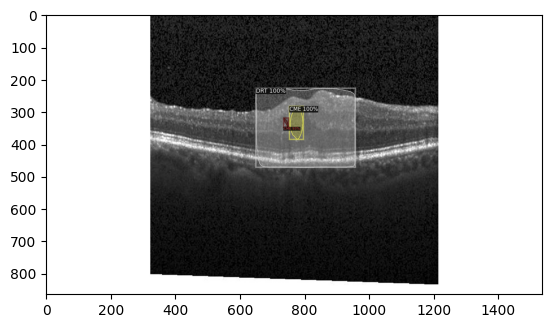

In [9]:
# img = cv2.imread(d["file_name"])
# visualizer = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.8)
# vis = visualizer.draw_dataset_dict(d)
# final_img1=vis.get_image()[:, :, ::-1]
# cv2_imshow(final_img1)
# cv2.imwrite("/content/drive/MyDrive/BTP- project personal/output_images/"+str(i)+"_input.jpg", final_img1)    
# im = cv2.imread("Copy of DME-119840-1.jpg")
im=img
outputs = predictor1(im)
# print(outputs["instances"].pred_boxes)
v = Visualizer(im[:, :, ::-1],
               metadata=my_metadata, 
               scale=0.8, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
final_img=v.get_image()[:, :, ::-1]
plt.imshow(final_img)
plt.show()
# cv2.imshow("test",final_img)

In [14]:
final_img_st = cv2.imencode('.jpg', final_img)[1]
base64_data = str(base64.b64encode(final_img_st))[2:-1]

In [15]:
base64_data

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgBgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+db/AIO1tcutE/4KeeA5oYdyj4HacWbH/UY1mvyj8X6x/wAJBrdrLp1gpuD

In [16]:
# from final_script import *

In [6]:
image_base64=input()


 /9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAQwAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMAAwICAgICAwICAgMDAwMEBgQEBAQECAYGBQYJCAoKCQgJCQoMDwwKCw4LCQkNEQ0ODxAQERAKDBITEhATDxAQEP/bAEMBAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/AABEIBDgHgAMBIgACEQEDEQH/xAAeAAEAAgMBAQEBAQAAAAA

In [17]:
y,x=get_annotations(image_base64)

[04/26 00:58:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from mymodel_0_new1.pth ...


TypeError: a bytes-like object is required, not 'tuple'

In [15]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64
import math

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer,ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

from detectron2.data.catalog import Metadata

my_metadata = Metadata()
my_metadata.set(thing_classes = ['DRT', 'CME', 'SRD'])


def get_annotations(image_base64:str):
    
    cfg1 = get_cfg()
    cfg1.merge_from_file("custommask_rcnn_R_50_FPN_3x_my_dataset.yaml")
    cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3 # set threshold for this model
    cfg1.MODEL.WEIGHTS = "mymodel_0_new1.pth"
    cfg1.MODEL.DEVICE = "cpu"
    # Create predictor
    # predictor1 = DefaultPredictor(cfg)
    cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3
    predictor1 = DefaultPredictor(cfg1)
    image_base64=image_base64.ljust((int)(math.ceil(len(image_base64) / 4)) * 4, '=')
    # im = cv2.imread("Copy of DME-119840-1.jpg")
    nparr = np.frombuffer(base64.b64decode(image_base64), np.uint8)
    im = cv2.imdecode(nparr, cv2.IMREAD_UNCHANGED)
    outputs = predictor1(im)
    # print(outputs["instances"].pred_boxes)
    v = Visualizer(im[:, :, ::-1],
                   metadata=my_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    final_img=v.get_image()[:, :, ::-1]
    final_img_st = cv2.imencode('.jpg', final_img)[1]
    base64_data = str(base64.b64encode(final_img_st))[2:-1]
    return final_img_st,base64_data

In [13]:
test=input()

 /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgBgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+db/AIO1tcutE/4KeeA5oYdyj4HacWbH/UY1mvyj8X6x/wAJBrdrLp1gpuD

In [14]:
if x==test:
    print(True)

In [12]:
x

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgBgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+db/AIO1tcutE/4KeeA5oYdyj4HacWbH/UY1mvyj8X6x/wAJBrdrLp1gpuD

In [10]:
from main import *


In [11]:
main(image_base64)

[04/26 03:03:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from mymodel_0_new1.pth ...


{'annotatedImage': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgBgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+db/AIO1tcutE/4KeeA5oYdyj4HacWbH/UY1mvyj

In [16]:
import requests
x=requests.post('http://127.0.0.1:8000/get_annotations', params={'image_base64':image_base64 })

In [17]:
x.text

'{"annotatedImage":"/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgBgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD+db/AIO1tcutE/4KeeA5oYdyj4HacWbH/UY1mvyj